In [101]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

# Présentation du jeu de données

In [102]:
#Importation de nos fichiers 
dataData = pd.read_csv('EdStatsData.csv')

dataCountry = pd.read_csv('EdStatsCountry.csv')

dataCountrySeries = pd.read_csv('EdStatsCountry-Series.csv')

dataSeries = pd.read_csv('EdStatsSeries.csv')

datafootNote = pd.read_csv('EdStatsFootNote.csv')

In [103]:
#Types de données pour chacun de nos df
print(dataData.dtypes)

print(dataCountry.dtypes)

print(dataCountrySeries.dtypes)

print(dataSeries.dtypes)

print(datafootNote.dtypes)

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object
Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts

# Analyse pré-exploratoire

## 1. Validation 

In [104]:
#Affichage des infos pour notre df "data"
print(dataData.info())
print(dataData.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

##### Sur notre df "Data", on observe que nos 4 premières colonnes sont de type "objet" avec aucune valeurs manquantes. Néanmoins, le reste des colonnes (composées de dates) sont uniquement de type "float". 

In [105]:
#Affichage des infos pour notre df "Country"
print(dataCountry.info())
print(dataCountry[dataCountry.duplicated()]) #Voir les lignes en double. 
print(dataCountry.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

##### Sur notre df "Country", on observe 4 colonnes de type "float" et le reste des colonnes sont de type "object". Les 4 premières colonnes ne contiennent pas de valeurs manquantes. 

In [106]:
#Affichage des infos pour notre df "Country-Series"
print(dataCountrySeries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB
None


##### Sur notre df "Country-Series", on observe 1 colonne de type "float" et le reste des colonnes sont de type "object".

In [107]:
#Affichage des infos pour notre df "Series"
print(dataSeries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

##### Sur notr df "Series", on observe 6 colonnes de type "float" et le reste des colonnes sont de type "object" (15).

In [108]:
#Affichage des infos pour notre df "FootNote"
print(datafootNote.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB
None


##### Sur notre df "footNote", on observe 4 colonnes de type "object" et 1 de type "float"

In [109]:
#Affichage des dimensions pour chacun de nos df.
print('Le fichier "EdStatsData" contient', dataData.shape[0], 'lignes et', dataData.shape[1], 'colonnes.')
print('Le fichier "EdStatsCountry" contient', dataCountry.shape[0], 'lignes et', dataCountry.shape[1], 'colonnes.')
print('Le fichier "EdStatsCountry-Series" contient', dataCountrySeries.shape[0], 'lignes et', dataCountrySeries.shape[1], 'colonnes.')
print('Le fichier "EdStatsSeries" contient', dataSeries.shape[0], 'lignes et', dataSeries.shape[1], 'colonnes.')
print('Le fichier "EdStatsFootNote" contient', datafootNote.shape[0], 'lignes et', datafootNote.shape[1], 'colonnes.')

Le fichier "EdStatsData" contient 886930 lignes et 70 colonnes.
Le fichier "EdStatsCountry" contient 241 lignes et 32 colonnes.
Le fichier "EdStatsCountry-Series" contient 613 lignes et 4 colonnes.
Le fichier "EdStatsSeries" contient 3665 lignes et 21 colonnes.
Le fichier "EdStatsFootNote" contient 643638 lignes et 5 colonnes.


In [110]:
#Vérification des valeurs manquantes pour chacun de nos df. 
print('Fichier "Data"')
print(dataData.isnull().sum())
print('______________')
print('Fichier "Country"')
print(dataCountry.isnull().sum())
print('______________')
print('Fichier "Country-Series"')
print(dataCountrySeries.isnull().sum())
print('______________')
print('Fichier "Series"')
print(dataSeries.isnull().sum())
print('______________')
print('Fichier "footNote"')
print(datafootNote.isnull().sum())

Fichier "Data"
Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64
______________
Fichier "Country"
Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts referen

#### Parmi nos fichiers, des valeurs manquantes sont observées. En effet, notre fichier "data" contient des colonnes avec un grand nombre de valeurs manquantes. Les seules colonnes dont on n'observe pas de valeurs manquantes sont celles concernant le nom et code du pays, ainsi que le nom et code de l'indicateur. 
#### Nous observons la même chose concernant le fichier "Country" avec uniquement 4 colonnes dont on n'observe pas de valeurs manquantes. Ces colonnes concernent les informations concernant les pays (noms, code, ...). 
#### Le fichier "Country-Series" quant à lui, n'a pas de données manquantes. 
#### Le fichier "Series" ne contient que 5 colonnes sans valeurs manquantes : le code et nom de l'indicateur, le sujet, sa définition, et sa source. 
#### Enfin, le fichier "footNote" ne contient pas de données manquantes. 
#### Le point commun parmi tous ces fichiers est la présence d'une colonne inutile contenant 100% de valeurs manquantes. 

In [111]:
#Vérification des doublons pour chacun de nos df. 

#Df "Data"
print("#Fichier data#")
data_columns = dataData.columns #On récupère le nom des colonnes

if any(dataData.duplicated(subset = data_columns[0])) == False:
    print("-----> Pas de doublons observés pour la première colonne",  data_columns[0], "du fichier 'Data'")
else:
    print("Des doublons sont observés pour la première colonne",  data_columns[0], "du fichier 'Data'")
    if any(dataData.duplicated(subset = [data_columns[0], data_columns[1]])) == False:
        print("-----> Pas de doublons observés pour les deux premières colonnes", data_columns[0], "et", data_columns[1], "du fichier 'Data'", )
    else:
        print("Des doublons sont observés pour les deux premières colonnes", data_columns[0], "et", data_columns[1], "du fichier 'Data'")
        if any(dataData.duplicated(subset = [data_columns[0], data_columns[1], data_columns[2]])) == False:
            print("-----> Pas de doublons observés pour les 3 premières colonnes", data_columns[0], data_columns[1], "et", data_columns[3], "du fichier 'Data'")
        else:
            print("Des doublons sont observés pour les 3 premières colonnes", data_columns[0], data_columns[1], "et", data_columns[3], "du fichier 'Data'")

#Df "Country"
print("#Fichier Country#")
country_columns = dataCountry.columns #On récupère le nom des colonnes

if any(dataCountry.duplicated(subset = country_columns[0])) == False:
    print("-----> Pas de doublons observés pour la première colonne",  country_columns[0], "du fichier 'Country'")
else:
    print("Des doublons sont observés pour la première colonne",  country_columns[0], "du fichier 'Country'")
    if any(dataCountry.duplicated(subset = [country_columns[0], country_columns[1]])) == False:
        print("-----> Pas de doublons observés pour les deux premières colonnes", country_columns[0], "et", country_columns[1], "du fichier 'Countru'", )
    else:
        print("Des doublons sont observés pour les deux premières colonnes", country_columns[0], "et", country_columns[1], "du fichier 'Country'")
        if any(dataCountry.duplicated(subset = [country_columns[0], country_columns[1], country_columns[2]])) == False:
            print("-----> Pas de doublons observés pour les 3 premières colonnes", country_columns[0], country_columns[1], "et", country_columns[3], "du fichier 'Country'")
        else:
            print("Des doublons sont observés pour les 3 premières colonnes", country_columns[0], country_columns[1], "et", country_columns[3], "du fichier 'Country'")

#Df Country-Series
print("#Fichier Country-Series#")
countryseries_columns = dataCountrySeries.columns #On récupère le nom des colonnes

if any(dataCountrySeries.duplicated(subset = countryseries_columns[0])) == False:
    print("-----> Pas de doublons observés pour la première colonne",  countryseries_columns[0], "du fichier 'Country-Series'")
else:
    print("Des doublons sont observés pour la première colonne",  countryseries_columns[0], "du fichier 'Country-Series'")
    if any(dataCountrySeries.duplicated(subset = [countryseries_columns[0], countryseries_columns[1]])) == False:
        print("-----> Pas de doublons observés pour les deux premières colonnes", countryseries_columns[0], "et", countryseries_columns[1], "du fichier 'Country-Series'", )
    else:
        print("Des doublons sont observés pour les deux premières colonnes", countryseries_columns[0], "et", countryseries_columns[1], "du fichier 'Country-Series'")
        if any(dataCountrySeries.duplicated(subset = [countryseries_columns[0], countryseries_columns[1], countryseries_columns[2]])) == False:
            print("-----> Pas de doublons observés pour les 3 premières colonnes", countryseries_columns[0], countryseries_columns[1], "et", countryseries_columns[3], "du fichier 'Country-Series'")
        else:
            print("Des doublons sont observés pour les 3 premières colonnes", countryseries_columns[0], countryseries_columns[1], "et", countryseries_columns[3], "du fichier 'Country-Series'")

#Df Series
print("#Fichier Series#")
series_columns = dataSeries.columns #On récupère le nom des colonnes

if any(dataSeries.duplicated(subset = series_columns[0])) == False:
    print("-----> Pas de doublons observés pour la première colonne",  series_columns[0], "du fichier 'Series'")
else:
    print("Des doublons sont observés pour la première colonne",  series_columns[0], "du fichier 'Series'")
    if any(dataSeries.duplicated(subset = [series_columns[0], series_columns[1]])) == False:
        print("-----> Pas de doublons observés pour les deux premières colonnes", series_columns[0], "et", series_columns[1], "du fichier 'Series'", )
    else:
        print("Des doublons sont observés pour les deux premières colonnes", series_columns[0], "et", series_columns[1], "du fichier 'Series'")
        if any(dataSeries.duplicated(subset = [series_columns[0], series_columns[1], series_columns[2]])) == False:
            print("-----> Pas de doublons observés pour les 3 premières colonnes", series_columns[0], series_columns[1], "et", series_columns[3], "du fichier 'Series'")
        else:
            print("Des doublons sont observés pour les 3 premières colonnes", series_columns[0], series_columns[1], "et", series_columns[3], "du fichier 'Series'")

#Df footNote
print("#Fichier footNote#")
footNote_columns = datafootNote.columns #On récupère le nom des colonnes

if any(datafootNote.duplicated(subset = footNote_columns[0])) == False:
    print("-----> Pas de doublons observés pour la première colonne",  footNote_columns[0], "du fichier 'footNote'")
else:
    print("Des doublons sont observés pour la première colonne",  footNote_columns[0], "du fichier 'footNote'")
    if any(datafootNote.duplicated(subset = [footNote_columns[0], footNote_columns[1]])) == False:
        print("-----> Pas de doublons observés pour les deux premières colonnes", footNote_columns[0], "et", footNote_columns[1], "du fichier 'footNote'", )
    else:
        print("Des doublons sont observés pour les deux premières colonnes", footNote_columns[0], "et", footNote_columns[1], "du fichier 'footNote'")
        if any(datafootNote.duplicated(subset = [footNote_columns[0], footNote_columns[1], footNote_columns[2]])) == False:
            print("-----> Pas de doublons observés pour les 3 premières colonnes", footNote_columns[0], footNote_columns[1], "et", footNote_columns[2], "du fichier 'footNote'")
        else:
            print("Des doublons sont observés pour les 3 premières colonnes", footNote_columns[0], footNote_columns[1], "et", footNote_columns[2], "du fichier 'footNote'")


#Fichier data#
Des doublons sont observés pour la première colonne Country Name du fichier 'Data'
Des doublons sont observés pour les deux premières colonnes Country Name et Country Code du fichier 'Data'
-----> Pas de doublons observés pour les 3 premières colonnes Country Name Country Code et Indicator Code du fichier 'Data'
#Fichier Country#
-----> Pas de doublons observés pour la première colonne Country Code du fichier 'Country'
#Fichier Country-Series#
Des doublons sont observés pour la première colonne CountryCode du fichier 'Country-Series'
-----> Pas de doublons observés pour les deux premières colonnes CountryCode et SeriesCode du fichier 'Country-Series'
#Fichier Series#
-----> Pas de doublons observés pour la première colonne Series Code du fichier 'Series'
#Fichier footNote#
Des doublons sont observés pour la première colonne CountryCode du fichier 'footNote'
Des doublons sont observés pour les deux premières colonnes CountryCode et SeriesCode du fichier 'footNote'
-----> 

In [112]:
#On crée une fonction qui affiche les colonnes avec doublons et les colonnes sans doublons quelle que soit la df en paramètre.

def display_doublons(dataframe):
    dico = {'Doublon': pd.DataFrame(), 
           'Pas doublon' : pd.DataFrame()}
    for cle in dataframe:
        if dataframe[cle].duplicated().sum() == 0:
            dico['Pas doublon'][cle] = dataframe[cle]
        else:
            dico['Doublon'][cle] = dataframe[cle]
            #print("La colonne a des valeurs manquantes ou des valeurs identiques")
            #return False
    return dico

result = display_doublons(datafootNote)
print(result)

{'Doublon':        CountryCode      SeriesCode    Year  \
0              ABW  SE.PRE.ENRL.FE  YR2001   
1              ABW  SE.TER.TCHR.FE  YR2005   
2              ABW  SE.PRE.TCHR.FE  YR2000   
3              ABW  SE.SEC.ENRL.GC  YR2004   
4              ABW     SE.PRE.TCHR  YR2006   
...            ...             ...     ...   
643633         ZWE     SH.DYN.MORT  YR2007   
643634         ZWE     SH.DYN.MORT  YR2014   
643635         ZWE     SH.DYN.MORT  YR2015   
643636         ZWE     SH.DYN.MORT  YR2017   
643637         ZWE     SP.POP.GROW  YR2017   

                                   DESCRIPTION  Unnamed: 4  
0                          Country estimation.         NaN  
1                          Country estimation.         NaN  
2                          Country estimation.         NaN  
3                          Country estimation.         NaN  
4                          Country estimation.         NaN  
...                                        ...         ...  
643633  

#### A partir de ces informations, il est possible de créer une fonction permettant de trouver les clés primaires pour chaque fichier. 
#### Clé primaire : clé unique (pas de doublons) permettant d'identifier chaque enregistrement (pas de valeurs manquantes)

In [113]:
#On va créer une fonction réutilisable permettant d'afficher les clés primaires valides quelle que soit la df en paramètre. 

def display_valid_primary_keys(dataframe):
    dico = {'Valide': pd.DataFrame(), 
           'Erreur' : pd.DataFrame()}
    for cle in dataframe:
        if dataframe[cle].isnull().sum() == 0 and dataframe[cle].duplicated().sum() == 0:
            #print("Clé primaire : la colonne n'a pas de valeurs manquantes et contient des valeurs uniques")
            #display(dataframe[cle])
            dico['Valide'][cle] = dataframe[cle]
        else:
            dico['Erreur'][cle] = dataframe[cle]
            #print("La colonne a des valeurs manquantes ou des valeurs identiques")
            #return False
    return dico

result = display_valid_primary_keys(dataCountrySeries)
print(result)

{'Valide': Empty DataFrame
Columns: []
Index: [], 'Erreur':     CountryCode         SeriesCode  \
0           ABW        SP.POP.TOTL   
1           ABW        SP.POP.GROW   
2           AFG        SP.POP.GROW   
3           AFG  NY.GDP.PCAP.PP.CD   
4           AFG        SP.POP.TOTL   
..          ...                ...   
608         ZAF        SP.POP.GROW   
609         ZMB        SP.POP.GROW   
610         ZMB        SP.POP.TOTL   
611         ZWE        SP.POP.TOTL   
612         ZWE        SP.POP.GROW   

                                           DESCRIPTION  Unnamed: 3  
0    Data sources : United Nations World Population...         NaN  
1    Data sources: United Nations World Population ...         NaN  
2    Data sources: United Nations World Population ...         NaN  
3                   Estimates are based on regression.         NaN  
4    Data sources : United Nations World Population...         NaN  
..                                                 ...         ...  


#### Notre fonction se limite cependant aux dataframes dont la clé primaire peut s'avérer être 1 seule colonne

#### Pour les df dont la clé primaire est un ensemble de plusieurs colonnes, on va les fusionner en 1 identifiant. 

In [114]:
#Clé primaire df "data"
data_PK = dataData.copy()
nom_colonne_data = data_PK.columns

data_PK['Identifiant'] = data_PK[[nom_colonne_data[0], nom_colonne_data[1], nom_colonne_data[2]]].agg(' '.join, axis=1)
data_PK.insert(0, 'Identifiant', data_PK.pop('Identifiant'))
display(data_PK.head())

Identifiant Country Name  \
0  Arab World ARB Adjusted net enrolment rate, lo...   Arab World   
1  Arab World ARB Adjusted net enrolment rate, lo...   Arab World   
2  Arab World ARB Adjusted net enrolment rate, lo...   Arab World   
3  Arab World ARB Adjusted net enrolment rate, lo...   Arab World   
4  Arab World ARB Adjusted net enrolment rate, pr...   Arab World   

  Country Code                                     Indicator Name  \
0          ARB  Adjusted net enrolment rate, lower secondary, ...   
1          ARB  Adjusted net enrolment rate, lower secondary, ...   
2          ARB  Adjusted net enrolment rate, lower secondary, ...   
3          ARB  Adjusted net enrolment rate, lower secondary, ...   
4          ARB  Adjusted net enrolment rate, primary, both sex...   

   Indicator Code       1970       1971       1972       1973       1974  ...  \
0      UIS.NERA.2        NaN        NaN        NaN        NaN        NaN  ...   
1    UIS.NERA.2.F        NaN        NaN        NaN        NaN        NaN  ...   
2  UIS.NERA.2.GPI        NaN        NaN        NaN        NaN        NaN  ...   
3    UIS.NERA.2.M        NaN        NaN        NaN        NaN        NaN  ...   
4     SE.PRM.TENR  54.822121  54.894138  56.209438  57.267109  57.991138  ...   

   2060  2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[5 rows x 71 columns]

In [115]:
#Clé primaire df "Country-Series"
countrySeries_PK = dataCountrySeries.copy()
nom_colonne_countryseries = countrySeries_PK.columns

countrySeries_PK['Identifiant'] = countrySeries_PK[[nom_colonne_countryseries[0], nom_colonne_countryseries[1]]].agg(' '.join, axis=1)
countrySeries_PK.insert(0, 'Identifiant', countrySeries_PK.pop('Identifiant'))
display(countrySeries_PK.head())

Identifiant CountryCode         SeriesCode  \
0        ABW SP.POP.TOTL         ABW        SP.POP.TOTL   
1        ABW SP.POP.GROW         ABW        SP.POP.GROW   
2        AFG SP.POP.GROW         AFG        SP.POP.GROW   
3  AFG NY.GDP.PCAP.PP.CD         AFG  NY.GDP.PCAP.PP.CD   
4        AFG SP.POP.TOTL         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN

In [116]:
#Clé primaire df "Country-Series"
footnote_PK = datafootNote.copy()
nom_colonne_footnote = footnote_PK.columns

footnote_PK['Identifiant'] = footnote_PK[[nom_colonne_footnote[0], nom_colonne_footnote[1], nom_colonne_footnote[2]]].agg(' '.join, axis=1)
footnote_PK.insert(0, 'Identifiant', footnote_PK.pop('Identifiant'))
display(footnote_PK.head())

Identifiant CountryCode      SeriesCode    Year  \
0  ABW SE.PRE.ENRL.FE YR2001         ABW  SE.PRE.ENRL.FE  YR2001   
1  ABW SE.TER.TCHR.FE YR2005         ABW  SE.TER.TCHR.FE  YR2005   
2  ABW SE.PRE.TCHR.FE YR2000         ABW  SE.PRE.TCHR.FE  YR2000   
3  ABW SE.SEC.ENRL.GC YR2004         ABW  SE.SEC.ENRL.GC  YR2004   
4     ABW SE.PRE.TCHR YR2006         ABW     SE.PRE.TCHR  YR2006   

           DESCRIPTION  Unnamed: 4  
0  Country estimation.         NaN  
1  Country estimation.         NaN  
2  Country estimation.         NaN  
3  Country estimation.         NaN  
4  Country estimation.         NaN

## 2. Nettoyage

In [117]:
#Fichier "Country"
dataCountry_new = dataCountry.copy()
colonnes_country = ['Country Code', 'Short Name', 'Table Name', 'Long Name', 'Region']
dataCountry_new = dataCountry[colonnes_country]
display(dataCountry_new.head())

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3          ALB      Albania      Albania           Republic of Albania   
4          AND      Andorra      Andorra       Principality of Andorra   

                      Region  
0  Latin America & Caribbean  
1                 South Asia  
2         Sub-Saharan Africa  
3      Europe & Central Asia  
4      Europe & Central Asia

In [118]:
#Fichier "Series"
dataSeries_new = dataSeries.copy()
colonnes_series = ['Series Code', 'Topic', 'Indicator Name']
dataSeries_new = dataSeries[colonnes_series]
display(dataSeries_new.head())

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      Indicator Name  
0  Barro-Lee: Percentage of female population age...  
1  Barro-Lee: Percentage of population age 15-19 ...  
2  Barro-Lee: Percentage of female population age...  
3  Barro-Lee: Percentage of population age 15+ wi...  
4  Barro-Lee: Percentage of female population age...

##### Les fichiers "Country-Series" et "footNote" ne semblent pas pertinents à utiliser pour notre analyse. 

## On va essayer de visualiser les données manquantes ou le taux de remplissage par année pour les indicateurs. 

## 1) Dans un premier temps on réagence notre df. 


In [119]:
transposeData = dataData.transpose().reset_index()
transposeData

total = transposeData.shape[1] - 1
print(total)

#On ne s'occupe pas des 4 premières et de la dernière lignes du df.
data_annees = transposeData.drop([0, 1, 2, 3, 69])
data_annees

data_annees.rename(columns={'index':'Annees'}, inplace=True) #On renomme la colonne "index" en "Annees"
data_annees

data_annees['nbre_indicateurs'] = data_annees.loc[:, data_annees.columns != 'Annees'].count(axis=1) #On crée une colonne qui compte le nbre d'indicateur pour chaque année
data_annees['nbre_val_manquantes'] = data_annees.loc[:, data_annees.columns != 'Annees'].isnull().sum(axis=1) #On crée une colonne qui compte le nbre de valeurs manquantes chaque année
data_annees['Taux_remplissage'] = round(data_annees.loc[:, data_annees.columns == 'nbre_indicateurs']*100/total, 2) #On crée la colonne du taux de remplissage
data_annees['Taux_val_manquantes'] = round(data_annees.loc[:, data_annees.columns == 'nbre_val_manquantes']*100/total,2) #On crée la colonne du taux de valeurs manquantes
display(data_annees)

886930


Annees    0    1    2    3          4          5        6          7    8  \
4    1970  NaN  NaN  NaN  NaN  54.822121  43.351101  0.65857  65.826233  NaN   
5    1971  NaN  NaN  NaN  NaN  54.894138   43.31815   0.6564  65.993584  NaN   
6    1972  NaN  NaN  NaN  NaN  56.209438  44.640701  0.66329  67.301857  NaN   
7    1973  NaN  NaN  NaN  NaN  57.267109  45.845718  0.67204  68.219078  NaN   
8    1974  NaN  NaN  NaN  NaN  57.991138  46.449501  0.67261  69.059013  NaN   
..    ...  ...  ...  ...  ...        ...        ...      ...        ...  ...   
64   2080  NaN  NaN  NaN  NaN        NaN        NaN      NaN        NaN  NaN   
65   2085  NaN  NaN  NaN  NaN        NaN        NaN      NaN        NaN  NaN   
66   2090  NaN  NaN  NaN  NaN        NaN        NaN      NaN        NaN  NaN   
67   2095  NaN  NaN  NaN  NaN        NaN        NaN      NaN        NaN  NaN   
68   2100  NaN  NaN  NaN  NaN        NaN        NaN      NaN        NaN  NaN   

    ... 886924 886925 886926 886927 886928 886929 nbre_indicateurs  \
4   ...    NaN    NaN    NaN    NaN    NaN    NaN            72288   
5   ...    NaN    NaN    NaN    NaN    NaN    NaN            35537   
6   ...    NaN    NaN    NaN    NaN    NaN    NaN            35619   
7   ...    NaN    NaN    NaN    NaN    NaN    NaN            35545   
8   ...    NaN    NaN    NaN    NaN    NaN    NaN            35730   
..  ...    ...    ...    ...    ...    ...    ...              ...   
64  ...    NaN    NaN    NaN    NaN    NaN    NaN            51436   
65  ...    NaN    NaN    NaN    NaN    NaN    NaN            51436   
66  ...    NaN    NaN    NaN    NaN    NaN    NaN            51436   
67  ...    NaN    NaN    NaN    NaN    NaN    NaN            51436   
68  ...    NaN    NaN    NaN    NaN    NaN    NaN            51436   

   nbre_val_manquantes Taux_remplissage Taux_val_manquantes  
4               814642             8.15               91.85  
5               851393             4.01               95.99  
6               851311             4.02               95.98  
7               851385             4.01               95.99  
8               851200             4.03               95.97  
..                 ...              ...                 ...  
64              835494             5.80               94.20  
65              835494             5.80               94.20  
66              835494             5.80               94.20  
67              835494             5.80               94.20  
68              835494             5.80               94.20  

[65 rows x 886935 columns]

## 2) Une fois les colonnes, qui nous intéressent, créées, on va visualiser nos données. 

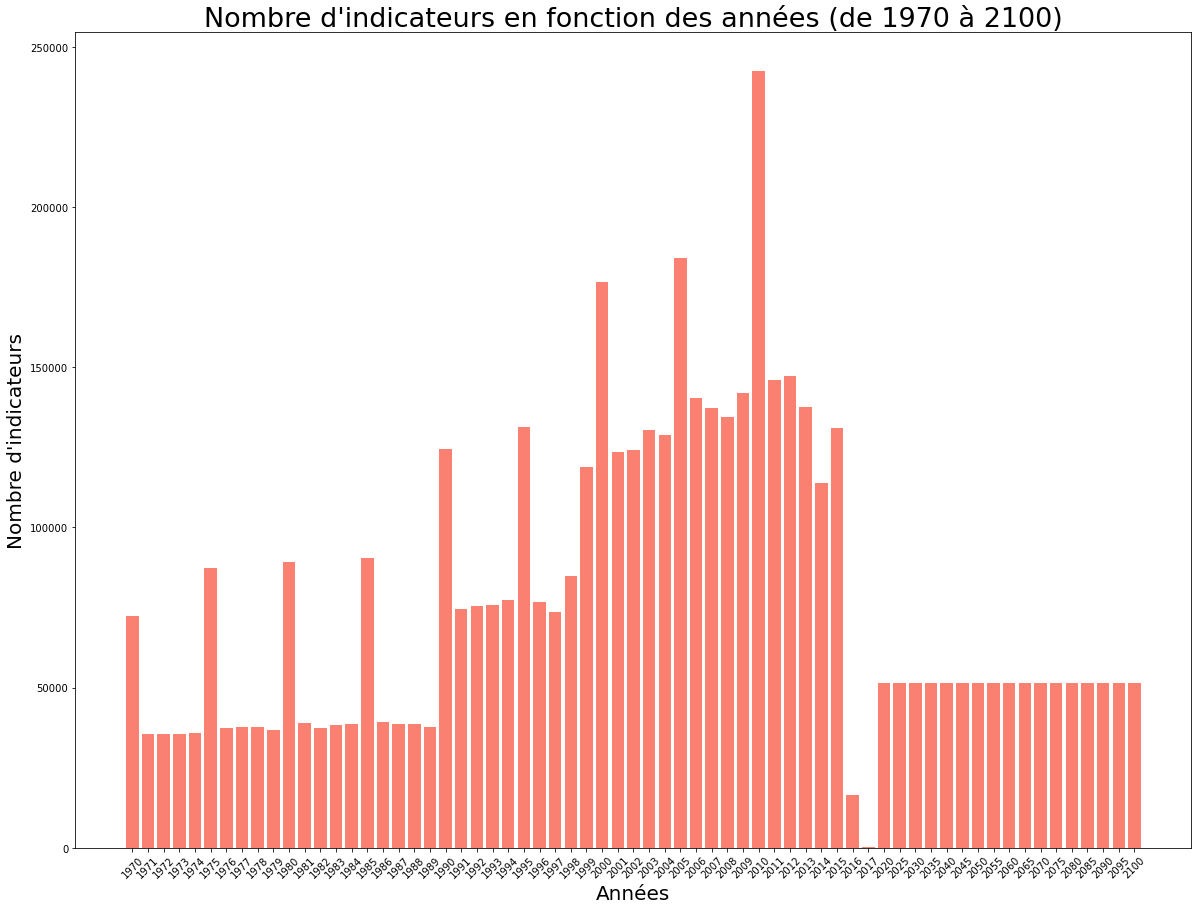

In [120]:
# On trace le graphique représentant le nombre d'indicateurs que nous avons en fonction des années. 

import seaborn as sns

x = data_annees['Annees']
y = data_annees['nbre_indicateurs']

plt.figure(figsize=(20,15))
plt.bar(x,y, color = 'salmon')
plt.xticks(rotation = 45)
plt.xlabel('Années', size = 20)
plt.ylabel('Nombre d\'indicateurs', size = 20)
plt.title('Nombre d\'indicateurs en fonction des années (de 1970 à 2100)', size = 27)

plt.savefig('data_annees_1970_2100_global.jpg')
plt.show()

nbre_indicateurs  nbre_val_manquantes  Taux_remplissage  \
cat                                                             
1970         45146.700           841783.300            5.0920   
1980         48687.700           838242.300            5.4900   
1990         91301.400           795628.600           10.2940   
2000        142175.400           744754.600           16.0300   
2010        116834.625           770095.375           13.1725   
2020         51436.000           835494.000            5.8000   
2030         51436.000           835494.000            5.8000   
2040         51436.000           835494.000            5.8000   
2050         51436.000           835494.000            5.8000   
2060         51436.000           835494.000            5.8000   
2070         51436.000           835494.000            5.8000   
2080         51436.000           835494.000            5.8000   
2090         51436.000           835494.000            5.8000   
2100         51436.000           835494.000            5.8000   

      Taux_val_manquantes  
cat                        
1970              94.9080  
1980              94.5100  
1990              89.7060  
2000              83.9700  
2010              86.8275  
2020              94.2000  
2030              94.2000  
2040              94.2000  
2050              94.2000  
2060              94.2000  
2070              94.2000  
2080              94.2000  
2090              94.2000  
2100              94.2000

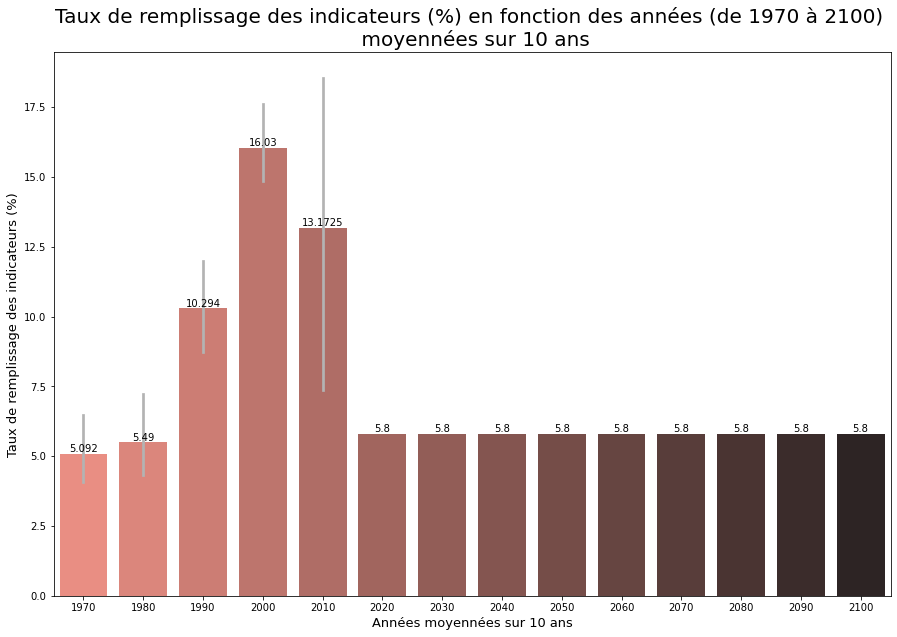

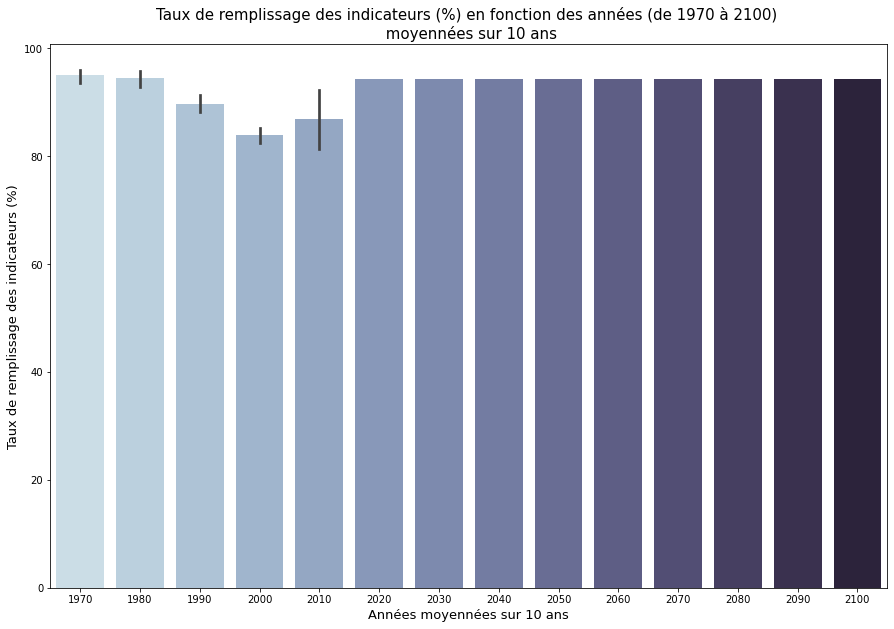

In [121]:
data_annees['cat'] = 0
data_annees.loc[(data_annees['Annees'] >= '1970') & (data_annees['Annees'] <= '1979'), 'cat'] = '1970'
data_annees.loc[(data_annees['Annees'] >= '1980') & (data_annees['Annees'] <= '1989'), 'cat'] = '1980'
data_annees.loc[(data_annees['Annees'] >= '1990') & (data_annees['Annees'] <= '1999'), 'cat'] = '1990'
data_annees.loc[(data_annees['Annees'] >= '2000') & (data_annees['Annees'] <= '2009'), 'cat'] = '2000'
data_annees.loc[(data_annees['Annees'] >= '2010') & (data_annees['Annees'] <= '2019'), 'cat'] = '2010'
data_annees.loc[(data_annees['Annees'] >= '2020') & (data_annees['Annees'] <= '2029'), 'cat'] = '2020'
data_annees.loc[(data_annees['Annees'] >= '2030') & (data_annees['Annees'] <= '2039'), 'cat'] = '2030'
data_annees.loc[(data_annees['Annees'] >= '2040') & (data_annees['Annees'] <= '2049'), 'cat'] = '2040'
data_annees.loc[(data_annees['Annees'] >= '2050') & (data_annees['Annees'] <= '2059'), 'cat'] = '2050'
data_annees.loc[(data_annees['Annees'] >= '2060') & (data_annees['Annees'] <= '2069'), 'cat'] = '2060'
data_annees.loc[(data_annees['Annees'] >= '2070') & (data_annees['Annees'] <= '2079'), 'cat'] = '2070'
data_annees.loc[(data_annees['Annees'] >= '2080') & (data_annees['Annees'] <= '2089'), 'cat'] = '2080'
data_annees.loc[(data_annees['Annees'] >= '2090') & (data_annees['Annees'] <= '2099'), 'cat'] = '2090'
data_annees.loc[(data_annees['Annees'] == '2100'), 'cat'] = '2100'

annees = data_annees.groupby('cat').mean()
display(annees)
        

plt.figure(figsize = (15,10))
ax = sns.barplot(x='cat', y = 'Taux_remplissage', data = data_annees, palette = 'dark:salmon_r', errcolor = '.7')

ax.set_xlabel('Années moyennées sur 10 ans', fontsize = 13)
ax.set_title('Taux de remplissage des indicateurs (%) en fonction des années (de 1970 à 2100) \n moyennées sur 10 ans', fontsize = 20)
ax.set_ylabel('Taux de remplissage des indicateurs (%)', fontsize = 13)

ax.bar_label(ax.containers[0])

plt.savefig('data_annees_1970_2100.jpg')
plt.show()



plt.figure(figsize = (15,10))
ax = sns.barplot(x='cat', y = 'Taux_val_manquantes', data = data_annees, palette = 'ch:s=.25,rot=-.25')

ax.set_xlabel('Années moyennées sur 10 ans', fontsize = 13)
ax.set_title('Taux de remplissage des indicateurs (%) en fonction des années (de 1970 à 2100) \n moyennées sur 10 ans', fontsize = 15)
ax.set_ylabel('Taux de remplissage des indicateurs (%)', fontsize = 13)

plt.show()

##### D'après les graphiques, nous observons que le nombre d'indicateurs augmente à partir des années 70 (en passant de 5.09%) jusqu'aux années 2000 (où on arrive à 16.03% d'indicateurs). Nous observons ensuite une décroissance. On arrive à environ 5.8% d'indicateurs à partir de 2020 jusqu'à 2100. 

## 3. Sélection des indicateurs 

In [122]:
#On effectue une fusion entre le df "data" et le df "series" pour ne garder que les topics qui nous intéressent
dataData_topic = pd.merge(dataSeries_new, dataData, on = 'Indicator Name', how = 'right')

#Ensuite on regarde quels sont les différents topics
display(pd.DataFrame(pd.unique(dataData_topic['Topic'])))

0
0                                           Secondary
1                                             Primary
2                                            Literacy
3                                            Teachers
4                                                EMIS
5                                        Expenditures
6                                          Attainment
7                                  Education Equality
8                                          Background
9                                   Learning Outcomes
10                          Early Childhood Education
11                                           Tertiary
12                        Post-Secondary/Non-Tertiary
13                                                NaN
14  Economic Policy & Debt: National accounts: US$...
15    Economic Policy & Debt: Purchasing power parity
16  Economic Policy & Debt: National accounts: Atl...
17                                        Pre-Primary
18                     Infrastructure: Communications
19   Social Protection & Labor: Labor force structure
20                       Health: Population: Dynamics
21                                         Population
22                      Health: Population: Structure
23                               Health: Risk factors
24                    Early Child Development (SABER)
25   Education Management Information Systems (SABER)
26                Engaging the Private Sector (SABER)
27                             School Finance (SABER)
28           School Health and School Feeding (SABER)
29                         Student Assessment (SABER)
30                                   Teachers (SABER)
31                         Tertiary Education (SABER)
32                      Workforce Development (SABER)

In [123]:
#On crée la liste des indicateurs qui nous intéressent pour les sélectionner
liste_topic = ['Education equality', 'Background', 'Infrastructure: Communications', 'Social Protection & Labor: Labor force structure',
               'Technology skills', 'Tertiary', 'Expenditures', 'Literacy', 'Population', 'Attainment'] # Thématiques pertinentes sélectionnées
data_topic_select = dataData_topic[dataData_topic['Topic'].isin(liste_topic)]
display(data_topic_select.head())

Series Code     Topic  \
16   UIS.LPP.Ag15t99  Literacy   
17    UIS.LP.Ag15t99  Literacy   
18  UIS.LP.Ag15t99.F  Literacy   
19  UIS.LP.AG15T99.M  Literacy   
20    SE.ADT.LITR.ZS  Literacy   

                                       Indicator Name Country Name  \
16   Adult illiterate population, 15+ years, % female   Arab World   
17  Adult illiterate population, 15+ years, both s...   Arab World   
18  Adult illiterate population, 15+ years, female...   Arab World   
19  Adult illiterate population, 15+ years, male (...   Arab World   
20  Adult literacy rate, population 15+ years, bot...   Arab World   

   Country Code    Indicator Code  1970  1971  1972  1973  ...  2060  2065  \
16          ARB   UIS.LPP.AG15T99   NaN   NaN   NaN   NaN  ...   NaN   NaN   
17          ARB    UIS.LP.AG15T99   NaN   NaN   NaN   NaN  ...   NaN   NaN   
18          ARB  UIS.LP.AG15T99.F   NaN   NaN   NaN   NaN  ...   NaN   NaN   
19          ARB  UIS.LP.AG15T99.M   NaN   NaN   NaN   NaN  ...   NaN   NaN   
20          ARB    SE.ADT.LITR.ZS   NaN   NaN   NaN   NaN  ...   NaN   NaN   

    2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
16   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
17   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
18   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
19   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
20   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[5 rows x 72 columns]

#### On va maintenant vérifier que les indicateurs que nous avons sélectionné sont bien renseignés.
### 1) Indicateur - DHS: Gini coefficient of average years of schooling. Age 15+ 

In [124]:
#On sélectionne les données concernant l'indicateur "DHS: Gini coefficient of average years of schooling. Age 15+".
dataDHS = dataData.loc[dataData['Indicator Name'] == 'DHS: Gini coefficient of average years of schooling. Age 15+', :]

#On va créer une jointure avec notre fichier "Countries pour garder les régions. "
result = display_valid_primary_keys(dataCountry) #On vérifie quelles sont les clés primaires
print(result)

#On va garder uniquement les colonnes qui nous intéressent en gardant au moins 1 clé primaire
dataCountry_new = dataCountry.loc[:, ['Country Code', 'Region']]

#On va joindre nos 2 df ensemble. 
dataDHS_regions = pd.merge(dataDHS, dataCountry_new, on = 'Country Code', how = 'left') #On fait une jointure en gardant les pays qui nous intéressent

# #Nettoyage des pays qui n'en sont pas
dataDHS_pays = dataDHS_regions.drop(dataDHS_regions[dataDHS_regions['Region'].isnull()].index)
dataDHS_pays.head()

{'Valide':     Country Code    Short Name    Table Name                     Long Name
0            ABW         Aruba         Aruba                         Aruba
1            AFG   Afghanistan   Afghanistan  Islamic State of Afghanistan
2            AGO        Angola        Angola   People's Republic of Angola
3            ALB       Albania       Albania           Republic of Albania
4            AND       Andorra       Andorra       Principality of Andorra
..           ...           ...           ...                           ...
236          XKX        Kosovo        Kosovo            Republic of Kosovo
237          YEM         Yemen   Yemen, Rep.             Republic of Yemen
238          ZAF  South Africa  South Africa      Republic of South Africa
239          ZMB        Zambia        Zambia            Republic of Zambia
240          ZWE      Zimbabwe      Zimbabwe          Republic of Zimbabwe

[241 rows x 4 columns], 'Erreur':     2-alpha code       Currency Unit  \
0             

Country Name Country Code  \
25     Afghanistan          AFG   
26         Albania          ALB   
27         Algeria          DZA   
28  American Samoa          ASM   
29         Andorra          AND   

                                       Indicator Name       Indicator Code  \
25  DHS: Gini coefficient of average years of scho...  HH.DHS.YRS.15UP.GIN   
26  DHS: Gini coefficient of average years of scho...  HH.DHS.YRS.15UP.GIN   
27  DHS: Gini coefficient of average years of scho...  HH.DHS.YRS.15UP.GIN   
28  DHS: Gini coefficient of average years of scho...  HH.DHS.YRS.15UP.GIN   
29  DHS: Gini coefficient of average years of scho...  HH.DHS.YRS.15UP.GIN   

    1970  1971  1972  1973  1974  1975  ...  2065  2070  2075  2080  2085  \
25   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
26   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
27   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
28   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
29   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   

    2090  2095  2100  Unnamed: 69                      Region  
25   NaN   NaN   NaN          NaN                  South Asia  
26   NaN   NaN   NaN          NaN       Europe & Central Asia  
27   NaN   NaN   NaN          NaN  Middle East & North Africa  
28   NaN   NaN   NaN          NaN         East Asia & Pacific  
29   NaN   NaN   NaN          NaN       Europe & Central Asia  

[5 rows x 71 columns]

In [125]:
#On garde uniquement la période allant de 1990 à 2016
dataDHS_annees = dataDHS_pays.loc[:, '1990':'2016']

#On crée un nouveau df qui calcule le taux de remplissage pour chaque année. 
dataDHS_annees_transpose = dataDHS_annees.transpose()
dataDHS_annees_transpose

#On calcule notre taux de remplissage 
total_1990_2016 = dataDHS_annees.shape[0]
print(total_1990_2016)
dataDHS_annees_transpose['Taux_remplissage'] = dataDHS_annees_transpose.count(axis=1)*100/total_1990_2016
display(dataDHS_annees_transpose.head())

#On ne va garder que notre colonne "annees" et "taux de remplissage"
dataDHS_taux_remplis_transpose = dataDHS_annees_transpose.copy()
dataDHS_taux_remplis_transpose = dataDHS_taux_remplis_transpose.drop(dataDHS_taux_remplis_transpose.loc[:, 25:241].columns, axis = 1)
dataDHS_taux_remplis_transpose = dataDHS_taux_remplis_transpose.rename(columns = {'Taux_remplissage' : 'DHS: Gini coefficient of average \n years of schooling. Age 15+'})
display(dataDHS_taux_remplis_transpose.head())

#On retranspose notre df
dataDHS_tauxremplis = dataDHS_taux_remplis_transpose.transpose()
display(dataDHS_tauxremplis)

214


25  26  27  28  29  30  31  32  33  34  ...  233  234  235  236  237  \
1990 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   
1991 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   
1992 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   
1993 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   
1994 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   

      238  239        240        241  Taux_remplissage  
1990  NaN  NaN        NaN        NaN          2.336449  
1991  NaN  NaN        NaN        NaN          2.336449  
1992  NaN  NaN  39.423593        NaN          4.672897  
1993  NaN  NaN        NaN        NaN          2.803738  
1994  NaN  NaN        NaN  35.166861          2.803738  

[5 rows x 215 columns]

DHS: Gini coefficient of average \n years of schooling. Age 15+
1990                                           2.336449              
1991                                           2.336449              
1992                                           4.672897              
1993                                           2.803738              
1994                                           2.803738

1990      1991  \
DHS: Gini coefficient of average \n years of sc...  2.336449  2.336449   

                                                        1992      1993  \
DHS: Gini coefficient of average \n years of sc...  4.672897  2.803738   

                                                        1994      1995  \
DHS: Gini coefficient of average \n years of sc...  2.803738  2.336449   

                                                        1996      1997  \
DHS: Gini coefficient of average \n years of sc...  5.140187  3.271028   

                                                        1998      1999  ...  \
DHS: Gini coefficient of average \n years of sc...  6.542056  3.271028  ...   

                                                        2007      2008  \
DHS: Gini coefficient of average \n years of sc...  4.672897  4.672897   

                                                        2009      2010  \
DHS: Gini coefficient of average \n years of sc...  3.738318  5.140187   

                                                        2011      2012  \
DHS: Gini coefficient of average \n years of sc...  3.738318  7.943925   

                                                        2013      2014  \
DHS: Gini coefficient of average \n years of sc...  4.205607  3.738318   

                                                        2015  2016  
DHS: Gini coefficient of average \n years of sc...  2.803738   0.0  

[1 rows x 27 columns]

### 2) Indicateur - GNI per capita, PPP (current international S)

In [126]:
#On sélectionne les données concernant l'indicateur "GNI per capita, PPP".
dataGNI = dataData.loc[dataData['Indicator Name'] == 'GNI per capita, PPP (current international $)', :]

#On reprend notre dataCountry 
dataCountry_new 

#On va joindre nos 2 df ensemble. 
dataGNI_regions = pd.merge(dataGNI, dataCountry_new, on = 'Country Code', how = 'left') #On fait une jointure en gardant les pays qui nous intéressent

# #Nettoyage des pays qui n'en sont pas
dataGNI_pays = dataGNI_regions.drop(dataGNI_regions[dataGNI_regions['Region'].isnull()].index)
dataGNI_pays.head()

Country Name Country Code  \
25     Afghanistan          AFG   
26         Albania          ALB   
27         Algeria          DZA   
28  American Samoa          ASM   
29         Andorra          AND   

                                   Indicator Name     Indicator Code  1970  \
25  GNI per capita, PPP (current international $)  NY.GNP.PCAP.PP.CD   NaN   
26  GNI per capita, PPP (current international $)  NY.GNP.PCAP.PP.CD   NaN   
27  GNI per capita, PPP (current international $)  NY.GNP.PCAP.PP.CD   NaN   
28  GNI per capita, PPP (current international $)  NY.GNP.PCAP.PP.CD   NaN   
29  GNI per capita, PPP (current international $)  NY.GNP.PCAP.PP.CD   NaN   

    1971  1972  1973  1974  1975  ...  2065  2070  2075  2080  2085  2090  \
25   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
26   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
27   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
28   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
29   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   

    2095  2100  Unnamed: 69                      Region  
25   NaN   NaN          NaN                  South Asia  
26   NaN   NaN          NaN       Europe & Central Asia  
27   NaN   NaN          NaN  Middle East & North Africa  
28   NaN   NaN          NaN         East Asia & Pacific  
29   NaN   NaN          NaN       Europe & Central Asia  

[5 rows x 71 columns]

In [127]:
#On garde uniquement la période allant de 1990 à 2016
dataGNI_annees = dataGNI_pays.loc[:, '1990':'2016']

#On crée un nouveau df qui calcule le taux de remplissage pour chaque année. 
dataGNI_annees_transpose = dataGNI_annees.transpose()
dataGNI_annees_transpose

#On calcule notre taux de remplissage 
total_1990_2016 = dataGNI_annees.shape[0]
print(total_1990_2016)
dataGNI_annees_transpose['Taux_remplissage'] = dataGNI_annees_transpose.count(axis=1)*100/total_1990_2016
display(dataGNI_annees_transpose.head())

#On ne va garder que notre colonne "annees" et "taux de remplissage"
dataGNI_taux_remplis_transpose = dataGNI_annees_transpose.copy()
dataGNI_taux_remplis_transpose = dataGNI_taux_remplis_transpose.drop(dataGNI_taux_remplis_transpose.loc[:, 25:241].columns, axis = 1)
dataGNI_taux_remplis_transpose = dataGNI_taux_remplis_transpose.rename(columns = {'Taux_remplissage' : 'GNI per capita, PPP \n (current international $)'})
display(dataGNI_taux_remplis_transpose.head())

#On retranspose notre df
dataGNI_tauxremplis = dataGNI_taux_remplis_transpose.transpose()
display(dataGNI_tauxremplis)

214


25      26      27  28  29      30       31       32      33  34  ...  \
1990 NaN  2720.0  6390.0 NaN NaN  2840.0   9540.0   6680.0  2330.0 NaN  ...   
1991 NaN  1950.0  6270.0 NaN NaN  2460.0  10340.0   7780.0  2230.0 NaN  ...   
1992 NaN  1830.0  6400.0 NaN NaN  1590.0  10600.0   8890.0  1130.0 NaN  ...   
1993 NaN  2130.0  6340.0 NaN NaN  1190.0  11380.0   9570.0  1180.0 NaN  ...   
1994 NaN  2400.0  6250.0 NaN NaN   950.0  12060.0  10190.0  1420.0 NaN  ...   

         233     234      235     236  237  238     239     240     241  \
1990     NaN  1690.0   9190.0   910.0  NaN  NaN  2140.0  1380.0  1630.0   
1991     NaN  1560.0  10230.0   990.0  NaN  NaN  2170.0  1350.0  1730.0   
1992  1760.0  1550.0  10640.0  1100.0  NaN  NaN  2310.0  1340.0  1560.0   
1993  1730.0  1680.0  10690.0  1190.0  NaN  NaN  2350.0  1470.0  1590.0   
1994  1640.0  1640.0  10390.0  1320.0  NaN  NaN  2440.0  1350.0  1730.0   

      Taux_remplissage  
1990         70.560748  
1991         71.962617  
1992         73.364486  
1993         75.700935  
1994         76.168224  

[5 rows x 215 columns]

GNI per capita, PPP \n (current international $)
1990                                         70.560748
1991                                         71.962617
1992                                         73.364486
1993                                         75.700935
1994                                         76.168224

1990       1991  \
GNI per capita, PPP \n (current international $)  70.560748  71.962617   

                                                       1992       1993  \
GNI per capita, PPP \n (current international $)  73.364486  75.700935   

                                                       1994       1995  \
GNI per capita, PPP \n (current international $)  76.168224  80.841121   

                                                       1996       1997  \
GNI per capita, PPP \n (current international $)  80.841121  82.242991   

                                                       1998       1999  ...  \
GNI per capita, PPP \n (current international $)  82.242991  82.242991  ...   

                                                       2007       2008  \
GNI per capita, PPP \n (current international $)  87.383178  87.850467   

                                                       2009       2010  \
GNI per capita, PPP \n (current international $)  87.850467  87.850467   

                                                       2011       2012  \
GNI per capita, PPP \n (current international $)  87.850467  86.915888   

                                                       2013       2014  \
GNI per capita, PPP \n (current international $)  86.915888  85.514019   

                                                       2015      2016  
GNI per capita, PPP \n (current international $)  84.579439  82.71028  

[1 rows x 27 columns]

### 3) Indicateurs - Human Capital Index (HCI) Score: Total (Scale 0-1)

In [128]:
#On voit si on retrouve l'indicateur 'Human Capital Index (HCI) Score: Total (Scale 0-1)'
indic_HCI = dataData.loc[dataData['Indicator Name'] == 'Human Capital Index (HCI) Score: Total (Scale 0-1)', :]
indic_HCI #Il n'est pas renseigné

Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, Indicator Code, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100, Unnamed: 69]
Index: []

[0 rows x 70 columns]

### 4) GDP per capita, PPP (current international $) 

In [129]:
#On sélectionne les données concernant l'indicateur "GDP per capita".
dataGDP = dataData.loc[dataData['Indicator Name'] == 'GDP per capita, PPP (current international $)', :]

#On reprend notre dataCountry 
dataCountry_new 

#On va joindre nos 2 df ensemble. 
dataGDP_regions = pd.merge(dataGDP, dataCountry_new, on = 'Country Code', how = 'left') #On fait une jointure en gardant les pays qui nous intéressent

# #Nettoyage des pays qui n'en sont pas
dataGDP_pays = dataGDP_regions.drop(dataGDP_regions[dataGDP_regions['Region'].isnull()].index)
dataGDP_pays.head()

Country Name Country Code  \
25     Afghanistan          AFG   
26         Albania          ALB   
27         Algeria          DZA   
28  American Samoa          ASM   
29         Andorra          AND   

                                   Indicator Name     Indicator Code  1970  \
25  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
26  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
27  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
28  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
29  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   

    1971  1972  1973  1974  1975  ...  2065  2070  2075  2080  2085  2090  \
25   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
26   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
27   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
28   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
29   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   

    2095  2100  Unnamed: 69                      Region  
25   NaN   NaN          NaN                  South Asia  
26   NaN   NaN          NaN       Europe & Central Asia  
27   NaN   NaN          NaN  Middle East & North Africa  
28   NaN   NaN          NaN         East Asia & Pacific  
29   NaN   NaN          NaN       Europe & Central Asia  

[5 rows x 71 columns]

In [130]:
#On garde uniquement la période allant de 1990 à 2016
dataGDP_annees = dataGDP_pays.loc[:, '1990':'2016']

#On crée un nouveau df qui calcule le taux de remplissage pour chaque année. 
dataGDP_annees_transpose = dataGDP_annees.transpose()
dataGDP_annees_transpose

#On calcule notre taux de remplissage 
total_1990_2016 = dataGDP_annees.shape[0]
print(total_1990_2016)
dataGDP_annees_transpose['Taux_remplissage'] = dataGDP_annees_transpose.count(axis=1)*100/total_1990_2016
display(dataGDP_annees_transpose.head())

#On ne va garder que notre colonne "annees" et "taux de remplissage"
dataGDP_taux_remplis_transpose = dataGDP_annees_transpose.copy()
dataGDP_taux_remplis_transpose = dataGDP_taux_remplis_transpose.drop(dataGDP_taux_remplis_transpose.loc[:, 25:241].columns, axis = 1)
dataGDP_taux_remplis_transpose = dataGDP_taux_remplis_transpose.rename(columns = {'Taux_remplissage' : 'GDP per capita, PPP (current \n international US$)'})
display(dataGDP_taux_remplis_transpose.head())

#On retranspose notre df
dataGDP_tauxremplis = dataGDP_taux_remplis_transpose.transpose()
display(dataGDP_tauxremplis)

214


25           26           27  28  29           30            31  \
1990 NaN  2721.615212  6616.408352 NaN NaN  2840.200763  10587.593409   
1991 NaN  1992.073688  6591.301496 NaN NaN  2811.287126  11076.679699   
1992 NaN  1902.286383  6704.650988 NaN NaN  2591.326276  11272.825320   
1993 NaN  2147.575112  6573.667135 NaN NaN  1932.804031  11887.902436   
1994 NaN  2389.946945  6518.026530 NaN NaN  1978.438032  12629.818947   

                32           33  34  ...          233          234  \
1990   6990.554045  2418.860926 NaN  ...  1984.903407  1647.689036   
1991   8024.592354  2227.669456 NaN  ...  1997.826315  1707.718981   
1992   9061.645587  1350.108251 NaN  ...  1772.466119  1740.382607   
1993   9693.967279  1290.473115 NaN  ...  1733.066937  1743.822099   
1994  10342.476242  1422.709776 NaN  ...  1645.293627  1890.249734   

               235          236  237  238          239          240  \
1990   9339.954430   970.235303  NaN  NaN  2150.416404  1513.668718   
1991  10344.990590  1042.925454  NaN  NaN  2249.059902  1523.168420   
1992  10970.091229  1138.479273  NaN  NaN  2365.105085  1492.426961   
1993  11016.078374  1238.056623  NaN  NaN  2394.019730  1590.968004   
1994  10752.108076  1353.236410  NaN  NaN  2489.362522  1446.803168   

              241  Taux_remplissage  
1990  1684.211370         77.102804  
1991  1790.826629         78.037383  
1992  1629.103356         78.971963  
1993  1650.955253         79.439252  
1994  1806.814221         79.906542  

[5 rows x 215 columns]

GDP per capita, PPP (current \n international US$)
1990                                          77.102804 
1991                                          78.037383 
1992                                          78.971963 
1993                                          79.439252 
1994                                          79.906542

1990       1991  \
GDP per capita, PPP (current \n international US$)  77.102804  78.037383   

                                                         1992       1993  \
GDP per capita, PPP (current \n international US$)  78.971963  79.439252   

                                                         1994      1995  \
GDP per capita, PPP (current \n international US$)  79.906542  83.64486   

                                                        1996       1997  \
GDP per capita, PPP (current \n international US$)  84.11215  84.579439   

                                                         1998       1999  ...  \
GDP per capita, PPP (current \n international US$)  84.579439  85.046729  ...   

                                                         2007       2008  \
GDP per capita, PPP (current \n international US$)  88.317757  88.785047   

                                                         2009       2010  \
GDP per capita, PPP (current \n international US$)  88.785047  88.785047   

                                                         2011       2012  \
GDP per capita, PPP (current \n international US$)  89.719626  87.850467   

                                                         2013       2014  \
GDP per capita, PPP (current \n international US$)  87.850467  86.448598   

                                                         2015       2016  
GDP per capita, PPP (current \n international US$)  85.981308  84.579439  

[1 rows x 27 columns]

### 5) GDP, PPP (S)

In [131]:
#On sélectionne les données concernant l'indicateur "GDP, PPP".
dataGDP_PPP = dataData.loc[dataData['Indicator Name'] == 'GDP, PPP (current international $)', :]

#On reprend notre dataCountry 
dataCountry_new 

#On va joindre nos 2 df ensemble. 
dataGDP_PPP_regions = pd.merge(dataGDP_PPP, dataCountry_new, on = 'Country Code', how = 'left') #On fait une jointure en gardant les pays qui nous intéressent

# #Nettoyage des pays qui n'en sont pas
dataGDP_PPP_pays = dataGDP_PPP_regions.drop(dataGDP_PPP_regions[dataGDP_PPP_regions['Region'].isnull()].index)
dataGDP_PPP_pays.head()

Country Name Country Code                      Indicator Name  \
25     Afghanistan          AFG  GDP, PPP (current international $)   
26         Albania          ALB  GDP, PPP (current international $)   
27         Algeria          DZA  GDP, PPP (current international $)   
28  American Samoa          ASM  GDP, PPP (current international $)   
29         Andorra          AND  GDP, PPP (current international $)   

       Indicator Code  1970  1971  1972  1973  1974  1975  ...  2065  2070  \
25  NY.GDP.MKTP.PP.CD   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
26  NY.GDP.MKTP.PP.CD   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
27  NY.GDP.MKTP.PP.CD   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
28  NY.GDP.MKTP.PP.CD   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
29  NY.GDP.MKTP.PP.CD   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   

    2075  2080  2085  2090  2095  2100  Unnamed: 69  \
25   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
26   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
27   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
28   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
29   NaN   NaN   NaN   NaN   NaN   NaN          NaN   

                        Region  
25                  South Asia  
26       Europe & Central Asia  
27  Middle East & North Africa  
28         East Asia & Pacific  
29       Europe & Central Asia  

[5 rows x 71 columns]

In [132]:
#On garde uniquement la période allant de 1990 à 2016
dataGDP_PPP_annees = dataGDP_PPP_pays.loc[:, '1990':'2016']

#On crée un nouveau df qui calcule le taux de remplissage pour chaque année. 
dataGDP_PPP_annees_transpose = dataGDP_PPP_annees.transpose()
dataGDP_PPP_annees_transpose

#On calcule notre taux de remplissage 
total_1990_2016 = dataGDP_PPP_annees.shape[0]
print(total_1990_2016)
dataGDP_PPP_annees_transpose['Taux_remplissage'] = dataGDP_PPP_annees_transpose.count(axis=1)*100/total_1990_2016
display(dataGDP_PPP_annees_transpose.head())

#On ne va garder que notre colonne "annees" et "taux de remplissage"
dataGDP_PPP_taux_remplis_transpose = dataGDP_PPP_annees_transpose.copy()
dataGDP_PPP_taux_remplis_transpose = dataGDP_PPP_annees_transpose.drop(dataGDP_PPP_annees_transpose.loc[:, 25:241].columns, axis = 1)
dataGDP_PPP_taux_remplis_transpose = dataGDP_PPP_taux_remplis_transpose.rename(columns = {'Taux_remplissage' : 'GDP, PPP (current international $)'})
display(dataGDP_PPP_taux_remplis_transpose.head())

#On retranspose notre df
dataGDP_PPP_tauxremplis = dataGDP_PPP_taux_remplis_transpose.transpose()
display(dataGDP_PPP_tauxremplis)

214


25            26            27  28  29            30            31  \
1990 NaN  8.944703e+09  1.714468e+11 NaN NaN  3.456934e+10  7.061501e+08   
1991 NaN  6.507686e+09  1.750276e+11 NaN NaN  3.529134e+10  7.455381e+08   
1992 NaN  6.176798e+09  1.822397e+11 NaN NaN  3.360521e+10  7.713656e+08   
1993 NaN  6.930841e+09  1.826576e+11 NaN NaN  2.590679e+10  8.314161e+08   
1994 NaN  7.665841e+09  1.848659e+11 NaN NaN  2.738416e+10  9.057980e+08   

                32            33  34  ...           233           234  \
1990  2.287990e+11  8.558329e+09 NaN  ...  4.071037e+10  2.416072e+08   
1991  2.663677e+11  7.808541e+09 NaN  ...  4.185846e+10  2.574865e+08   
1992  3.049711e+11  4.648166e+09 NaN  ...  3.801763e+10  2.701822e+08   
1993  3.306701e+11  4.339988e+09 NaN  ...  3.802695e+10  2.786872e+08   
1994  3.574165e+11  4.671695e+09 NaN  ...  3.681674e+10  3.103941e+08   

               235           236  237  238           239           240  \
1990  1.855098e+11  6.405173e+10  NaN  NaN  2.592765e+10  1.215060e+10   
1991  2.103352e+11  7.012881e+10  NaN  NaN  2.847673e+10  1.255050e+10   
1992  2.281678e+11  7.792902e+10  NaN  NaN  3.151640e+10  1.261440e+10   
1993  2.342398e+11  8.622383e+10  NaN  NaN  3.355755e+10  1.379237e+10   
1994  2.336041e+11  9.584229e+10  NaN  NaN  3.657542e+10  1.287092e+10   

               241  Taux_remplissage  
1990  1.715051e+10         77.102804  
1991  1.870168e+10         78.037383  
1992  1.740350e+10         79.439252  
1993  1.800492e+10         79.906542  
1994  2.008626e+10         80.373832  

[5 rows x 215 columns]

GDP, PPP (current international $)
1990                           77.102804
1991                           78.037383
1992                           79.439252
1993                           79.906542
1994                           80.373832

1990       1991       1992  \
GDP, PPP (current international $)  77.102804  78.037383  79.439252   

                                         1993       1994      1995      1996  \
GDP, PPP (current international $)  79.906542  80.373832  83.64486  84.11215   

                                         1997       1998       1999  ...  \
GDP, PPP (current international $)  84.579439  84.579439  85.046729  ...   

                                         2007       2008       2009  \
GDP, PPP (current international $)  88.317757  88.785047  88.785047   

                                         2010       2011       2012  \
GDP, PPP (current international $)  88.785047  89.719626  87.850467   

                                         2013       2014       2015       2016  
GDP, PPP (current international $)  87.850467  86.448598  85.981308  84.579439  

[1 rows x 27 columns]

### 6) Indicateur - Personal computers (per 100 people)

In [133]:
#On sélectionne les données concernant l'indicateur "Personal computer".
datacomput = dataData.loc[dataData['Indicator Name'] == 'Personal computers (per 100 people)', :]

#On reprend notre dataCountry 
dataCountry_new 

#On va joindre nos 2 df ensemble. 
datacompu_regions = pd.merge(datacomput, dataCountry_new, on = 'Country Code', how = 'left') #On fait une jointure en gardant les pays qui nous intéressent

# #Nettoyage des pays qui n'en sont pas
datacomput_pays = datacompu_regions.drop(datacompu_regions[datacompu_regions['Region'].isnull()].index)
datacomput_pays.head()

Country Name Country Code                       Indicator Name  \
25     Afghanistan          AFG  Personal computers (per 100 people)   
26         Albania          ALB  Personal computers (per 100 people)   
27         Algeria          DZA  Personal computers (per 100 people)   
28  American Samoa          ASM  Personal computers (per 100 people)   
29         Andorra          AND  Personal computers (per 100 people)   

    Indicator Code  1970  1971  1972  1973  1974  1975  ...  2065  2070  2075  \
25  IT.CMP.PCMP.P2   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   
26  IT.CMP.PCMP.P2   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   
27  IT.CMP.PCMP.P2   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   
28  IT.CMP.PCMP.P2   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   
29  IT.CMP.PCMP.P2   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   

    2080  2085  2090  2095  2100  Unnamed: 69                      Region  
25   NaN   NaN   NaN   NaN   NaN          NaN                  South Asia  
26   NaN   NaN   NaN   NaN   NaN          NaN       Europe & Central Asia  
27   NaN   NaN   NaN   NaN   NaN          NaN  Middle East & North Africa  
28   NaN   NaN   NaN   NaN   NaN          NaN         East Asia & Pacific  
29   NaN   NaN   NaN   NaN   NaN          NaN       Europe & Central Asia  

[5 rows x 71 columns]

In [134]:
#On garde uniquement la période allant de 1990 à 2016
datacomput_annees = datacomput_pays.loc[:, '1990':'2016']

#On crée un nouveau df qui calcule le taux de remplissage pour chaque année. 
datacomput_annees_transpose = datacomput_annees.transpose()
datacomput_annees_transpose

#On calcule notre taux de remplissage 
total_1990_2016 = datacomput_annees.shape[0]
print(total_1990_2016)
datacomput_annees_transpose['Taux_remplissage'] = datacomput_annees_transpose.count(axis=1)*100/total_1990_2016
display(datacomput_annees_transpose.head())

#On ne va garder que notre colonne "annees" et "taux de remplissage"
datacomput_taux_remplis_transpose = datacomput_annees_transpose.copy()
datacomput_taux_remplis_transpose = datacomput_annees_transpose.drop(datacomput_annees_transpose.loc[:, 25:241].columns, axis = 1)
datacomput_taux_remplis_transpose = datacomput_taux_remplis_transpose.rename(columns = {'Taux_remplissage' : 'Personal computers (per 100 people)'})
display(datacomput_taux_remplis_transpose.head())

#On retranspose notre df
datacomput_tauxremplis = datacomput_taux_remplis_transpose.transpose()
display(datacomput_tauxremplis)

214


25  26        27  28  29  30  31        32  33  34  ...  233  234  \
1990 NaN NaN  0.095275 NaN NaN NaN NaN  0.720309 NaN NaN  ...  NaN  NaN   
1991 NaN NaN  0.145016 NaN NaN NaN NaN  0.876790 NaN NaN  ...  NaN  NaN   
1992 NaN NaN  0.174323 NaN NaN NaN NaN  0.984463 NaN NaN  ...  NaN  NaN   
1993 NaN NaN  0.213087 NaN NaN NaN NaN  1.354457 NaN NaN  ...  NaN  NaN   
1994 NaN NaN  0.250411 NaN NaN NaN NaN  3.436112 NaN NaN  ...  NaN  NaN   

           235       236  237  238  239  240       241  Taux_remplissage  
1990  1.013131       NaN  NaN  NaN  NaN  NaN  0.019117         28.504673  
1991  1.236472       NaN  NaN  NaN  NaN  NaN  0.046585         30.373832  
1992  1.449861  0.013908  NaN  NaN  NaN  NaN  0.118383         32.710280  
1993  1.890336  0.027262  NaN  NaN  NaN  NaN  0.160559         36.448598  
1994  2.311967  0.066892  NaN  NaN  NaN  NaN  0.192499         42.523364  

[5 rows x 215 columns]

Personal computers (per 100 people)
1990                            28.504673
1991                            30.373832
1992                            32.710280
1993                            36.448598
1994                            42.523364

1990       1991      1992  \
Personal computers (per 100 people)  28.504673  30.373832  32.71028   

                                          1993       1994       1995  \
Personal computers (per 100 people)  36.448598  42.523364  50.934579   

                                          1996       1997       1998  \
Personal computers (per 100 people)  54.205607  60.747664  70.093458   

                                          1999  ...       2007       2008  \
Personal computers (per 100 people)  73.364486  ...  22.429907  12.616822   

                                         2009  2010  2011  2012  2013  2014  \
Personal computers (per 100 people)  1.401869   0.0   0.0   0.0   0.0   0.0   

                                     2015  2016  
Personal computers (per 100 people)   0.0   0.0  

[1 rows x 27 columns]

### 7) Indicateur - Internet users (per 100 people)

In [135]:
#On sélectionne les données concernant l'indicateur "Internet users".
datainternet = dataData.loc[dataData['Indicator Name'] == 'Internet users (per 100 people)', :]

#On reprend notre dataCountry 
dataCountry_new 

#On va joindre nos 2 df ensemble. 
datainternet_regions = pd.merge(datainternet, dataCountry_new, on = 'Country Code', how = 'left') #On fait une jointure en gardant les pays qui nous intéressent

# #Nettoyage des pays qui n'en sont pas
datainternet_pays = datainternet_regions.drop(datainternet_regions[datainternet_regions['Region'].isnull()].index)
datainternet_pays.head()

Country Name Country Code                   Indicator Name  \
25     Afghanistan          AFG  Internet users (per 100 people)   
26         Albania          ALB  Internet users (per 100 people)   
27         Algeria          DZA  Internet users (per 100 people)   
28  American Samoa          ASM  Internet users (per 100 people)   
29         Andorra          AND  Internet users (per 100 people)   

    Indicator Code  1970  1971  1972  1973  1974  1975  ...  2065  2070  2075  \
25  IT.NET.USER.P2   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   
26  IT.NET.USER.P2   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   
27  IT.NET.USER.P2   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   
28  IT.NET.USER.P2   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   
29  IT.NET.USER.P2   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   

    2080  2085  2090  2095  2100  Unnamed: 69                      Region  
25   NaN   NaN   NaN   NaN   NaN          NaN                  South Asia  
26   NaN   NaN   NaN   NaN   NaN          NaN       Europe & Central Asia  
27   NaN   NaN   NaN   NaN   NaN          NaN  Middle East & North Africa  
28   NaN   NaN   NaN   NaN   NaN          NaN         East Asia & Pacific  
29   NaN   NaN   NaN   NaN   NaN          NaN       Europe & Central Asia  

[5 rows x 71 columns]

In [136]:
#On garde uniquement la période allant de 1990 à 2016
datainternet_annes = datainternet_pays.loc[:, '1990':'2016']

#On crée un nouveau df qui calcule le taux de remplissage pour chaque année. 
datainternet_annes_transpose = datainternet_annes.transpose()
datainternet_annes_transpose

#On calcule notre taux de remplissage 
total_1990_2016 = datainternet_annes.shape[0]
print(total_1990_2016)
datainternet_annes_transpose['Taux_remplissage'] = datainternet_annes_transpose.count(axis=1)*100/total_1990_2016
display(datainternet_annes_transpose.head())

#On ne va garder que notre colonne "annees" et "taux de remplissage"
datainternet_taux_remplis_transpose = datainternet_annes_transpose.copy()
datainternet_taux_remplis_transpose = datainternet_annes_transpose.drop(datainternet_annes_transpose.loc[:, 25:241].columns, axis = 1)
datainternet_taux_remplis_transpose = datainternet_taux_remplis_transpose.rename(columns = {'Taux_remplissage' : 'Internet users (per 100 people)'})
display(datainternet_taux_remplis_transpose.head())

#On retranspose notre df
datainternet_tauxremplis = datainternet_taux_remplis_transpose.transpose()
display(datainternet_tauxremplis)

214


25   26        27   28   29   30   31        32        33   34  ...  \
1990  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0  ...   
1991  NaN  NaN       NaN  NaN  NaN  NaN  NaN       NaN       NaN  NaN  ...   
1992  NaN  NaN       NaN  NaN  NaN  NaN  NaN  0.002993       NaN  NaN  ...   
1993  NaN  NaN       NaN  NaN  NaN  NaN  NaN  0.029527       NaN  NaN  ...   
1994  NaN  NaN  0.000361  NaN  NaN  NaN  NaN  0.043706  0.009117  NaN  ...   

      233  234       235  236       237  238  239       240       241  \
1990  0.0  0.0  0.000000  0.0  0.000000  0.0  0.0  0.000000  0.000000   
1991  NaN  NaN       NaN  NaN       NaN  NaN  NaN       NaN       NaN   
1992  NaN  NaN  0.012082  NaN       NaN  NaN  NaN       NaN       NaN   
1993  NaN  NaN  0.041587  NaN       NaN  NaN  NaN       NaN       NaN   
1994  NaN  NaN  0.055487  NaN  0.940645  NaN  NaN  0.006776  0.001739   

      Taux_remplissage  
1990         95.794393  
1991         18.224299  
1992         23.364486  
1993         30.373832  
1994         42.523364  

[5 rows x 215 columns]

Internet users (per 100 people)
1990                        95.794393
1991                        18.224299
1992                        23.364486
1993                        30.373832
1994                        42.523364

1990       1991       1992       1993  \
Internet users (per 100 people)  95.794393  18.224299  23.364486  30.373832   

                                      1994       1995       1996      1997  \
Internet users (per 100 people)  42.523364  64.485981  79.906542  84.11215   

                                      1998       1999  ...       2007  \
Internet users (per 100 people)  86.915888  90.186916  ...  94.859813   

                                      2008       2009       2010       2011  \
Internet users (per 100 people)  94.392523  93.925234  93.925234  94.859813   

                                      2012       2013       2014       2015  \
Internet users (per 100 people)  93.925234  93.925234  93.925234  93.925234   

                                      2016  
Internet users (per 100 people)  93.457944  

[1 rows x 27 columns]

### 8) Indicateur - Duration of compulsory education (years)

In [137]:
#On sélectionne les données concernant l'indicateur "Duration of compulsory education".
dataduration = dataData.loc[dataData['Indicator Name'] == 'Duration of compulsory education (years)', :]

#On reprend notre dataCountry 
dataCountry_new 

#On va joindre nos 2 df ensemble. 
dataduration_regions = pd.merge(dataduration, dataCountry_new, on = 'Country Code', how = 'left') #On fait une jointure en gardant les pays qui nous intéressent

# #Nettoyage des pays qui n'en sont pas
dataduration_pays = dataduration_regions.drop(dataduration_regions[dataduration_regions['Region'].isnull()].index)
dataduration_pays.head()

Country Name Country Code                            Indicator Name  \
25     Afghanistan          AFG  Duration of compulsory education (years)   
26         Albania          ALB  Duration of compulsory education (years)   
27         Algeria          DZA  Duration of compulsory education (years)   
28  American Samoa          ASM  Duration of compulsory education (years)   
29         Andorra          AND  Duration of compulsory education (years)   

   Indicator Code  1970  1971  1972  1973  1974  1975  ...  2065  2070  2075  \
25    SE.COM.DURS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   
26    SE.COM.DURS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   
27    SE.COM.DURS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   
28    SE.COM.DURS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   
29    SE.COM.DURS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   

    2080  2085  2090  2095  2100  Unnamed: 69                      Region  
25   NaN   NaN   NaN   NaN   NaN          NaN                  South Asia  
26   NaN   NaN   NaN   NaN   NaN          NaN       Europe & Central Asia  
27   NaN   NaN   NaN   NaN   NaN          NaN  Middle East & North Africa  
28   NaN   NaN   NaN   NaN   NaN          NaN         East Asia & Pacific  
29   NaN   NaN   NaN   NaN   NaN          NaN       Europe & Central Asia  

[5 rows x 71 columns]

In [138]:
#On garde uniquement la période allant de 1990 à 2016
dataduration_annees = dataduration_pays.loc[:, '1990':'2016']

#On crée un nouveau df qui calcule le taux de remplissage pour chaque année. 
dataduration_annees_transpose = dataduration_annees.transpose()
dataduration_annees_transpose

#On calcule notre taux de remplissage 
total_1990_2016 = dataduration_annees.shape[0]
print(total_1990_2016)
dataduration_annees_transpose['Taux_remplissage'] = dataduration_annees_transpose.count(axis=1)*100/total_1990_2016
display(dataduration_annees_transpose.head())

#On ne va garder que notre colonne "annees" et "taux de remplissage"
dataduration_taux_remplis_transpose = dataduration_annees_transpose.copy()
dataduration_taux_remplis_transpose = dataduration_annees_transpose.drop(dataduration_annees_transpose.loc[:, 25:241].columns, axis = 1)
dataduration_taux_remplis_transpose = dataduration_taux_remplis_transpose.rename(columns = {'Taux_remplissage' : 'Duration of compulsory education \n (years)'})
display(dataduration_taux_remplis_transpose.head())

#On retranspose notre df
dataduration_tauxremplis = dataduration_taux_remplis_transpose.transpose()
display(dataduration_tauxremplis)

214


25  26  27  28  29  30  31  32  33  34  ...  233  234  235  236  237  \
1990 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   
1991 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   
1992 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   
1993 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   
1994 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   

      238  239  240  241  Taux_remplissage  
1990  NaN  NaN  NaN  NaN               0.0  
1991  NaN  NaN  NaN  NaN               0.0  
1992  NaN  NaN  NaN  NaN               0.0  
1993  NaN  NaN  NaN  NaN               0.0  
1994  NaN  NaN  NaN  NaN               0.0  

[5 rows x 215 columns]

Duration of compulsory education \n (years)
1990                                          0.0
1991                                          0.0
1992                                          0.0
1993                                          0.0
1994                                          0.0

1990  1991  1992  1993  1994  \
Duration of compulsory education \n (years)   0.0   0.0   0.0   0.0   0.0   

                                                1995     1996      1997  \
Duration of compulsory education \n (years)  0.46729  0.46729  3.271028   

                                                  1998       1999  ...  \
Duration of compulsory education \n (years)  71.962617  74.299065  ...   

                                                 2007       2008       2009  \
Duration of compulsory education \n (years)  83.64486  85.046729  85.514019   

                                                  2010       2011       2012  \
Duration of compulsory education \n (years)  87.383178  87.850467  87.850467   

                                                  2013       2014       2015  \
Duration of compulsory education \n (years)  88.785047  88.785047  88.785047   

                                                  2016  
Duration of compulsory education \n (years)  88.785047  

[1 rows x 27 columns]

### 9) Indicateur - Unemployment, total (% of total labor force)

In [139]:
#On sélectionne les données concernant l'indicateur "Unemployment".
dataunemploy = dataData.loc[dataData['Indicator Name'] == 'Unemployment, total (% of total labor force)', :]

#On reprend notre dataCountry 
dataCountry_new 

#On va joindre nos 2 df ensemble. 
dataunemploy_regions = pd.merge(dataunemploy, dataCountry_new, on = 'Country Code', how = 'left') #On fait une jointure en gardant les pays qui nous intéressent

# #Nettoyage des pays qui n'en sont pas
dataunemploy_pays = dataunemploy_regions.drop(dataunemploy_regions[dataunemploy_regions['Region'].isnull()].index)
dataunemploy_pays.head()

Country Name Country Code                                Indicator Name  \
25     Afghanistan          AFG  Unemployment, total (% of total labor force)   
26         Albania          ALB  Unemployment, total (% of total labor force)   
27         Algeria          DZA  Unemployment, total (% of total labor force)   
28  American Samoa          ASM  Unemployment, total (% of total labor force)   
29         Andorra          AND  Unemployment, total (% of total labor force)   

    Indicator Code  1970  1971  1972  1973  1974  1975  ...  2065  2070  2075  \
25  SL.UEM.TOTL.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   
26  SL.UEM.TOTL.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   
27  SL.UEM.TOTL.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   
28  SL.UEM.TOTL.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   
29  SL.UEM.TOTL.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   

    2080  2085  2090  2095  2100  Unnamed: 69                      Region  
25   NaN   NaN   NaN   NaN   NaN          NaN                  South Asia  
26   NaN   NaN   NaN   NaN   NaN          NaN       Europe & Central Asia  
27   NaN   NaN   NaN   NaN   NaN          NaN  Middle East & North Africa  
28   NaN   NaN   NaN   NaN   NaN          NaN         East Asia & Pacific  
29   NaN   NaN   NaN   NaN   NaN          NaN       Europe & Central Asia  

[5 rows x 71 columns]

In [140]:
#On garde uniquement la période allant de 1990 à 2016
dataunemploy_annees = dataunemploy_pays.loc[:, '1990':'2016']

#On crée un nouveau df qui calcule le taux de remplissage pour chaque année. 
dataunemploy_annees_transpose = dataunemploy_annees.transpose()
dataunemploy_annees_transpose

#On calcule notre taux de remplissage 
total_1990_2016 = dataunemploy_annees.shape[0]
print(total_1990_2016)
dataunemploy_annees_transpose['Taux_remplissage'] = dataunemploy_annees_transpose.count(axis=1)*100/total_1990_2016
display(dataunemploy_annees_transpose.head())

#On ne va garder que notre colonne "annees" et "taux de remplissage"
dataunemploy_taux_remplis_transpose = dataunemploy_annees_transpose.copy()
dataunemploy_taux_remplis_transpose = dataunemploy_annees_transpose.drop(dataunemploy_annees_transpose.loc[:, 25:241].columns, axis = 1)
dataunemploy_taux_remplis_transpose = dataunemploy_taux_remplis_transpose.rename(columns = {'Taux_remplissage' : 'Unemployment, total \n (% of total labor force)'})
display(dataunemploy_taux_remplis_transpose.head())

#On retranspose notre df
dataunemploy_tauxremplis = dataunemploy_taux_remplis_transpose.transpose()
display(dataunemploy_tauxremplis)

214


25    26         27  28  29   30  31    32         33  34  ...  233  \
1990  NaN   NaN        NaN NaN NaN  NaN NaN   NaN        NaN NaN  ...  NaN   
1991  1.3  12.7  20.600000 NaN NaN  6.2 NaN   5.8  18.900000 NaN  ...  9.0   
1992  0.8  13.6  23.000000 NaN NaN  6.1 NaN   6.7  17.900000 NaN  ...  8.8   
1993  0.7  15.0  23.200001 NaN NaN  5.9 NaN  10.1  18.500000 NaN  ...  8.9   
1994  0.6  14.8  24.400000 NaN NaN  6.2 NaN  12.1  17.700001 NaN  ...  8.9   

      234  235  236  237        238   239        240  241  Taux_remplissage  
1990  NaN  NaN  NaN  NaN        NaN   NaN        NaN  NaN          0.000000  
1991  5.8  9.5  2.7  8.9  26.600000  10.6  18.900000  5.8         86.915888  
1992  5.8  7.7  2.6  8.9  29.200001  13.0  19.299999  5.9         86.915888  
1993  5.8  6.7  2.9  7.6  24.799999  15.8  19.700001  6.0         86.915888  
1994  5.7  8.6  2.5  9.9  26.500000   8.3  18.600000  5.0         86.915888  

[5 rows x 215 columns]

Unemployment, total \n (% of total labor force)
1990                                         0.000000
1991                                        86.915888
1992                                        86.915888
1993                                        86.915888
1994                                        86.915888

1990       1991       1992  \
Unemployment, total \n (% of total labor force)   0.0  86.915888  86.915888   

                                                      1993       1994  \
Unemployment, total \n (% of total labor force)  86.915888  86.915888   

                                                      1995       1996  \
Unemployment, total \n (% of total labor force)  86.915888  86.915888   

                                                      1997       1998  \
Unemployment, total \n (% of total labor force)  86.915888  86.915888   

                                                      1999  ...       2007  \
Unemployment, total \n (% of total labor force)  86.915888  ...  86.915888   

                                                      2008       2009  \
Unemployment, total \n (% of total labor force)  86.915888  86.915888   

                                                      2010       2011  \
Unemployment, total \n (% of total labor force)  86.915888  86.915888   

                                                      2012       2013  \
Unemployment, total \n (% of total labor force)  86.915888  86.915888   

                                                      2014       2015  \
Unemployment, total \n (% of total labor force)  86.915888  86.915888   

                                                      2016  
Unemployment, total \n (% of total labor force)  86.915888  

[1 rows x 27 columns]

### 10) Indicateur - Proportion of youth and adults who have connected and installed new devices (%)

In [141]:
#On voit si on retrouve l'indicateur 'Proportion of youth and adults who have connected and installed new devices (%)'
indic_propor = dataData.loc[dataData['Indicator Name'] == 'Proportion of youth and adults who have connected and installed new devices (%)', :]

#On va compter dans combien de pays on le retrouve
indic_propor = indic_propor['Country Name'].value_counts()
indic_propor #Non renseigné

Series([], Name: Country Name, dtype: int64)

### 11) Gross enrolment ratio for tertiary education, both sexes (%)

In [142]:
#On sélectionne les données concernant l'indicateur "Gross enrolment ratio, tertiary, both sexes (%)".
datatertiary_both = dataData.loc[dataData['Indicator Name'] == 'Gross enrolment ratio, tertiary, both sexes (%)', :]

#On reprend notre dataCountry 
dataCountry_new 

#On va joindre nos 2 df ensemble. 
datatertiary_both_regions = pd.merge(datatertiary_both, dataCountry_new, on = 'Country Code', how = 'left') #On fait une jointure en gardant les pays qui nous intéressent

# #Nettoyage des pays qui n'en sont pas
datatertiary_both_pays = datatertiary_both_regions.drop(datatertiary_both_regions[datatertiary_both_regions['Region'].isnull()].index)
datatertiary_both_pays.head()

Country Name Country Code  \
25     Afghanistan          AFG   
26         Albania          ALB   
27         Algeria          DZA   
28  American Samoa          ASM   
29         Andorra          AND   

                                     Indicator Name Indicator Code     1970  \
25  Gross enrolment ratio, tertiary, both sexes (%)    SE.TER.ENRR  0.76817   
26  Gross enrolment ratio, tertiary, both sexes (%)    SE.TER.ENRR      NaN   
27  Gross enrolment ratio, tertiary, both sexes (%)    SE.TER.ENRR      NaN   
28  Gross enrolment ratio, tertiary, both sexes (%)    SE.TER.ENRR      NaN   
29  Gross enrolment ratio, tertiary, both sexes (%)    SE.TER.ENRR      NaN   

        1971      1972     1973    1974     1975  ...  2065  2070  2075  2080  \
25   0.92394   0.95241  1.09745  1.0262  1.08012  ...   NaN   NaN   NaN   NaN   
26  13.90859  14.92861      NaN     NaN      NaN  ...   NaN   NaN   NaN   NaN   
27       NaN       NaN      NaN     NaN      NaN  ...   NaN   NaN   NaN   NaN   
28       NaN       NaN      NaN     NaN      NaN  ...   NaN   NaN   NaN   NaN   
29       NaN       NaN      NaN     NaN      NaN  ...   NaN   NaN   NaN   NaN   

    2085  2090  2095  2100  Unnamed: 69                      Region  
25   NaN   NaN   NaN   NaN          NaN                  South Asia  
26   NaN   NaN   NaN   NaN          NaN       Europe & Central Asia  
27   NaN   NaN   NaN   NaN          NaN  Middle East & North Africa  
28   NaN   NaN   NaN   NaN          NaN         East Asia & Pacific  
29   NaN   NaN   NaN   NaN          NaN       Europe & Central Asia  

[5 rows x 71 columns]

In [143]:
#On garde uniquement la période allant de 1990 à 2016
datatertiary_both_annees = datatertiary_both_pays.loc[:, '1990':'2016']

#On crée un nouveau df qui calcule le taux de remplissage pour chaque année. 
datatertiary_both_annees_transpose = datatertiary_both_annees.transpose()
datatertiary_both_annees_transpose

#On calcule notre taux de remplissage 
total_1990_2016 = datatertiary_both_annees.shape[0]
print(total_1990_2016)
datatertiary_both_annees_transpose['Taux_remplissage'] = datatertiary_both_annees_transpose.count(axis=1)*100/total_1990_2016
display(datatertiary_both_annees_transpose.head())

#On ne va garder que notre colonne "annees" et "taux de remplissage"
datatertiary_both_taux_remplis_transpose = datatertiary_both_annees_transpose.copy()
datatertiary_both_taux_remplis_transpose = datatertiary_both_annees_transpose.drop(datatertiary_both_annees_transpose.loc[:, 25:241].columns, axis = 1)
datatertiary_both_taux_remplis_transpose = datatertiary_both_taux_remplis_transpose.rename(columns = {'Taux_remplissage' : 'Gross enrolment ratio, tertiary, \n both sexes (%)'})
display(datatertiary_both_taux_remplis_transpose.head())

#On retranspose notre df
datatertiary_both_tauxremplis = datatertiary_both_taux_remplis_transpose.transpose()
display(datatertiary_both_tauxremplis)

214


25        26        27  28  29       30  31         32         33  \
1990  2.27317   8.36911  10.24525 NaN NaN  0.56828 NaN        NaN  23.246620   
1991      NaN   8.85993  10.96181 NaN NaN  0.57273 NaN  38.223999  25.421089   
1992      NaN   9.29417  11.09426 NaN NaN  0.53528 NaN        NaN  25.406960   
1993      NaN  11.18874  10.93750 NaN NaN      NaN NaN        NaN  23.064989   
1994      NaN  10.64775  10.42015 NaN NaN      NaN NaN  36.788139  19.118340   

      34  ...       233  234        235      236  237  238     239      240  \
1990 NaN  ...  17.18519  NaN  26.768160  2.76207  NaN  NaN     NaN  2.02137   
1991 NaN  ...  17.20170  NaN  27.819969  1.88979  NaN  NaN     NaN      NaN   
1992 NaN  ...  16.66872  NaN  27.756161  1.53178  NaN  NaN  4.8302      NaN   
1993 NaN  ...       NaN  NaN        NaN  1.92869  NaN  NaN     NaN      NaN   
1994 NaN  ...       NaN  NaN        NaN  2.18396  NaN  NaN     NaN      NaN   

          241  Taux_remplissage  
1990  4.99684         56.542056  
1991  5.12702         56.074766  
1992  5.89302         52.803738  
1993      NaN         50.467290  
1994      NaN         47.196262  

[5 rows x 215 columns]

Gross enrolment ratio, tertiary, \n both sexes (%)
1990                                          56.542056 
1991                                          56.074766 
1992                                          52.803738 
1993                                          50.467290 
1994                                          47.196262

1990       1991  \
Gross enrolment ratio, tertiary, \n both sexes (%)  56.542056  56.074766   

                                                         1992      1993  \
Gross enrolment ratio, tertiary, \n both sexes (%)  52.803738  50.46729   

                                                         1994       1995  \
Gross enrolment ratio, tertiary, \n both sexes (%)  47.196262  50.934579   

                                                         1996       1997  \
Gross enrolment ratio, tertiary, \n both sexes (%)  48.130841  38.317757   

                                                         1998       1999  ...  \
Gross enrolment ratio, tertiary, \n both sexes (%)  39.719626  61.214953  ...   

                                                         2007       2008  \
Gross enrolment ratio, tertiary, \n both sexes (%)  57.476636  58.878505   

                                                         2009       2010  \
Gross enrolment ratio, tertiary, \n both sexes (%)  61.682243  62.149533   

                                                         2011       2012  \
Gross enrolment ratio, tertiary, \n both sexes (%)  64.485981  63.551402   

                                                         2013       2014  \
Gross enrolment ratio, tertiary, \n both sexes (%)  58.411215  55.607477   

                                                         2015      2016  
Gross enrolment ratio, tertiary, \n both sexes (%)  46.261682  3.271028  

[1 rows x 27 columns]

### 12) Gross enrolment ratio for tertiary education, adjusted gender parity index (GPI)

In [144]:
#On sélectionne les données concernant l'indicateur "Gross enrolment ratio, tertiary, both sexes (%)".
datatertiary_GPI = dataData.loc[dataData['Indicator Name'] == 'Gross enrolment ratio, tertiary, gender parity index (GPI)', :]

#On reprend notre dataCountry 
dataCountry_new 

#On va joindre nos 2 df ensemble. 
datatertiary_GPI_regions = pd.merge(datatertiary_GPI, dataCountry_new, on = 'Country Code', how = 'left') #On fait une jointure en gardant les pays qui nous intéressent

# #Nettoyage des pays qui n'en sont pas
datatertiary_GPI_pays = datatertiary_GPI_regions.drop(datatertiary_GPI_regions[datatertiary_GPI_regions['Region'].isnull()].index)
datatertiary_GPI_pays.head()

Country Name Country Code  \
25     Afghanistan          AFG   
26         Albania          ALB   
27         Algeria          DZA   
28  American Samoa          ASM   
29         Andorra          AND   

                                       Indicator Name     Indicator Code  \
25  Gross enrolment ratio, tertiary, gender parity...  SE.ENR.TERT.FM.ZS   
26  Gross enrolment ratio, tertiary, gender parity...  SE.ENR.TERT.FM.ZS   
27  Gross enrolment ratio, tertiary, gender parity...  SE.ENR.TERT.FM.ZS   
28  Gross enrolment ratio, tertiary, gender parity...  SE.ENR.TERT.FM.ZS   
29  Gross enrolment ratio, tertiary, gender parity...  SE.ENR.TERT.FM.ZS   

       1970     1971     1972     1973     1974     1975  ...  2065  2070  \
25  0.16565      NaN  0.15370  0.18578  0.16274  0.16533  ...   NaN   NaN   
26      NaN  0.51109  0.50471      NaN      NaN      NaN  ...   NaN   NaN   
27      NaN      NaN      NaN      NaN      NaN      NaN  ...   NaN   NaN   
28      NaN      NaN      NaN      NaN      NaN      NaN  ...   NaN   NaN   
29      NaN      NaN      NaN      NaN      NaN      NaN  ...   NaN   NaN   

    2075  2080  2085  2090  2095  2100  Unnamed: 69  \
25   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
26   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
27   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
28   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
29   NaN   NaN   NaN   NaN   NaN   NaN          NaN   

                        Region  
25                  South Asia  
26       Europe & Central Asia  
27  Middle East & North Africa  
28         East Asia & Pacific  
29       Europe & Central Asia  

[5 rows x 71 columns]

In [145]:
#On garde uniquement la période allant de 1990 à 2016
datatertiary_GPI_annees = datatertiary_GPI_pays.loc[:, '1990':'2016']

#On crée un nouveau df qui calcule le taux de remplissage pour chaque année. 
datatertiary_GPI_annees_transpose = datatertiary_GPI_annees.transpose()
datatertiary_GPI_annees_transpose

#On calcule notre taux de remplissage 
total_1990_2016 = datatertiary_GPI_annees.shape[0]
print(total_1990_2016)
datatertiary_GPI_annees_transpose['Taux_remplissage'] = datatertiary_GPI_annees_transpose.count(axis=1)*100/total_1990_2016
display(datatertiary_GPI_annees_transpose.head())

#On ne va garder que notre colonne "annees" et "taux de remplissage"
datatertiary_GPI_taux_remplis_transpose = datatertiary_GPI_annees_transpose.copy()
datatertiary_GPI_taux_remplis_transpose = datatertiary_GPI_annees_transpose.drop(datatertiary_GPI_annees_transpose.loc[:, 25:241].columns, axis = 1)
datatertiary_GPI_taux_remplis_transpose = datatertiary_GPI_taux_remplis_transpose.rename(columns = {'Taux_remplissage' : 'Gross enrolment ratio, tertiary, \n gender parity index (GPI)'})
display(datatertiary_GPI_taux_remplis_transpose.head())

#On retranspose notre df
datatertiary_GPI_tauxremplis = datatertiary_GPI_taux_remplis_transpose.transpose()
display(datatertiary_GPI_tauxremplis)

214


25       26  27  28  29       30  31  32  33  34  ...  233  234  \
1990  0.47752  1.11318 NaN NaN NaN  0.19431 NaN NaN NaN NaN  ...  NaN  NaN   
1991      NaN  1.11046 NaN NaN NaN      NaN NaN NaN NaN NaN  ...  NaN  NaN   
1992      NaN  1.10959 NaN NaN NaN      NaN NaN NaN NaN NaN  ...  NaN  NaN   
1993      NaN  1.02791 NaN NaN NaN      NaN NaN NaN NaN NaN  ...  NaN  NaN   
1994      NaN  1.11447 NaN NaN NaN      NaN NaN NaN NaN NaN  ...  NaN  NaN   

      235  236  237  238      239  240      241  Taux_remplissage  
1990  NaN  NaN  NaN  NaN      NaN  NaN      NaN         36.915888  
1991  NaN  NaN  NaN  NaN      NaN  NaN      NaN         36.915888  
1992  NaN  NaN  NaN  NaN  0.21077  NaN  0.48068         39.252336  
1993  NaN  NaN  NaN  NaN      NaN  NaN      NaN         39.719626  
1994  NaN  NaN  NaN  NaN      NaN  NaN      NaN         39.252336  

[5 rows x 215 columns]

Gross enrolment ratio, tertiary, \n gender parity index (GPI)
1990                                          36.915888            
1991                                          36.915888            
1992                                          39.252336            
1993                                          39.719626            
1994                                          39.252336

1990       1991  \
Gross enrolment ratio, tertiary, \n gender pari...  36.915888  36.915888   

                                                         1992       1993  \
Gross enrolment ratio, tertiary, \n gender pari...  39.252336  39.719626   

                                                         1994       1995  \
Gross enrolment ratio, tertiary, \n gender pari...  39.252336  39.252336   

                                                         1996      1997  \
Gross enrolment ratio, tertiary, \n gender pari...  39.719626  33.17757   

                                                         1998       1999  ...  \
Gross enrolment ratio, tertiary, \n gender pari...  35.514019  53.271028  ...   

                                                         2007       2008  \
Gross enrolment ratio, tertiary, \n gender pari...  54.205607  57.009346   

                                                         2009       2010  \
Gross enrolment ratio, tertiary, \n gender pari...  59.813084  61.214953   

                                                         2011       2012  \
Gross enrolment ratio, tertiary, \n gender pari...  62.616822  62.149533   

                                                         2013       2014  \
Gross enrolment ratio, tertiary, \n gender pari...  57.009346  54.205607   

                                                         2015      2016  
Gross enrolment ratio, tertiary, \n gender pari...  45.327103  3.271028  

[1 rows x 27 columns]

### 13) Indicateur - Government expenditure on education as % of GDP (%)

In [146]:
#On sélectionne les données concernant l'indicateur "Gross enrolment ratio, tertiary, both sexes (%)".
dataexpend = dataData.loc[dataData['Indicator Name'] == 'Government expenditure on education as % of GDP (%)', :]

#On reprend notre dataCountry 
dataCountry_new 

#On va joindre nos 2 df ensemble. 
dataexpend_regions = pd.merge(dataexpend, dataCountry_new, on = 'Country Code', how = 'left') #On fait une jointure en gardant les pays qui nous intéressent

# #Nettoyage des pays qui n'en sont pas
dataexpend_pays = dataexpend_regions.drop(dataexpend_regions[dataexpend_regions['Region'].isnull()].index)
dataexpend_pays.head()

Country Name Country Code  \
25     Afghanistan          AFG   
26         Albania          ALB   
27         Algeria          DZA   
28  American Samoa          ASM   
29         Andorra          AND   

                                       Indicator Name     Indicator Code  \
25  Government expenditure on education as % of GD...  SE.XPD.TOTL.GD.ZS   
26  Government expenditure on education as % of GD...  SE.XPD.TOTL.GD.ZS   
27  Government expenditure on education as % of GD...  SE.XPD.TOTL.GD.ZS   
28  Government expenditure on education as % of GD...  SE.XPD.TOTL.GD.ZS   
29  Government expenditure on education as % of GD...  SE.XPD.TOTL.GD.ZS   

    1970     1971     1972     1973  1974     1975  ...  2065  2070  2075  \
25   NaN  1.16036  1.11718  1.42788   NaN  1.30332  ...   NaN   NaN   NaN   
26   NaN      NaN      NaN      NaN   NaN      NaN  ...   NaN   NaN   NaN   
27   NaN      NaN      NaN      NaN   NaN      NaN  ...   NaN   NaN   NaN   
28   NaN      NaN      NaN      NaN   NaN      NaN  ...   NaN   NaN   NaN   
29   NaN      NaN      NaN      NaN   NaN      NaN  ...   NaN   NaN   NaN   

    2080  2085  2090  2095  2100  Unnamed: 69                      Region  
25   NaN   NaN   NaN   NaN   NaN          NaN                  South Asia  
26   NaN   NaN   NaN   NaN   NaN          NaN       Europe & Central Asia  
27   NaN   NaN   NaN   NaN   NaN          NaN  Middle East & North Africa  
28   NaN   NaN   NaN   NaN   NaN          NaN         East Asia & Pacific  
29   NaN   NaN   NaN   NaN   NaN          NaN       Europe & Central Asia  

[5 rows x 71 columns]

In [147]:
#On garde uniquement la période allant de 1990 à 2016
dataexpend_annees = dataexpend_pays.loc[:, '1990':'2016']

#On crée un nouveau df qui calcule le taux de remplissage pour chaque année. 
dataexpend_annees_transpose = dataexpend_annees.transpose()
dataexpend_annees_transpose

#On calcule notre taux de remplissage 
total_1990_2016 = dataexpend_annees.shape[0]
print(total_1990_2016)
dataexpend_annees_transpose['Taux_remplissage'] = dataexpend_annees_transpose.count(axis=1)*100/total_1990_2016
display(dataexpend_annees_transpose.head())

#On ne va garder que notre colonne "annees" et "taux de remplissage"
dataexpend_taux_remplis_transpose = dataexpend_annees_transpose.copy()
dataexpend_taux_remplis_transpose = dataexpend_annees_transpose.drop(datatertiary_GPI_annees_transpose.loc[:, 25:241].columns, axis = 1)
dataexpend_taux_remplis_transpose = dataexpend_taux_remplis_transpose.rename(columns = {'Taux_remplissage' : 'Government expenditure on \n education as % of GDP (%)'})
display(dataexpend_taux_remplis_transpose.head())

#On retranspose notre df
dataexpend_tauxremplis = dataexpend_taux_remplis_transpose.transpose()
display(dataexpend_tauxremplis)

214


25      26  27  28  29  30  31       32  33  34  ...  233      234  \
1990 NaN     NaN NaN NaN NaN NaN NaN  1.06738 NaN NaN  ...  NaN      NaN   
1991 NaN     NaN NaN NaN NaN NaN NaN      NaN NaN NaN  ...  NaN      NaN   
1992 NaN     NaN NaN NaN NaN NaN NaN      NaN NaN NaN  ...  NaN      NaN   
1993 NaN     NaN NaN NaN NaN NaN NaN      NaN NaN NaN  ...  NaN      NaN   
1994 NaN  3.2633 NaN NaN NaN NaN NaN      NaN NaN NaN  ...  NaN  4.38802   

          235  236  237  238  239      240        241  Taux_remplissage  
1990  2.52841  NaN  NaN  NaN  NaN      NaN  12.454260         24.299065  
1991      NaN  NaN  NaN  NaN  NaN  2.74057        NaN         25.233645  
1992  4.45462  NaN  NaN  NaN  NaN  2.09160  22.322210         26.635514  
1993  3.94532  NaN  NaN  NaN  NaN  1.94208        NaN         26.635514  
1994  5.17319  NaN  NaN  NaN  NaN  1.79352  44.333981         32.710280  

[5 rows x 215 columns]

Government expenditure on \n education as % of GDP (%)
1990                                          24.299065     
1991                                          25.233645     
1992                                          26.635514     
1993                                          26.635514     
1994                                          32.710280

1990       1991  \
Government expenditure on \n education as % of ...  24.299065  25.233645   

                                                         1992       1993  \
Government expenditure on \n education as % of ...  26.635514  26.635514   

                                                        1994       1995  \
Government expenditure on \n education as % of ...  32.71028  37.850467   

                                                         1996       1997  \
Government expenditure on \n education as % of ...  37.383178  17.757009   

                                                         1998       1999  ...  \
Government expenditure on \n education as % of ...  42.523364  55.607477  ...   

                                                         2007       2008  \
Government expenditure on \n education as % of ...  52.336449  57.476636   

                                                         2009       2010  \
Government expenditure on \n education as % of ...  56.542056  59.345794   

                                                         2011       2012  \
Government expenditure on \n education as % of ...  56.542056  52.803738   

                                                         2013       2014  \
Government expenditure on \n education as % of ...  55.140187  41.588785   

                                                         2015      2016  
Government expenditure on \n education as % of ...  20.560748  1.869159  

[1 rows x 27 columns]

### 14) Indicateur -  Adult literacy rate, population 15+ years, both sexes (%)

In [148]:
#On sélectionne les données concernant l'indicateur "Adult literacy rate".
dataliteracy = dataData.loc[dataData['Indicator Name'] == 'Adult literacy rate, population 15+ years, both sexes (%)', :]

#On reprend notre dataCountry 
dataCountry_new 

#On va joindre nos 2 df ensemble. 
dataliteracy_regions = pd.merge(dataliteracy, dataCountry_new, on = 'Country Code', how = 'left') #On fait une jointure en gardant les pays qui nous intéressent

#Nettoyage des pays qui n'en sont pas
dataliteracy_pays = dataliteracy_regions.drop(dataliteracy_regions[dataliteracy_regions['Region'].isnull()].index)
dataliteracy_pays.head()

Country Name Country Code  \
25     Afghanistan          AFG   
26         Albania          ALB   
27         Algeria          DZA   
28  American Samoa          ASM   
29         Andorra          AND   

                                       Indicator Name  Indicator Code  1970  \
25  Adult literacy rate, population 15+ years, bot...  SE.ADT.LITR.ZS   NaN   
26  Adult literacy rate, population 15+ years, bot...  SE.ADT.LITR.ZS   NaN   
27  Adult literacy rate, population 15+ years, bot...  SE.ADT.LITR.ZS   NaN   
28  Adult literacy rate, population 15+ years, bot...  SE.ADT.LITR.ZS   NaN   
29  Adult literacy rate, population 15+ years, bot...  SE.ADT.LITR.ZS   NaN   

    1971  1972  1973  1974  1975  ...  2065  2070  2075  2080  2085  2090  \
25   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
26   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
27   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
28   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
29   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   

    2095  2100  Unnamed: 69                      Region  
25   NaN   NaN          NaN                  South Asia  
26   NaN   NaN          NaN       Europe & Central Asia  
27   NaN   NaN          NaN  Middle East & North Africa  
28   NaN   NaN          NaN         East Asia & Pacific  
29   NaN   NaN          NaN       Europe & Central Asia  

[5 rows x 71 columns]

In [149]:
#On garde uniquement la période allant de 1990 à 2016
dataliteracy_annees = dataliteracy_pays.loc[:, '1990':'2016']

#On crée un nouveau df qui calcule le taux de remplissage pour chaque année. 
dataliteracy_annees_transpose = dataliteracy_annees.transpose()
dataliteracy_annees_transpose

#On calcule notre taux de remplissage 
total_1990_2016 = dataliteracy_annees.shape[0]
print(total_1990_2016)
dataliteracy_annees_transpose['Taux_remplissage'] = dataliteracy_annees_transpose.count(axis=1)*100/total_1990_2016
display(dataliteracy_annees_transpose.head())

#On ne va garder que notre colonne "annees" et "taux de remplissage"
dataliteracy_taux_remplis_transpose = dataliteracy_annees_transpose.copy()
dataliteracy_taux_remplis_transpose = dataliteracy_annees_transpose.drop(dataliteracy_annees_transpose.loc[:, 25:241].columns, axis = 1)
dataliteracy_taux_remplis_transpose = dataliteracy_taux_remplis_transpose.rename(columns = {'Taux_remplissage' : 'Adult literacy rate, population \n 15+ years, both sexes (%)'})
display(dataliteracy_taux_remplis_transpose.head())

#On retranspose notre df
dataliteracy_tauxremplis = dataliteracy_taux_remplis_transpose.transpose()
display(dataliteracy_tauxremplis)

214


25  26  27  28  29  30  31         32  33  34  ...  233       234  \
1990 NaN NaN NaN NaN NaN NaN NaN        NaN NaN NaN  ...  NaN       NaN   
1991 NaN NaN NaN NaN NaN NaN NaN  96.128197 NaN NaN  ...  NaN       NaN   
1992 NaN NaN NaN NaN NaN NaN NaN        NaN NaN NaN  ...  NaN       NaN   
1993 NaN NaN NaN NaN NaN NaN NaN        NaN NaN NaN  ...  NaN       NaN   
1994 NaN NaN NaN NaN NaN NaN NaN        NaN NaN NaN  ...  NaN  68.46003   

            235  236  237  238    239       240        241  Taux_remplissage  
1990  89.825249  NaN  NaN  NaN    NaN  64.99826        NaN          7.943925  
1991        NaN  NaN  NaN  NaN    NaN       NaN        NaN         11.214953  
1992        NaN  NaN  NaN  NaN    NaN       NaN  83.512581          4.205607  
1993        NaN  NaN  NaN  NaN    NaN       NaN        NaN          1.869159  
1994        NaN  NaN  NaN  NaN  37.09       NaN        NaN          6.074766  

[5 rows x 215 columns]

Adult literacy rate, population \n 15+ years, both sexes (%)
1990                                           7.943925           
1991                                          11.214953           
1992                                           4.205607           
1993                                           1.869159           
1994                                           6.074766

1990       1991  \
Adult literacy rate, population \n 15+ years, b...  7.943925  11.214953   

                                                        1992      1993  \
Adult literacy rate, population \n 15+ years, b...  4.205607  1.869159   

                                                        1994      1995  \
Adult literacy rate, population \n 15+ years, b...  6.074766  2.336449   

                                                        1996      1997  \
Adult literacy rate, population \n 15+ years, b...  4.205607  1.401869   

                                                        1998      1999  ...  \
Adult literacy rate, population \n 15+ years, b...  2.336449  4.205607  ...   

                                                        2007       2008  \
Adult literacy rate, population \n 15+ years, b...  16.35514  14.485981   

                                                         2009       2010  \
Adult literacy rate, population \n 15+ years, b...  14.953271  21.962617   

                                                         2011       2012  \
Adult literacy rate, population \n 15+ years, b...  26.635514  19.626168   

                                                         2013      2014  \
Adult literacy rate, population \n 15+ years, b...  14.018692  17.28972   

                                                         2015      2016  
Adult literacy rate, population \n 15+ years, b...  15.420561  7.476636  

[1 rows x 27 columns]

### 15 ) Indicateur - Population growth (annual %)

In [150]:
#On sélectionne les données concernant l'indicateur "Adult literacy rate".
datapop = dataData.loc[dataData['Indicator Name'] == 'Population growth (annual %)', :]

#On reprend notre dataCountry 
dataCountry_new 

#On va joindre nos 2 df ensemble. 
datapop_regions = pd.merge(datapop, dataCountry_new, on = 'Country Code', how = 'left') #On fait une jointure en gardant les pays qui nous intéressent

#Nettoyage des pays qui n'en sont pas
datapop_pays = datapop_regions.drop(datapop_regions[datapop_regions['Region'].isnull()].index)
datapop_pays.head()

Country Name Country Code                Indicator Name Indicator Code  \
25     Afghanistan          AFG  Population growth (annual %)    SP.POP.GROW   
26         Albania          ALB  Population growth (annual %)    SP.POP.GROW   
27         Algeria          DZA  Population growth (annual %)    SP.POP.GROW   
28  American Samoa          ASM  Population growth (annual %)    SP.POP.GROW   
29         Andorra          AND  Population growth (annual %)    SP.POP.GROW   

        1970      1971      1972      1973      1974      1975  ...  2065  \
25  2.472266  2.587996  2.628657  2.576017  2.412657  2.157653  ...   NaN   
26  2.550851  2.422972  2.494973  2.362552  2.297214  2.301154  ...   NaN   
27  2.827186  2.779393  2.749168  2.741122  2.762508  2.803819  ...   NaN   
28  2.515623  2.260638  2.042334  1.815513  1.620493  1.494474  ...   NaN   
29  5.147543  5.150130  5.083934  4.862724  4.461191  3.935751  ...   NaN   

    2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  \
25   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
26   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
27   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
28   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
29   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN   

                        Region  
25                  South Asia  
26       Europe & Central Asia  
27  Middle East & North Africa  
28         East Asia & Pacific  
29       Europe & Central Asia  

[5 rows x 71 columns]

In [151]:
#On garde uniquement la période allant de 1990 à 2016
datapop_annees = datapop_pays.loc[:, '1990':'2016']

#On crée un nouveau df qui calcule le taux de remplissage pour chaque année. 
datapop_annees_transpose = datapop_annees.transpose()
datapop_annees_transpose

#On calcule notre taux de remplissage 
total_1990_2016 = datapop_annees.shape[0]
print(total_1990_2016)
datapop_annees_transpose['Taux_remplissage'] = datapop_annees_transpose.count(axis=1)*100/total_1990_2016
display(datapop_annees_transpose.head())

#On ne va garder que notre colonne "annees" et "taux de remplissage"
datapop_taux_remplis_transpose = datapop_annees_transpose.copy()
datapop_taux_remplis_transpose = datapop_annees_transpose.drop(datapop_annees_transpose.loc[:, 25:241].columns, axis = 1)
datapop_taux_remplis_transpose = datapop_taux_remplis_transpose.rename(columns = {'Taux_remplissage' : 'Population growth (annual %)'})
display(datapop_taux_remplis_transpose.head())

#On retranspose notre df
datapop_tauxremplis = datapop_taux_remplis_transpose.transpose()
display(datapop_tauxremplis)

214


25        26        27        28        29        30        31  \
1990  3.925342  1.799086  2.559039  3.120159  3.854362  2.868721  0.103508   
1991  5.900771 -0.602810  2.447244  2.802737  3.889679  3.090290  0.911926   
1992  7.325447 -0.606435  2.332887  2.486654  3.837472  3.251618  1.650324   
1993  7.665433 -0.610166  2.201996  2.247062  3.476101  3.302194  2.184165   
1994  6.895569 -0.613881  2.051752  2.112775  2.759621  3.212362  2.514657   

            32        33        34  ...       233       234       235  \
1990  1.434566  0.047946  1.813641  ...  2.622449  2.615156  2.413419   
1991  1.408255 -0.934610  3.902018  ...  2.132154  2.786887  2.339374   
1992  1.379945 -1.797413  5.440272  ...  2.344392  2.918307  2.270863   
1993  1.345136 -2.342543  6.068410  ...  2.272458  2.901901  2.208079   
1994  1.302492 -2.390392  5.625998  ...  1.963104  2.712328  2.153659   

           236       237       238       239       240       241  \
1990  1.900345  0.930608       NaN  4.528043  2.694995  2.793947   
1991  1.839626  0.808550  4.477888  4.892626  2.612544  2.520526   
1992  1.780101  0.858839  4.477886  5.111082  2.546782  2.270532   
1993  1.729872  0.815877  4.477884  5.060221  2.533719  2.064939   
1994  1.680126  0.691934  4.477852  4.706189  2.584117  1.918007   

      Taux_remplissage  
1990         98.598131  
1991         98.598131  
1992         98.598131  
1993         98.598131  
1994         98.598131  

[5 rows x 215 columns]

Population growth (annual %)
1990                     98.598131
1991                     98.598131
1992                     98.598131
1993                     98.598131
1994                     98.598131

1990       1991       1992       1993  \
Population growth (annual %)  98.598131  98.598131  98.598131  98.598131   

                                   1994       1995       1996       1997  \
Population growth (annual %)  98.598131  98.598131  99.065421  99.065421   

                                   1998   1999  ...   2007   2008   2009  \
Population growth (annual %)  99.065421  100.0  ...  100.0  100.0  100.0   

                               2010      2011      2012      2013       2014  \
Population growth (annual %)  100.0  99.53271  99.53271  99.53271  97.663551   

                                   2015       2016  
Population growth (annual %)  97.663551  97.663551  

[1 rows x 27 columns]

### 16) Indicateur - Population, total

In [152]:
#On sélectionne les données concernant l'indicateur "Population, total".
datapopulation = dataData.loc[dataData['Indicator Name'] == 'Population, total', :]

#On reprend notre dataCountry 
dataCountry_new 

#On va joindre nos 2 df ensemble. 
datapopulation_regions = pd.merge(datapopulation, dataCountry_new, on = 'Country Code', how = 'left') #On fait une jointure en gardant les pays qui nous intéressent

#Nettoyage des pays qui n'en sont pas
datapopulation_pays = datapopulation_regions.drop(datapopulation_regions[datapopulation_regions['Region'].isnull()].index)
datapopulation_pays.head()

Country Name Country Code     Indicator Name Indicator Code        1970  \
25     Afghanistan          AFG  Population, total    SP.POP.TOTL  11126123.0   
26         Albania          ALB  Population, total    SP.POP.TOTL   2135479.0   
27         Algeria          DZA  Population, total    SP.POP.TOTL  14550034.0   
28  American Samoa          ASM  Population, total    SP.POP.TOTL     27292.0   
29         Andorra          AND  Population, total    SP.POP.TOTL     24276.0   

          1971        1972        1973        1974        1975  ...  2065  \
25  11417825.0  11721940.0  12027822.0  12321541.0  12590286.0  ...   NaN   
26   2187853.0   2243126.0   2296752.0   2350124.0   2404831.0  ...   NaN   
27  14960109.0  15377093.0  15804428.0  16247113.0  16709099.0  ...   NaN   
28     27916.0     28492.0     29014.0     29488.0     29932.0  ...   NaN   
29     25559.0     26892.0     28232.0     29520.0     30705.0  ...   NaN   

    2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  \
25   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
26   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
27   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
28   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
29   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN   

                        Region  
25                  South Asia  
26       Europe & Central Asia  
27  Middle East & North Africa  
28         East Asia & Pacific  
29       Europe & Central Asia  

[5 rows x 71 columns]

In [153]:
#On garde uniquement la période allant de 1990 à 2016
datapopulation_annees = datapopulation_pays.loc[:, '1990':'2016']

#On crée un nouveau df qui calcule le taux de remplissage pour chaque année. 
datapopulation_annees_transpose = datapopulation_annees.transpose()
datapopulation_annees_transpose

#On calcule notre taux de remplissage 
total_1990_2016 = datapopulation_annees.shape[0]
print(total_1990_2016)
datapopulation_annees_transpose['Taux_remplissage'] = datapopulation_annees_transpose.count(axis=1)*100/total_1990_2016
display(datapopulation_annees_transpose.head())

#On ne va garder que notre colonne "annees" et "taux de remplissage"
datapopulation_taux_remplis_transpose = datapopulation_annees_transpose.copy()
datapopulation_taux_remplis_transpose = datapopulation_annees_transpose.drop(datapopulation_annees_transpose.loc[:, 25:241].columns, axis = 1)
datapopulation_taux_remplis_transpose = datapopulation_taux_remplis_transpose.rename(columns = {'Taux_remplissage' : 'Population, total'})
display(datapopulation_taux_remplis_transpose.head())

#On retranspose notre df
datapopulation_tauxremplis = datapopulation_taux_remplis_transpose.transpose()
display(datapopulation_tauxremplis)

214


25         26          27       28       29          30  \
1990  12249114.0  3286542.0  25912367.0  47038.0  54509.0  12171441.0   
1991  12993657.0  3266790.0  26554329.0  48375.0  56671.0  12553446.0   
1992  13981231.0  3247039.0  27181094.0  49593.0  58888.0  12968345.0   
1993  15095099.0  3227287.0  27786259.0  50720.0  60971.0  13403734.0   
1994  16172719.0  3207536.0  28362253.0  51803.0  62677.0  13841301.0   

           31          32         33       34  ...         233       234  \
1990  66696.0  32729739.0  3538165.0  62149.0  ...  20510000.0  146634.0   
1991  67307.0  33193918.0  3505251.0  64622.0  ...  20952000.0  150778.0   
1992  68427.0  33655151.0  3442810.0  68235.0  ...  21449000.0  155243.0   
1993  69938.0  34110917.0  3363098.0  72504.0  ...  21942000.0  159814.0   
1994  71719.0  34558115.0  3283660.0  76700.0  ...  22377000.0  164208.0   

             235         236       237        238         239        240  \
1990  19861956.0  66016700.0  103963.0  1978248.0  12057039.0  8027253.0   
1991  20332079.0  67242400.0  104807.0  2068845.0  12661614.0  8239732.0   
1992  20799075.0  68450100.0  105711.0  2163591.0  13325583.0  8452275.0   
1993  21263443.0  69644500.0  106577.0  2262676.0  14017239.0  8669168.0   
1994  21726352.0  70824500.0  107317.0  2366298.0  14692686.0  8896109.0   

             241  Taux_remplissage  
1990  10183113.0         99.065421  
1991  10443043.0         99.065421  
1992  10682868.0         98.598131  
1993  10905756.0         98.598131  
1994  11116948.0         98.598131  

[5 rows x 215 columns]

Population, total
1990          99.065421
1991          99.065421
1992          98.598131
1993          98.598131
1994          98.598131

1990       1991       1992       1993       1994  \
Population, total  99.065421  99.065421  98.598131  98.598131  98.598131   

                        1995       1996       1997   1998   1999  ...   2007  \
Population, total  99.065421  99.065421  99.065421  100.0  100.0  ...  100.0   

                    2008   2009   2010   2011      2012      2013       2014  \
Population, total  100.0  100.0  100.0  100.0  99.53271  99.53271  97.663551   

                        2015       2016  
Population, total  97.663551  97.663551  

[1 rows x 27 columns]

### 17) Indicateur - Population, ages 15-24, total

In [154]:
#On sélectionne les données concernant l'indicateur "Population, total".
data_pop_15_24 = dataData.loc[dataData['Indicator Name'] == 'Population, ages 15-24, total', :]

#On reprend notre dataCountry 
dataCountry_new 

#On va joindre nos 2 df ensemble. 
datapop_15_24_regions = pd.merge(data_pop_15_24, dataCountry_new, on = 'Country Code', how = 'left') #On fait une jointure en gardant les pays qui nous intéressent

#Nettoyage des pays qui n'en sont pas
datapop_15_24_pays = datapop_15_24_regions.drop(datapop_15_24_regions[datapop_15_24_regions['Region'].isnull()].index)
datapop_15_24_pays.head()

Country Name Country Code                 Indicator Name  \
25     Afghanistan          AFG  Population, ages 15-24, total   
26         Albania          ALB  Population, ages 15-24, total   
27         Algeria          DZA  Population, ages 15-24, total   
28  American Samoa          ASM  Population, ages 15-24, total   
29         Andorra          AND  Population, ages 15-24, total   

       Indicator Code  1970  1971  1972  1973  1974  1975  ...  2065  2070  \
25  SP.POP.1524.TO.UN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
26  SP.POP.1524.TO.UN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
27  SP.POP.1524.TO.UN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
28  SP.POP.1524.TO.UN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
29  SP.POP.1524.TO.UN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   

    2075  2080  2085  2090  2095  2100  Unnamed: 69  \
25   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
26   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
27   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
28   NaN   NaN   NaN   NaN   NaN   NaN          NaN   
29   NaN   NaN   NaN   NaN   NaN   NaN          NaN   

                        Region  
25                  South Asia  
26       Europe & Central Asia  
27  Middle East & North Africa  
28         East Asia & Pacific  
29       Europe & Central Asia  

[5 rows x 71 columns]

In [155]:
#On garde uniquement la période allant de 1990 à 2016
datapop_15_24_annees = datapop_15_24_pays.loc[:, '1990':'2016']

#On crée un nouveau df qui calcule le taux de remplissage pour chaque année. 
datapop_15_24_annees_transpose = datapop_15_24_annees.transpose()
datapop_15_24_annees_transpose

#On calcule notre taux de remplissage 
total_1990_2016 = datapop_15_24_annees.shape[0]
print(total_1990_2016)
datapop_15_24_annees_transpose['Taux_remplissage'] = datapop_15_24_annees_transpose.count(axis=1)*100/total_1990_2016
display(datapop_15_24_annees_transpose.head())

#On ne va garder que notre colonne "annees" et "taux de remplissage"
datapop_15_24_taux_remplis_transpose = datapop_15_24_annees_transpose.copy()
datapop_15_24_taux_remplis_transpose = datapop_15_24_annees_transpose.drop(datapop_15_24_annees_transpose.loc[:, 25:241].columns, axis = 1)
datapop_15_24_taux_remplis_transpose = datapop_15_24_taux_remplis_transpose.rename(columns = {'Taux_remplissage' : 'Population, ages 15-24, total'})
display(datapop_15_24_taux_remplis_transpose.head())

#On retranspose notre df
datapop_15_24_tauxremplis = datapop_15_24_taux_remplis_transpose.transpose()
display(datapop_15_24_tauxremplis)

214


25        26         27  28  29         30  31         32  \
1990  2423555.0  641446.0  5158195.0 NaN NaN  2001583.0 NaN  5269979.0   
1991  2587510.0  629684.0  5306052.0 NaN NaN  2061484.0 NaN  5429052.0   
1992  2808220.0  610552.0  5459478.0 NaN NaN  2129048.0 NaN  5609152.0   
1993  3056374.0  587602.0  5620133.0 NaN NaN  2201917.0 NaN  5797369.0   
1994  3291124.0  565873.0  5789759.0 NaN NaN  2276480.0 NaN  5976097.0   

            33       34  ...        233      234        235         236  237  \
1990  561201.0   8604.0  ...  3930186.0  27580.0  3847758.0  13491050.0  NaN   
1991  540459.0   9014.0  ...  3994096.0  28280.0  3910377.0  13711534.0  NaN   
1992  518886.0   9377.0  ...  4075137.0  29072.0  3981979.0  13940892.0  NaN   
1993  499123.0  10216.0  ...  4169628.0  29921.0  4061954.0  14177243.0  NaN   
1994  484677.0  10267.0  ...  4271595.0  30776.0  4148695.0  14416869.0  NaN   

           238        239        240        241  Taux_remplissage  
1990  439749.0  2385923.0  1616159.0  2102019.0         84.579439  
1991  454614.0  2478056.0  1669588.0  2174018.0         84.579439  
1992  468724.0  2575157.0  1722814.0  2245847.0         84.579439  
1993  482282.0  2679196.0  1776326.0  2319023.0         84.579439  
1994  495622.0  2792696.0  1830825.0  2395641.0         84.579439  

[5 rows x 215 columns]

Population, ages 15-24, total
1990                      84.579439
1991                      84.579439
1992                      84.579439
1993                      84.579439
1994                      84.579439

1990       1991       1992       1993  \
Population, ages 15-24, total  84.579439  84.579439  84.579439  84.579439   

                                    1994       1995       1996       1997  \
Population, ages 15-24, total  84.579439  84.579439  84.579439  84.579439   

                                    1998       1999  ...       2007  \
Population, ages 15-24, total  87.850467  88.317757  ...  84.579439   

                                    2008       2009       2010       2011  \
Population, ages 15-24, total  84.579439  84.579439  84.579439  84.579439   

                                    2012       2013       2014       2015  \
Population, ages 15-24, total  84.579439  84.579439  84.579439  84.579439   

                               2016  
Population, ages 15-24, total   0.0  

[1 rows x 27 columns]

### 18) Indicateur - Projection: Wittgenstein Projection: Percentage of the population age 20-24 by highest level of educational attainment. Post Secondary. Total

In [156]:
#On sélectionne les données concernant l'indicateur "Wittgenstein Projection".
data_proj = dataData.loc[dataData['Indicator Name'] == 'Wittgenstein Projection: Percentage of the population age 20-24 by highest level of educational attainment. Post Secondary. Total', :]

#On reprend notre dataCountry 
dataCountry_new 

#On va joindre nos 2 df ensemble. 
dataproj_regions = pd.merge(data_proj, dataCountry_new, on = 'Country Code', how = 'left') #On fait une jointure en gardant les pays qui nous intéressent

#Nettoyage des pays qui n'en sont pas
dataproj_pays = dataproj_regions.drop(dataproj_regions[dataproj_regions['Region'].isnull()].index)
dataproj_pays.head()

Country Name Country Code  \
25     Afghanistan          AFG   
26         Albania          ALB   
27         Algeria          DZA   
28  American Samoa          ASM   
29         Andorra          AND   

                                       Indicator Name     Indicator Code  \
25  Wittgenstein Projection: Percentage of the pop...  PRJ.ATT.2024.4.MF   
26  Wittgenstein Projection: Percentage of the pop...  PRJ.ATT.2024.4.MF   
27  Wittgenstein Projection: Percentage of the pop...  PRJ.ATT.2024.4.MF   
28  Wittgenstein Projection: Percentage of the pop...  PRJ.ATT.2024.4.MF   
29  Wittgenstein Projection: Percentage of the pop...  PRJ.ATT.2024.4.MF   

    1970  1971  1972  1973  1974  1975  ...  2065  2070  2075  2080  2085  \
25   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
26   NaN   NaN   NaN   NaN   NaN   NaN  ...  0.13  0.14  0.15  0.16  0.17   
27   NaN   NaN   NaN   NaN   NaN   NaN  ...  0.51  0.53  0.56  0.58  0.60   
28   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   
29   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   

    2090  2095  2100  Unnamed: 69                      Region  
25   NaN   NaN   NaN          NaN                  South Asia  
26  0.18  0.19  0.20          NaN       Europe & Central Asia  
27  0.62  0.63  0.65          NaN  Middle East & North Africa  
28   NaN   NaN   NaN          NaN         East Asia & Pacific  
29   NaN   NaN   NaN          NaN       Europe & Central Asia  

[5 rows x 71 columns]

In [157]:
#On garde uniquement la période allant de 1990 à 2016
dataproj_annees = dataproj_pays.loc[:, '1990':'2016']

#On crée un nouveau df qui calcule le taux de remplissage pour chaque année. 
dataproj_annees_transpose = dataproj_annees.transpose()
dataproj_annees_transpose

#On calcule notre taux de remplissage 
total_1990_2016 = dataproj_annees.shape[0]
print(total_1990_2016)
dataproj_annees_transpose['Taux_remplissage'] = dataproj_annees_transpose.count(axis=1)*100/total_1990_2016
display(dataproj_annees_transpose.head())

#On ne va garder que notre colonne "annees" et "taux de remplissage"
dataproj_taux_remplis_transpose = dataproj_annees_transpose.copy()
dataproj_taux_remplis_transpose = dataproj_annees_transpose.drop(dataproj_annees_transpose.loc[:, 25:241].columns, axis = 1)
dataproj_taux_remplis_transpose = dataproj_taux_remplis_transpose.rename(columns = {'Taux_remplissage' : 'Wittgenstein Projection: Percentage \n of the population age 20-24 by \n highest level of educational \n attainment. Post Secondary. Total'})
display(dataproj_taux_remplis_transpose.head())

#On retranspose notre df
dataproj_tauxremplis = dataproj_taux_remplis_transpose.transpose()
display(dataproj_tauxremplis)

214


25  26  27  28  29  30  31  32  33  34  ...  233  234  235  236  237  \
1990 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   
1991 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   
1992 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   
1993 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   
1994 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN  NaN   

      238  239  240  241  Taux_remplissage  
1990  NaN  NaN  NaN  NaN               0.0  
1991  NaN  NaN  NaN  NaN               0.0  
1992  NaN  NaN  NaN  NaN               0.0  
1993  NaN  NaN  NaN  NaN               0.0  
1994  NaN  NaN  NaN  NaN               0.0  

[5 rows x 215 columns]

Wittgenstein Projection: Percentage \n of the population age 20-24 by \n highest level of educational \n attainment. Post Secondary. Total
1990                                                0.0                                                                                         
1991                                                0.0                                                                                         
1992                                                0.0                                                                                         
1993                                                0.0                                                                                         
1994                                                0.0

1990  1991  1992  1993  \
Wittgenstein Projection: Percentage \n of the p...   0.0   0.0   0.0   0.0   

                                                    1994  1995  1996  1997  \
Wittgenstein Projection: Percentage \n of the p...   0.0   0.0   0.0   0.0   

                                                    1998  1999  ...  2007  \
Wittgenstein Projection: Percentage \n of the p...   0.0   0.0  ...   0.0   

                                                    2008  2009       2010  \
Wittgenstein Projection: Percentage \n of the p...   0.0   0.0  77.570093   

                                                    2011  2012  2013  2014  \
Wittgenstein Projection: Percentage \n of the p...   0.0   0.0   0.0   0.0   

                                                         2015  2016  
Wittgenstein Projection: Percentage \n of the p...  77.570093   0.0  

[1 rows x 27 columns]

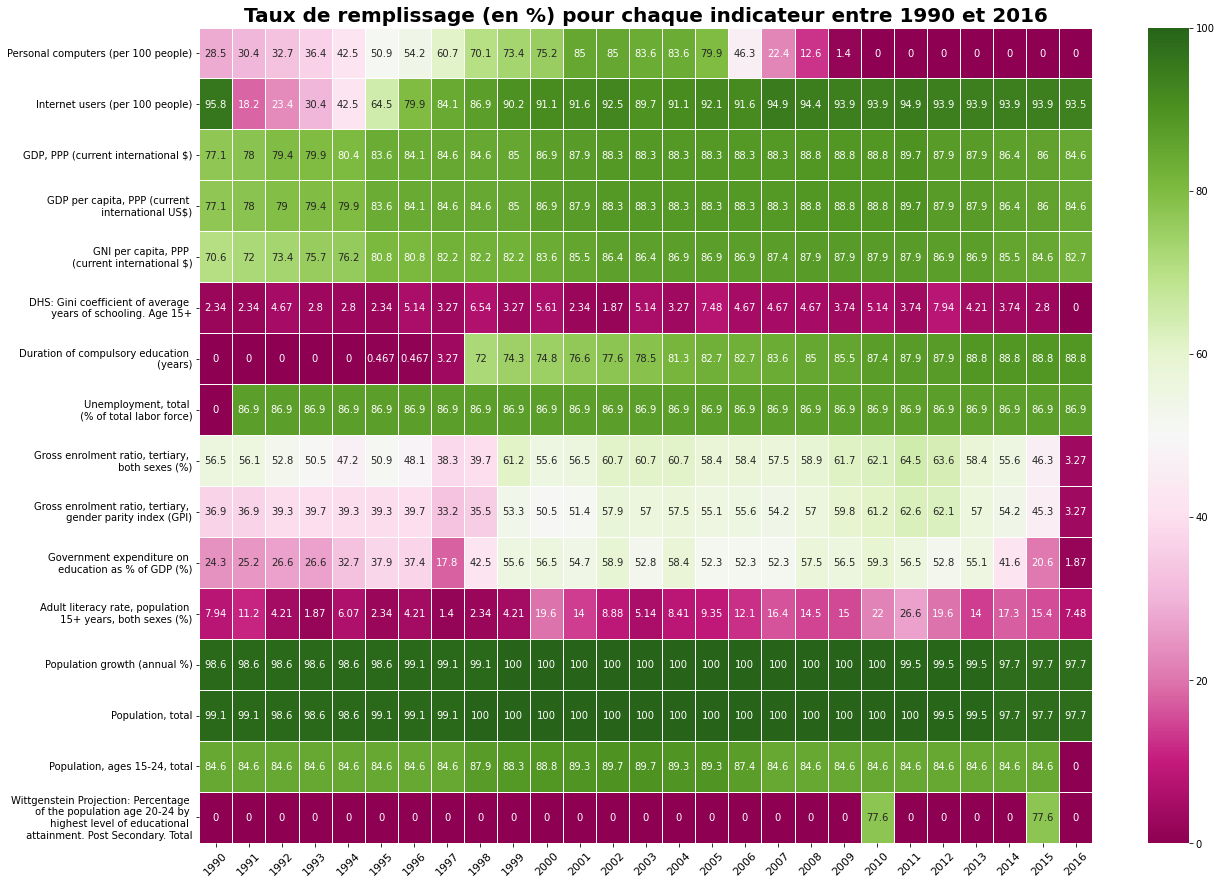

In [158]:
#On va concaténer ensemble les taux de remplissages pour chacun de nos indicateurs 
taux_remplis_indicateurs = pd.concat([datacomput_tauxremplis, datainternet_tauxremplis, dataGDP_PPP_tauxremplis, dataGDP_tauxremplis, 
                    dataGNI_tauxremplis, dataDHS_tauxremplis, dataduration_tauxremplis, dataunemploy_tauxremplis, 
                   datatertiary_both_tauxremplis, datatertiary_GPI_tauxremplis, dataexpend_tauxremplis, 
                    dataliteracy_tauxremplis, datapop_tauxremplis, datapopulation_tauxremplis, datapop_15_24_tauxremplis,
                   dataproj_tauxremplis], axis=0)

#On effectue la heatmap du taux de remplissage pour chaque indicateur choisi
plt.figure(figsize=(20,15))
heatmap = sns.heatmap(taux_remplis_indicateurs, annot = True, cmap="PiYG", fmt = '.3g', linewidth = .5)
plt.title('Taux de remplissage (en %) pour chaque indicateur entre 1990 et 2016', size = 20, fontweight = 'bold')
plt.yticks(size = 10)
plt.xticks(rotation = 45, size = 11)

plt.savefig('Heatmap_taux_remplissage.png')
plt.show()

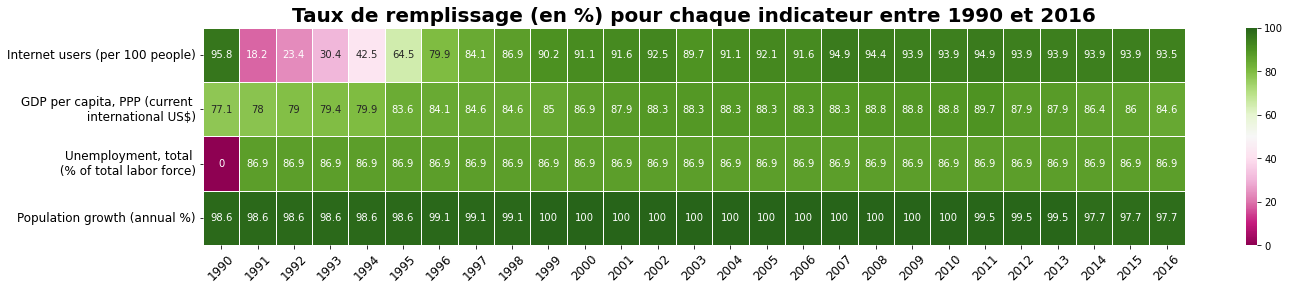

In [159]:
#Indicateurs sélectionnés en priorité 
indicateurs_select = pd.concat([datainternet_tauxremplis, dataGDP_tauxremplis, dataunemploy_tauxremplis, 
                                datapop_tauxremplis], axis=0)

#On effectue la heatmap du taux de remplissage pour chaque indicateur choisi
plt.figure(figsize=(22,4))
heatmap = sns.heatmap(indicateurs_select, annot = True, cmap="PiYG", fmt = '.3g', linewidth = .5)
plt.title('Taux de remplissage (en %) pour chaque indicateur entre 1990 et 2016', size = 20, fontweight = 'bold')
plt.yticks(size = 12)
plt.xticks(rotation = 45, size = 12)

plt.savefig('Heatmap_4indicateurs.png')
plt.show()

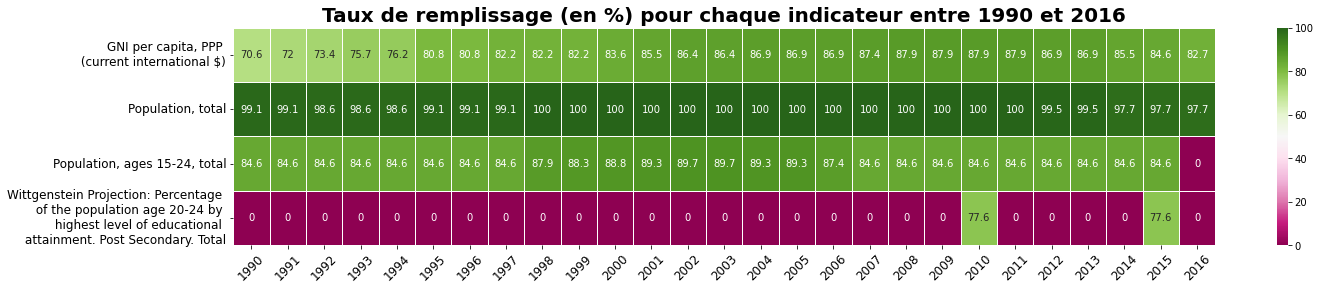

In [160]:
#Indicateurs sélectionnés en priorité 
indicateurs_secondaires = pd.concat([dataGNI_tauxremplis,datapopulation_tauxremplis, datapop_15_24_tauxremplis, 
                                     dataproj_tauxremplis], axis=0)

#On effectue la heatmap du taux de remplissage pour chaque indicateur choisi
plt.figure(figsize=(22,4))
heatmap = sns.heatmap(indicateurs_secondaires, annot = True, cmap="PiYG", fmt = '.3g', linewidth = .5)
plt.title('Taux de remplissage (en %) pour chaque indicateur entre 1990 et 2016', size = 20, fontweight = 'bold')
plt.yticks(size = 12)
plt.xticks(rotation = 45, size = 12)

plt.savefig('Heatmap_3indicateurs.png')
plt.show()

### Conclusion générale sur les indicateur observés : 
#### Nous avons choisi de travailler sur la période entre 1990 et 2016 car c'est la période de temps où l'on observe le plus de données.  

# Analyse exploratoire

### Nous allons maintenant essayer de visualiser nos données pour chaque indicateur choisi, par région. 

In [161]:
#Dans notre fichier dataData, nous allons retirer les colonnes qui ne nous intéressent pas. 
data = dataData.loc[:, :'2017'] #On sélectionne les données sur les années qui nous intéressent
data

Country Name Country Code  \
0        Arab World          ARB   
1        Arab World          ARB   
2        Arab World          ARB   
3        Arab World          ARB   
4        Arab World          ARB   
...             ...          ...   
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, ...   
1       Adjusted net enrolment rate, lower secondary, ...   
2       Adjusted net enrolment rate, lower secondary, ...   
3       Adjusted net enrolment rate, lower secondary, ...   
4       Adjusted net enrolment rate, primary, both sex...   
...                                                   ...   
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, population 15-24 years, b...   
886927  Youth literacy rate, population 15-24 years, f...   
886928  Youth literacy rate, population 15-24 years, g...   
886929  Youth literacy rate, population 15-24 years, m...   

              Indicator Code       1970       1971       1972       1973  \
0                 UIS.NERA.2        NaN        NaN        NaN        NaN   
1               UIS.NERA.2.F        NaN        NaN        NaN        NaN   
2             UIS.NERA.2.GPI        NaN        NaN        NaN        NaN   
3               UIS.NERA.2.M        NaN        NaN        NaN        NaN   
4                SE.PRM.TENR  54.822121  54.894138  56.209438  57.267109   
...                      ...        ...        ...        ...        ...   
886925      UIS.LP.AG15T24.M        NaN        NaN        NaN        NaN   
886926     SE.ADT.1524.LT.ZS        NaN        NaN        NaN        NaN   
886927  SE.ADT.1524.LT.FE.ZS        NaN        NaN        NaN        NaN   
886928  SE.ADT.1524.LT.FM.ZS        NaN        NaN        NaN        NaN   
886929  SE.ADT.1524.LT.MA.ZS        NaN        NaN        NaN        NaN   

             1974      1975  ...       2008       2009       2010  \
0             NaN       NaN  ...        NaN        NaN        NaN   
1             NaN       NaN  ...        NaN        NaN        NaN   
2             NaN       NaN  ...        NaN        NaN        NaN   
3             NaN       NaN  ...        NaN        NaN        NaN   
4       57.991138  59.36554  ...  84.011871  84.195961  85.211998   
...           ...       ...  ...        ...        ...        ...   
886925        NaN       NaN  ...        NaN        NaN        NaN   
886926        NaN       NaN  ...        NaN        NaN        NaN   
886927        NaN       NaN  ...        NaN        NaN        NaN   
886928        NaN       NaN  ...        NaN        NaN        NaN   
886929        NaN       NaN  ...        NaN        NaN        NaN   

                2011       2012      2013           2014  2015  2016  2017  
0                NaN        NaN       NaN            NaN   NaN   NaN   NaN  
1                NaN        NaN       NaN            NaN   NaN   NaN   NaN  
2                NaN        NaN       NaN            NaN   NaN   NaN   NaN  
3                NaN        NaN       NaN            NaN   NaN   NaN   NaN  
4           85.24514  86.101669  85.51194      85.320152   NaN   NaN   NaN  
...              ...        ...       ...            ...   ...   ...   ...  
886925  166679.00000        NaN       NaN  199464.000000   NaN   NaN   NaN  
886926      90.93070        NaN       NaN      90.428120   NaN   NaN   NaN  
886927      92.12456        NaN       NaN      93.188350   NaN   NaN   NaN  
886928       1.02828        NaN       NaN       1.063890   NaN   NaN   NaN  
886929      89.59058        NaN       NaN      87.591860   NaN   NaN   NaN  

[886930 rows x 52 columns]

### 1) Indicateur - GDP per capita, PPP (current international S)

In [162]:
#Sélection de notre indicateur 
data_indic_GDP = dataData.loc[dataData['Indicator Name'] == 'GDP per capita, PPP (current international $)', :]

#On va supprimer les colonnes des années 70 à 89 (70/80) qui ne contiennent pas de données et les années 2020 à 2100
data_indic_GDP_1990 = data_indic_GDP.drop(data_indic_GDP.loc[:, '1970':'1989'].columns, axis =1) 
data_indic_GDP_1990_2016 = data_indic_GDP_1990.drop(data_indic_GDP_1990.loc[:, '2017':'2100'].columns, axis = 1)

#On crée notre colonne contenant le nombre de valeurs entre 1990 et 2016. 
data_indic_GDP_1990_2016['Nbre_valeurs'] = data_indic_GDP_1990_2016.loc[:, '1990':'2016'].count(axis=1)

total3 = data_indic_GDP_1990_2016.loc[:, '1990':'2016'].shape[1]
print(total3)

#On sélectionne les lignes (pays) où on a des valeurs
data_indic_GDP_1990_2016.drop(data_indic_GDP_1990_2016[data_indic_GDP_1990_2016['Nbre_valeurs'] == 0].index, inplace = True)

#On va à nouveau créer une colonne qui calcule le taux de remplissage par "pays" (pour ceux dont on a des valeurs)
data_indic_GDP_1990_2016['Taux_remplissage'] = data_indic_GDP_1990_2016['Nbre_valeurs']*100/total3
data_indic_GDP_1990_2016.head()

27


Country Name Country Code  \
1247                                    Arab World          ARB   
4912                           East Asia & Pacific          EAS   
8577   East Asia & Pacific (excluding high income)          EAP   
12242                                    Euro area          EMU   
15907                        Europe & Central Asia          ECS   

                                      Indicator Name     Indicator Code  \
1247   GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
4912   GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
8577   GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
12242  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
15907  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   

               1990          1991          1992          1993          1994  \
1247    6468.098623   6366.215474   6720.916274   6965.819330   7166.538456   
4912    3195.396010   3437.207691   3660.129603   3910.123489   4193.029456   
8577    1438.584612   1577.276060   1754.608486   1957.796578   2179.700619   
12242  16955.109294  17927.705121  18508.899033  18743.785377  19557.937182   
15907  11549.690536  11841.836889  11871.953957  11942.076083  12158.758768   

               1995  ...          2010          2011          2012  \
1247    7307.018722  ...  14444.665884  14825.909580  15716.140656   
4912    4510.680964  ...  11724.724549  12613.241644  13482.132696   
8577    2407.551842  ...   8746.749009   9594.852212  10423.366960   
12242  20409.468193  ...  35887.894223  37437.945606  37805.121472   
15907  12629.427625  ...  26037.458465  27769.767834  28487.728406   

               2013          2014          2015          2016  Unnamed: 69  \
1247   16052.546530           NaN           NaN           NaN          NaN   
4912   14406.602766  15275.008777  16127.388020  17009.618389          NaN   
8577   11262.429123  12139.179320  12990.423856  13878.255428          NaN   
12242  38989.075120  40036.212144  41283.802057  42166.252985          NaN   
15907  29490.420944  30190.802834  30661.371416  31169.681595          NaN   

       Nbre_valeurs  Taux_remplissage  
1247             24         88.888889  
4912             27        100.000000  
8577             27        100.000000  
12242            27        100.000000  
15907            27        100.000000  

[5 rows x 34 columns]

##### Etant donné qu'on a encore 217 pays dont on a des données, on va regarder quels sont les pays pour lesquels on a le plus de données. 

In [163]:
#On va faire un tri de notre df en fonction du taux de remplissage.

data_indic_GDP_1990_2016.sort_values(by = 'Taux_remplissage', ascending = False)

#On va effectuer une sélection des pays ayant un taux de remplissage > 85%
display(data_indic_GDP_1990_2016.loc[data_indic_GDP_1990_2016['Taux_remplissage'] <= 85, :]) #Pays dont le taux de remplissage est inférieur ou égal à 85%. 
data_indic_GDP_1990_2016 = data_indic_GDP_1990_2016.loc[data_indic_GDP_1990_2016['Taux_remplissage'] > 85, :]
data_indic_GDP_1990_2016

#Il nous reste encore 196 pays. 

Country Name Country Code  \
92872             Afghanistan          AFG   
125857                  Aruba          ABW   
224812         Cayman Islands          CYM   
268792                Croatia          HRV   
316437                Eritrea          ERI   
320102                Estonia          EST   
397067                  Haiti          HTI   
474032                 Kosovo          XKX   
477697                 Kuwait          KWT   
488692                 Latvia          LVA   
503352                  Libya          LBY   
510682              Lithuania          LTU   
536337               Maldives          MDV   
565657                Moldova          MDA   
576652             Montenegro          MNE   
671942                  Qatar          QAT   
690267             San Marino          SMR   
693932  Sao Tome and Principe          STP   
704927                 Serbia          SRB   
726917               Slovenia          SVN   
741577            South Sudan          SSD   
800217            Timor-Leste          TLS   

                                       Indicator Name     Indicator Code  \
92872   GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
125857  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
224812  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
268792  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
316437  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
320102  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
397067  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
474032  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
477697  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
488692  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
503352  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
510682  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
536337  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
565657  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
576652  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
671942  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
690267  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
693932  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
704927  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
726917  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
741577  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
800217  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   

        1990  1991        1992        1993         1994          1995  ...  \
92872    NaN   NaN         NaN         NaN          NaN           NaN  ...   
125857   NaN   NaN         NaN         NaN          NaN           NaN  ...   
224812   NaN   NaN         NaN         NaN          NaN           NaN  ...   
268792   NaN   NaN         NaN         NaN          NaN   7862.044254  ...   
316437   NaN   NaN  758.884538  887.032297  1102.998181   1156.421043  ...   
320102   NaN   NaN         NaN         NaN          NaN   6279.799818  ...   
397067   NaN   NaN         NaN         NaN          NaN           NaN  ...   
474032   NaN   NaN         NaN         NaN          NaN           NaN  ...   
477697   NaN   NaN         NaN         NaN          NaN  59069.645948  ...   
488692   NaN   NaN         NaN         NaN          NaN   5504.705834  ...   
503352   NaN   NaN         NaN         NaN          NaN           NaN  ...   
510682   NaN   NaN         NaN         NaN          NaN   5920.144010  ...   
536337   NaN   NaN         NaN         NaN          NaN           NaN  ...   
565657   NaN   NaN         NaN         NaN          NaN   1899.622233  ...   
576652   NaN   NaN         NaN         

Country Name Country Code  \
1247                                     Arab World          ARB   
4912                            East Asia & Pacific          EAS   
8577    East Asia & Pacific (excluding high income)          EAP   
12242                                     Euro area          EMU   
15907                         Europe & Central Asia          ECS   
...                                             ...          ...   
862522                                Venezuela, RB          VEN   
866187                                      Vietnam          VNM   
877182                                  Yemen, Rep.          YEM   
880847                                       Zambia          ZMB   
884512                                     Zimbabwe          ZWE   

                                       Indicator Name     Indicator Code  \
1247    GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
4912    GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
8577    GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
12242   GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
15907   GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
...                                               ...                ...   
862522  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
866187  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
877182  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
880847  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
884512  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   

                1990          1991          1992          1993          1994  \
1247     6468.098623   6366.215474   6720.916274   6965.819330   7166.538456   
4912     3195.396010   3437.207691   3660.129603   3910.123489   4193.029456   
8577     1438.584612   1577.276060   1754.608486   1957.796578   2179.700619   
12242   16955.109294  17927.705121  18508.899033  18743.785377  19557.937182   
15907   11549.690536  11841.836889  11871.953957  11942.076083  12158.758768   
...              ...           ...           ...           ...           ...   
862522   9339.954430  10344.990590  10970.091229  11016.078374  10752.108076   
866187    970.235303   1042.925454   1138.479273   1238.056623   1353.236410   
877182   2150.416404   2249.059902   2365.105085   2394.019730   2489.362522   
880847   1513.668718   1523.168420   1492.426961   1590.968004   1446.803168   
884512   1684.211370   1790.826629   1629.103356   1650.955253   1806.814221   

                1995  ...          2010          2011          2012  \
1247     7307.018722  ...  14444.665884  14825.909580  15716.140656   
4912     4510.680964  ...  11724.724549  12613.241644  13482.132696   
8577     2407.551842  ...   8746.749009   9594.852212  10423.366960   
12242   20409.468193  ...  35887.894223  37437.945606  37805.121472   
15907   12629.427625  ...  26037.458465  27769.767834  28487.728406   
...              ...  ...           ...           ...           ...   
862522  11172.374173  ...  16210.289956  16981.335491  18004.465324   
866187   1488.645508  ...   4395.508581   4715.884653   5000.763055   
877182   2575.289180  ...   4388.144847   3805.237994   3863.289475   
880847   1479.696374  ...   3212.941881   3361.112069   3574.058520   
884512   1814.219959  ...   1445.042395   1667.137950   1905.837880   

                2013          2014          2015          2016  Unnamed: 69  \
1247    16052.546530           NaN           NaN           NaN          NaN   
4912    14406.602766  15275.008777  16127.388020  17009.618389          NaN   
8577    11262.429123  12139.179320  12990.423856  13878.255428          NaN   
12242   38989.075120  40036.212144  41283.802057  42166.252985          NaN   
15907   29490.420944  30190.802834  30661.371416  31169.681595          NaN   
...              ... 

#### Il faut effectuer une jointure entre notre df actuel avec le fichier "Country" qui contient les régions où l'on trouve ces pays. 

In [164]:
#On va effectuer la jointure avec notre df. 

data_GDP_Region = pd.merge(data_indic_GDP_1990_2016, dataCountry_new, on = 'Country Code', how = 'left')
display(data_GDP_Region)

Country Name Country Code  \
0                                     Arab World          ARB   
1                            East Asia & Pacific          EAS   
2    East Asia & Pacific (excluding high income)          EAP   
3                                      Euro area          EMU   
4                          Europe & Central Asia          ECS   
..                                           ...          ...   
190                                Venezuela, RB          VEN   
191                                      Vietnam          VNM   
192                                  Yemen, Rep.          YEM   
193                                       Zambia          ZMB   
194                                     Zimbabwe          ZWE   

                                    Indicator Name     Indicator Code  \
0    GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
1    GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
2    GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
3    GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
4    GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
..                                             ...                ...   
190  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
191  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
192  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
193  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
194  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   

             1990          1991          1992          1993          1994  \
0     6468.098623   6366.215474   6720.916274   6965.819330   7166.538456   
1     3195.396010   3437.207691   3660.129603   3910.123489   4193.029456   
2     1438.584612   1577.276060   1754.608486   1957.796578   2179.700619   
3    16955.109294  17927.705121  18508.899033  18743.785377  19557.937182   
4    11549.690536  11841.836889  11871.953957  11942.076083  12158.758768   
..            ...           ...           ...           ...           ...   
190   9339.954430  10344.990590  10970.091229  11016.078374  10752.108076   
191    970.235303   1042.925454   1138.479273   1238.056623   1353.236410   
192   2150.416404   2249.059902   2365.105085   2394.019730   2489.362522   
193   1513.668718   1523.168420   1492.426961   1590.968004   1446.803168   
194   1684.211370   1790.826629   1629.103356   1650.955253   1806.814221   

             1995  ...          2011          2012          2013  \
0     7307.018722  ...  14825.909580  15716.140656  16052.546530   
1     4510.680964  ...  12613.241644  13482.132696  14406.602766   
2     2407.551842  ...   9594.852212  10423.366960  11262.429123   
3    20409.468193  ...  37437.945606  37805.121472  38989.075120   
4    12629.427625  ...  27769.767834  28487.728406  29490.420944   
..            ...  ...           ...           ...           ...   
190  11172.374173  ...  16981.335491  18004.465324  18281.192970   
191   1488.645508  ...   4715.884653   5000.763055   5300.324164   
192   2575.289180  ...   3805.237994   3863.289475   4007.826700   
193   1479.696374  ...   3361.112069   3574.058520   3701.392674   
194   1814.219959  ...   1667.137950   1905.837880   1997.052201   

             2014          2015          2016  Unnamed: 69  Nbre_valeurs  \
0             NaN           NaN           NaN          NaN            24   
1    15275.008777  16127.388020  17009.618389          NaN            27   
2    12139.179320  12990.423856  13878.255428          NaN            27   
3    40036.212144  41283.802057  42166.252985          NaN            27   
4    30190.802834  30661.371416  31169.681595          NaN            27   
..            ...           ...           ...          ...           ...   
190  17639.136767           NaN           NaN          NaN            25   
191   5656.954905   6046.738

##### Nous observons que certaines variables classées comme "Country Name" n'ont pas de données, car ce ne sont pas des pays à proprement parlé. 

##### Peut-être faudrait-il les regrouper dans un autre df et les traiter à part? 

In [165]:
#On va faire un nettoyage et enlever les "pays" ayant des valeurs "Regions" manquantes.
regions_null = data_GDP_Region[data_GDP_Region["Region"].isnull()].index
data_GDP_Region_nettoye = data_GDP_Region.drop(regions_null)
display(data_GDP_Region_nettoye.head())

#data_GDP_Region.to_csv('data_GDP_Region.csv', index=True, sep=';')

Country Name Country Code  \
25              Albania          ALB   
26              Algeria          DZA   
27               Angola          AGO   
28  Antigua and Barbuda          ATG   
29            Argentina          ARG   

                                   Indicator Name     Indicator Code  \
25  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
26  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
27  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
28  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
29  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   

            1990          1991          1992          1993          1994  \
25   2721.615212   1992.073688   1902.286383   2147.575112   2389.946945   
26   6616.408352   6591.301496   6704.650988   6573.667135   6518.026530   
27   2840.200763   2811.287126   2591.326276   1932.804031   1978.438032   
28  10587.593409  11076.679699  11272.825320  11887.902436  12629.818947   
29   6990.554045   8024.592354   9061.645587   9693.967279  10342.476242   

            1995  ...          2011          2012          2013          2014  \
25   2781.413989  ...  10207.700674  10526.248328  10580.511504  11332.506541   
26   6777.297778  ...  12990.345016  13404.411784  13715.743579  14203.292233   
27   2162.917203  ...   5911.254334   6109.136612   6400.673376   6594.397826   
28  12012.906954  ...  18605.316754  19398.059477  19480.102598  20618.995752   
29  10129.777793  ...  19629.351845  19579.006484  20161.496832  19801.259115   

            2015          2016  Unnamed: 69  Nbre_valeurs  Taux_remplissage  \
25  11449.094589  11865.501400          NaN            27             100.0   
26  14643.343064  15042.442301          NaN            27             100.0   
27   6648.124016   6466.665045          NaN            27             100.0   
28  21503.952551  22705.482203          NaN            27             100.0   
29  20379.779854  19978.640971          NaN            27             100.0   

                        Region  
25       Europe & Central Asia  
26  Middle East & North Africa  
27          Sub-Saharan Africa  
28   Latin America & Caribbean  
29   Latin America & Caribbean  

[5 rows x 35 columns]

In [166]:
#Nous allons maintenant grouper les données en fonction de la variable "Region" pour que ce soit mieux structuré

data_GDP_Region_nettoye_final = data_GDP_Region_nettoye.groupby('Region').mean()
display(data_GDP_Region_nettoye_final)

#A partir de ces données, on va pouvoir analyser par région les valeurs que l'on a selon les années. 
data_GDP_Region_transpose = data_GDP_Region_nettoye_final.transpose().reset_index() #On transpose notre df pour effectuer nos analyses.
data_GDP_Region_transpose = data_GDP_Region_transpose.iloc[:-3, :] #On enlève les 3 dernières lignes qui ne nous servent pas.
data_GDP_Region_transpose = data_GDP_Region_transpose.rename(columns = {'index' : 'Annees'}, inplace=False)
display(data_GDP_Region_transpose)

1990          1991          1992  \
Region                                                                 
East Asia & Pacific          8265.398778   8743.911245   9197.132627   
Europe & Central Asia       12099.155670  12258.994871  12170.992049   
Latin America & Caribbean    5864.763184   6127.476007   6389.235430   
Middle East & North Africa  13338.521144  13769.758650  14286.371174   
North America               23424.406981  23575.654527  24326.152193   
South Asia                   1431.252210   1502.796576   1595.898852   
Sub-Saharan Africa           1963.473144   2035.480448   2055.083535   

                                    1993          1994          1995  \
Region                                                                 
East Asia & Pacific          9286.181162   9796.916073  10296.748755   
Europe & Central Asia       12321.523536  12444.830839  12982.346893   
Latin America & Caribbean    6702.690568   7001.445165   7230.915916   
Middle East & North Africa  14617.995431  15010.995461  15534.698440   
North America               25360.824071  26393.625949  27586.046263   
South Asia                   1677.734890   1779.926653   1893.891182   
Sub-Saharan Africa           2084.512974   2111.624463   2195.634280   

                                    1996          1997          1998  \
Region                                                                 
East Asia & Pacific         10676.429619  10920.024107  10694.138765   
Europe & Central Asia       13565.900342  14249.671797  14895.872214   
Latin America & Caribbean    7534.340860   7929.517613   8227.238050   
Middle East & North Africa  16110.764532  16769.823249  17074.913731   
North America               28586.952984  30091.353319  31370.586946   
South Asia                   1994.324067   2083.923213   2165.114789   
Sub-Saharan Africa           2312.449797   2494.859190   2579.452361   

                                    1999  ...          2010          2011  \
Region                                    ...                               
East Asia & Pacific         11032.252738  ...  19181.243924  20745.277169   
Europe & Central Asia       15672.839356  ...  27069.369475  28351.525162   
Latin America & Caribbean    8415.018993  ...  13161.418812  13749.889237   
Middle East & North Africa  17285.357608  ...  21437.656346  21929.883403   
North America               32952.389749  ...  47885.111048  48780.149031   
South Asia                   2279.056102  ...   4588.579851   4927.796643   
Sub-Saharan Africa           2631.949269  ...   4550.310435   4800.211504   

                                    2012          2013          2014  \
Region                                                                 
East Asia & Pacific         21652.699651  22778.410643  23227.983107   
Europe & Central Asia       28944.584960  29998.569170  30957.655064   
Latin America & Caribbean   14193.683772  14688.643628  14461.423501   
Middle East & North Africa  22631.545001  23407.122713  24068.177491   
North America               48897.638815  49773.563259  49840.280160   
South Asia                   5264.847107   5492.892478   5832.682706   
Sub-Saharan Africa           5044.787714   5190.514673   5344.485098   

                                    2015          2016  Unnamed: 69  \
Region                                                                
East Asia & Pacific         22666.735799  22970.915521          NaN   
Europe & Central Asia       32045.023259  32682.819029          NaN   
Latin America & Caribbean   14658.593826  14943.660268          NaN   
Middle East & North Africa  24639.500707  23988.484414          NaN   
North America               50336.977776  50831.671257          NaN   
South Asia                   6170.739743   6525.553621          NaN   
Sub-Saharan Africa           5348.792972   5378.123067          NaN   

                            Nbre_valeurs  Taux_remplissage  
Region                                       

Region Annees  East Asia & Pacific  Europe & Central Asia  \
0        1990          8265.398778           12099.155670   
1        1991          8743.911245           12258.994871   
2        1992          9197.132627           12170.992049   
3        1993          9286.181162           12321.523536   
4        1994          9796.916073           12444.830839   
5        1995         10296.748755           12982.346893   
6        1996         10676.429619           13565.900342   
7        1997         10920.024107           14249.671797   
8        1998         10694.138765           14895.872214   
9        1999         11032.252738           15672.839356   
10       2000         11650.607524           16942.824601   
11       2001         11987.591324           17768.408925   
12       2002         12548.484623           18552.800719   
13       2003         13157.220827           19098.340337   
14       2004         14293.621002           20383.878139   
15       2005         15143.688121           21537.473521   
16       2006         16322.743111           23751.015831   
17       2007         17500.126996           25457.122624   
18       2008         17808.536903           26931.621719   
19       2009         17690.213808           26180.070636   
20       2010         19181.243924           27069.369475   
21       2011         20745.277169           28351.525162   
22       2012         21652.699651           28944.584960   
23       2013         22778.410643           29998.569170   
24       2014         23227.983107           30957.655064   
25       2015         22666.735799           32045.023259   
26       2016         22970.915521           32682.819029   

Region  Latin America & Caribbean  Middle East & North Africa  North America  \
0                     5864.763184                13338.521144   23424.406981   
1                     6127.476007                13769.758650   23575.654527   
2                     6389.235430                14286.371174   24326.152193   
3                     6702.690568                14617.995431   25360.824071   
4                     7001.445165                15010.995461   26393.625949   
5                     7230.915916                15534.698440   27586.046263   
6                     7534.340860                16110.764532   28586.952984   
7                     7929.517613                16769.823249   30091.353319   
8                     8227.238050                17074.913731   31370.586946   
9                     8415.018993                17285.357608   32952.389749   
10                    8805.661597                18409.763879   35390.139477   
11                    9061.258892                18577.486861   37107.874472   
12                    9223.170949                18552.795035   37574.461353   
13                    9604.549289                18877.926778   39221.193433   
14                   10241.453918                19865.064018   41170.706183   
15                   10976.756225                20248.271303   43439.935645   
16                   11875.677228                20879.717877   46132.122273   
17                   12601.567965                21259.886500   48048.164815   
18                   13100.458279                21607.196040   48989.219582   
19                   12779.196159                21049.420546   47037.597249   
20                   13161.418812                21437.656346   47885.111048   
21                   13749.889237                21929.883403   48780.149031   
22                   14193.683772                22631.545001   48897.638815   
23                   14688.643628                23407.122713   49773.563259   
24                   14461.423501                24068.177491   49840.280160   
25                   14658.593826                24639.500707   50336.977776   
26                   14943.660268                23988.484414   50831.671257   

Region   South Asia  Sub-Saharan Africa  
0       

In [167]:
#On va faire un describe de nos colonnes pour observer quels sont les ordres de grandeurs (moyenne, ecart-type) pour chaque region
describe_GDP = data_GDP_Region_transpose.describe()
display(describe_GDP)

Region  East Asia & Pacific  Europe & Central Asia  Latin America & Caribbean  \
count             27.000000              27.000000                  27.000000   
mean           14823.527182           20715.378916               10353.692790   
std             5066.481808            7151.904055                3080.243233   
min             8265.398778           12099.155670                5864.763184   
25%            10685.284192           13907.786070                7731.929236   
50%            13157.220827           19098.340337                9604.549289   
75%            18494.890414           27000.495597               13130.938545   
max            23227.983107           32682.819029               14943.660268   

Region  Middle East & North Africa  North America   South Asia  \
count                    27.000000      27.000000    27.000000   
mean                  19082.559197   38671.288845  3315.355586   
std                    3400.965505    9933.654952  1572.541102   
min                   13338.521144   23424.406981  1431.252210   
25%                   16440.293891   29339.153152  2039.123640   
50%                   18877.926778   39221.193433  2782.812115   
75%                   21522.426193   48414.156923  4427.666637   
max                   24639.500707   50831.671257  6525.553621   

Region  Sub-Saharan Africa  
count            27.000000  
mean           3492.109291  
std            1221.579437  
min            1963.473144  
25%            2403.654493  
50%            3126.980565  
75%            4530.652780  
max            5378.123067

#### D'après ce que l'on observe, la moyenne la plus élevée semble être en Amérique du Nord (50 831.7), et la plus faible en Afrique Subsaharienne (5 378.11). 

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


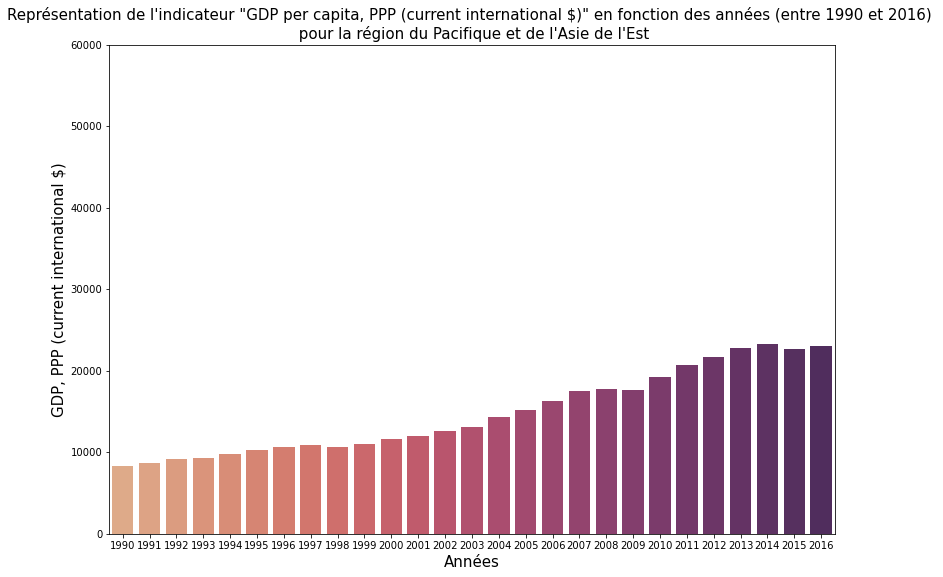

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


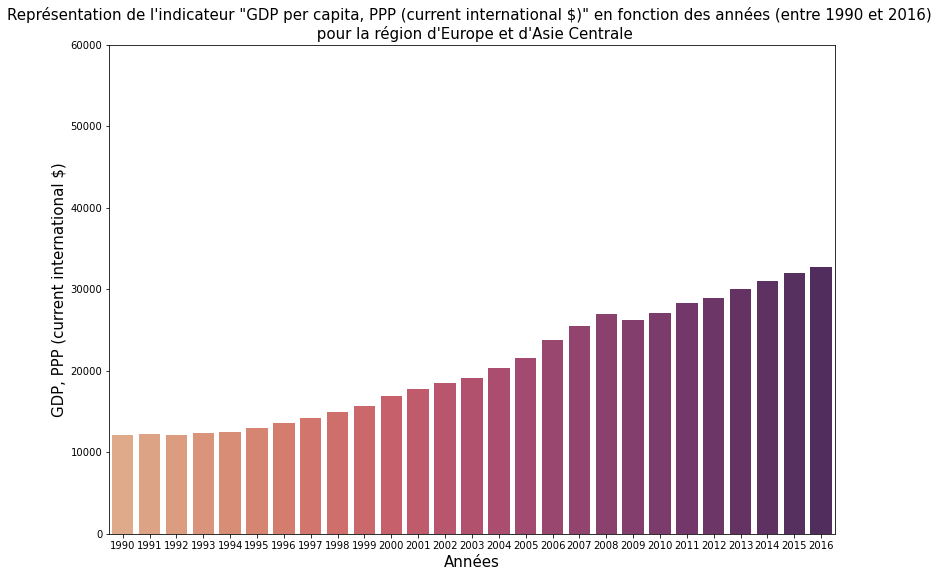

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


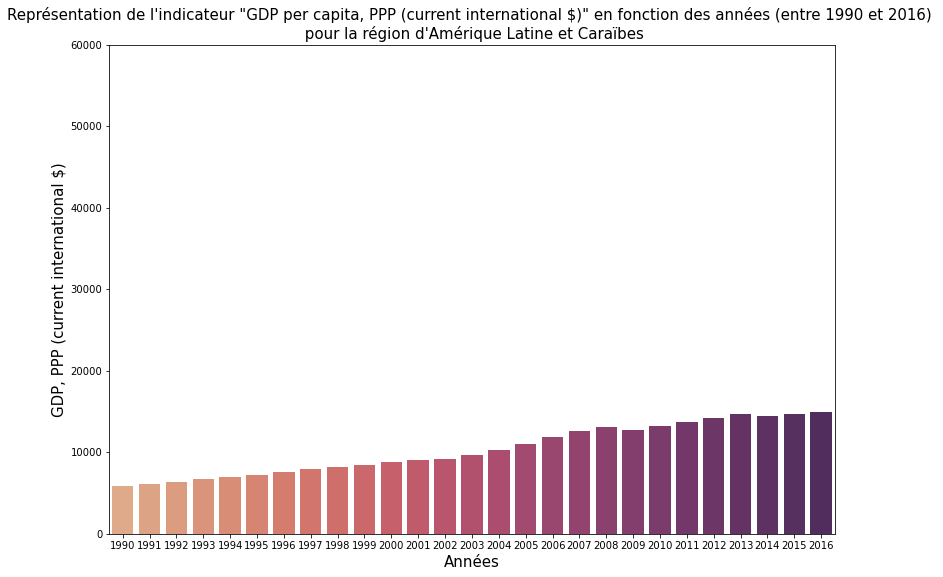

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


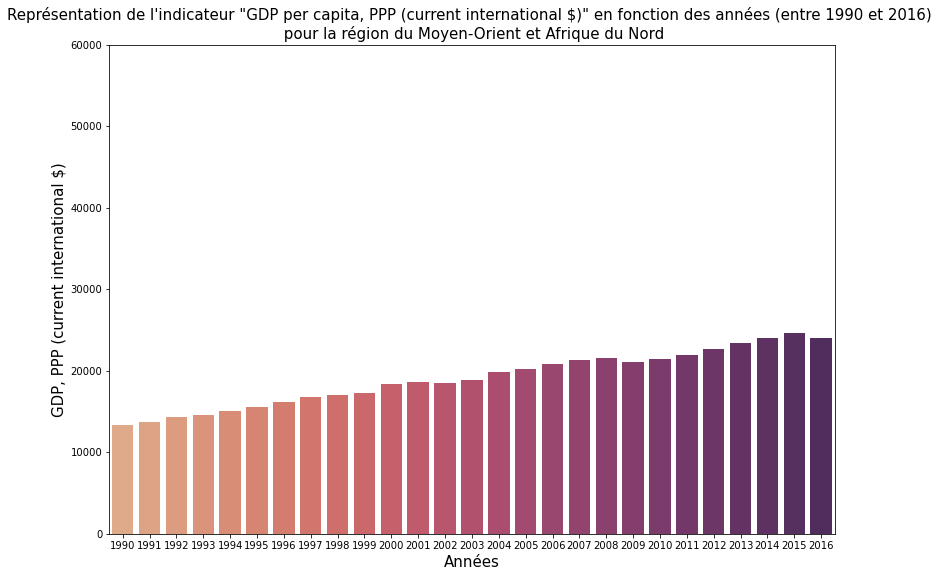

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


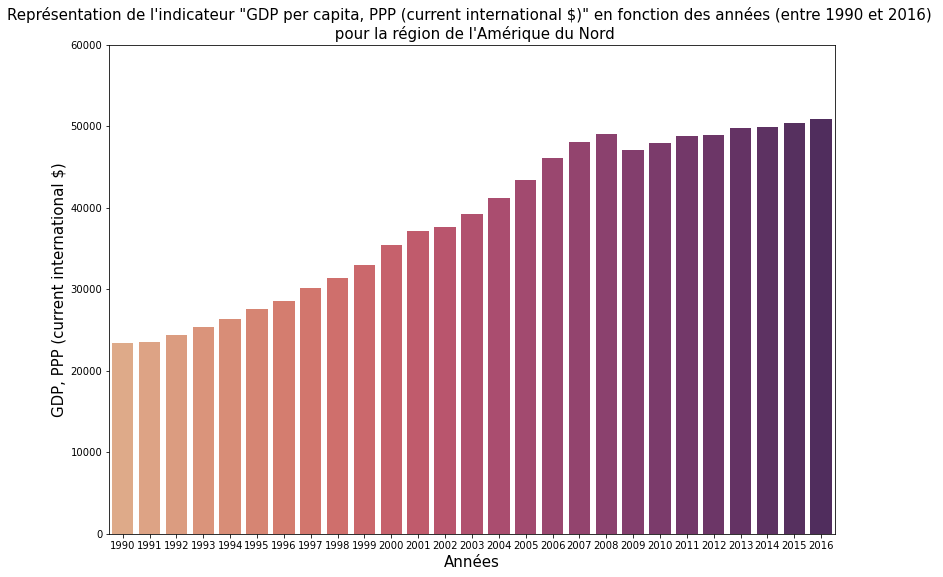

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


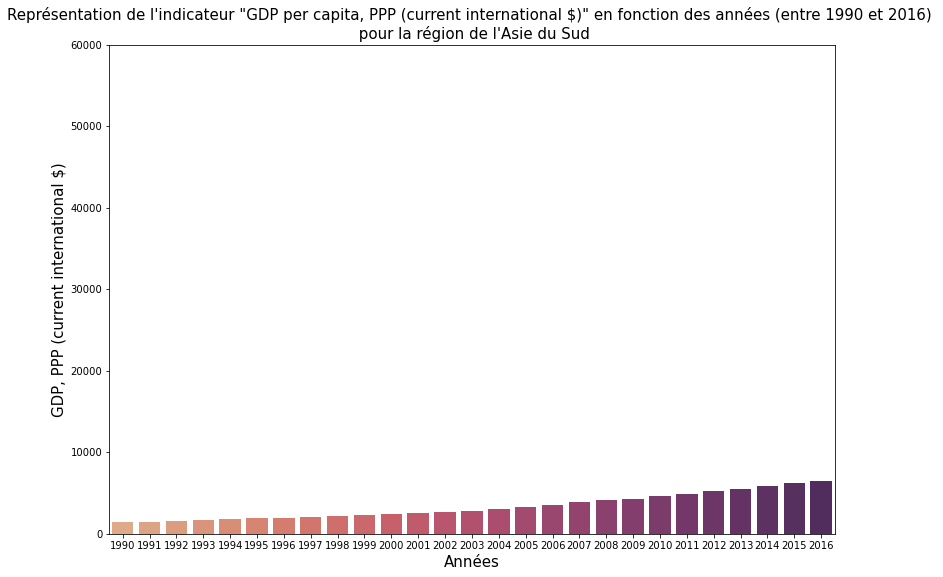

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


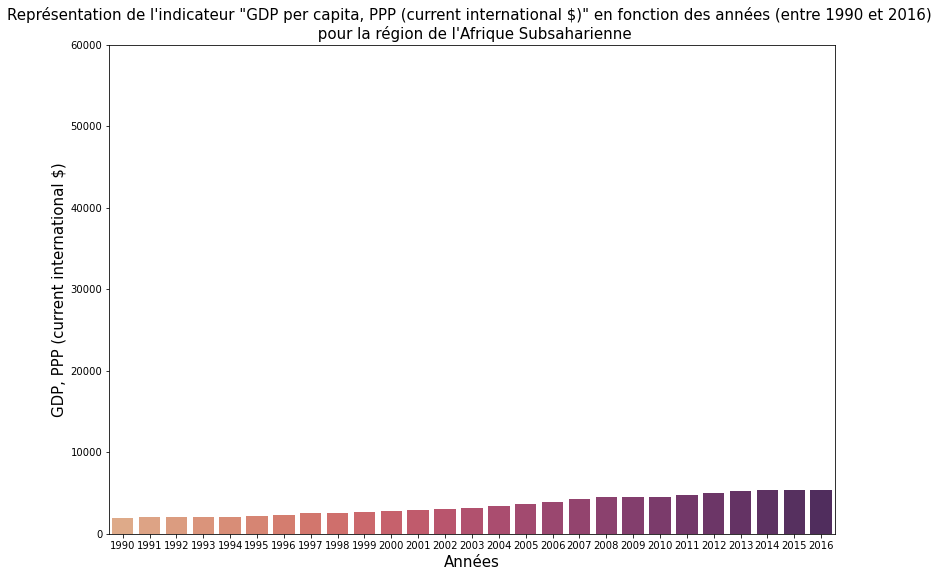

In [168]:
#On va effectuer un graphique avec nos données

#Création du graphique
x = data_GDP_Region_transpose['Annees']
y1 = data_GDP_Region_transpose['East Asia & Pacific']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data =data_GDP_Region_transpose, palette = 'flare')


#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "GDP per capita, PPP (current international $)" en fonction des années (entre 1990 et 2016) \n pour la région du Pacifique et de l\'Asie de l\'Est' , fontsize = 15)
ax.set_ylabel('GDP, PPP (current international $)', fontsize = 15)
plt.ylim(0e12, 60000) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

plt.savefig('indicateur_GDP_Asie_Est_Pacifique.png')
plt.show()

x = data_GDP_Region_transpose['Annees']
y1 = data_GDP_Region_transpose['Europe & Central Asia']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data =data_GDP_Region_transpose, palette = 'flare')


#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "GDP per capita, PPP (current international $)" en fonction des années (entre 1990 et 2016) \n pour la région d\'Europe et d\'Asie Centrale' , fontsize = 15)
ax.set_ylabel('GDP, PPP (current international $)', fontsize = 15)
plt.ylim(0e12, 60000) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

plt.savefig('indicateur_GDP_Europe_Asie_Centrale.png')
plt.show()

x = data_GDP_Region_transpose['Annees']
y1 = data_GDP_Region_transpose['Latin America & Caribbean']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data =data_GDP_Region_transpose, palette = 'flare')


#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "GDP per capita, PPP (current international $)" en fonction des années (entre 1990 et 2016) \n pour la région d\'Amérique Latine et Caraïbes' , fontsize = 15)
ax.set_ylabel('GDP, PPP (current international $)', fontsize = 15)
plt.ylim(0e12, 60000) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

plt.savefig('indicateur_GDP_Amerique_Latine_Caraibes.png')
plt.show()

x = data_GDP_Region_transpose['Annees']
y1 = data_GDP_Region_transpose['Middle East & North Africa']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data =data_GDP_Region_transpose, palette = 'flare')


#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "GDP per capita, PPP (current international $)" en fonction des années (entre 1990 et 2016) \n pour la région du Moyen-Orient et Afrique du Nord' , fontsize = 15)
ax.set_ylabel('GDP, PPP (current international $)', fontsize = 15)
plt.ylim(0e12, 60000) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

plt.savefig('indicateur_GDP_Moyen_Orient_Afrique_Nord.png')
plt.show()

x = data_GDP_Region_transpose['Annees']
y1 = data_GDP_Region_transpose['North America']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data =data_GDP_Region_transpose, palette = 'flare')


#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "GDP per capita, PPP (current international $)" en fonction des années (entre 1990 et 2016) \n pour la région de l\'Amérique du Nord' , fontsize = 15)
ax.set_ylabel('GDP, PPP (current international $)', fontsize = 15)
plt.ylim(0e12, 60000) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

plt.savefig('indicateur_GDP_Amerique_Nord.png')
plt.show()

x = data_GDP_Region_transpose['Annees']
y1 = data_GDP_Region_transpose['South Asia']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data =data_GDP_Region_transpose, palette = 'flare')


#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "GDP per capita, PPP (current international $)" en fonction des années (entre 1990 et 2016) \n pour la région de l\'Asie du Sud' , fontsize = 15)
ax.set_ylabel('GDP, PPP (current international $)', fontsize = 15)
plt.ylim(0e12, 60000) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

plt.savefig('indicateur_GDP_Asie_Sud.png')
plt.show()

x = data_GDP_Region_transpose['Annees']
y1 = data_GDP_Region_transpose['Sub-Saharan Africa']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data =data_GDP_Region_transpose, palette = 'flare')

#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "GDP per capita, PPP (current international $)" en fonction des années (entre 1990 et 2016) \n pour la région de l\'Afrique Subsaharienne' , fontsize = 15)
ax.set_ylabel('GDP, PPP (current international $)', fontsize = 15)
plt.ylim(0e12, 60000) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

plt.savefig('indicateur_GDP_Afrique_Subsaharienne.png')
plt.show()

##### D'après les différents graphiques, de manière globale, nous observons pour chaque région, une augmentation au fil des années (+ ou - forte) du PIB utilisant le taux de parité de pouvoir d'achat (en dollars international). Sauf pour la région d'Europe et d'Asie Centrale où on observe une petite diminution à partir de 2014. Néanmoins, pour cette même année, en Amérique du Nord, il est observé une forte augmentation. 

##### Nous avons fixé l'axe des ordonnées dans le même ordre de grandeur, cela nous a permis de voir la région pour lesquelles les données sont les plus fortes -> Amérique du Nord, et les régions pour lesquelles les données semblent les plus faibles -> Afrique Subsaharienne. 

### On va calculer l'amplitude de chaque région afin de nous donner une idée sur l'étendue des données

In [169]:
#Région du Pacifique et de l'Asie de l'Est
Asie_Est_max = data_GDP_Region_transpose['East Asia & Pacific'].max()
Asie_Est_min = data_GDP_Region_transpose['East Asia & Pacific'].min()
ampl_Asie_Est = Asie_Est_max - Asie_Est_min
print("L'amplitude pour la région du Pacifique et de l'Asie de l'Est est de", round(ampl_Asie_Est, 2))

#Région d'Europe et Asie Centrale
Europe_Asie_max = data_GDP_Region_transpose['Europe & Central Asia'].max()
Europe_Asie_min = data_GDP_Region_transpose['Europe & Central Asia'].min()
ampl_Europe_Asie = Europe_Asie_max - Europe_Asie_min
print("L'amplitude pour la région d'Europe et d'Asie Centrale est de", round(ampl_Europe_Asie, 2))

#Région de l'Amérique latine et des Caraïbes
Am_Latine_max = data_GDP_Region_transpose['Latin America & Caribbean'].max()
Am_Latine_min = data_GDP_Region_transpose['Latin America & Caribbean'].min()
ampl_Am_Latine = Am_Latine_max - Am_Latine_min 
print("L'amplitude pour la région de l'Amérique Latine et des Caraïbes est de", round(Am_Latine_min, 2))

#Région du Moyen-Orient et de l'Afrique du Nord
MO_Af_max = data_GDP_Region_transpose['Middle East & North Africa'].max()
MO_Af_min = data_GDP_Region_transpose['Middle East & North Africa'].min()
ampl_MO_Af = MO_Af_max - MO_Af_min
print("L'amplitude pour la région du Moyen-Orient et de l'Afrique du Nord est de", round(ampl_MO_Af, 2))

#Région de l'Amérique du Nord
Am_Nord_max = data_GDP_Region_transpose['North America'].max()
Am_Nord_min = data_GDP_Region_transpose['North America'].min()
ampl_Am_Nord = Am_Nord_max - Am_Nord_min
print("L'amplitude pour la région de l'Amérique du Nord est de", round(ampl_Am_Nord, 2))

#Région de l'Asie du Sud 
Asie_Sud_max = data_GDP_Region_transpose['South Asia'].max()
Asie_Sud_min = data_GDP_Region_transpose['South Asia'].min()
ampl_Asie_Sud = Asie_Sud_max - Asie_Sud_min 
print("L'amplitude pour la région de l'Asie du Sud est de", round(ampl_Asie_Sud, 2))

#Région de l'Afrique Subsaharienne
Af_Sub_max = data_GDP_Region_transpose['Sub-Saharan Africa'].max()
Af_Sub_min = data_GDP_Region_transpose['Sub-Saharan Africa'].min()
ampl_Af_Sub = Af_Sub_max - Af_Sub_min 
print("L'amplitude pour la région de l'Afrique Subsaharienne", round(ampl_Af_Sub, 2))

L'amplitude pour la région du Pacifique et de l'Asie de l'Est est de 14962.58
L'amplitude pour la région d'Europe et d'Asie Centrale est de 20583.66
L'amplitude pour la région de l'Amérique Latine et des Caraïbes est de 5864.76
L'amplitude pour la région du Moyen-Orient et de l'Afrique du Nord est de 11300.98
L'amplitude pour la région de l'Amérique du Nord est de 27407.26
L'amplitude pour la région de l'Asie du Sud est de 5094.3
L'amplitude pour la région de l'Afrique Subsaharienne 3414.65


##### D'après les calculs d'amplitude, nous pouvons voir que l'amplitude la plus faible se situe dans la région de l'Afrique Subsaharienne avec 3414 et l'amplitude la plus élevée se situe dans la région de l'Amérique du Nord avec 27407.
##### Cela permettrait d'indiquer que l'évolution au fil des années, pour cet indicateur, semble le plus fort pour l'Amérique du Nord. Tandis que l'évolution, bien qu'elle soit présente, semble être bien plus faible pour l'Afrique Subsaharienne.  

### 2) Indicateur - Internet users (per 100 people)

In [170]:
#Sélection de notre indicateur 
data_indic_internet = dataData.loc[dataData['Indicator Name'] == 'Internet users (per 100 people)', :]
data_indic_internet

#On va supprimer les colonnes des années 70 à 89 (70/80) qui ne contiennent pas de données et les années 2020 à 2100.
data_indic_internet_1990 = data_indic_internet.drop(data_indic_internet.loc[:, '1970':'1989'].columns, axis =1)
data_indic_internet_1990_2016 = data_indic_internet_1990.drop(data_indic_internet_1990.loc[:, '2017':'2100'].columns, axis=1)
data_indic_internet_1990_2016

#On crée notre colonne contenant le nombre de valeurs entre 1990 et 2016. 
data_indic_internet_1990_2016['Nbre_valeurs'] = data_indic_internet_1990_2016.loc[:, '1990':'2016'].count(axis=1)

total3 = data_indic_internet_1990_2016.loc[:, '1990':'2016'].shape[1] #On ne prend en compte que les colonnes que l'on calcule
print(total3)

#On sélectionne les lignes (pays) où on a des valeurs
data_indic_internet_1990_2016.drop(data_indic_internet_1990_2016[data_indic_internet_1990_2016['Nbre_valeurs'] == 0].index, inplace = True)

#On va à nouveau créer une colonne qui calcule le taux de remplissage par pays (pour ceux dont on a des valeurs)
data_indic_internet_1990_2016['Taux_remplissage'] = data_indic_internet_1990_2016['Nbre_valeurs']*100/total3
data_indic_internet_1990_2016.head()

27


Country Name Country Code  \
1375                                    Arab World          ARB   
5040                           East Asia & Pacific          EAS   
8705   East Asia & Pacific (excluding high income)          EAP   
12370                                    Euro area          EMU   
16035                        Europe & Central Asia          ECS   

                        Indicator Name  Indicator Code      1990     1991  \
1375   Internet users (per 100 people)  IT.NET.USER.P2  0.000000      NaN   
5040   Internet users (per 100 people)  IT.NET.USER.P2  0.007288      NaN   
8705   Internet users (per 100 people)  IT.NET.USER.P2  0.000000      NaN   
12370  Internet users (per 100 people)  IT.NET.USER.P2  0.072801  0.16974   
16035  Internet users (per 100 people)  IT.NET.USER.P2  0.048116      NaN   

           1992      1993      1994      1995  ...       2010       2011  \
1375        NaN       NaN       NaN  0.017025  ...  26.747251  29.707761   
5040        NaN  0.079278  0.117382  0.209578  ...  34.230838  37.365156   
8705        NaN  0.001162  0.004033  0.013045  ...  28.957572  32.385761   
12370  0.326615  0.469641  0.848077  1.702975  ...  71.036722  72.001164   
16035  0.262590  0.317773  0.564867  1.024013  ...  56.119117  58.834630   

            2012       2013       2014       2015       2016  Unnamed: 69  \
1375   34.014224  36.868602        NaN        NaN        NaN          NaN   
5040   40.709345  44.577349  46.812103  49.787924  52.796321          NaN   
8705   36.068349  39.708933  42.062234  45.210103  48.386621          NaN   
12370  74.092136  75.821560  77.002322  78.666346  80.446726          NaN   
16035  63.486253  66.306669  68.944351  71.162003  73.914751          NaN   

       Nbre_valeurs  Taux_remplissage  
1375             20         74.074074  
5040             25         92.592593  
8705             25         92.592593  
12370            27        100.000000  
16035            26         96.296296  

[5 rows x 34 columns]

In [171]:
#On va faire un tri de notre df en fonction du taux de remplissage.

data_indic_internet_1990_2016.sort_values(by = 'Taux_remplissage', ascending = False)

#On va effectuer une sélection des pays ayant un taux de remplissage > 85%
display(data_indic_internet_1990_2016.loc[data_indic_internet_1990_2016['Taux_remplissage'] <= 85, :]) #Pays dont le taux de remplissage est inférieur ou égal à 85%.
data_indic_internet_1990_2016 = data_indic_internet_1990_2016.loc[data_indic_internet_1990_2016['Taux_remplissage'] > 85, :]
data_indic_internet_1990_2016.head()

#Il nous reste encore 145 pays. 

Country Name Country Code  \
1375                                      Arab World          ARB   
27030         Heavily indebted poor countries (HIPC)          HPC   
41690   Least developed countries: UN classification          LDC   
49020                                     Low income          LIC   
78340                             Sub-Saharan Africa          SSF   
...                                              ...          ...   
829665                                        Tuvalu          TUV   
858985                                       Vanuatu          VUT   
866315                                       Vietnam          VNM   
873645                            West Bank and Gaza          PSE   
877310                                   Yemen, Rep.          YEM   

                         Indicator Name  Indicator Code  1990  1991  1992  \
1375    Internet users (per 100 people)  IT.NET.USER.P2   0.0   NaN   NaN   
27030   Internet users (per 100 people)  IT.NET.USER.P2   0.0   NaN   NaN   
41690   Internet users (per 100 people)  IT.NET.USER.P2   0.0   NaN   NaN   
49020   Internet users (per 100 people)  IT.NET.USER.P2   0.0   NaN   NaN   
78340   Internet users (per 100 people)  IT.NET.USER.P2   0.0   NaN   NaN   
...                                 ...             ...   ...   ...   ...   
829665  Internet users (per 100 people)  IT.NET.USER.P2   0.0   NaN   NaN   
858985  Internet users (per 100 people)  IT.NET.USER.P2   0.0   NaN   NaN   
866315  Internet users (per 100 people)  IT.NET.USER.P2   0.0   NaN   NaN   
873645  Internet users (per 100 people)  IT.NET.USER.P2   0.0   NaN   NaN   
877310  Internet users (per 100 people)  IT.NET.USER.P2   0.0   NaN   NaN   

        1993  1994      1995  ...       2010       2011       2012       2013  \
1375     NaN   NaN  0.017025  ...  26.747251  29.707761  34.014224  36.868602   
27030    NaN   NaN       NaN  ...   4.929979   5.408633   6.684818   8.144384   
41690    NaN   NaN       NaN  ...   4.271479   4.799939   6.060082   7.538076   
49020    NaN   NaN       NaN  ...   3.259843   3.724865   4.709011   6.055549   
78340    NaN   NaN       NaN  ...   7.154990   8.489823  10.366220  12.417036   
...      ...   ...       ...  ...        ...        ...        ...        ...   
829665   NaN   NaN       NaN  ...  25.000000  30.000000  35.000000  37.000000   
858985   NaN   NaN       NaN  ...   8.000000   9.200000  10.598000  11.300000   
866315   NaN   NaN       NaN  ...  30.650000  35.070000  36.800000  38.500000   
873645   NaN   NaN       NaN  ...  37.400000  41.080000  43.400000  46.600000   
877310   NaN   NaN       NaN  ...  12.350000  14.905000  17.446500  20.000000   

             2014       2015       2016  Unnamed: 69  Nbre_valeurs  \
1375          NaN        NaN        NaN          NaN            20   
27030   10.459854  13.142045  15.667876          NaN            22   
41690   10.467355  13.024301  15.614896          NaN            21   
49020    7.712589  10.246686  12.497428          NaN            22   
78340   14.769942  17.755638  19.998498          NaN            22   
...           ...        ...        ...          ...           ...   
829665  39.200000  42.700000  46.009152          NaN            12   
858985  18.800000  22.351405  24.000000          NaN            22   
866315  41.000000  43.500000  46.500000          NaN            22   
873645  53.670000  57.424192  61.178385          NaN            18   
877310  22.550000  24.085409  24.579208          NaN            22   

        Taux_remplissage  
1375           74.074074  
27030          81.481481  
41690          77.777778  
49020          81.481481  
78340          81.481481  
...                  ...  
829665         44.444444  
858985         81.481481  
866315         81.481481  
873645         66.666667  
877310         81.481481  

[88 rows x 34 columns]

Country Name Country Code  \
5040                             East Asia & Pacific          EAS   
8705     East Asia & Pacific (excluding high income)          EAP   
12370                                      Euro area          EMU   
16035                          Europe & Central Asia          ECS   
19700  Europe & Central Asia (excluding high income)          ECA   

                        Indicator Name  Indicator Code      1990     1991  \
5040   Internet users (per 100 people)  IT.NET.USER.P2  0.007288      NaN   
8705   Internet users (per 100 people)  IT.NET.USER.P2  0.000000      NaN   
12370  Internet users (per 100 people)  IT.NET.USER.P2  0.072801  0.16974   
16035  Internet users (per 100 people)  IT.NET.USER.P2  0.048116      NaN   
19700  Internet users (per 100 people)  IT.NET.USER.P2  0.000000      NaN   

           1992      1993      1994      1995  ...       2010       2011  \
5040        NaN  0.079278  0.117382  0.209578  ...  34.230838  37.365156   
8705        NaN  0.001162  0.004033  0.013045  ...  28.957572  32.385761   
12370  0.326615  0.469641  0.848077  1.702975  ...  71.036722  72.001164   
16035  0.262590  0.317773  0.564867  1.024013  ...  56.119117  58.834630   
19700       NaN  0.010524  0.040793  0.094254  ...  35.884481  40.787203   

            2012       2013       2014       2015       2016  Unnamed: 69  \
5040   40.709345  44.577349  46.812103  49.787924  52.796321          NaN   
8705   36.068349  39.708933  42.062234  45.210103  48.386621          NaN   
12370  74.092136  75.821560  77.002322  78.666346  80.446726          NaN   
16035  63.486253  66.306669  68.944351  71.162003  73.914751          NaN   
19700  48.703942  52.870309  56.901420  60.264056  63.672750          NaN   

       Nbre_valeurs  Taux_remplissage  
5040             25         92.592593  
8705             25         92.592593  
12370            27        100.000000  
16035            26         96.296296  
19700            25         92.592593  

[5 rows x 34 columns]

In [172]:
#On va effectuer la jointure avec notre df. 
data_internet_Region = pd.merge(data_indic_internet_1990_2016, dataCountry_new, on = 'Country Code', how = 'left')
display(data_internet_Region)

Country Name Country Code  \
0                              East Asia & Pacific          EAS   
1      East Asia & Pacific (excluding high income)          EAP   
2                                        Euro area          EMU   
3                            Europe & Central Asia          ECS   
4    Europe & Central Asia (excluding high income)          ECA   
..                                             ...          ...   
140                                     Uzbekistan          UZB   
141                                  Venezuela, RB          VEN   
142                          Virgin Islands (U.S.)          VIR   
143                                         Zambia          ZMB   
144                                       Zimbabwe          ZWE   

                      Indicator Name  Indicator Code      1990     1991  \
0    Internet users (per 100 people)  IT.NET.USER.P2  0.007288      NaN   
1    Internet users (per 100 people)  IT.NET.USER.P2  0.000000      NaN   
2    Internet users (per 100 people)  IT.NET.USER.P2  0.072801  0.16974   
3    Internet users (per 100 people)  IT.NET.USER.P2  0.048116      NaN   
4    Internet users (per 100 people)  IT.NET.USER.P2  0.000000      NaN   
..                               ...             ...       ...      ...   
140  Internet users (per 100 people)  IT.NET.USER.P2  0.000000      NaN   
141  Internet users (per 100 people)  IT.NET.USER.P2  0.000000      NaN   
142  Internet users (per 100 people)  IT.NET.USER.P2  0.000000      NaN   
143  Internet users (per 100 people)  IT.NET.USER.P2  0.000000      NaN   
144  Internet users (per 100 people)  IT.NET.USER.P2  0.000000      NaN   

         1992      1993      1994      1995  ...       2011       2012  \
0         NaN  0.079278  0.117382  0.209578  ...  37.365156  40.709345   
1         NaN  0.001162  0.004033  0.013045  ...  32.385761  36.068349   
2    0.326615  0.469641  0.848077  1.702975  ...  72.001164  74.092136   
3    0.262590  0.317773  0.564867  1.024013  ...  58.834630  63.486253   
4         NaN  0.010524  0.040793  0.094254  ...  40.787203  48.703942   
..        ...       ...       ...       ...  ...        ...        ...   
140       NaN       NaN       NaN  0.001527  ...  18.600000  23.600000   
141  0.012082  0.041587  0.055487  0.122215  ...  40.220000  49.050083   
142       NaN       NaN  0.940645  2.801958  ...  35.600000  40.547900   
143       NaN       NaN  0.006776  0.008784  ...  11.500000  13.468200   
144       NaN       NaN  0.001739  0.007684  ...   8.400000  12.000000   

          2013       2014       2015       2016  Unnamed: 69  Nbre_valeurs  \
0    44.577349  46.812103  49.787924  52.796321          NaN            25   
1    39.708933  42.062234  45.210103  48.386621          NaN            25   
2    75.821560  77.002322  78.666346  80.446726          NaN            27   
3    66.306669  68.944351  71.162003  73.914751          NaN            26   
4    52.870309  56.901420  60.264056  63.672750          NaN            25   
..         ...        ...        ...        ...          ...           ...   
140  26.800000  35.500000  42.800000  46.791287          NaN            23   
141  54.900000  57.000000  61.869248  60.000000          NaN            26   
142  45.300000  50.070000  54.839137  59.608316          NaN            24   
143  15.400000  19.000000  21.000000  25.506579          NaN            24   
144  15.500000  16.364740  22.742818  23.119989          NaN            24   

     Taux_remplissage                     Region  
0           92.592593                        NaN  
1           92.592593                        NaN  
2          100.000000                        NaN  
3           96.296296                        NaN  
4           92.592593                        NaN  
..                ...                        ...  
140         85.185185      Europe & Central Asia  
141         96.296296  Latin America & Caribbean  
142         88.888889  Latin America & Caribbea

In [173]:
#On va faire un nettoyage et enlever les "pays" ayant des valeurs "Regions" manquantes.
regions_null = data_internet_Region[data_internet_Region["Region"].isnull()].index
data_internet_Region_nettoye = data_internet_Region.drop(regions_null)
display(data_internet_Region_nettoye.head())

#data_internet_Region.to_csv('data_internet_Region.csv', index=True, sep=';')

Country Name Country Code                   Indicator Name  \
19              Albania          ALB  Internet users (per 100 people)   
20              Algeria          DZA  Internet users (per 100 people)   
21  Antigua and Barbuda          ATG  Internet users (per 100 people)   
22            Argentina          ARG  Internet users (per 100 people)   
23              Armenia          ARM  Internet users (per 100 people)   

    Indicator Code  1990  1991      1992      1993      1994      1995  ...  \
19  IT.NET.USER.P2   0.0   NaN       NaN       NaN       NaN  0.011169  ...   
20  IT.NET.USER.P2   0.0   NaN       NaN       NaN  0.000361  0.001769  ...   
21  IT.NET.USER.P2   0.0   NaN       NaN       NaN       NaN  2.200769  ...   
22  IT.NET.USER.P2   0.0   NaN  0.002993  0.029527  0.043706  0.086277  ...   
23  IT.NET.USER.P2   0.0   NaN       NaN       NaN  0.009117  0.052743  ...   

    2011       2012  2013       2014       2015       2016  Unnamed: 69  \
19  49.0  54.655959  57.2  60.100000  63.252933  66.363445          NaN   
20  14.9  18.200000  22.5  29.500000  38.200000  42.945527          NaN   
21  52.0  58.000000  63.4  67.780000  70.000000  73.000000          NaN   
22  51.0  55.800000  59.9  64.700000  68.043064  70.150764          NaN   
23  32.0  37.500000  41.9  54.622806  59.102378  62.000000          NaN   

    Nbre_valeurs  Taux_remplissage                      Region  
19            23         85.185185       Europe & Central Asia  
20            24         88.888889  Middle East & North Africa  
21            23         85.185185   Latin America & Caribbean  
22            26         96.296296   Latin America & Caribbean  
23            24         88.888889       Europe & Central Asia  

[5 rows x 35 columns]

In [174]:
#Nous allons maintenant grouper les données en fonction de la variable "Region" pour que ce soit mieux structuré

data_internet_Region_nettoye_final = data_internet_Region_nettoye.groupby('Region').mean()

#A partir de ces données, on va pouvoir analyser par région les valeurs que l'on a selon les années. 
data_internet_transpose = data_internet_Region_nettoye_final.transpose().reset_index() #On transpose notre df pour effectuer nos analyses.
data_internet_transpose = data_internet_transpose.iloc[:-3, :] #On enlève les 3 dernières lignes qui ne nous servent pas.
data_internet_transpose = data_internet_transpose.rename(columns = {'index' : 'Annees'}, inplace=False)
data_internet_transpose = round(data_internet_transpose, 2) #On a arronfi nos valeurs pour plus de lisibilité.
display(data_internet_transpose.head())

Region Annees  East Asia & Pacific  Europe & Central Asia  \
0        1990                 0.03                   0.08   
1        1991                 0.21                   0.39   
2        1992                 0.40                   0.58   
3        1993                 0.49                   0.66   
4        1994                 0.73                   1.13   

Region  Latin America & Caribbean  Middle East & North Africa  North America  \
0                            0.00                        0.01           0.38   
1                            0.00                        0.11           0.87   
2                            0.01                        0.16           1.32   
3                            0.04                        0.12           1.73   
4                            0.11                        0.11           3.62   

Region  South Asia  Sub-Saharan Africa  
0              0.0                0.00  
1              0.0                0.00  
2              0.0                0.01  
3              0.0                0.03  
4              0.0                0.04

In [175]:
#On va faire un describe de nos colonnes pour observer quels sont les ordres de grandeurs (moyenne, mediane, ecart-type) pour chaque region
data_internet_transpose.describe()

Region  East Asia & Pacific  Europe & Central Asia  Latin America & Caribbean  \
count             27.000000              27.000000                  27.000000   
mean              26.550000              34.330000                  18.532222   
std               21.657033              28.174394                  19.131622   
min                0.030000               0.080000                   0.000000   
25%                3.435000               4.565000                   0.875000   
50%               25.330000              35.520000                  13.470000   
75%               43.985000              60.190000                  32.640000   
max               63.940000              77.240000                  56.520000   

Region  Middle East & North Africa  North America  South Asia  \
count                    27.000000      27.000000   27.000000   
mean                     20.889630      50.018519    7.861852   
std                      22.301303      32.712674   10.869123   
min                       0.010000       0.380000    0.000000   
25%                       0.855000      16.710000    0.110000   
50%                      12.210000      60.810000    2.380000   
75%                      38.765000      78.455000   11.830000   
max                      63.750000      88.010000   35.090000   

Region  Sub-Saharan Africa  
count            27.000000  
mean              4.891111  
std               6.899832  
min               0.000000  
25%               0.110000  
50%               1.820000  
75%               6.125000  
max              24.010000

#### La moyenne la plus élevée est en Amérique du Nord avec 50% d'utilisateurs d'internet, mais on observe également une forte variabilité avec un écart-type = 32.7. La moyenne la plus faible est en Afrique Subsaharienne avec 4.9% et une très forte variabilité observée avec un écart-type = 6.9. 

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


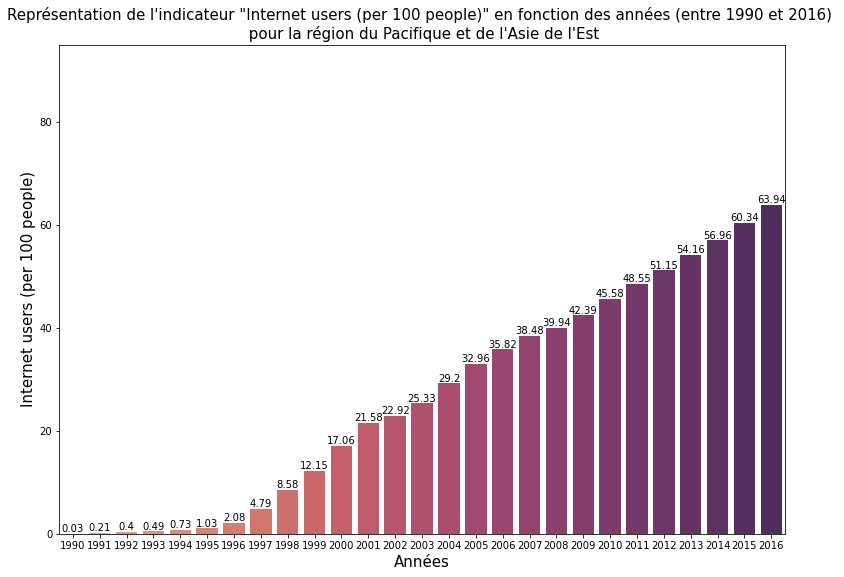

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


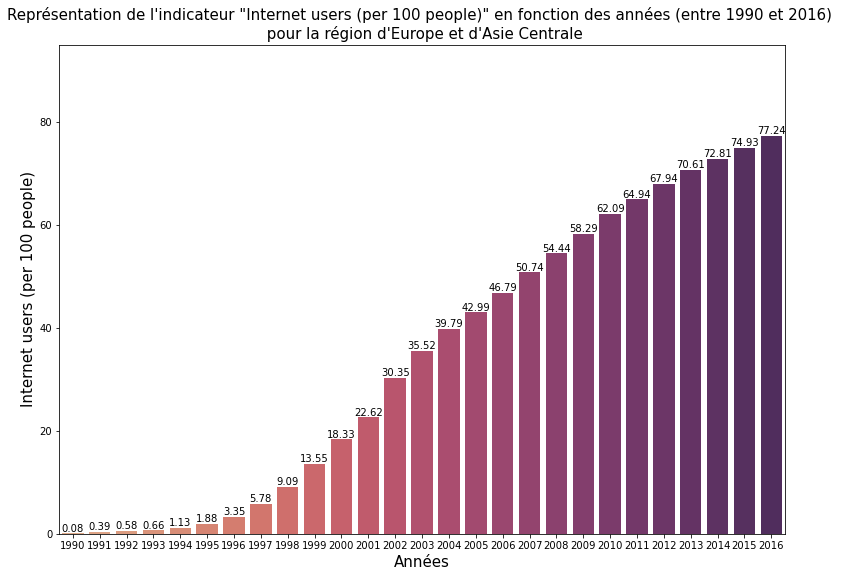

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


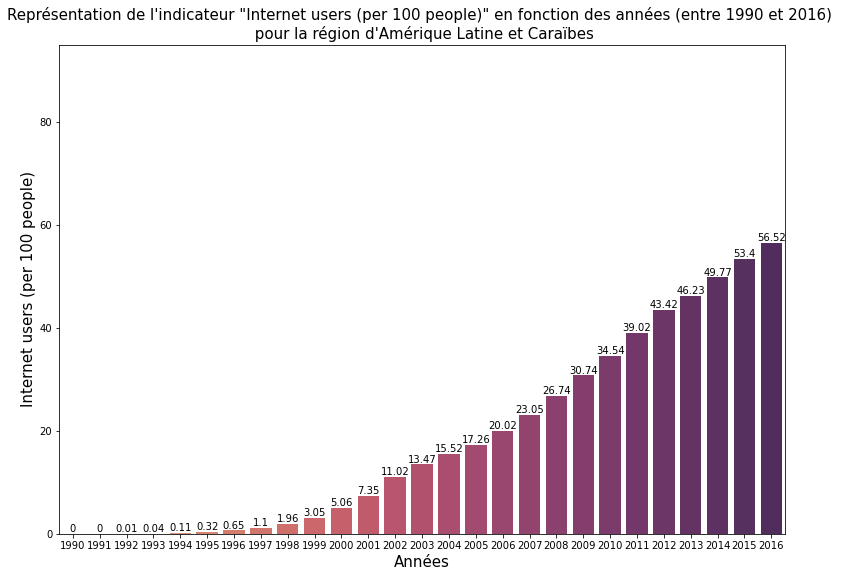

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


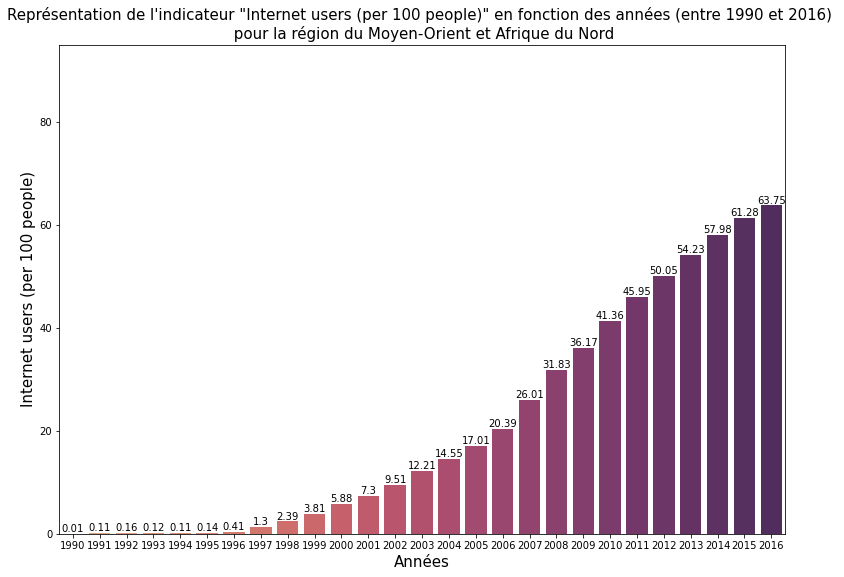

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


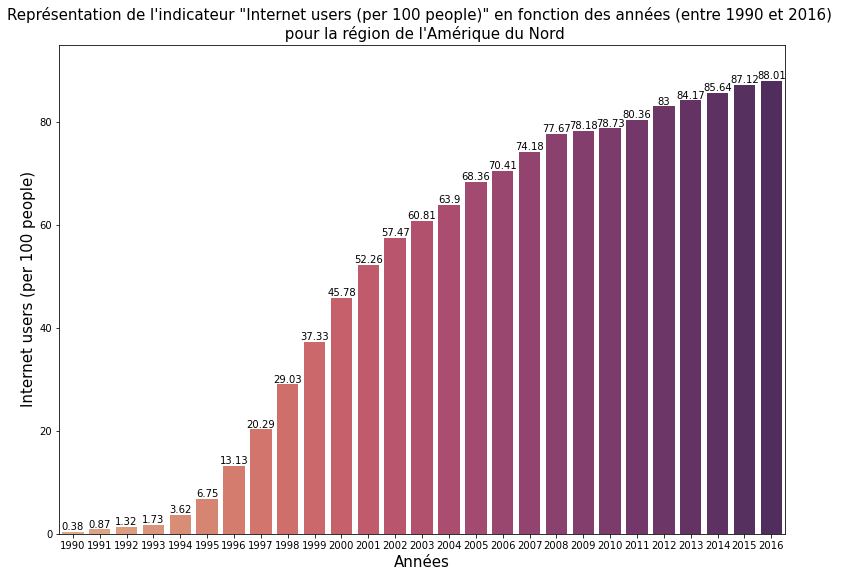

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


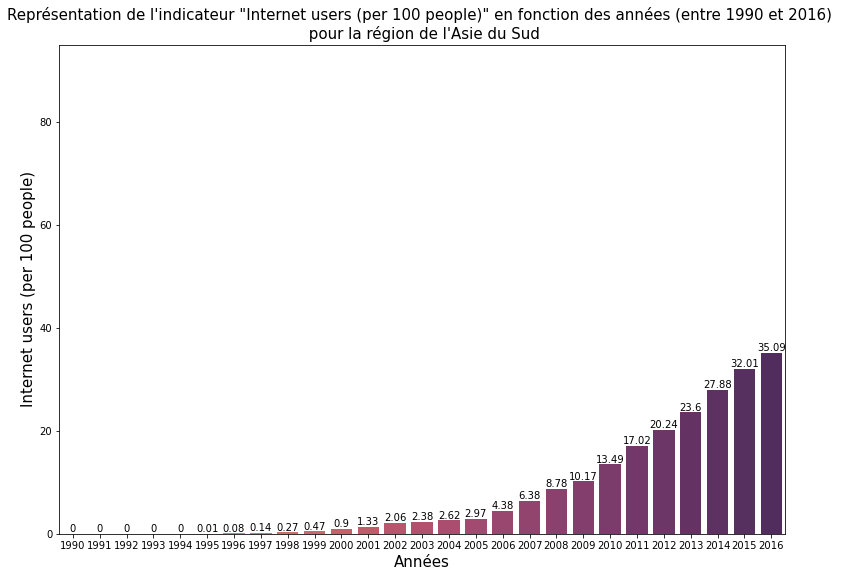

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


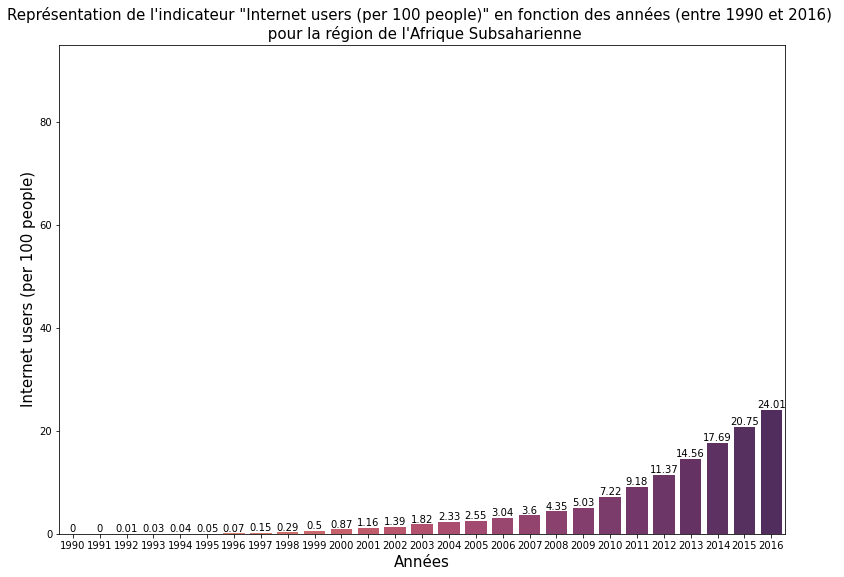

In [176]:
#On va effectuer un graphique avec nos données

#Création du graphique
x = data_internet_transpose['Annees']
y1 = data_internet_transpose['East Asia & Pacific']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data = data_internet_transpose, palette = 'flare')

#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "Internet users (per 100 people)" en fonction des années (entre 1990 et 2016) \n pour la région du Pacifique et de l\'Asie de l\'Est' , fontsize = 15)
ax.set_ylabel('Internet users (per 100 people)', fontsize = 15)
plt.ylim(0, 95) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  


for i in ax.containers: #Méthode .containers pour accéder à l'étiquette de chaque barre. 
    ax.bar_label(i,)    # Boucle permettant de parcourir la liste d'étiquettes et affecter chaque barre à son étiquette. 

plt.savefig('indicateur_internet_Asie_Est_Pacifique.png')
plt.show()

x = data_internet_transpose['Annees']
y1 = data_internet_transpose['Europe & Central Asia']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data =data_internet_transpose, palette = 'flare')

#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "Internet users (per 100 people)" en fonction des années (entre 1990 et 2016) \n pour la région d\'Europe et d\'Asie Centrale' , fontsize = 15)
ax.set_ylabel('Internet users (per 100 people)', fontsize = 15)
plt.ylim(0, 95) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

for i in ax.containers: #Méthode .containers pour accéder à l'étiquette de chaque barre. 
    ax.bar_label(i,)    # Boucle permettant de parcourir la liste d'étiquettes et affecter chaque barre à son étiquette. 

plt.savefig('indicateur_internet_Europe_Asie_Centrale.png')
plt.show()

x = data_internet_transpose['Annees']
y1 = data_internet_transpose['Latin America & Caribbean']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data =data_internet_transpose, palette = 'flare')

#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "Internet users (per 100 people)" en fonction des années (entre 1990 et 2016) \n pour la région d\'Amérique Latine et Caraïbes' , fontsize = 15)
ax.set_ylabel('Internet users (per 100 people)', fontsize = 15)
plt.ylim(0, 95) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

for i in ax.containers: #Méthode .containers pour accéder à l'étiquette de chaque barre. 
    ax.bar_label(i,)    # Boucle permettant de parcourir la liste d'étiquettes et affecter chaque barre à son étiquette. 

plt.savefig('indicateur_internet_Amerique_Latine_Caraibes.png')
plt.show()

x = data_internet_transpose['Annees']
y1 = data_internet_transpose['Middle East & North Africa']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data =data_internet_transpose, palette = 'flare')

#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "Internet users (per 100 people)" en fonction des années (entre 1990 et 2016) \n pour la région du Moyen-Orient et Afrique du Nord' , fontsize = 15)
ax.set_ylabel('Internet users (per 100 people)', fontsize = 15)
plt.ylim(0, 95) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

for i in ax.containers: #Méthode .containers pour accéder à l'étiquette de chaque barre. 
    ax.bar_label(i,)    # Boucle permettant de parcourir la liste d'étiquettes et affecter chaque barre à son étiquette. 

plt.savefig('indicateur_internet_Moyen_Orient_Afrique_Nord.png')
plt.show()

x = data_internet_transpose['Annees']
y1 = data_internet_transpose['North America']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data =data_internet_transpose, palette = 'flare')

#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "Internet users (per 100 people)" en fonction des années (entre 1990 et 2016) \n pour la région de l\'Amérique du Nord' , fontsize = 15)
ax.set_ylabel('Internet users (per 100 people)', fontsize = 15)
plt.ylim(0, 95) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

for i in ax.containers: #Méthode .containers pour accéder à l'étiquette de chaque barre. 
    ax.bar_label(i,)    # Boucle permettant de parcourir la liste d'étiquettes et affecter chaque barre à son étiquette. 

plt.savefig('indicateur_internet_Amerique_Nord.png')
plt.show()

x = data_internet_transpose['Annees']
y1 = data_internet_transpose['South Asia']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data =data_internet_transpose, palette = 'flare')

#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "Internet users (per 100 people)" en fonction des années (entre 1990 et 2016) \n pour la région de l\'Asie du Sud' , fontsize = 15)
ax.set_ylabel('Internet users (per 100 people)', fontsize = 15)
plt.ylim(0, 95) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

for i in ax.containers: #Méthode .containers pour accéder à l'étiquette de chaque barre. 
    ax.bar_label(i,)    # Boucle permettant de parcourir la liste d'étiquettes et affecter chaque barre à son étiquette. 

plt.savefig('indicateur_internet_Asie_Sud.png')
plt.show()

x = data_internet_transpose['Annees']
y1 = data_internet_transpose['Sub-Saharan Africa']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data =data_internet_transpose, palette = 'flare')

#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "Internet users (per 100 people)" en fonction des années (entre 1990 et 2016) \n pour la région de l\'Afrique Subsaharienne' , fontsize = 15)
ax.set_ylabel('Internet users (per 100 people)', fontsize = 15)
plt.ylim(0, 95) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

for i in ax.containers: #Méthode .containers pour accéder à l'étiquette de chaque barre. 
    ax.bar_label(i,)    # Boucle permettant de parcourir la liste d'étiquettes et affecter chaque barre à son étiquette. 

plt.savefig('indicateur_internet_Afrique_Subsaharienne.png')
plt.show()

##### Nous observons toujours une augmentation globale pour chaque région du nombre d'utilisateurs d'internets depuis les années 90. Mais cette augmentation est toujours plus ou moins forte selon la région. 2 régions semblent dominer en termes d'utilisateurs : la région d'Europe et d'Asie Centrale avec 77.24% d'utilisateurs en 2016 et l'Amérique du Nord avec 88.01%. Pour l'Amérique du Nord, plus de 50% de la population étaient disposait déjà d'internet en 2001 (avec 52.26%), tandis que pour la région d'Europe et d'Asie Centrale, en 2001, uniquement 22.62% de la population disposait d'internet. 
##### La région comptant le moins d'utilisateurs d'internets en 2016 est l'Afrique Subsaharienne avec 24.01% en 2016. 



### 3) Indicateur - Unemployment, total (% of total labor force)

In [177]:
#Sélection de notre indicateur 
data_indic_unemploy = dataData.loc[dataData['Indicator Name'] == 'Unemployment, total (% of total labor force)', :]

#On va supprimer les colonnes des années 70 à 89 (70/80) qui ne contiennent pas de données et les années 2020 à 2100.
data_indic_unemploy_1990 = data_indic_unemploy.drop(data_indic_unemploy.loc[:, '1970':'1989'].columns, axis =1)
data_indic_unemploy_1990_2016 = data_indic_unemploy_1990.drop(data_indic_unemploy_1990.loc[:, '2020':'2100'].columns, axis=1)

#On crée notre colonne contenant le nombre de valeurs entre 1990 et 2016. 
data_indic_unemploy_1990_2016['Nbre_valeurs'] = data_indic_unemploy_1990_2016.loc[:, '1990':'2016'].count(axis=1)

total3 = data_indic_unemploy_1990_2016.loc[:, '1990':'2016'].shape[1] #On ne prend en compte que les colonnes que l'on calcule
print(total3)

#On sélectionne les lignes (pays) où on a des valeurs
data_indic_unemploy_1990_2016.drop(data_indic_unemploy_1990_2016[data_indic_unemploy_1990_2016['Nbre_valeurs'] == 0].index, inplace = True)

#On va à nouveau créer une colonne qui calcule le taux de remplissage par pays (pour ceux dont on a des valeurs)
data_indic_unemploy_1990_2016['Taux_remplissage'] = data_indic_unemploy_1990_2016['Nbre_valeurs']*100/total3
data_indic_unemploy_1990_2016.head()


27


Country Name Country Code  \
3348                                    Arab World          ARB   
7013                           East Asia & Pacific          EAS   
10678  East Asia & Pacific (excluding high income)          EAP   
14343                                    Euro area          EMU   
18008                        Europe & Central Asia          ECS   

                                     Indicator Name  Indicator Code  1990  \
3348   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
7013   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
10678  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
14343  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
18008  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   

            1991       1992       1993       1994       1995  ...       2011  \
3348   12.530026  12.769823  13.078905  13.157980  13.419905  ...  11.399606   
7013    4.337204   3.998982   4.088352   4.375821   4.184189  ...   4.371364   
10678   4.527043   4.122066   4.189509   4.504952   4.284260  ...   4.379210   
14343   8.605873   9.074041  10.687315  11.751460  11.398722  ...  10.181486   
18008   9.100028   8.491005   9.236835  10.044397   9.831473  ...   8.850472   

            2012       2013       2014       2015       2016  2017  \
3348   11.505669  11.413681        NaN        NaN        NaN   NaN   
7013    4.335263   4.352350   4.350189   4.289492   4.275369   NaN   
10678   4.356546   4.391273   4.402510   4.349599   4.353152   NaN   
14343  11.368226  11.992408  11.597549  10.837451  10.002749   NaN   
18008   9.073000   9.291556   9.014396   8.613243   8.133421   NaN   

       Unnamed: 69  Nbre_valeurs  Taux_remplissage  
3348           NaN            23         85.185185  
7013           NaN            26         96.296296  
10678          NaN            26         96.296296  
14343          NaN            26         96.296296  
18008          NaN            26         96.296296  

[5 rows x 35 columns]

In [178]:
#On va faire un tri de notre df en fonction du taux de remplissage.

data_indic_unemploy_1990_2016.sort_values(by = 'Taux_remplissage', ascending = False)

#On va effectuer une sélection des pays ayant un taux de remplissage > 85%
data_indic_unemploy_1990_2016.loc[data_indic_unemploy_1990_2016['Taux_remplissage'] <= 85, :] #Pays dont le taux de remplissage est inférieur ou égal à 85%.
data_indic_unemploy_1990_2016 = data_indic_unemploy_1990_2016.loc[data_indic_unemploy_1990_2016['Taux_remplissage'] > 85, :]
data_indic_unemploy_1990_2016.head()

#Il nous reste encore 211 pays. 

Country Name Country Code  \
3348                                    Arab World          ARB   
7013                           East Asia & Pacific          EAS   
10678  East Asia & Pacific (excluding high income)          EAP   
14343                                    Euro area          EMU   
18008                        Europe & Central Asia          ECS   

                                     Indicator Name  Indicator Code  1990  \
3348   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
7013   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
10678  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
14343  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
18008  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   

            1991       1992       1993       1994       1995  ...       2011  \
3348   12.530026  12.769823  13.078905  13.157980  13.419905  ...  11.399606   
7013    4.337204   3.998982   4.088352   4.375821   4.184189  ...   4.371364   
10678   4.527043   4.122066   4.189509   4.504952   4.284260  ...   4.379210   
14343   8.605873   9.074041  10.687315  11.751460  11.398722  ...  10.181486   
18008   9.100028   8.491005   9.236835  10.044397   9.831473  ...   8.850472   

            2012       2013       2014       2015       2016  2017  \
3348   11.505669  11.413681        NaN        NaN        NaN   NaN   
7013    4.335263   4.352350   4.350189   4.289492   4.275369   NaN   
10678   4.356546   4.391273   4.402510   4.349599   4.353152   NaN   
14343  11.368226  11.992408  11.597549  10.837451  10.002749   NaN   
18008   9.073000   9.291556   9.014396   8.613243   8.133421   NaN   

       Unnamed: 69  Nbre_valeurs  Taux_remplissage  
3348           NaN            23         85.185185  
7013           NaN            26         96.296296  
10678          NaN            26         96.296296  
14343          NaN            26         96.296296  
18008          NaN            26         96.296296  

[5 rows x 35 columns]

In [179]:
#On va effectuer la jointure avec notre df. 

data_unemploy_Region = pd.merge(data_indic_unemploy_1990_2016, dataCountry_new, on = 'Country Code', how = 'left')
display(data_unemploy_Region.head())

Country Name Country Code  \
0                                   Arab World          ARB   
1                          East Asia & Pacific          EAS   
2  East Asia & Pacific (excluding high income)          EAP   
3                                    Euro area          EMU   
4                        Europe & Central Asia          ECS   

                                 Indicator Name  Indicator Code  1990  \
0  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
1  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
2  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
3  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
4  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   

        1991       1992       1993       1994       1995  ...       2012  \
0  12.530026  12.769823  13.078905  13.157980  13.419905  ...  11.505669   
1   4.337204   3.998982   4.088352   4.375821   4.184189  ...   4.335263   
2   4.527043   4.122066   4.189509   4.504952   4.284260  ...   4.356546   
3   8.605873   9.074041  10.687315  11.751460  11.398722  ...  11.368226   
4   9.100028   8.491005   9.236835  10.044397   9.831473  ...   9.073000   

        2013       2014       2015       2016  2017  Unnamed: 69  \
0  11.413681        NaN        NaN        NaN   NaN          NaN   
1   4.352350   4.350189   4.289492   4.275369   NaN          NaN   
2   4.391273   4.402510   4.349599   4.353152   NaN          NaN   
3  11.992408  11.597549  10.837451  10.002749   NaN          NaN   
4   9.291556   9.014396   8.613243   8.133421   NaN          NaN   

   Nbre_valeurs  Taux_remplissage  Region  
0            23         85.185185     NaN  
1            26         96.296296     NaN  
2            26         96.296296     NaN  
3            26         96.296296     NaN  
4            26         96.296296     NaN  

[5 rows x 36 columns]

In [180]:
#On va faire un nettoyage et enlever les "pays" ayant des valeurs "Regions" manquantes.
regions_null = data_unemploy_Region[data_unemploy_Region["Region"].isnull()].index
data_unemploy_Region_nettoye = data_unemploy_Region.drop(regions_null)
display(data_unemploy_Region_nettoye.head())

#data_unemploy_Region.to_csv('data_unemploy_Region.csv', index=True, sep=';')

Country Name Country Code                                Indicator Name  \
25  Afghanistan          AFG  Unemployment, total (% of total labor force)   
26      Albania          ALB  Unemployment, total (% of total labor force)   
27      Algeria          DZA  Unemployment, total (% of total labor force)   
28       Angola          AGO  Unemployment, total (% of total labor force)   
29    Argentina          ARG  Unemployment, total (% of total labor force)   

    Indicator Code  1990  1991  1992       1993  1994       1995  ...  2012  \
25  SL.UEM.TOTL.ZS   NaN   1.3   0.8   0.700000   0.6   1.800000  ...   8.0   
26  SL.UEM.TOTL.ZS   NaN  12.7  13.6  15.000000  14.8  14.300000  ...  13.4   
27  SL.UEM.TOTL.ZS   NaN  20.6  23.0  23.200001  24.4  27.900000  ...  11.0   
28  SL.UEM.TOTL.ZS   NaN   6.2   6.1   5.900000   6.2   6.400000  ...   6.2   
29  SL.UEM.TOTL.ZS   NaN   5.8   6.7  10.100000  12.1  18.799999  ...   7.2   

    2013  2014  2015  2016  2017  Unnamed: 69  Nbre_valeurs  Taux_remplissage  \
25   8.4   8.6   8.6   8.6   NaN          NaN            26         96.296296   
26  15.6  17.5  17.1  15.2   NaN          NaN            26         96.296296   
27   9.8  10.6  11.2  11.5   NaN          NaN            26         96.296296   
28   6.2   6.2   6.2   6.1   NaN          NaN            26         96.296296   
29   7.1   7.3   7.2   8.8   NaN          NaN            26         96.296296   

                        Region  
25                  South Asia  
26       Europe & Central Asia  
27  Middle East & North Africa  
28          Sub-Saharan Africa  
29   Latin America & Caribbean  

[5 rows x 36 columns]

In [181]:
#Nous allons maintenant grouper les données en fonction de la variable "Region" pour que ce soit mieux structuré

data_unemploy_Region_nettoye_final = data_unemploy_Region_nettoye.groupby('Region').mean()

#A partir de ces données, on va pouvoir analyser par région les valeurs que l'on a selon les années. 
data_unemploy_transpose = data_unemploy_Region_nettoye_final.transpose().reset_index() #On transpose notre df pour effectuer nos analyses.
data_unemploy_transpose = data_unemploy_transpose.iloc[:-3, :] #On enlève les 3 dernières lignes qui ne nous servent pas.
data_unemploy_transpose = data_unemploy_transpose.rename(columns = {'index' : 'Annees'}, inplace=False)
data_unemploy_transpose = round(data_unemploy_transpose, 2) #On a arronfi nos valeurs pour plus de lisibilité.
display(data_unemploy_transpose.head())

Region Annees  East Asia & Pacific  Europe & Central Asia  \
0        1990                  NaN                    NaN   
1        1991                 5.88                   9.36   
2        1992                 6.01                   9.64   
3        1993                 6.18                  10.45   
4        1994                 6.38                  10.72   

Region  Latin America & Caribbean  Middle East & North Africa  North America  \
0                             NaN                         NaN            NaN   
1                           10.34                       11.20           8.55   
2                           11.02                       11.53           9.35   
3                           10.61                       11.71           9.15   
4                           10.55                       11.32           8.25   

Region  South Asia  Sub-Saharan Africa  
0              NaN                 NaN  
1             4.42                9.42  
2             4.66                9.25  
3             4.39                9.44  
4             4.11                9.56

In [182]:
#On va faire un describe de nos colonnes pour observer quels sont les ordres de grandeurs (moyenne, mediane, ecart-type) pour chaque region
data_unemploy_transpose.describe()

Region  East Asia & Pacific  Europe & Central Asia  Latin America & Caribbean  \
count             26.000000              26.000000                  26.000000   
mean               6.233077              10.031538                   9.693462   
std                0.324367               0.715361                   0.977515   
min                5.790000               8.130000                   8.040000   
25%                6.010000               9.717500                   8.752500   
50%                6.145000              10.095000                  10.015000   
75%                6.365000              10.517500                  10.580000   
max                6.880000              11.120000                  11.080000   

Region  Middle East & North Africa  North America  South Asia  \
count                    26.000000      26.000000   26.000000   
mean                     10.891923       7.036538    4.362308   
std                       0.690386       1.243427    0.462206   
min                       9.850000       5.300000    3.460000   
25%                      10.340000       5.950000    4.110000   
50%                      10.820000       6.775000    4.385000   
75%                      11.495000       8.075000    4.627500   
max                      12.100000       9.350000    5.300000   

Region  Sub-Saharan Africa  
count            26.000000  
mean              9.776154  
std               0.273351  
min               9.250000  
25%               9.515000  
50%               9.800000  
75%              10.017500  
max              10.220000

#### La moyenne la plus forte est observée pour l'Afrique du Nord et Moyen-Orient avec un taux de chomage moyen de 10.9% pour un écart-type de 0.69 et la moyenne la plus faible est observée pour l'Asie du Sud avec un taux de chomage moyen de 4.36% pour un écart-type de 0.46. 

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


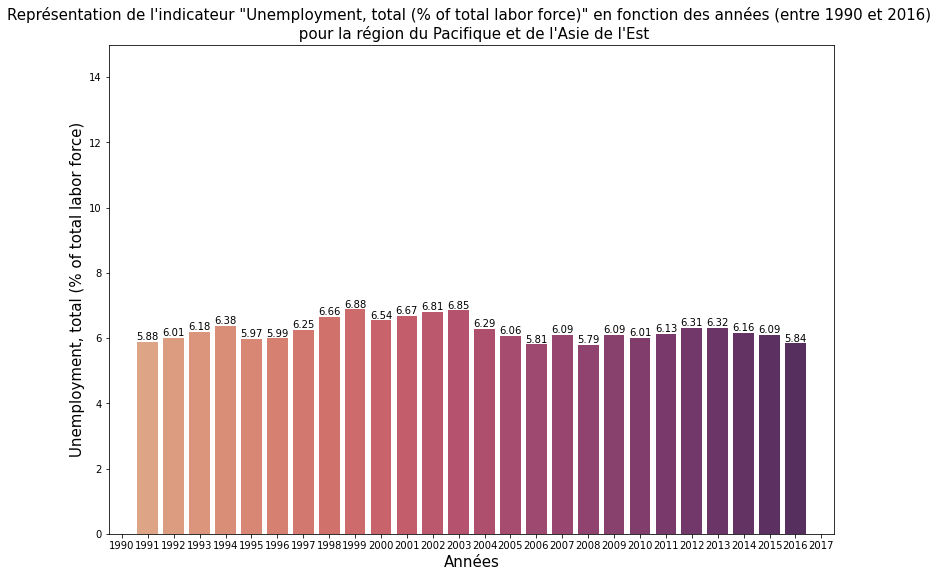

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


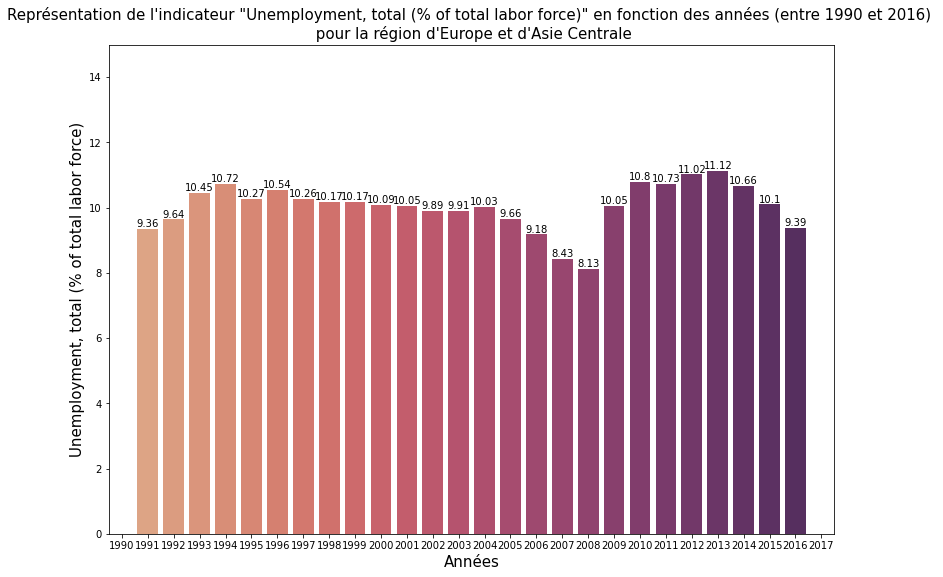

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


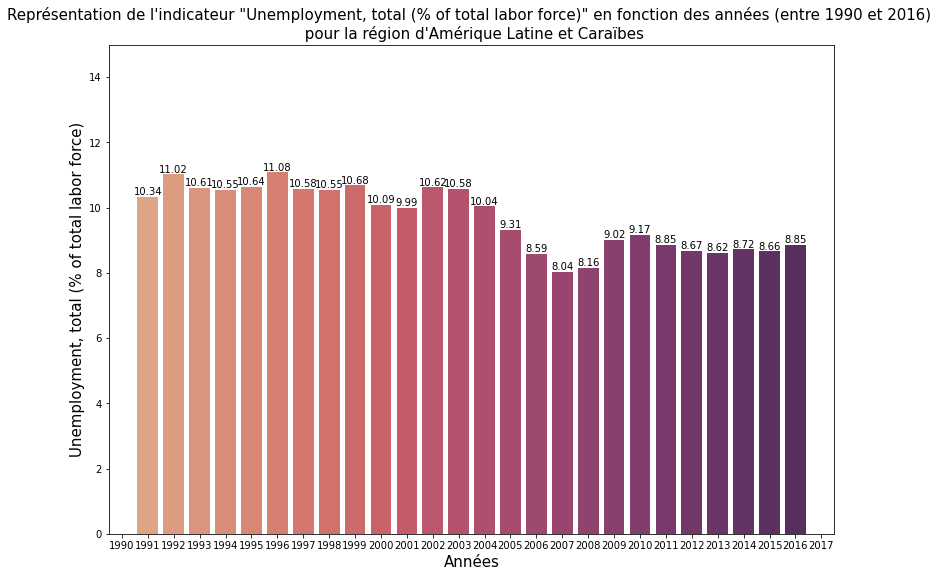

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


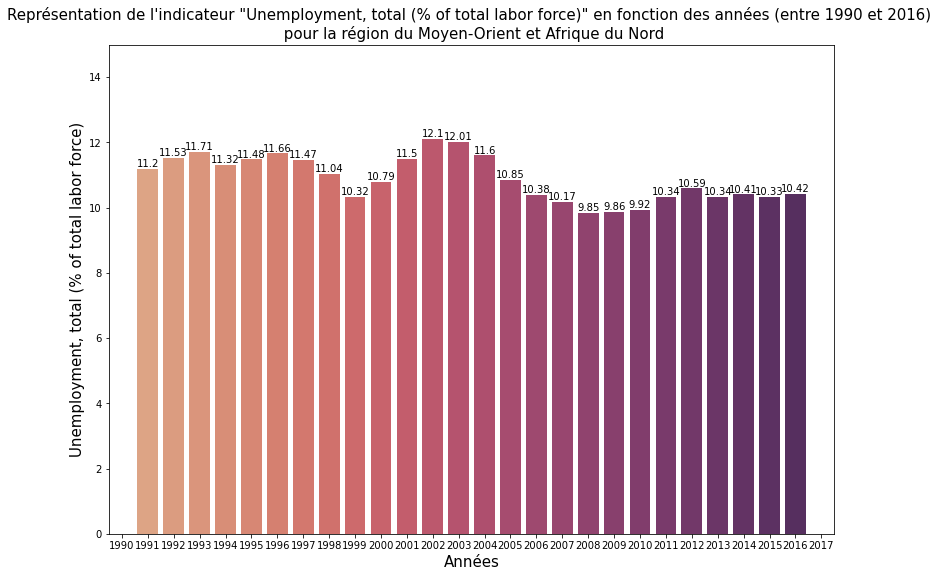

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


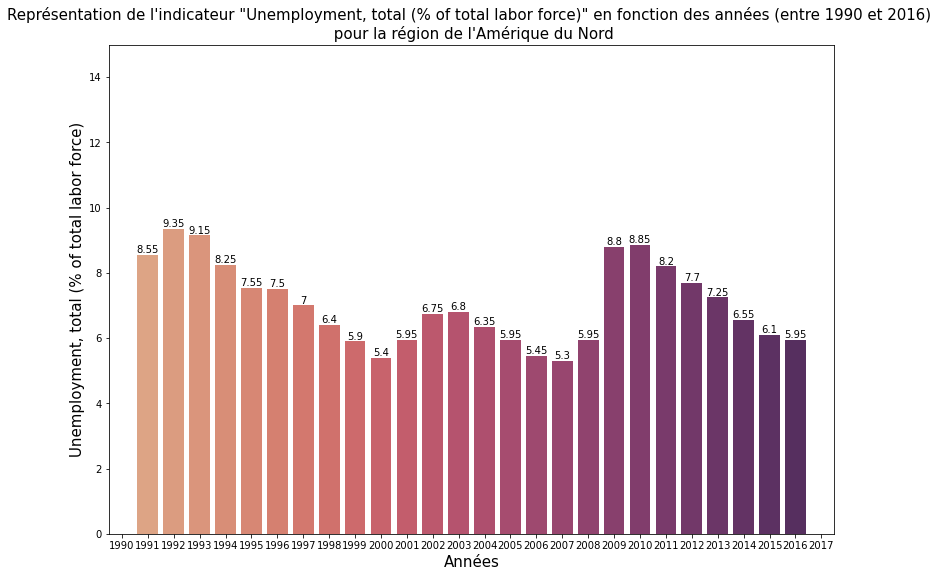

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


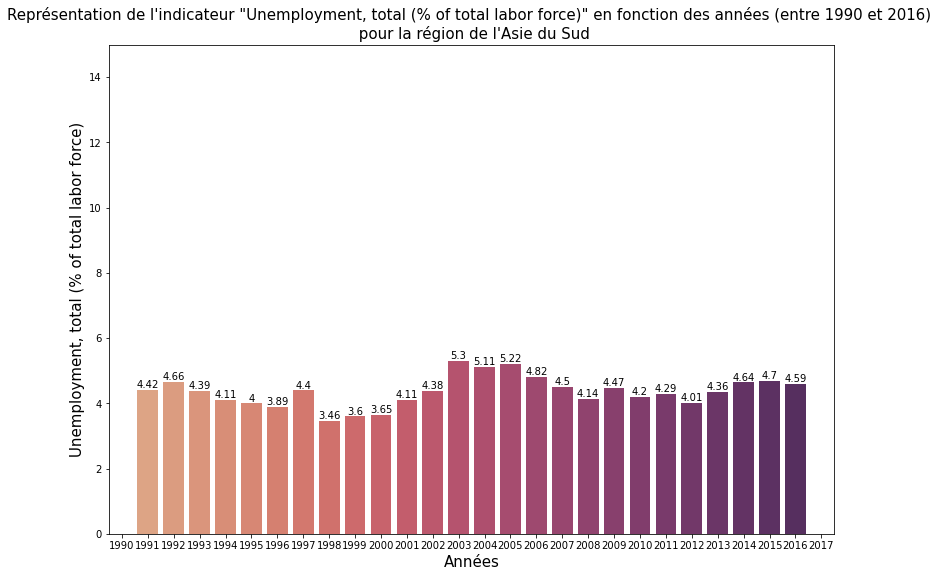

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


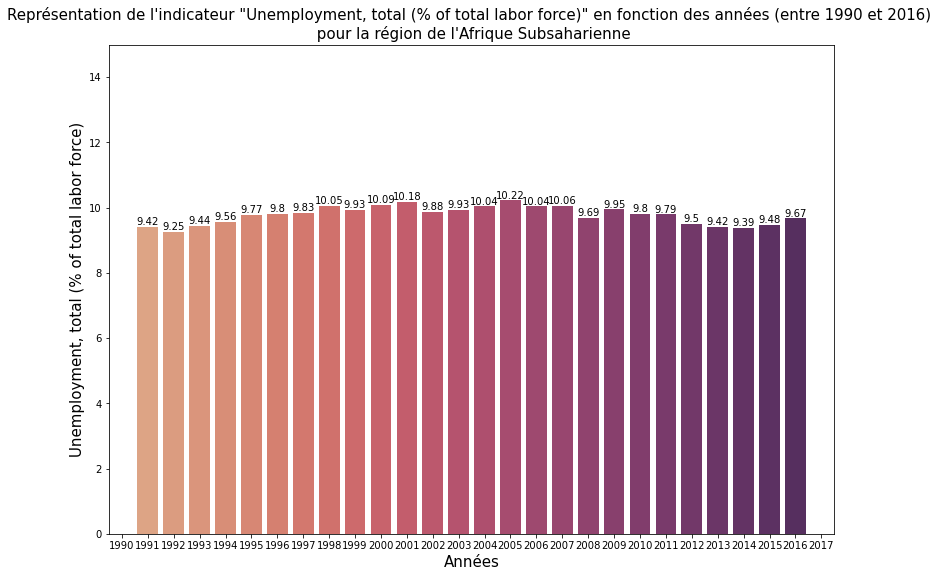

In [183]:
#On va effectuer un graphique avec nos données

#Création du graphique
x = data_unemploy_transpose['Annees']
y1 = data_unemploy_transpose['East Asia & Pacific']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data = data_unemploy_transpose, palette = 'flare')

#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "Unemployment, total (% of total labor force)" en fonction des années (entre 1990 et 2016) \n pour la région du Pacifique et de l\'Asie de l\'Est' , fontsize = 15)
ax.set_ylabel('Unemployment, total (% of total labor force)', fontsize = 15)
plt.ylim(0, 15) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  


for i in ax.containers: #Méthode .containers pour accéder à l'étiquette de chaque barre. 
    ax.bar_label(i,)    # Boucle permettant de parcourir la liste d'étiquettes et affecter chaque barre à son étiquette. 

plt.savefig('indicateur_chomage_Asie_Est_Pacifique.png')
plt.show()

x = data_unemploy_transpose['Annees']
y1 = data_unemploy_transpose['Europe & Central Asia']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data =data_unemploy_transpose, palette = 'flare')

#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "Unemployment, total (% of total labor force)" en fonction des années (entre 1990 et 2016) \n pour la région d\'Europe et d\'Asie Centrale' , fontsize = 15)
ax.set_ylabel('Unemployment, total (% of total labor force)', fontsize = 15)
plt.ylim(0, 15) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

for i in ax.containers: #Méthode .containers pour accéder à l'étiquette de chaque barre. 
    ax.bar_label(i,)    # Boucle permettant de parcourir la liste d'étiquettes et affecter chaque barre à son étiquette. 

plt.savefig('indicateur_chomage_Europe_Asie_Centrale.png')
plt.show()

x = data_unemploy_transpose['Annees']
y1 = data_unemploy_transpose['Latin America & Caribbean']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data =data_unemploy_transpose, palette = 'flare')

#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "Unemployment, total (% of total labor force)" en fonction des années (entre 1990 et 2016) \n pour la région d\'Amérique Latine et Caraïbes' , fontsize = 15)
ax.set_ylabel('Unemployment, total (% of total labor force)', fontsize = 15)
plt.ylim(0, 15) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

for i in ax.containers: #Méthode .containers pour accéder à l'étiquette de chaque barre. 
    ax.bar_label(i,)    # Boucle permettant de parcourir la liste d'étiquettes et affecter chaque barre à son étiquette. 

plt.savefig('indicateur_chomage_Amerique_Latine_Caraibes.png')
plt.show()

x = data_unemploy_transpose['Annees']
y1 = data_unemploy_transpose['Middle East & North Africa']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data =data_unemploy_transpose, palette = 'flare')

#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "Unemployment, total (% of total labor force)" en fonction des années (entre 1990 et 2016) \n pour la région du Moyen-Orient et Afrique du Nord' , fontsize = 15)
ax.set_ylabel('Unemployment, total (% of total labor force)', fontsize = 15)
plt.ylim(0, 15) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

for i in ax.containers: #Méthode .containers pour accéder à l'étiquette de chaque barre. 
    ax.bar_label(i,)    # Boucle permettant de parcourir la liste d'étiquettes et affecter chaque barre à son étiquette. 

plt.savefig('indicateur_chomage_Moyen_Orient_Afrique_Nord.png')
plt.show()

x = data_unemploy_transpose['Annees']
y1 = data_unemploy_transpose['North America']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data =data_unemploy_transpose, palette = 'flare')

#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "Unemployment, total (% of total labor force)" en fonction des années (entre 1990 et 2016) \n pour la région de l\'Amérique du Nord' , fontsize = 15)
ax.set_ylabel('Unemployment, total (% of total labor force)', fontsize = 15)
plt.ylim(0, 15) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

for i in ax.containers: #Méthode .containers pour accéder à l'étiquette de chaque barre. 
    ax.bar_label(i,)    # Boucle permettant de parcourir la liste d'étiquettes et affecter chaque barre à son étiquette. 

plt.savefig('indicateur_chomage_Amerique_Nord.png')
plt.show()

x = data_unemploy_transpose['Annees']
y1 = data_unemploy_transpose['South Asia']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data =data_unemploy_transpose, palette = 'flare')

#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "Unemployment, total (% of total labor force)" en fonction des années (entre 1990 et 2016) \n pour la région de l\'Asie du Sud' , fontsize = 15)
ax.set_ylabel('Unemployment, total (% of total labor force)', fontsize = 15)
plt.ylim(0, 15) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

for i in ax.containers: #Méthode .containers pour accéder à l'étiquette de chaque barre. 
    ax.bar_label(i,)    # Boucle permettant de parcourir la liste d'étiquettes et affecter chaque barre à son étiquette. 

plt.savefig('indicateur_chomage_Asie_Sud.png')
plt.show()

x = data_unemploy_transpose['Annees']
y1 = data_unemploy_transpose['Sub-Saharan Africa']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data =data_unemploy_transpose, palette = 'flare')

#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "Unemployment, total (% of total labor force)" en fonction des années (entre 1990 et 2016) \n pour la région de l\'Afrique Subsaharienne' , fontsize = 15)
ax.set_ylabel('Unemployment, total (% of total labor force)', fontsize = 15)
plt.ylim(0, 15) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

for i in ax.containers: #Méthode .containers pour accéder à l'étiquette de chaque barre. 
    ax.bar_label(i,)    # Boucle permettant de parcourir la liste d'étiquettes et affecter chaque barre à son étiquette. 

plt.savefig('indicateur_chomage_Afrique_Subsaharienne.png')
plt.show()

##### Le taux de chômage selon les régions est rarement stable. Une certaine stabilité est observée globalement pour l'Afrique Subsaharienne dont on peut calculer l'amplitude. Cette région fait partie, avec la région du Moyen-Orient et de l'Afrique du Nord, ainsi que de l'Europe et de l'Asie Centrale des régions avec le plus fort taux de chomage. 
##### Concernant la région d'Amérique Latine et Caraïbes, une diminution du taux de chômage est observée. 
##### La région où le taux de chômage semble avoir augmenté est l'Europe et Asie Centrale. 
##### La région où le taux de chômage semble le plus faible est la région d'Asie du Sud, suivie par l'Amérique du Nord. 

### On chercher à trouver l'amplitude pour chaque région

In [184]:
#Région du Pacifique et de l'Asie de l'Est
Asie_Est_max = data_unemploy_transpose['East Asia & Pacific'].max()
Asie_Est_min = data_unemploy_transpose['East Asia & Pacific'].min()
ampl_Asie_Est = Asie_Est_max - Asie_Est_min
print("L'amplitude pour la région du Pacifique et de l'Asie de l'Est est de", round(ampl_Asie_Est, 2), "%")

#Région d'Europe et Asie Centrale
Europe_Asie_max = data_unemploy_transpose['Europe & Central Asia'].max()
Europe_Asie_min = data_unemploy_transpose['Europe & Central Asia'].min()
ampl_Europe_Asie = Europe_Asie_max - Europe_Asie_min
print("L'amplitude pour la région d'Europe et d'Asie Centrale est de", round(ampl_Europe_Asie, 2), "%")

#Région de l'Amérique latine et des Caraïbes
Am_Latine_max = data_unemploy_transpose['Latin America & Caribbean'].max()
Am_Latine_min = data_unemploy_transpose['Latin America & Caribbean'].min()
ampl_Am_Latine = Am_Latine_max - Am_Latine_min 
print("L'amplitude pour la région de l'Amérique Latine et des Caraïbes est de", round(Am_Latine_min, 2), "%")

#Région du Moyen-Orient et de l'Afrique du Nord
MO_Af_max = data_unemploy_transpose['Middle East & North Africa'].max()
MO_Af_min = data_unemploy_transpose['Middle East & North Africa'].min()
ampl_MO_Af = MO_Af_max - MO_Af_min
print("L'amplitude pour la région du Moyen-Orient et de l'Afrique du Nord est de", round(ampl_MO_Af, 2), "%")

#Région de l'Amérique du Nord
Am_Nord_max = data_unemploy_transpose['North America'].max()
Am_Nord_min = data_unemploy_transpose['North America'].min()
ampl_Am_Nord = Am_Nord_max - Am_Nord_min
print("L'amplitude pour la région de l'Amérique du Nord est de", round(ampl_Am_Nord, 2), "%")

#Région de l'Asie du Sud 
Asie_Sud_max = data_unemploy_transpose['South Asia'].max()
Asie_Sud_min = data_unemploy_transpose['South Asia'].min()
ampl_Asie_Sud = Asie_Sud_max - Asie_Sud_min 
print("L'amplitude pour la région de l'Asie du Sud est de", round(ampl_Asie_Sud, 2), "%")

#Région de l'Afrique Subsaharienne
Af_Sub_max = data_unemploy_transpose['Sub-Saharan Africa'].max()
Af_Sub_min = data_unemploy_transpose['Sub-Saharan Africa'].min()
ampl_Af_Sub = Af_Sub_max - Af_Sub_min 
print("L'amplitude pour la région de l'Afrique Subsaharienne", round(ampl_Af_Sub, 2), "%")

L'amplitude pour la région du Pacifique et de l'Asie de l'Est est de 1.09 %
L'amplitude pour la région d'Europe et d'Asie Centrale est de 2.99 %
L'amplitude pour la région de l'Amérique Latine et des Caraïbes est de 8.04 %
L'amplitude pour la région du Moyen-Orient et de l'Afrique du Nord est de 2.25 %
L'amplitude pour la région de l'Amérique du Nord est de 4.05 %
L'amplitude pour la région de l'Asie du Sud est de 1.84 %
L'amplitude pour la région de l'Afrique Subsaharienne 0.97 %


##### On voit effectivement que l’Afrique Subsaharienne est très stable dans l’évolution de son taux de chômage (0.97%) , tandis que l’Amérique Latine et les Caraïbes ont la plus grande amplitude avec 8.04%. 

### 4) Population growth (annual %)

In [185]:
#Sélection de notre indicateur 
data_indic_pop = dataData.loc[dataData['Indicator Name'] == 'Population growth (annual %)', :]

#On va supprimer les colonnes des années 70 à 89 (70/80) qui ne contiennent pas de données et les années 2020 à 2100.
data_indic_pop_1990 = data_indic_pop.drop(data_indic_pop.loc[:, '1970':'1989'].columns, axis =1)
data_indic_pop_1990_2016 = data_indic_pop_1990.drop(data_indic_pop_1990.loc[:, '2020':'2100'].columns, axis=1)

#On crée notre colonne contenant le nombre de valeurs entre 1990 et 2016. 
data_indic_pop_1990_2016['Nbre_valeurs'] = data_indic_pop_1990_2016.loc[:, '1990':'2016'].count(axis=1)

total3 = data_indic_pop_1990_2016.loc[:, '1990':'2016'].shape[1] #On ne prend en compte que les colonnes que l'on calcule
print(total3)

#On sélectionne les lignes (pays) où on a des valeurs
data_indic_pop_1990_2016.drop(data_indic_pop_1990_2016[data_indic_pop_1990_2016['Nbre_valeurs'] == 0].index, inplace = True)

#On va à nouveau créer une colonne qui calcule le taux de remplissage par pays (pour ceux dont on a des valeurs)
data_indic_pop_1990_2016['Taux_remplissage'] = data_indic_pop_1990_2016['Nbre_valeurs']*100/total3
data_indic_pop_1990_2016.head()


27


Country Name Country Code  \
2307                                    Arab World          ARB   
5972                           East Asia & Pacific          EAS   
9637   East Asia & Pacific (excluding high income)          EAP   
13302                                    Euro area          EMU   
16967                        Europe & Central Asia          ECS   

                     Indicator Name Indicator Code      1990      1991  \
2307   Population growth (annual %)    SP.POP.GROW  3.541847  2.701009   
5972   Population growth (annual %)    SP.POP.GROW  1.498695  1.418873   
9637   Population growth (annual %)    SP.POP.GROW  1.606679  1.512764   
13302  Population growth (annual %)    SP.POP.GROW  0.470723  0.375055   
16967  Population growth (annual %)    SP.POP.GROW  0.523060  0.395066   

           1992      1993      1994      1995  ...      2011      2012  \
2307   1.746289  2.581814  2.465317  2.973166  ...  2.128048  2.063874   
5972   1.307038  1.242380  1.227515  1.202953  ...  0.668431  0.678831   
9637   1.394399  1.324942  1.300066  1.261033  ...  0.714412  0.721732   
13302  0.464942  0.409676  0.290912  0.257508  ... -0.215869  0.221052   
16967  0.411080  0.365473  0.229964  0.190682  ...  0.233825  0.400822   

           2013      2014      2015      2016  2017  Unnamed: 69  \
2307   2.012570       NaN       NaN       NaN   NaN          NaN   
5972   0.676462  0.681871  0.675463  0.683098   NaN          NaN   
9637   0.723835  0.726614  0.718663  0.730576   NaN          NaN   
13302  0.336016  0.335839  0.321947  0.405101   NaN          NaN   
16967  0.468157  0.471662  0.479481  0.503675   NaN          NaN   

       Nbre_valeurs  Taux_remplissage  
2307             24         88.888889  
5972             27        100.000000  
9637             27        100.000000  
13302            27        100.000000  
16967            27        100.000000  

[5 rows x 35 columns]

In [186]:
#On va faire un tri de notre df en fonction du taux de remplissage.

data_indic_pop_1990_2016.sort_values(by = 'Taux_remplissage', ascending = False)

#On va effectuer une sélection des pays ayant un taux de remplissage > 85%
data_indic_pop_1990_2016 = data_indic_pop_1990_2016.loc[data_indic_pop_1990_2016['Taux_remplissage'] > 85, :]
data_indic_pop_1990_2016.head()

#Il nous reste encore 237 pays. 

Country Name Country Code  \
2307                                    Arab World          ARB   
5972                           East Asia & Pacific          EAS   
9637   East Asia & Pacific (excluding high income)          EAP   
13302                                    Euro area          EMU   
16967                        Europe & Central Asia          ECS   

                     Indicator Name Indicator Code      1990      1991  \
2307   Population growth (annual %)    SP.POP.GROW  3.541847  2.701009   
5972   Population growth (annual %)    SP.POP.GROW  1.498695  1.418873   
9637   Population growth (annual %)    SP.POP.GROW  1.606679  1.512764   
13302  Population growth (annual %)    SP.POP.GROW  0.470723  0.375055   
16967  Population growth (annual %)    SP.POP.GROW  0.523060  0.395066   

           1992      1993      1994      1995  ...      2011      2012  \
2307   1.746289  2.581814  2.465317  2.973166  ...  2.128048  2.063874   
5972   1.307038  1.242380  1.227515  1.202953  ...  0.668431  0.678831   
9637   1.394399  1.324942  1.300066  1.261033  ...  0.714412  0.721732   
13302  0.464942  0.409676  0.290912  0.257508  ... -0.215869  0.221052   
16967  0.411080  0.365473  0.229964  0.190682  ...  0.233825  0.400822   

           2013      2014      2015      2016  2017  Unnamed: 69  \
2307   2.012570       NaN       NaN       NaN   NaN          NaN   
5972   0.676462  0.681871  0.675463  0.683098   NaN          NaN   
9637   0.723835  0.726614  0.718663  0.730576   NaN          NaN   
13302  0.336016  0.335839  0.321947  0.405101   NaN          NaN   
16967  0.468157  0.471662  0.479481  0.503675   NaN          NaN   

       Nbre_valeurs  Taux_remplissage  
2307             24         88.888889  
5972             27        100.000000  
9637             27        100.000000  
13302            27        100.000000  
16967            27        100.000000  

[5 rows x 35 columns]

In [187]:
#On va effectuer la jointure avec notre df. 

data_pop_Region = pd.merge(data_indic_pop_1990_2016, dataCountry_new, on = 'Country Code', how = 'left')
display(data_pop_Region)

Country Name Country Code  \
0                                     Arab World          ARB   
1                            East Asia & Pacific          EAS   
2    East Asia & Pacific (excluding high income)          EAP   
3                                      Euro area          EMU   
4                          Europe & Central Asia          ECS   
..                                           ...          ...   
232                        Virgin Islands (U.S.)          VIR   
233                           West Bank and Gaza          PSE   
234                                  Yemen, Rep.          YEM   
235                                       Zambia          ZMB   
236                                     Zimbabwe          ZWE   

                   Indicator Name Indicator Code      1990      1991  \
0    Population growth (annual %)    SP.POP.GROW  3.541847  2.701009   
1    Population growth (annual %)    SP.POP.GROW  1.498695  1.418873   
2    Population growth (annual %)    SP.POP.GROW  1.606679  1.512764   
3    Population growth (annual %)    SP.POP.GROW  0.470723  0.375055   
4    Population growth (annual %)    SP.POP.GROW  0.523060  0.395066   
..                            ...            ...       ...       ...   
232  Population growth (annual %)    SP.POP.GROW  0.930608  0.808550   
233  Population growth (annual %)    SP.POP.GROW       NaN  4.477888   
234  Population growth (annual %)    SP.POP.GROW  4.528043  4.892626   
235  Population growth (annual %)    SP.POP.GROW  2.694995  2.612544   
236  Population growth (annual %)    SP.POP.GROW  2.793947  2.520526   

         1992      1993      1994      1995  ...      2012      2013  \
0    1.746289  2.581814  2.465317  2.973166  ...  2.063874  2.012570   
1    1.307038  1.242380  1.227515  1.202953  ...  0.678831  0.676462   
2    1.394399  1.324942  1.300066  1.261033  ...  0.721732  0.723835   
3    0.464942  0.409676  0.290912  0.257508  ...  0.221052  0.336016   
4    0.411080  0.365473  0.229964  0.190682  ...  0.400822  0.468157   
..        ...       ...       ...       ...  ...       ...       ...   
232  0.858839  0.815877  0.691934  0.464827  ... -0.482331 -0.512353   
233  4.477886  4.477884  4.477852  4.477873  ...  3.006264  2.984616   
234  5.111082  5.060221  4.706189  4.185197  ...  2.676050  2.639892   
235  2.546782  2.533719  2.584117  2.672654  ...  3.005133  3.036918   
236  2.270532  2.064939  1.918007  1.813085  ...  2.228306  2.309366   

         2014      2015      2016  2017  Unnamed: 69  Nbre_valeurs  \
0         NaN       NaN       NaN   NaN          NaN            24   
1    0.681871  0.675463  0.683098   NaN          NaN            27   
2    0.726614  0.718663  0.730576   NaN          NaN            27   
3    0.335839  0.321947  0.405101   NaN          NaN            27   
4    0.471662  0.479481  0.503675   NaN          NaN            27   
..        ...       ...       ...   ...          ...           ...   
232 -0.542827 -0.573785 -0.603319   NaN          NaN            27   
233  2.957995  2.924691  2.884693   NaN          NaN            26   
234  2.585905  2.520254  2.451502   NaN          NaN            27   
235  3.040211  3.024123  3.002816   NaN          NaN            27   
236  2.344799  2.345643  2.336070   NaN          NaN            27   

     Taux_remplissage                      Region  
0           88.888889                         NaN  
1          100.000000                         NaN  
2          100.000000                         NaN  
3          100.000000                         NaN  
4          100.000000                         NaN  
..                ...                         ...  
232        100.000000   Latin America & Caribbean  
233         96.296296  Middle East & North Africa  
234        100.000000  Middle East & North Africa  
235        100.000000          Sub-Saharan Africa  
236        100.000000          Sub-Saharan Africa  

[237 rows x 36 columns]

In [188]:
#On va faire un nettoyage et enlever les "pays" ayant des valeurs "Regions" manquantes.
regions_null = data_pop_Region[data_pop_Region["Region"].isnull()].index
data_pop_Region_nettoye = data_pop_Region.drop(regions_null)
display(data_pop_Region_nettoye.head())

#data_unemploy_Region.to_csv('data_unemploy_Region.csv', index=True, sep=';')

Country Name Country Code                Indicator Name Indicator Code  \
25     Afghanistan          AFG  Population growth (annual %)    SP.POP.GROW   
26         Albania          ALB  Population growth (annual %)    SP.POP.GROW   
27         Algeria          DZA  Population growth (annual %)    SP.POP.GROW   
28  American Samoa          ASM  Population growth (annual %)    SP.POP.GROW   
29         Andorra          AND  Population growth (annual %)    SP.POP.GROW   

        1990      1991      1992      1993      1994      1995  ...      2012  \
25  3.925342  5.900771  7.325447  7.665433  6.895569  5.572581  ...  3.272703   
26  1.799086 -0.602810 -0.606435 -0.610166 -0.613881 -0.617704  ... -0.165151   
27  2.559039  2.447244  2.332887  2.201996  2.051752  1.893116  ...  2.006614   
28  3.120159  2.802737  2.486654  2.247062  2.112775  2.035018  ... -0.162822   
29  3.854362  3.889679  3.837472  3.476101  2.759621  1.854203  ... -1.588653   

        2013      2014      2015      2016  2017  Unnamed: 69  Nbre_valeurs  \
25  3.315224  3.183201  2.943234  2.689163   NaN          NaN            27   
26 -0.183211 -0.207047 -0.291206 -0.159880   NaN          NaN            27   
27  2.036092  2.000666  1.919959  1.825463   NaN          NaN            27   
28  0.139320  0.234776  0.180222  0.111575   NaN          NaN            27   
29 -2.013314 -1.956178 -1.537836 -0.944017   NaN          NaN            27   

    Taux_remplissage                      Region  
25             100.0                  South Asia  
26             100.0       Europe & Central Asia  
27             100.0  Middle East & North Africa  
28             100.0         East Asia & Pacific  
29             100.0       Europe & Central Asia  

[5 rows x 36 columns]

In [189]:
#Nous allons maintenant grouper les données en fonction de la variable "Region" pour que ce soit mieux structuré

data_pop_Region_nettoye_final = data_pop_Region_nettoye.groupby('Region').mean()

#A partir de ces données, on va pouvoir analyser par région les valeurs que l'on a selon les années. 
data_pop_transpose = data_pop_Region_nettoye_final.transpose().reset_index() #On transpose notre df pour effectuer nos analyses.
data_pop_transpose = data_pop_transpose.iloc[:-3, :] #On enlève les 3 dernières lignes qui ne nous servent pas.
data_pop_transpose = data_pop_transpose.rename(columns = {'index' : 'Annees'}, inplace=False)
data_pop_transpose = round(data_pop_transpose, 2) #On a arronfi nos valeurs pour plus de lisibilité.
display(data_pop_transpose.head())

Region Annees  East Asia & Pacific  Europe & Central Asia  \
0        1990                 2.11                   0.64   
1        1991                 2.08                   0.45   
2        1992                 1.99                   0.43   
3        1993                 1.93                   0.41   
4        1994                 1.89                   0.26   

Region  Latin America & Caribbean  Middle East & North Africa  North America  \
0                            1.77                        2.91           1.15   
1                            1.82                        2.96           0.73   
2                            1.83                        2.95           0.63   
3                            1.81                        2.78           0.98   
4                            1.75                        2.62           0.96   

Region  South Asia  Sub-Saharan Africa  
0             2.15                2.53  
1             2.63                2.45  
2             2.53                2.34  
3             2.51                2.32  
4             2.15                2.38

In [190]:
#On va faire un describe de nos colonnes pour observer quels sont les ordres de grandeurs (moyenne, mediane, ecart-type) pour chaque region
data_pop_transpose.describe()

Region  East Asia & Pacific  Europe & Central Asia  Latin America & Caribbean  \
count             27.000000              27.000000                  27.000000   
mean               1.357037               0.350741                   1.311481   
std                0.383785               0.116748                   0.305950   
min                0.960000               0.120000                   0.870000   
25%                1.070000               0.295000                   1.065000   
50%                1.130000               0.360000                   1.310000   
75%                1.680000               0.430000                   1.505000   
max                2.110000               0.640000                   1.830000   

Region  Middle East & North Africa  North America  South Asia  \
count                    27.000000      27.000000   27.000000   
mean                      2.776296       0.810000    2.009630   
std                       0.466552       0.186031    0.329294   
min                       2.120000       0.290000    1.280000   
25%                       2.395000       0.725000    1.720000   
50%                       2.630000       0.850000    2.080000   
75%                       2.990000       0.940000    2.175000   
max                       3.690000       1.150000    2.630000   

Region  Sub-Saharan Africa  
count            27.000000  
mean              2.551852  
std               0.109791  
min               2.320000  
25%               2.495000  
50%               2.540000  
75%               2.610000  
max               2.760000

#### Le taux de croissance de population le plus fort est situé en Afrique du Nord et Moyen-Orient avec 2.78% et un écart-type de 0.47, tandis que le taux le plus faible est situé en Europe et Asie Centrale avec 0.35% et un écart-type de 0.12. 

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


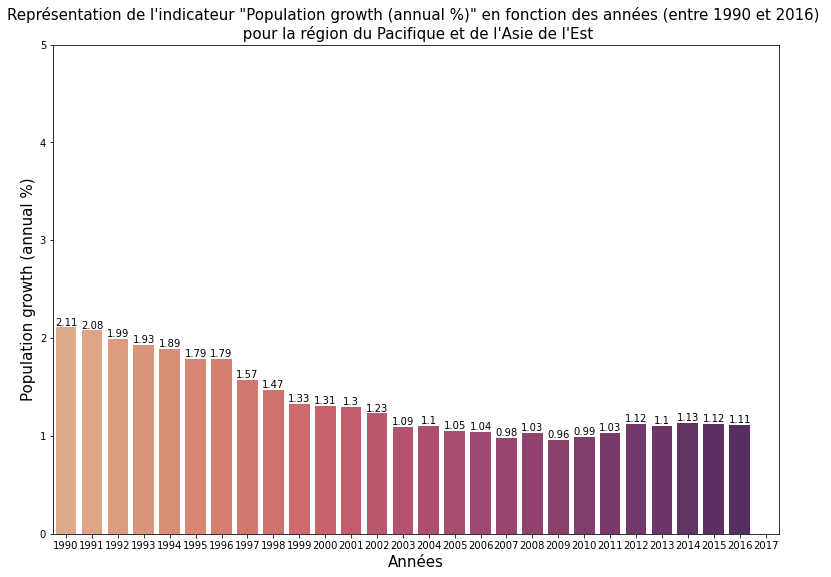

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


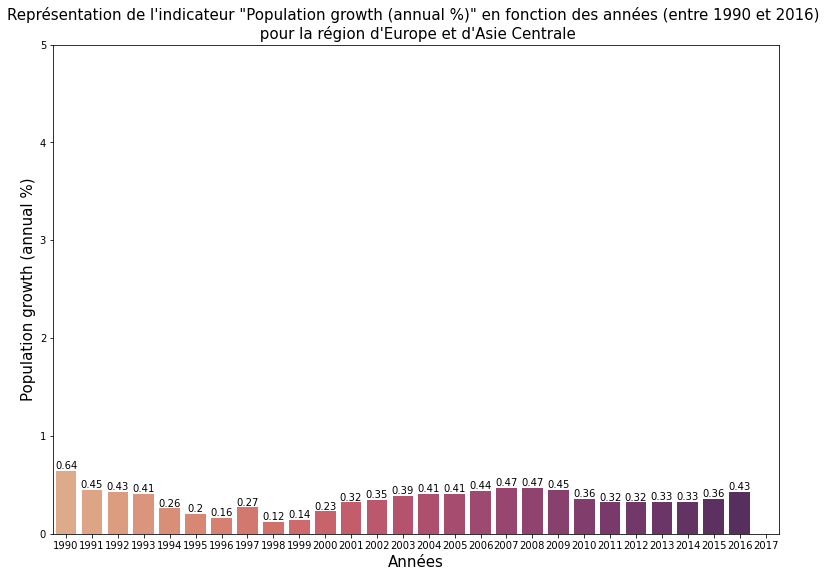

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


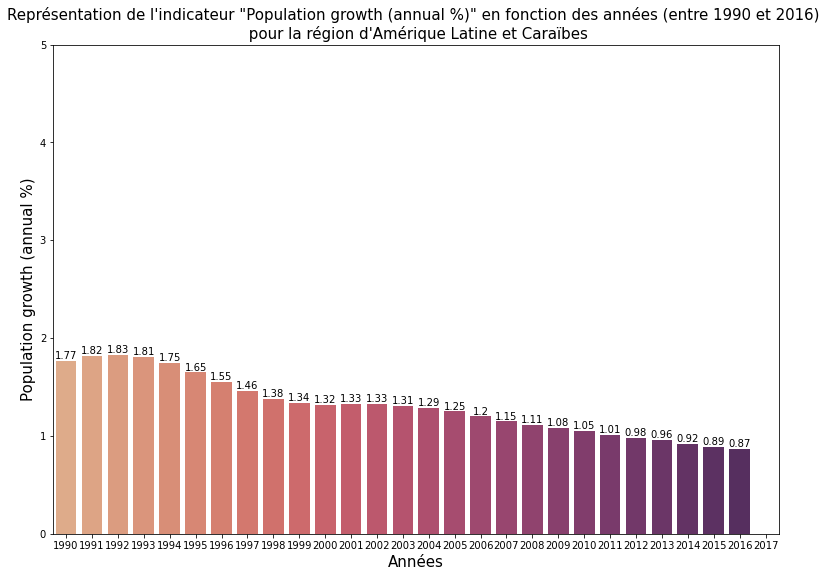

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


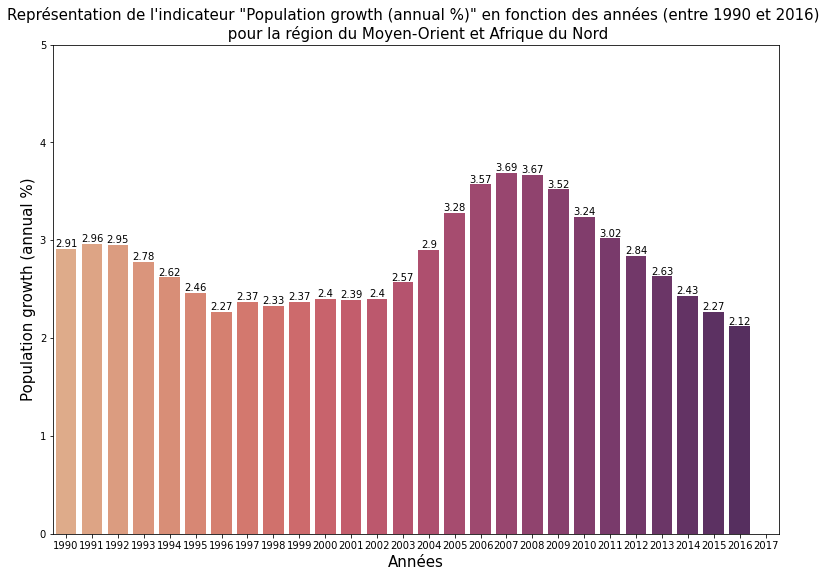

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


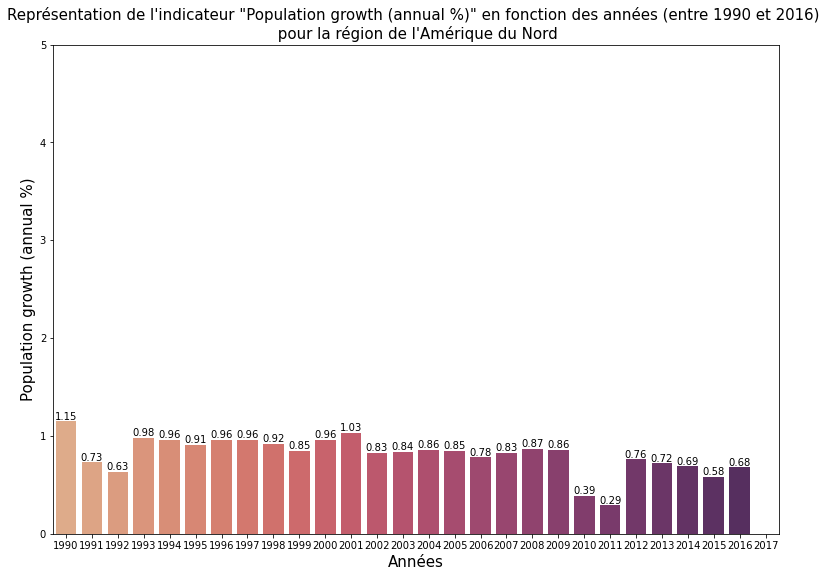

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


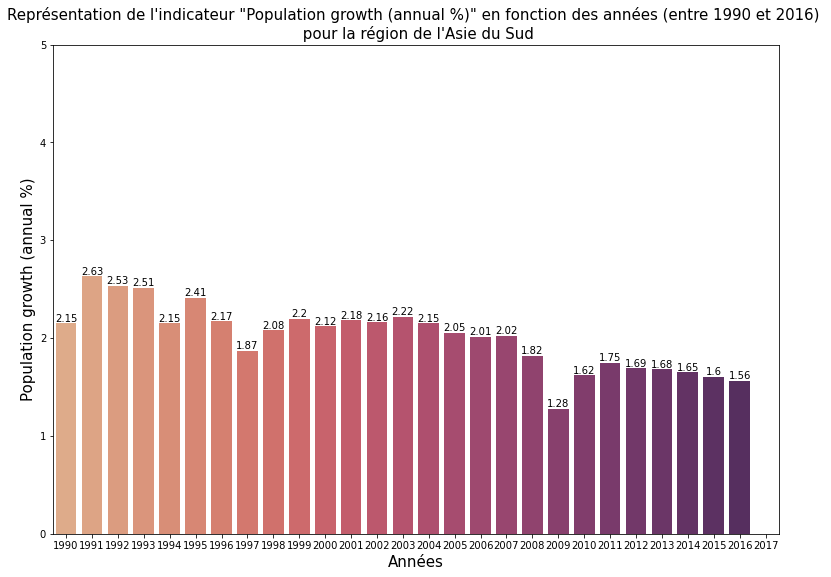

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


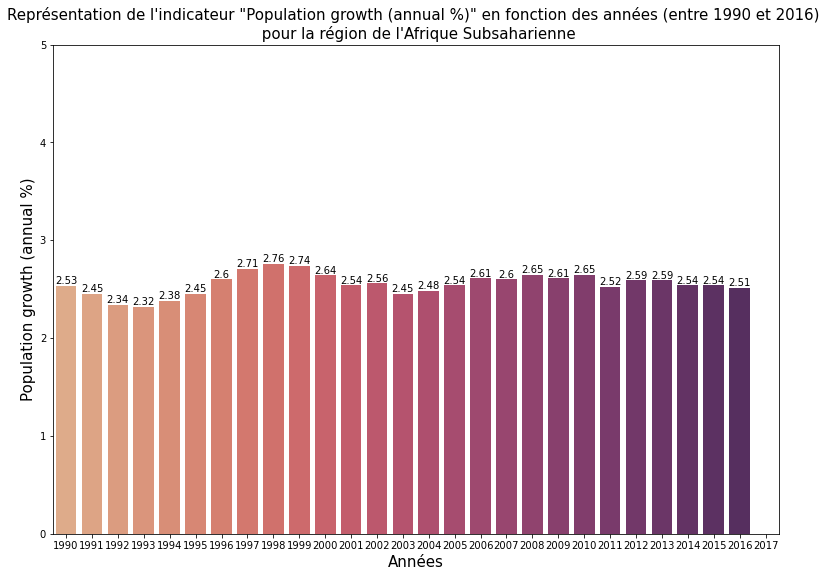

In [191]:
#On va effectuer un graphique avec nos données

#Création du graphique
x = data_pop_transpose['Annees']
y1 = data_pop_transpose['East Asia & Pacific']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data = data_pop_transpose, palette = 'flare')

#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "Population growth (annual %)" en fonction des années (entre 1990 et 2016) \n pour la région du Pacifique et de l\'Asie de l\'Est' , fontsize = 15)
ax.set_ylabel('Population growth (annual %)', fontsize = 15)
plt.ylim(0, 5) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  


for i in ax.containers: #Méthode .containers pour accéder à l'étiquette de chaque barre. 
    ax.bar_label(i,)    # Boucle permettant de parcourir la liste d'étiquettes et affecter chaque barre à son étiquette. 

plt.savefig('indicateur_pop_Asie_Est_Pacifique.png')
plt.show()

x = data_pop_transpose['Annees']
y1 = data_pop_transpose['Europe & Central Asia']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data =data_pop_transpose, palette = 'flare')

#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "Population growth (annual %)" en fonction des années (entre 1990 et 2016) \n pour la région d\'Europe et d\'Asie Centrale' , fontsize = 15)
ax.set_ylabel('Population growth (annual %)', fontsize = 15)
plt.ylim(0, 5) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

for i in ax.containers: #Méthode .containers pour accéder à l'étiquette de chaque barre. 
    ax.bar_label(i,)    # Boucle permettant de parcourir la liste d'étiquettes et affecter chaque barre à son étiquette. 

plt.savefig('indicateur_pop_Europe_Asie_Centrale.png')
plt.show()

x = data_pop_transpose['Annees']
y1 = data_pop_transpose['Latin America & Caribbean']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data =data_pop_transpose, palette = 'flare')

#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "Population growth (annual %)" en fonction des années (entre 1990 et 2016) \n pour la région d\'Amérique Latine et Caraïbes' , fontsize = 15)
ax.set_ylabel('Population growth (annual %)', fontsize = 15)
plt.ylim(0, 5) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

for i in ax.containers: #Méthode .containers pour accéder à l'étiquette de chaque barre. 
    ax.bar_label(i,)    # Boucle permettant de parcourir la liste d'étiquettes et affecter chaque barre à son étiquette. 

plt.savefig('indicateur_pop_Amerique_Latine_Caraibes.png')
plt.show()

x = data_pop_transpose['Annees']
y1 = data_pop_transpose['Middle East & North Africa']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data =data_pop_transpose, palette = 'flare')

#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "Population growth (annual %)" en fonction des années (entre 1990 et 2016) \n pour la région du Moyen-Orient et Afrique du Nord' , fontsize = 15)
ax.set_ylabel('Population growth (annual %)', fontsize = 15)
plt.ylim(0, 5) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

for i in ax.containers: #Méthode .containers pour accéder à l'étiquette de chaque barre. 
    ax.bar_label(i,)    # Boucle permettant de parcourir la liste d'étiquettes et affecter chaque barre à son étiquette. 

plt.savefig('indicateur_pop_Moyen_Orient_Afrique_Nord.png')
plt.show()

x = data_pop_transpose['Annees']
y1 = data_pop_transpose['North America']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data =data_pop_transpose, palette = 'flare')

#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "Population growth (annual %)" en fonction des années (entre 1990 et 2016) \n pour la région de l\'Amérique du Nord' , fontsize = 15)
ax.set_ylabel('Population growth (annual %)', fontsize = 15)
plt.ylim(0, 5) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

for i in ax.containers: #Méthode .containers pour accéder à l'étiquette de chaque barre. 
    ax.bar_label(i,)    # Boucle permettant de parcourir la liste d'étiquettes et affecter chaque barre à son étiquette. 

plt.savefig('indicateur_pop_Amerique_Nord.png')
plt.show()

x = data_pop_transpose['Annees']
y1 = data_pop_transpose['South Asia']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data =data_pop_transpose, palette = 'flare')

#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "Population growth (annual %)" en fonction des années (entre 1990 et 2016) \n pour la région de l\'Asie du Sud' , fontsize = 15)
ax.set_ylabel('Population growth (annual %)', fontsize = 15)
plt.ylim(0, 5) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

for i in ax.containers: #Méthode .containers pour accéder à l'étiquette de chaque barre. 
    ax.bar_label(i,)    # Boucle permettant de parcourir la liste d'étiquettes et affecter chaque barre à son étiquette. 

plt.savefig('indicateur_pop_Asie_Sud.png')
plt.show()

x = data_pop_transpose['Annees']
y1 = data_pop_transpose['Sub-Saharan Africa']

plt.figure(figsize = (13,9))
ax = sns.barplot(x, y1, data =data_pop_transpose, palette = 'flare')

#plt.legend(loc=2)
ax.set_xlabel('Années', fontsize = 15)
ax.set_title('Représentation de l\'indicateur "Population growth (annual %)" en fonction des années (entre 1990 et 2016) \n pour la région de l\'Afrique Subsaharienne' , fontsize = 15)
ax.set_ylabel('Population growth (annual %)', fontsize = 15)
plt.ylim(0, 5) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

for i in ax.containers: #Méthode .containers pour accéder à l'étiquette de chaque barre. 
    ax.bar_label(i,)    # Boucle permettant de parcourir la liste d'étiquettes et affecter chaque barre à son étiquette. 

plt.savefig('indicateur_pop_Afrique_Subsaharienne.png')
plt.show()

## Pour chaque indicateur, on va regarder quels sont les 10 premiers pays qui ressortent, ainsi que la région à laquelle ils appartiennent. 

### 1) Indicateur GDP per capita, PPP (current international S)

In [192]:
#On récupère notre df contenant les pays dont le taux de remplissage est > 85% et dont on n'a gardé uniquement les "vrais" pays. 
display(data_GDP_Region_nettoye.head())
display(data_GDP_Region_nettoye.describe())

Country Name Country Code  \
25              Albania          ALB   
26              Algeria          DZA   
27               Angola          AGO   
28  Antigua and Barbuda          ATG   
29            Argentina          ARG   

                                   Indicator Name     Indicator Code  \
25  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
26  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
27  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
28  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
29  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   

            1990          1991          1992          1993          1994  \
25   2721.615212   1992.073688   1902.286383   2147.575112   2389.946945   
26   6616.408352   6591.301496   6704.650988   6573.667135   6518.026530   
27   2840.200763   2811.287126   2591.326276   1932.804031   1978.438032   
28  10587.593409  11076.679699  11272.825320  11887.902436  12629.818947   
29   6990.554045   8024.592354   9061.645587   9693.967279  10342.476242   

            1995  ...          2011          2012          2013          2014  \
25   2781.413989  ...  10207.700674  10526.248328  10580.511504  11332.506541   
26   6777.297778  ...  12990.345016  13404.411784  13715.743579  14203.292233   
27   2162.917203  ...   5911.254334   6109.136612   6400.673376   6594.397826   
28  12012.906954  ...  18605.316754  19398.059477  19480.102598  20618.995752   
29  10129.777793  ...  19629.351845  19579.006484  20161.496832  19801.259115   

            2015          2016  Unnamed: 69  Nbre_valeurs  Taux_remplissage  \
25  11449.094589  11865.501400          NaN            27             100.0   
26  14643.343064  15042.442301          NaN            27             100.0   
27   6648.124016   6466.665045          NaN            27             100.0   
28  21503.952551  22705.482203          NaN            27             100.0   
29  20379.779854  19978.640971          NaN            27             100.0   

                        Region  
25       Europe & Central Asia  
26  Middle East & North Africa  
27          Sub-Saharan Africa  
28   Latin America & Caribbean  
29   Latin America & Caribbean  

[5 rows x 35 columns]

1990          1991          1992          1993          1994  \
count    165.000000    167.000000    168.000000    169.000000    170.000000   
mean    7498.041452   7762.704032   7965.496436   8142.486089   8405.281685   
std     9527.963414   9766.444255  10028.464851  10193.979579  10578.491795   
min      244.659208    258.472079    242.001214    239.484029    190.152757   
25%     1538.537488   1700.534727   1661.664466   1590.968004   1555.282947   
50%     3901.571700   4053.249154   4224.286760   4349.906965   4366.087484   
75%     9259.512727   9803.602319  10244.724164  10874.105831  10962.983390   
max    71786.112834  70641.765656  70495.960531  69085.125988  71492.929599   

               1995          1996          1997          1998          1999  \
count    170.000000    170.000000    170.000000    170.000000    170.000000   
mean    8756.314519   9121.165924   9536.945354   9782.550021  10123.720629   
std    10989.081729  11330.349631  11717.297607  11774.332655  12144.934434   
min      180.406167    194.902924    374.101460    412.260821    439.814170   
25%     1667.301268   1817.202974   1917.261448   2031.590985   2096.221887   
50%     4532.663043   4807.544853   4991.100134   5196.307254   5448.076256   
75%    11131.124498  11615.713585  12874.527127  13281.530462  13851.281077   
max    74045.229872  75977.393419  79612.867769  76783.542470  76193.700478   

       ...          2010           2011           2012           2013  \
count  ...    170.000000     170.000000     170.000000     170.000000   
mean   ...  16321.171928   17139.206868   17660.393809   18327.811325   
std    ...  17726.460356   18969.301980   19558.153723   20455.550474   
min    ...    597.076987     629.856389     664.801780     618.514682   
25%    ...   3261.908884    3438.002719    3694.755993    3873.047424   
50%    ...   9686.532147   10127.975672   10519.283540   10992.630304   
75%    ...  21454.630132   22848.281719   24146.945403   25290.291901   
max    ...  96198.241003  116752.211556  126863.410010  140037.115597   

                2014           2015           2016  Unnamed: 69  Nbre_valeurs  \
count     168.000000     167.000000     164.000000          0.0    170.000000   
mean    18542.539773   18839.349577   18970.021316          NaN     26.870588   
std     20682.899599   20286.537087   20342.833030          NaN      0.560816   
min       633.918765     668.337622     700.063083          NaN     23.000000   
25%      3874.331030    3890.341039    4008.266924          NaN     27.000000   
50%     11329.017643   11469.365604   11748.532548          NaN     27.000000   
75%     25526.155371   26562.572465   26190.000287          NaN     27.000000   
max    137736.949815  107245.639439  104343.656456          NaN     27.000000   

       Taux_remplissage  
count        170.000000  
mean          99.520697  
std            2.077096  
min           85.185185  
25%          100.000000  
50%          100.000000  
75%          100.000000  
max          100.000000  

[8 rows x 30 columns]

In [193]:
#On va effectuer une sélection des pays en calculant une moyenne pour chaque pays sur la période de 1990 à 2016
data_GDP_Region_nettoye['Moyenne'] = round(data_GDP_Region_nettoye.loc[:, '1990':'2016'].mean(axis=1), 2)
data_GDP_Region_nettoye['Ecart-type'] = round(data_GDP_Region_nettoye.loc[:, '1990':'2016'].std(axis=1), 2)
data_GDP_Region_nettoye['Mediane'] = round(data_GDP_Region_nettoye.loc[:, '1990':'2016'].median(axis=1), 2)
display(data_GDP_Region_nettoye.head())

Country Name Country Code  \
25              Albania          ALB   
26              Algeria          DZA   
27               Angola          AGO   
28  Antigua and Barbuda          ATG   
29            Argentina          ARG   

                                   Indicator Name     Indicator Code  \
25  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
26  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
27  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
28  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
29  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   

            1990          1991          1992          1993          1994  \
25   2721.615212   1992.073688   1902.286383   2147.575112   2389.946945   
26   6616.408352   6591.301496   6704.650988   6573.667135   6518.026530   
27   2840.200763   2811.287126   2591.326276   1932.804031   1978.438032   
28  10587.593409  11076.679699  11272.825320  11887.902436  12629.818947   
29   6990.554045   8024.592354   9061.645587   9693.967279  10342.476242   

            1995  ...          2014          2015          2016  Unnamed: 69  \
25   2781.413989  ...  11332.506541  11449.094589  11865.501400          NaN   
26   6777.297778  ...  14203.292233  14643.343064  15042.442301          NaN   
27   2162.917203  ...   6594.397826   6648.124016   6466.665045          NaN   
28  12012.906954  ...  20618.995752  21503.952551  22705.482203          NaN   
29  10129.777793  ...  19801.259115  20379.779854  19978.640971          NaN   

    Nbre_valeurs  Taux_remplissage                      Region   Moyenne  \
25            27             100.0       Europe & Central Asia   6044.20   
26            27             100.0  Middle East & North Africa   9984.15   
27            27             100.0          Sub-Saharan Africa   3957.02   
28            27             100.0   Latin America & Caribbean  16495.16   
29            27             100.0   Latin America & Caribbean  13917.99   

    Ecart-type   Mediane  
25     3408.65   5114.78  
26     2945.86   9621.16  
27     1713.27   2870.04  
28     4059.55  15479.22  
29     4280.07  12132.51  

[5 rows x 38 columns]

In [194]:
#On va classer les pays en les truant par la moyenne calculée dans l'ordre décroissant.
data_GDP_Region_nettoye = data_GDP_Region_nettoye.sort_values(by = 'Moyenne', ascending = False)
data_GDP_Region_nettoye

#On affiche les 10 premiers pays
data_GDP_Region_nettoye.head(10)

Country Name Country Code  \
184  United Arab Emirates          ARE   
48      Brunei Darussalam          BRN   
114            Luxembourg          LUX   
115      Macao SAR, China          MAC   
158             Singapore          SGP   
138                Norway          NOR   
171           Switzerland          CHE   
42                Bermuda          BMU   
186         United States          USA   
154          Saudi Arabia          SAU   

                                    Indicator Name     Indicator Code  \
184  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
48   GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
114  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
115  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
158  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
138  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
171  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
42   GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
186  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
154  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   

             1990          1991          1992          1993          1994  \
184  71786.112834  70641.765656  70495.960531  69085.125988  71492.929599   
48   54726.564283  56686.656881  59033.170923  58946.128174  60426.845837   
114  30955.183707  34287.974996  35236.554644  37089.074533  38793.737696   
115  26089.672783  27168.160844  30727.707124  32385.508374  33786.659194   
158  22194.887370  23780.838504  25275.970757  28141.905041  30896.414621   
138  18431.312288  19538.944763  20579.541363  21540.071606  22979.379576   
171  27592.863466  27899.291031  28210.056115  28583.362869  29327.586824   
42   26210.910901  26261.125942  27038.876725  28362.566128  28938.439265   
186  23954.479355  24405.164815  25492.951652  26464.852512  27776.635528   
154  27441.436180  31564.353445  32584.089775  32018.384162  32071.976037   

             1995  ...           2014           2015           2016  \
184  74045.229872  ...   67551.002395   70391.220127   72540.205858   
48   62787.253125  ...   80152.139184   79593.280721   77570.911947   
114  39609.699457  ...  101876.730017  103732.639291  103556.591156   
115  34914.478765  ...  137736.949815  107245.639439  104343.656456   
158  32747.446099  ...   84593.428145   86306.308913   88003.099478   
138  24306.607541  ...   65787.047567   62066.808188   59384.811722   
171  29882.877248  ...   61792.294311   63291.538276   63741.452507   
42   30621.691580  ...            NaN            NaN            NaN   
186  28782.175020  ...   54598.550689   56469.008969   57638.159088   
154  32066.507464  ...   52626.017196   54118.737375   54522.253671   

     Unnamed: 69  Nbre_valeurs  Taux_remplissage                      Region  \
184          NaN            27        100.000000  Middle East & North Africa   
48           NaN            27        100.000000         East Asia & Pacific   
114          NaN            27        100.000000       Europe & Central Asia   
115          NaN            27        100.000000         East Asia & Pacific   
158          NaN            27        100.000000         East Asia & Pacific   
138          NaN            27        100.000000       Europe & Central Asia   
171          NaN            27        100.000000       Europe & Central Asia   
42           NaN            24         88.888889               North America   
186          NaN            27        100.000000               North America   
154          NaN            27        100.000000  Middle East & North Africa   

      Moyenne  Ecart-type   Mediane  
184  72691.59     7901.96  72540.21  
48   70403.74     9088.47  71337.24  
114  65286.34    24402.42  60035.76  
115  62931.68    37518.67  41266.80  
158  51669.31    21107.58  45799.72  
138  42

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


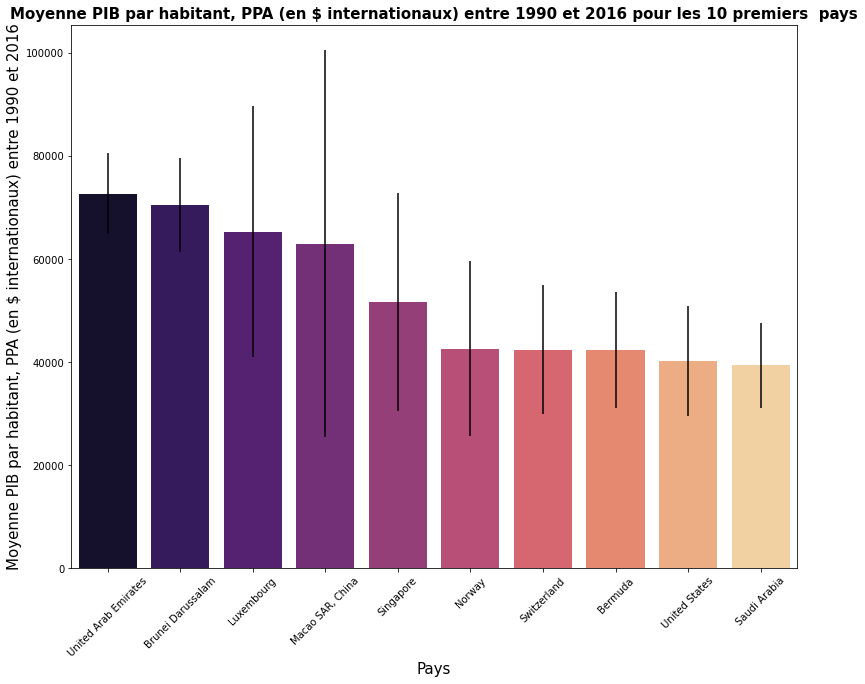

In [195]:
#On va d'abord essayer de représenter visuellement nos données
x = data_GDP_Region_nettoye['Country Name'].head(10)
y = data_GDP_Region_nettoye['Moyenne'].head(10)

plt.figure(figsize = (13,10))

plt.bar(x, y, yerr = data_GDP_Region_nettoye['Ecart-type'].head(10), ecolor = 'black')
ax = sns.barplot(x, y, data = data_GDP_Region_nettoye, palette = 'magma')

plt.xticks(rotation = 45)
ax.set_xlabel('Pays', fontsize = 15)
ax.set_title('Moyenne PIB par habitant, PPA (en $ internationaux) entre 1990 et 2016 pour les 10 premiers  pays', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Moyenne PIB par habitant, PPA (en $ internationaux) entre 1990 et 2016', fontsize = 15)

plt.savefig('indicateur_GDP_moyenne_Pays.png')
plt.show()

#### En observant ces pays, on peut effectuer une jointure avec le fichier Country, à nouveau pour voir à quelle(s) régions ils appartiennent.

In [196]:
#On va regarder à quelles régions appartiennent les 10 premiers pays.
Country_GDP_10 = data_GDP_Region_nettoye.head(10) #10 premiers pays

display(Country_GDP_10.groupby('Region').size()) #On compte le nombre de fois qu'apparait une région.

Region
East Asia & Pacific           3
Europe & Central Asia         3
Middle East & North Africa    2
North America                 2
dtype: int64

##### D'après nos résultats, sur les 10 premiers pays, l'Europe et l'Asie Centrale est apparue 3 fois sur 10, puis l'Asie de l'Est et le Pacifique sont apparus 3 fois sur 10. L'Amérique du Nord n'est apparue que 2 fois sur 10 et l'Afrique du Nord et Moyen-Orient sont apparu 2 fois sur 10. Cela montre bien que certains pays intéressants peuvent se cacher dans les régions. 

### 2) Internet users (per 100 people)

In [197]:
#On récupère notre df contenant les pays dont le taux de remplissage est > 85% et dont on n'a gardé uniquement les "vrais" pays.
display(data_internet_Region_nettoye.head())
display(data_internet_Region_nettoye.describe())

Country Name Country Code                   Indicator Name  \
19              Albania          ALB  Internet users (per 100 people)   
20              Algeria          DZA  Internet users (per 100 people)   
21  Antigua and Barbuda          ATG  Internet users (per 100 people)   
22            Argentina          ARG  Internet users (per 100 people)   
23              Armenia          ARM  Internet users (per 100 people)   

    Indicator Code  1990  1991      1992      1993      1994      1995  ...  \
19  IT.NET.USER.P2   0.0   NaN       NaN       NaN       NaN  0.011169  ...   
20  IT.NET.USER.P2   0.0   NaN       NaN       NaN  0.000361  0.001769  ...   
21  IT.NET.USER.P2   0.0   NaN       NaN       NaN       NaN  2.200769  ...   
22  IT.NET.USER.P2   0.0   NaN  0.002993  0.029527  0.043706  0.086277  ...   
23  IT.NET.USER.P2   0.0   NaN       NaN       NaN  0.009117  0.052743  ...   

    2011       2012  2013       2014       2015       2016  Unnamed: 69  \
19  49.0  54.655959  57.2  60.100000  63.252933  66.363445          NaN   
20  14.9  18.200000  22.5  29.500000  38.200000  42.945527          NaN   
21  52.0  58.000000  63.4  67.780000  70.000000  73.000000          NaN   
22  51.0  55.800000  59.9  64.700000  68.043064  70.150764          NaN   
23  32.0  37.500000  41.9  54.622806  59.102378  62.000000          NaN   

    Nbre_valeurs  Taux_remplissage                      Region  
19            23         85.185185       Europe & Central Asia  
20            24         88.888889  Middle East & North Africa  
21            23         85.185185   Latin America & Caribbean  
22            26         96.296296   Latin America & Caribbean  
23            24         88.888889       Europe & Central Asia  

[5 rows x 35 columns]

1990       1991       1992       1993       1994        1995  \
count  126.000000  39.000000  50.000000  63.000000  86.000000  126.000000   
mean     0.039944   0.280305   0.399037   0.478487   0.704292    0.998432   
std      0.139225   0.439930   0.623811   0.752562   1.298470    2.174508   
min      0.000000   0.000000   0.000000   0.000000   0.000000    0.000000   
25%      0.000000   0.003335   0.003524   0.010952   0.007444    0.009652   
50%      0.000000   0.048789   0.073449   0.127690   0.082160    0.104039   
75%      0.000000   0.254678   0.423192   0.549046   0.779490    0.802169   
max      0.784729   1.407395   2.216366   2.783991   6.794812   13.900304   

             1996        1997        1998        1999  ...        2010  \
count  126.000000  125.000000  125.000000  126.000000  ...  126.000000   
mean     1.882206    3.424671    5.566576    8.170991  ...   42.428238   
std      3.622488    5.755363    8.511719   11.520576  ...   26.894235   
min      0.000000    0.003803    0.006203    0.012542  ...    0.580000   
25%      0.044018    0.095476    0.233914    0.516820  ...   20.175000   
50%      0.283893    0.797797    1.670148    2.612273  ...   40.825000   
75%      1.834784    3.920605    6.908303   11.039407  ...   65.625000   
max     18.250311   27.478869   36.264207   41.494483  ...   93.390000   

             2011        2012        2013        2014        2015        2016  \
count  126.000000  126.000000  126.000000  126.000000  126.000000  126.000000   
mean    45.750468   49.032611   52.028326   54.985688   57.947705   60.761646   
std     26.818829   26.795959   26.692543   26.159999   25.377592   24.727863   
min      0.900000    1.220000    1.264218    1.380000    4.866224    5.173627   
25%     24.002444   26.415000   29.962500   35.613610   38.817486   43.459145   
50%     45.898741   50.475035   53.980750   55.564230   59.938666   62.151096   
75%     68.019947   70.745000   72.482925   76.013694   77.580916   79.944698   
max     94.819687   96.209800   96.546800   98.160000   98.323610   98.240016   

       Unnamed: 69  Nbre_valeurs  Taux_remplissage  
count          0.0    126.000000        126.000000  
mean           NaN     24.849206         92.034098  
std            NaN      1.634955          6.055391  
min            NaN     23.000000         85.185185  
25%            NaN     23.000000         85.185185  
50%            NaN     24.000000         88.888889  
75%            NaN     27.000000        100.000000  
max            NaN     27.000000        100.000000  

[8 rows x 30 columns]

In [198]:
#On va effectuer une sélection des pays en calculant une moyenne pour chaque pays sur la période de 1990 à 2016
data_internet_Region_nettoye['Moyenne'] = round(data_internet_Region_nettoye.loc[:, '1990':'2016'].mean(axis=1), 2)
data_internet_Region_nettoye['Ecart-type'] = round(data_internet_Region_nettoye.loc[:, '1990':'2016'].std(axis=1), 2)
data_internet_Region_nettoye['Mediane'] = round(data_internet_Region_nettoye.loc[:, '1990':'2016'].median(axis=1), 2)
display(data_internet_Region_nettoye.head())

Country Name Country Code                   Indicator Name  \
19              Albania          ALB  Internet users (per 100 people)   
20              Algeria          DZA  Internet users (per 100 people)   
21  Antigua and Barbuda          ATG  Internet users (per 100 people)   
22            Argentina          ARG  Internet users (per 100 people)   
23              Armenia          ARM  Internet users (per 100 people)   

    Indicator Code  1990  1991      1992      1993      1994      1995  ...  \
19  IT.NET.USER.P2   0.0   NaN       NaN       NaN       NaN  0.011169  ...   
20  IT.NET.USER.P2   0.0   NaN       NaN       NaN  0.000361  0.001769  ...   
21  IT.NET.USER.P2   0.0   NaN       NaN       NaN       NaN  2.200769  ...   
22  IT.NET.USER.P2   0.0   NaN  0.002993  0.029527  0.043706  0.086277  ...   
23  IT.NET.USER.P2   0.0   NaN       NaN       NaN  0.009117  0.052743  ...   

         2014       2015       2016  Unnamed: 69  Nbre_valeurs  \
19  60.100000  63.252933  66.363445          NaN            23   
20  29.500000  38.200000  42.945527          NaN            24   
21  67.780000  70.000000  73.000000          NaN            23   
22  64.700000  68.043064  70.150764          NaN            26   
23  54.622806  59.102378  62.000000          NaN            24   

    Taux_remplissage                      Region  Moyenne  Ecart-type  Mediane  
19         85.185185       Europe & Central Asia    21.56       25.80     6.04  
20         88.888889  Middle East & North Africa     9.69       12.46     5.24  
21         85.185185   Latin America & Caribbean    29.98       24.93    27.00  
22         96.296296   Latin America & Caribbean    23.14       24.65    13.98  
23         88.888889       Europe & Central Asia    15.26       20.81     5.08  

[5 rows x 38 columns]

In [199]:
#On va classer les pays en les truant par la moyenne calculée dans l'ordre décroissant.
data_internet_Region_nettoye = data_internet_Region_nettoye.sort_values(by = 'Moyenne', ascending = False)
data_internet_Region_nettoye

#On affiche les 10 premiers pays
data_internet_Region_nettoye.head(10)

Country Name Country Code                   Indicator Name  \
30         Bermuda          BMU  Internet users (per 100 people)   
71         Iceland          ISL  Internet users (per 100 people)   
101         Norway          NOR  Internet users (per 100 people)   
125         Sweden          SWE  Internet users (per 100 people)   
54   Faroe Islands          FRO  Internet users (per 100 people)   
47         Denmark          DNK  Internet users (per 100 people)   
98     Netherlands          NLD  Internet users (per 100 people)   
56         Finland          FIN  Internet users (per 100 people)   
99     New Zealand          NZL  Internet users (per 100 people)   
126    Switzerland          CHE  Internet users (per 100 people)   

     Indicator Code      1990      1991      1992      1993      1994  \
30   IT.NET.USER.P2  0.000000       NaN       NaN       NaN       NaN   
71   IT.NET.USER.P2  0.000000  0.505129  1.539160  2.667825  6.794812   
101  IT.NET.USER.P2  0.707299  1.407395  2.216366  2.783991  4.152450   
125  IT.NET.USER.P2  0.584192  1.160519  1.497871  1.716364  3.412810   
54   IT.NET.USER.P2  0.000000       NaN       NaN       NaN       NaN   
47   IT.NET.USER.P2  0.097277  0.194057  0.386914  0.578330  1.344308   
98   IT.NET.USER.P2  0.334387  0.531496  1.320008  1.967088  3.257309   
56   IT.NET.USER.P2  0.401088  1.397439  1.886880  2.568461  4.915099   
99   IT.NET.USER.P2  0.000000       NaN  0.285941  0.631215  3.168719   
126  IT.NET.USER.P2  0.595714  1.179956  1.751713  2.167270  2.720004   

          1995  ...       2014       2015       2016  Unnamed: 69  \
30    6.838163  ...  96.800000  98.323610  98.000000          NaN   
71   11.215876  ...  98.160000  98.200000  98.240016          NaN   
101   6.423220  ...  96.300000  96.810300  97.298204          NaN   
125   5.098024  ...  92.520000  90.610200  91.506828          NaN   
54    0.000000  ...  93.300000  94.200000  95.108682          NaN   
47    3.825656  ...  95.990000  96.330500  96.967785          NaN   
98    6.473158  ...  91.666666  91.724138  90.410959          NaN   
56   13.900304  ...  86.530393  86.422133  87.703650          NaN   
99    4.884241  ...  85.500000  88.222889  88.470186          NaN   
126   3.552007  ...  87.400000  87.479056  89.405568          NaN   

     Nbre_valeurs  Taux_remplissage                 Region  Moyenne  \
30             23         85.185185          North America    61.17   
71             27        100.000000  Europe & Central Asia    59.60   
101            27        100.000000  Europe & Central Asia    57.95   
125            27        100.000000  Europe & Central Asia    56.78   
54             23         85.185185  Europe & Central Asia    55.36   
47             27        100.000000  Europe & Central Asia    54.12   
98             27        100.000000  Europe & Central Asia    53.96   
56             27        100.000000  Europe & Central Asia    52.67   
99             26         96.296296    East Asia & Pacific    51.11   
126            27        100.000000  Europe & Central Asia    50.94   

     Ecart-type  Mediane  
30        30.56    65.45  
71        38.64    83.14  
101       38.15    77.69  
125       37.74    79.13  
54        33.43    67.90  
47        39.25    76.26  
98        37.40    64.35  
56        34.86    69.22  
99        32.16    61.41  
126       34.88    65.10  

[10 rows x 38 columns]

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


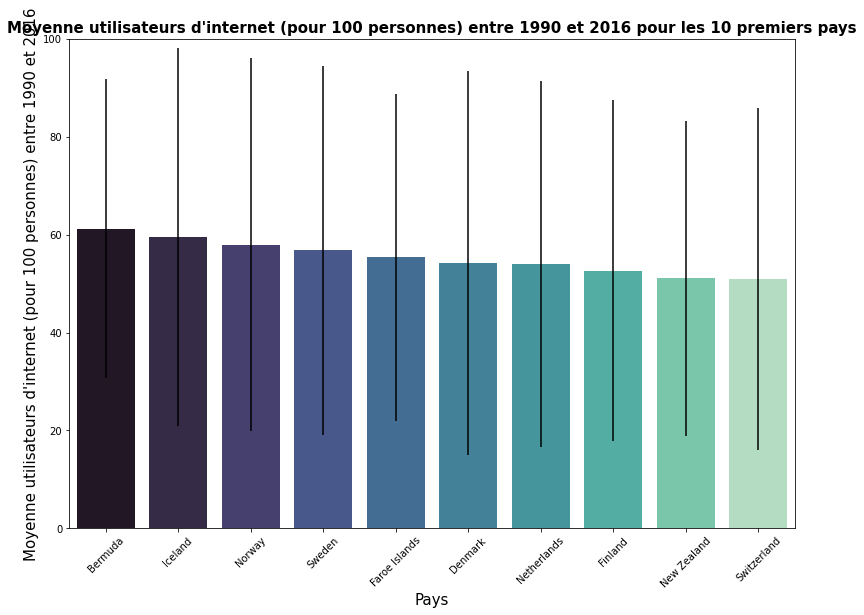

In [200]:
#On va d'abord essayer de représenter visuellement nos données
x = data_internet_Region_nettoye['Country Name'].head(10)
y = data_internet_Region_nettoye['Moyenne'].head(10)

plt.figure(figsize = (13,9))

plt.bar(x, y, yerr = data_internet_Region_nettoye['Ecart-type'].head(10), ecolor = 'black')
ax = sns.barplot(x, y, data = data_internet_Region_nettoye, palette = 'mako')

#plt.legend(loc=2)
plt.xticks(rotation = 45)
ax.set_xlabel('Pays', fontsize = 15)
ax.set_title('Moyenne utilisateurs d\'internet (pour 100 personnes) entre 1990 et 2016 pour les 10 premiers pays', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Moyenne utilisateurs d\'internet (pour 100 personnes) entre 1990 et 2016', fontsize = 15)
plt.ylim(0, 100) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

#for i in ax.containers: #Méthode .containers pour accéder à l'étiquette de chaque barre. 
    #ax.bar_label(i,)    # Boucle permettant de parcourir la liste d'étiquettes et affecter chaque barre à son étiquette. 

plt.savefig('indicateur_internet_moyenne_Pays.png')
plt.show()

In [201]:
#On va regarder à quelles régions appartiennent les 10 premiers pays.
Country_internet_10 = data_internet_Region_nettoye.head(10)

display(Country_internet_10.groupby('Region').size()) #On compte le nombre de fois qu'apparait une région.

Region
East Asia & Pacific      1
Europe & Central Asia    8
North America            1
dtype: int64

### 3) Unemployment, total (% of total labor force)

In [202]:
#On récupère notre df contenant les pays dont le taux de remplissage est > 85% et dont on n'a gardé uniquement les "vrais" pays.
display(data_unemploy_Region_nettoye.head())
display(data_unemploy_Region_nettoye.describe())

Country Name Country Code                                Indicator Name  \
25  Afghanistan          AFG  Unemployment, total (% of total labor force)   
26      Albania          ALB  Unemployment, total (% of total labor force)   
27      Algeria          DZA  Unemployment, total (% of total labor force)   
28       Angola          AGO  Unemployment, total (% of total labor force)   
29    Argentina          ARG  Unemployment, total (% of total labor force)   

    Indicator Code  1990  1991  1992       1993  1994       1995  ...  2012  \
25  SL.UEM.TOTL.ZS   NaN   1.3   0.8   0.700000   0.6   1.800000  ...   8.0   
26  SL.UEM.TOTL.ZS   NaN  12.7  13.6  15.000000  14.8  14.300000  ...  13.4   
27  SL.UEM.TOTL.ZS   NaN  20.6  23.0  23.200001  24.4  27.900000  ...  11.0   
28  SL.UEM.TOTL.ZS   NaN   6.2   6.1   5.900000   6.2   6.400000  ...   6.2   
29  SL.UEM.TOTL.ZS   NaN   5.8   6.7  10.100000  12.1  18.799999  ...   7.2   

    2013  2014  2015  2016  2017  Unnamed: 69  Nbre_valeurs  Taux_remplissage  \
25   8.4   8.6   8.6   8.6   NaN          NaN            26         96.296296   
26  15.6  17.5  17.1  15.2   NaN          NaN            26         96.296296   
27   9.8  10.6  11.2  11.5   NaN          NaN            26         96.296296   
28   6.2   6.2   6.2   6.1   NaN          NaN            26         96.296296   
29   7.1   7.3   7.2   8.8   NaN          NaN            26         96.296296   

                        Region  
25                  South Asia  
26       Europe & Central Asia  
27  Middle East & North Africa  
28          Sub-Saharan Africa  
29   Latin America & Caribbean  

[5 rows x 36 columns]

1990        1991        1992        1993        1994        1995  \
count   0.0  186.000000  186.000000  186.000000  186.000000  186.000000   
mean    NaN    8.984946    9.204301    9.429032    9.484409    9.375806   
std     NaN    6.550081    6.503087    6.646789    6.550422    6.608145   
min     NaN    0.100000    0.500000    0.400000    0.400000    0.200000   
25%     NaN    3.950000    4.150000    4.300000    4.325000    4.925000   
50%     NaN    6.900000    7.550000    7.700000    8.000000    7.850000   
75%     NaN   12.450000   13.225000   13.250000   13.075000   12.175000   
max     NaN   31.700001   31.400000   32.000000   31.799999   34.900002   

             1996        1997        1998        1999  ...        2011  \
count  186.000000  186.000000  186.000000  186.000000  ...  186.000000   
mean     9.544086    9.432258    9.424194    9.369892  ...    9.119355   
std      6.722378    6.646481    6.450854    6.259242  ...    6.385224   
min      0.300000    0.700000    0.500000    0.300000  ...    0.200000   
25%      5.100000    4.950000    5.025000    4.725000  ...    4.500000   
50%      8.050000    7.900000    7.750000    7.800000  ...    7.200000   
75%     12.800000   12.650000   12.750000   12.950000  ...   12.700000   
max     37.000000   39.299999   34.500000   32.400002  ...   31.400000   

             2012        2013        2014        2015        2016  2017  \
count  186.000000  186.000000  186.000000  186.000000  186.000000   0.0   
mean     9.132796    9.112903    8.990323    8.833871    8.689247   NaN   
std      6.600020    6.595449    6.525999    6.419614    6.366109   NaN   
min      0.200000    0.300000    0.100000    0.100000    0.200000   NaN   
25%      4.500000    4.425000    4.800000    4.625000    4.450000   NaN   
50%      7.100000    7.100000    6.850000    6.850000    6.550000   NaN   
75%     12.200000   11.900000   11.575000   11.350000   11.375000   NaN   
max     31.000000   31.100000   31.200001   31.299999   31.400000   NaN   

       Unnamed: 69  Nbre_valeurs  Taux_remplissage  
count          0.0         186.0      1.860000e+02  
mean           NaN          26.0      9.629630e+01  
std            NaN           0.0      3.134826e-13  
min            NaN          26.0      9.629630e+01  
25%            NaN          26.0      9.629630e+01  
50%            NaN          26.0      9.629630e+01  
75%            NaN          26.0      9.629630e+01  
max            NaN          26.0      9.629630e+01  

[8 rows x 31 columns]

In [203]:
#On va effectuer une sélection des pays en calculant une moyenne pour chaque pays sur la période de 1990 à 2016
data_unemploy_Region_nettoye['Moyenne'] = round(data_unemploy_Region_nettoye.loc[:, '1990':'2016'].mean(axis=1), 2)
data_unemploy_Region_nettoye['Ecart-type'] = round(data_unemploy_Region_nettoye.loc[:, '1990':'2016'].std(axis=1), 2)
data_unemploy_Region_nettoye['Mediane'] = round(data_unemploy_Region_nettoye.loc[:, '1990':'2016'].median(axis=1), 2)
display(data_unemploy_Region_nettoye.head())

Country Name Country Code                                Indicator Name  \
25  Afghanistan          AFG  Unemployment, total (% of total labor force)   
26      Albania          ALB  Unemployment, total (% of total labor force)   
27      Algeria          DZA  Unemployment, total (% of total labor force)   
28       Angola          AGO  Unemployment, total (% of total labor force)   
29    Argentina          ARG  Unemployment, total (% of total labor force)   

    Indicator Code  1990  1991  1992       1993  1994       1995  ...  2015  \
25  SL.UEM.TOTL.ZS   NaN   1.3   0.8   0.700000   0.6   1.800000  ...   8.6   
26  SL.UEM.TOTL.ZS   NaN  12.7  13.6  15.000000  14.8  14.300000  ...  17.1   
27  SL.UEM.TOTL.ZS   NaN  20.6  23.0  23.200001  24.4  27.900000  ...  11.2   
28  SL.UEM.TOTL.ZS   NaN   6.2   6.1   5.900000   6.2   6.400000  ...   6.2   
29  SL.UEM.TOTL.ZS   NaN   5.8   6.7  10.100000  12.1  18.799999  ...   7.2   

    2016  2017  Unnamed: 69  Nbre_valeurs  Taux_remplissage  \
25   8.6   NaN          NaN            26         96.296296   
26  15.2   NaN          NaN            26         96.296296   
27  11.5   NaN          NaN            26         96.296296   
28   6.1   NaN          NaN            26         96.296296   
29   8.8   NaN          NaN            26         96.296296   

                        Region  Moyenne  Ecart-type  Mediane  
25                  South Asia     5.00        3.70     8.05  
26       Europe & Central Asia    14.59        2.00    14.05  
27  Middle East & North Africa    18.72        7.37    19.15  
28          Sub-Saharan Africa     6.28        0.14     6.30  
29   Latin America & Caribbean    11.24        4.24     9.75  

[5 rows x 39 columns]

In [204]:
#On va classer les pays en les truant par la moyenne calculée dans l'ordre décroissant.
data_unemploy_Region_nettoye = data_unemploy_Region_nettoye.sort_values(by = 'Moyenne', ascending = False)
data_unemploy_Region_nettoye

#On affiche les 10 premiers pays
data_unemploy_Region_nettoye.head(10)

Country Name Country Code  \
125          Macedonia, FYR          MKD   
173         Solomon Islands          SLB   
85              Gambia, The          GMB   
119                 Lesotho          LSO   
182               Swaziland          SWZ   
175            South Africa          ZAF   
139              Mozambique          MOZ   
44   Bosnia and Herzegovina          BIH   
207      West Bank and Gaza          PSE   
141                 Namibia          NAM   

                                   Indicator Name  Indicator Code  1990  \
125  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
173  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
85   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
119  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
182  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
175  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
139  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
44   Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
207  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   
141  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS   NaN   

          1991       1992       1993       1994       1995  ...       2015  \
125  30.600000  30.500000  30.200001  31.299999  31.200001  ...  26.100000   
173  31.700001  31.400000  32.000000  31.799999  31.700001  ...  31.299999   
85   29.299999  29.200001  29.299999  28.900000  29.299999  ...  29.700001   
119  18.900000  16.100000  20.799999  19.400000  34.900002  ...  26.799999   
182  23.799999  22.799999  23.299999  22.799999  21.700001  ...  26.200001   
175  25.400000  22.400000  25.900000  20.000000  16.900000  ...  25.200001   
139  24.799999  23.799999  24.200001  24.000000  23.700001  ...  25.299999   
44   17.600000  20.799999  19.400000  19.700001  20.000000  ...  26.299999   
207  26.600000  29.200001  24.799999  26.500000  23.500000  ...  25.900000   
141  19.000000  19.000000  19.000000  19.400000  19.299999  ...  19.600000   

          2016  2017  Unnamed: 69  Nbre_valeurs  Taux_remplissage  \
125  23.700001   NaN          NaN            26         96.296296   
173  31.400000   NaN          NaN            26         96.296296   
85   29.700001   NaN          NaN            26         96.296296   
119  28.299999   NaN          NaN            26         96.296296   
182  26.000000   NaN          NaN            26         96.296296   
175  26.700001   NaN          NaN            26         96.296296   
139  25.000000   NaN          NaN            26         96.296296   
44   26.000000   NaN          NaN            26         96.296296   
207  27.000000   NaN          NaN            26         96.296296   
141  23.400000   NaN          NaN            26         96.296296   

                         Region  Moyenne  Ecart-type  Mediane  
125       Europe & Central Asia    32.17        3.36    31.95  
173         East Asia & Pacific    31.55        0.57    31.40  
85           Sub-Saharan Africa    29.64        0.30    29.70  
119          Sub-Saharan Africa    28.96        6.03    28.85  
182          Sub-Saharan Africa    24.65        2.31    23.95  
175          Sub-Saharan Africa    24.09        2.32    24.70  
139          Sub-Saharan Africa    23.86        0.70    23.75  
44        Europe & Central Asia    23.75        3.67    23.50  
207  Middle East & North Africa    23.55        4.35    23.90  
141          Sub-Saharan Africa    20.17        1.32    19.80  

[10 rows x 39 columns]

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


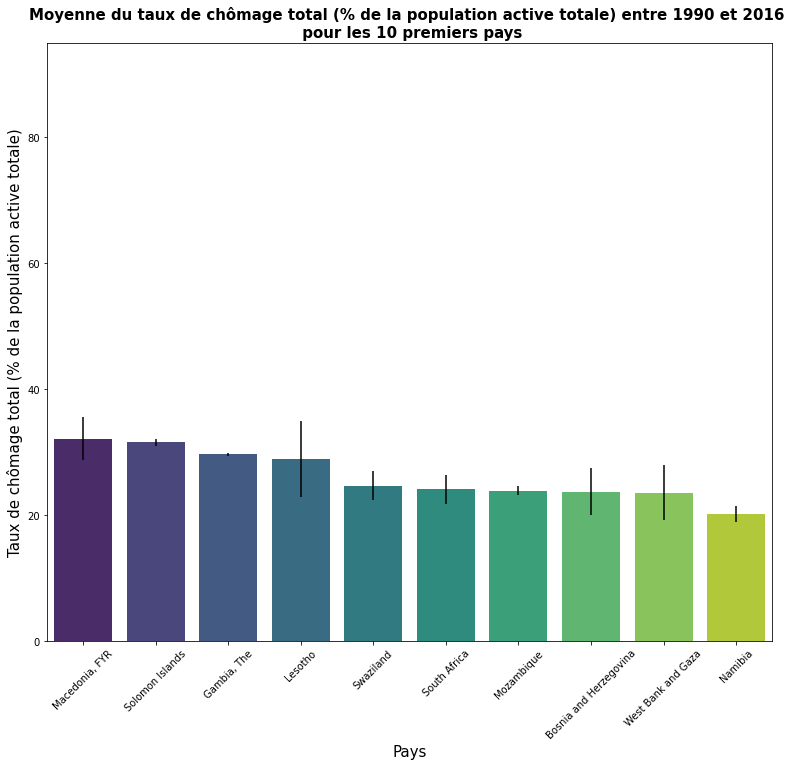

In [205]:
#On va d'abord essayer de représenter visuellement nos données
x = data_unemploy_Region_nettoye['Country Name'].head(10)
y = data_unemploy_Region_nettoye['Moyenne'].head(10)

plt.figure(figsize = (13,11))

plt.bar(x, y, yerr = data_unemploy_Region_nettoye['Ecart-type'].head(10), ecolor = 'black')
ax = sns.barplot(x, y, data = data_unemploy_Region_nettoye, palette = 'viridis')

#plt.legend(loc=2)
plt.xticks(rotation = 45)
ax.set_xlabel('Pays', fontsize = 15)
ax.set_title('Moyenne du taux de chômage total (% de la population active totale) entre 1990 et 2016 \n pour les 10 premiers pays', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Taux de chômage total (% de la population active totale)', fontsize = 15)
plt.ylim(0, 95) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

plt.savefig('indicateur_chomage_moyenne_Pays.png')
plt.show()

In [206]:
#On récupère notre df contenant les pays dont le taux de remplissage est > 85% et dont on n'a gardé uniquement les "vrais" pays.
Country_unemploy_10 = data_unemploy_Region_nettoye.head(10) #10 premiers pays

display(Country_unemploy_10.groupby('Region').size()) #On compte le nombre de fois qu'apparait une région.

Region
East Asia & Pacific           1
Europe & Central Asia         2
Middle East & North Africa    1
Sub-Saharan Africa            6
dtype: int64

### 4) Population growth (annual %)


In [207]:
#On récupère notre df contenant les pays dont le taux de remplissage est > 85% et dont on n'a gardé uniquement les "vrais" pays.
display(data_pop_Region_nettoye.head())
display(data_pop_Region_nettoye.describe())

Country Name Country Code                Indicator Name Indicator Code  \
25     Afghanistan          AFG  Population growth (annual %)    SP.POP.GROW   
26         Albania          ALB  Population growth (annual %)    SP.POP.GROW   
27         Algeria          DZA  Population growth (annual %)    SP.POP.GROW   
28  American Samoa          ASM  Population growth (annual %)    SP.POP.GROW   
29         Andorra          AND  Population growth (annual %)    SP.POP.GROW   

        1990      1991      1992      1993      1994      1995  ...      2012  \
25  3.925342  5.900771  7.325447  7.665433  6.895569  5.572581  ...  3.272703   
26  1.799086 -0.602810 -0.606435 -0.610166 -0.613881 -0.617704  ... -0.165151   
27  2.559039  2.447244  2.332887  2.201996  2.051752  1.893116  ...  2.006614   
28  3.120159  2.802737  2.486654  2.247062  2.112775  2.035018  ... -0.162822   
29  3.854362  3.889679  3.837472  3.476101  2.759621  1.854203  ... -1.588653   

        2013      2014      2015      2016  2017  Unnamed: 69  Nbre_valeurs  \
25  3.315224  3.183201  2.943234  2.689163   NaN          NaN            27   
26 -0.183211 -0.207047 -0.291206 -0.159880   NaN          NaN            27   
27  2.036092  2.000666  1.919959  1.825463   NaN          NaN            27   
28  0.139320  0.234776  0.180222  0.111575   NaN          NaN            27   
29 -2.013314 -1.956178 -1.537836 -0.944017   NaN          NaN            27   

    Taux_remplissage                      Region  
25             100.0                  South Asia  
26             100.0       Europe & Central Asia  
27             100.0  Middle East & North Africa  
28             100.0         East Asia & Pacific  
29             100.0       Europe & Central Asia  

[5 rows x 36 columns]

1990        1991        1992        1993        1994        1995  \
count  210.000000  210.000000  210.000000  210.000000  210.000000  210.000000   
mean     1.806609    1.759253    1.709117    1.672713    1.596750    1.553770   
std      1.448021    1.634390    1.626332    1.671819    1.564859    1.428858   
min     -1.803750   -5.814339   -5.089333   -6.184857   -4.792691   -2.697722   
25%      0.609246    0.660276    0.655775    0.590004    0.526707    0.514303   
50%      1.898968    1.888112    1.776973    1.710297    1.619619    1.585764   
75%      2.722762    2.714478    2.675604    2.656120    2.587976    2.561368   
max      8.183105    6.178278    7.325447    7.665433    6.895569    5.572581   

             1996        1997        1998        1999  ...        2011  \
count  211.000000  211.000000  211.000000  211.000000  ...  210.000000   
mean     1.535394    1.533088    1.478288    1.451318  ...    1.386436   
std      1.410559    1.418066    1.571945    1.647792  ...    1.511084   
min     -3.820174   -2.517245   -5.924733  -10.955149  ...   -2.628656   
25%      0.526025    0.523774    0.479680    0.507580  ...    0.398515   
50%      1.583096    1.560010    1.511726    1.479682  ...    1.240307   
75%      2.505966    2.478399    2.411497    2.401854  ...    2.271090   
max      5.718648    7.357292    7.917892    7.283968  ...    9.245083   

             2012        2013        2014        2015        2016  2017  \
count  211.000000  211.000000  209.000000  209.000000  209.000000   0.0   
mean     1.392527    1.367179    1.326906    1.309286    1.298487   NaN   
std      1.435723    1.406995    1.328635    1.230634    1.141946   NaN   
min     -2.147571   -3.040564   -3.107229   -2.467847   -1.797539   NaN   
25%      0.429551    0.457004    0.424933    0.482973    0.477005   NaN   
50%      1.240334    1.205671    1.204125    1.170823    1.167803   NaN   
75%      2.241860    2.246254    2.222272    2.198677    2.155884   NaN   
max      7.760104    7.061020    6.504660    5.856170    5.217721   NaN   

       Unnamed: 69  Nbre_valeurs  Taux_remplissage  
count          0.0    211.000000        211.000000  
mean           NaN     26.938389         99.771810  
std            NaN      0.415182          1.537713  
min            NaN     23.000000         85.185185  
25%            NaN     27.000000        100.000000  
50%            NaN     27.000000        100.000000  
75%            NaN     27.000000        100.000000  
max            NaN     27.000000        100.000000  

[8 rows x 31 columns]

In [208]:
#On va effectuer une sélection des pays en calculant une moyenne pour chaque pays sur la période de 1990 à 2016
data_pop_Region_nettoye['Moyenne'] = round(data_pop_Region_nettoye.loc[:, '1990':'2016'].mean(axis=1), 2)
data_pop_Region_nettoye['Ecart-type'] = round(data_pop_Region_nettoye.loc[:, '1990':'2016'].std(axis=1), 2)
data_pop_Region_nettoye['Mediane'] = round(data_pop_Region_nettoye.loc[:, '1990':'2016'].median(axis=1), 2)
display(data_pop_Region_nettoye.head())

Country Name Country Code                Indicator Name Indicator Code  \
25     Afghanistan          AFG  Population growth (annual %)    SP.POP.GROW   
26         Albania          ALB  Population growth (annual %)    SP.POP.GROW   
27         Algeria          DZA  Population growth (annual %)    SP.POP.GROW   
28  American Samoa          ASM  Population growth (annual %)    SP.POP.GROW   
29         Andorra          AND  Population growth (annual %)    SP.POP.GROW   

        1990      1991      1992      1993      1994      1995  ...      2015  \
25  3.925342  5.900771  7.325447  7.665433  6.895569  5.572581  ...  2.943234   
26  1.799086 -0.602810 -0.606435 -0.610166 -0.613881 -0.617704  ... -0.291206   
27  2.559039  2.447244  2.332887  2.201996  2.051752  1.893116  ...  1.919959   
28  3.120159  2.802737  2.486654  2.247062  2.112775  2.035018  ...  0.180222   
29  3.854362  3.889679  3.837472  3.476101  2.759621  1.854203  ... -1.537836   

        2016  2017  Unnamed: 69  Nbre_valeurs  Taux_remplissage  \
25  2.689163   NaN          NaN            27             100.0   
26 -0.159880   NaN          NaN            27             100.0   
27  1.825463   NaN          NaN            27             100.0   
28  0.111575   NaN          NaN            27             100.0   
29 -0.944017   NaN          NaN            27             100.0   

                        Region  Moyenne  Ecart-type  Mediane  
25                  South Asia     4.00        1.49     3.32  
26       Europe & Central Asia    -0.43        0.49    -0.61  
27  Middle East & North Africa     1.76        0.37     1.74  
28         East Asia & Pacific     0.73        1.36     0.66  
29       Europe & Central Asia     1.44        2.11     1.57  

[5 rows x 39 columns]

In [209]:
#On va classer les pays en les truant par la moyenne calculée dans l'ordre décroissant.
data_pop_Region_nettoye = data_pop_Region_nettoye.sort_values(by = 'Moyenne', ascending = False)
data_pop_Region_nettoye

#On affiche les 10 premiers pays
data_pop_Region_nettoye.head(10)

Country Name Country Code                Indicator Name  \
179                     Qatar          QAT  Population growth (annual %)   
224      United Arab Emirates          ARE  Population growth (annual %)   
220  Turks and Caicos Islands          TCA  Population growth (annual %)   
39                    Bahrain          BHR  Population growth (annual %)   
83          Equatorial Guinea          GNQ  Population growth (annual %)   
25                Afghanistan          AFG  Population growth (annual %)   
127                    Kuwait          KWT  Population growth (annual %)   
120                    Jordan          JOR  Population growth (annual %)   
164                     Niger          NER  Population growth (annual %)   
60             Cayman Islands          CYM  Population growth (annual %)   

    Indicator Code      1990      1991      1992      1993      1994  \
179    SP.POP.GROW  3.106883  2.291954  1.632983  1.213354  1.096316   
224    SP.POP.GROW  5.760705  5.737671  5.750790  5.626298  5.348654   
220    SP.POP.GROW  4.741905  5.506905  6.055715  6.138639  5.694486   
39     SP.POP.GROW  3.038244  2.751303  2.579796  2.478367  2.463744   
83     SP.POP.GROW  3.022404  3.176861  3.243074  3.340708  3.452183   
25     SP.POP.GROW  3.925342  5.900771  7.325447  7.665433  6.895569   
127    SP.POP.GROW  0.127867 -3.093341       NaN       NaN       NaN   
120    SP.POP.GROW  4.761348  5.274687  5.564120  5.425284  4.811942   
164    SP.POP.GROW  3.090706  3.194642  3.286961  3.369612  3.438651   
60     SP.POP.GROW  5.059908  4.697973  4.443352  4.432483  4.801522   

         1995  ...      2015      2016  2017  Unnamed: 69  Nbre_valeurs  \
179  1.246403  ...  4.412616  3.495070   NaN          NaN            27   
224  5.030212  ...  0.915608  1.251759   NaN          NaN            27   
220  4.912612  ...  1.762730  1.620509   NaN          NaN            27   
39   2.535151  ...  2.618665  3.812797   NaN          NaN            27   
83   3.575139  ...  3.989139  3.847227   NaN          NaN            27   
25   5.572581  ...  2.943234  2.689163   NaN          NaN            27   
127       NaN  ...  3.974069  2.924206   NaN          NaN            23   
120  3.946411  ...  3.896131  3.185855   NaN          NaN            27   
164  3.495641  ...  3.835750  3.826066   NaN          NaN            27   
60   5.240397  ...  1.327925  1.328626   NaN          NaN            27   

     Taux_remplissage                      Region  Moyenne  Ecart-type  \
179        100.000000  Middle East & North Africa     6.36        4.90   
224        100.000000  Middle East & North Africa     6.16        3.70   
220        100.000000   Latin America & Caribbean     4.27        1.83   
39         100.000000  Middle East & North Africa     4.02        1.96   
83         100.000000          Sub-Saharan Africa     4.01        0.46   
25         100.000000                  South Asia     4.00        1.49   
127         85.185185  Middle East & North Africa     3.88        2.50   
120        100.000000  Middle East & North Africa     3.79        1.38   
164        100.000000          Sub-Saharan Africa     3.62        0.20   
60         100.000000   Latin America & Caribbean     3.48        1.53   

     Mediane  
179     4.41  
224     5.35  
220     4.28  
39      3.11  
83      4.06  
25      3.32  
127     4.68  
120     3.95  
164     3.64  
60      2.86  

[10 rows x 39 columns]

C:\Users\evaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


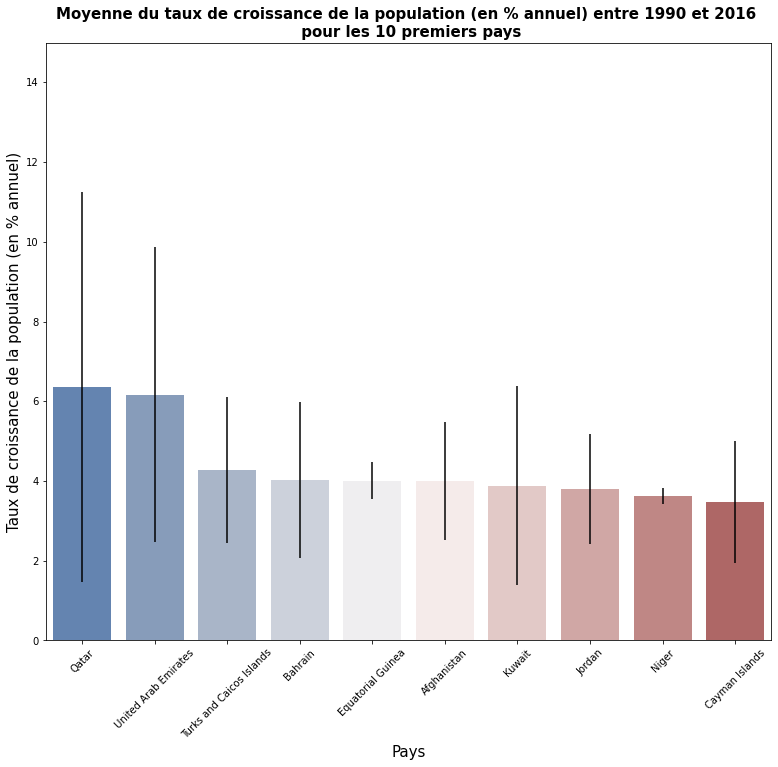

In [210]:
#On va d'abord essayer de représenter visuellement nos données
x = data_pop_Region_nettoye['Country Name'].head(10)
y = data_pop_Region_nettoye['Moyenne'].head(10)

plt.figure(figsize = (13,11))

plt.bar(x, y, yerr = data_pop_Region_nettoye['Ecart-type'].head(10), ecolor = 'black')
ax = sns.barplot(x, y, data = data_pop_Region_nettoye, palette = 'vlag')

#plt.legend(loc=2)
plt.xticks(rotation = 45)
ax.set_xlabel('Pays', fontsize = 15)
ax.set_title('Moyenne du taux de croissance de la population (en % annuel) entre 1990 et 2016 \n pour les 10 premiers pays', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Taux de croissance de la population (en % annuel)', fontsize = 15)
plt.ylim(0, 15) #Pour se fixer les mêmes limites d'axes et mieux visualiser les données.  

plt.savefig('indicateur_pop_moyenne_Pays.png')
plt.show()

In [211]:
#On récupère notre df contenant les pays dont le taux de remplissage est > 85% et dont on n'a gardé uniquement les "vrais" pays.
Country_pop_10 = data_pop_Region_nettoye.head(10) #10 premiers pays

display(Country_pop_10.groupby('Region').size()) #On compte le nombre de fois qu'apparait une région.

Region
Latin America & Caribbean     2
Middle East & North Africa    5
South Asia                    1
Sub-Saharan Africa            2
dtype: int64

#### Il est difficile d'en ressortir quelque chose, mis à part certaines régions, aucun pays ne ressort nettement en effectuant une analyse par région. 


#### Etant donné que nous observons, selon la période de temps choisie, des différences dans le résultat final, dues à la variabilité plus ou moins importante des indicateurs selon les pays, on va maintenant se concentrer sur une année. 

#### Nous allons d'abord récupérer le taux de remplissage de nos indicateurs sélectionnés sur une période récente : 2010-2016 pour savoir quelle année nous allons choisir.

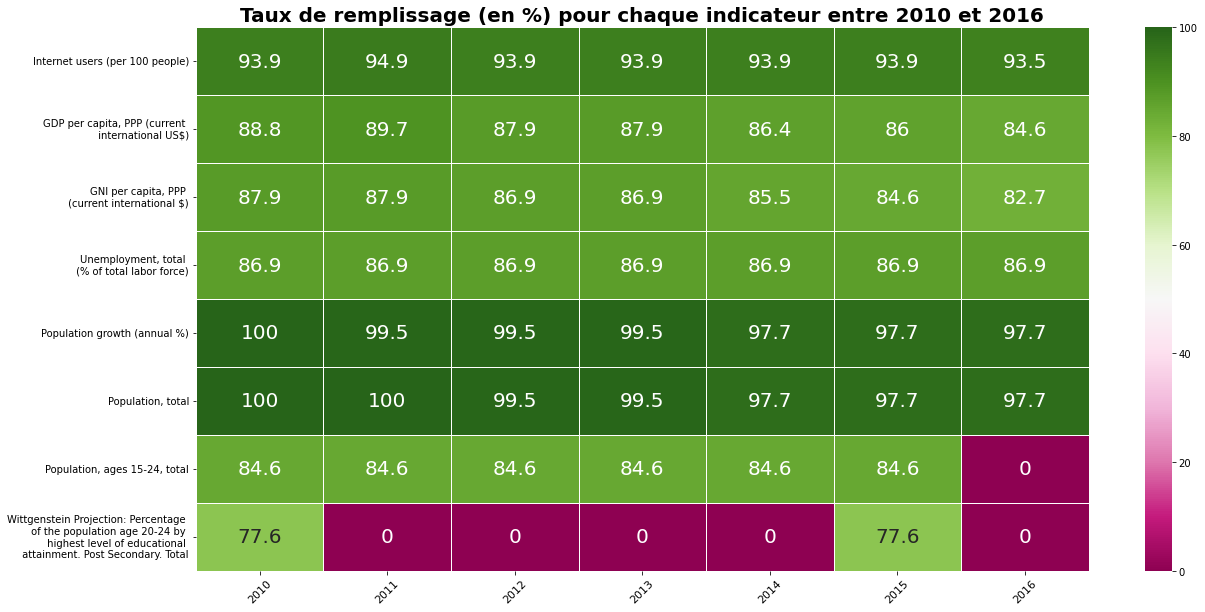

In [212]:
datainternet_recent = datainternet_tauxremplis.loc[:, '2010':'2016']
dataGDP_recent = dataGDP_tauxremplis.loc[:, '2010':'2016']
dataGNI_recent = dataGNI_tauxremplis.loc[:, '2010':'2016']
dataunemploy_recent = dataunemploy_tauxremplis.loc[:, '2010':'2016']
datapop_recent = datapop_tauxremplis.loc[:, '2010':'2016']
datapopulation_recent = datapopulation_tauxremplis.loc[:, '2010':'2016']
datapop_15_24_recent = datapop_15_24_tauxremplis.loc[:, '2010':'2016']
dataproj_recent = dataproj_tauxremplis.loc[:, '2010':'2016']

taux_remplis_recent = pd.concat([datainternet_recent, dataGDP_recent, dataGNI_recent, dataunemploy_recent, datapop_recent,
                                datapopulation_recent, datapop_15_24_recent, dataproj_recent], axis = 0)

#On effectue notre heatmap pour nos indicateurs. 
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(taux_remplis_recent, annot = True, annot_kws={'size': 20}, cmap="PiYG", fmt = '.3g', linewidth = .5)
plt.title('Taux de remplissage (en %) pour chaque indicateur entre 2010 et 2016', size = 20, fontweight = 'bold')
plt.yticks(size = 10)
plt.xticks(rotation = 45, size = 11)

plt.savefig('Heatmap_taux_remplissage_recent.png')
plt.show()

# Etude sur une année : 2015

### Nous allons nous concentrer sur l'années 2015 (récente et fort taux de remplissage) et reprendre nos 4 indicateurs.

In [213]:
#On reprend notre fichier de données "Data" où on ne garde que l'années 2015 pour tous les indicateurs et pays

data = pd.read_csv('EdStatsData.csv')
data_2015_2100 = data.drop(data.loc[:, '1970':'2014'].columns, axis=1)
data_2015 = data_2015_2100.drop(data_2015_2100.loc[:, '2016':'Unnamed: 69'].columns, axis=1)
data_2015.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  2015  
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   NaN  
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   NaN  
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   NaN  
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   NaN  
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   NaN

### Nous allons d'abord regarder quels sont les pays pour lesquels nous n'avons pas de données pour 2015 et les retirer s'ils ne sont pas pertinents. 

In [214]:
#On va supprimer ce qui ne correspond pas à des pays.
#Pour cela on va récupérer notre fichier "Country" et joindre à notre df de données, les régions. 
data_2015
data_2015.loc[data_2015['Indicator Name'] == 'GDP per capita, PPP (current international $)', 'Indicator Code'] #On recherche le code correspondant à notre indicateur PIB
data_2015.loc[data_2015['Indicator Name'] == 'Internet users (per 100 people)', 'Indicator Code'] #On recherche le code correspondant à notre indicateur internet
data_2015.loc[data_2015['Indicator Name'] == 'Unemployment, total (% of total labor force)', 'Indicator Code'] #On recherche le code correspondant à notre indicateur chomage
data_2015.loc[data_2015['Indicator Name'] == 'Population growth (annual %)', 'Indicator Code'] #On recherche le code correspondant à notre indicateur population

indicateurs = ['NY.GDP.PCAP.PP.CD', 'IT.NET.USER.P2', 'SL.UEM.TOTL.ZS', 'SP.POP.GROW']
data_2015_indicators = data_2015.loc[data_2015['Indicator Code'].isin(indicateurs), :] #Sélection lignes dont valeur de colonne présente dans notre liste

data_2015_country_indicators = pd.merge(data_2015_indicators, dataCountry_new, on = "Country Code", how = 'left')

#On va supprimer les lignes dont nous n'avons pas de données pour les régions. 
data_2015_country_new = data_2015_country_indicators.dropna(axis=0, subset= 'Region')

#Ensuite on regarde quels sont les pays qui n'ont pas de données pour au moins 1 indicateur (sur 5) pour l'année 2015
pays_2015_null = data_2015_country_new[data_2015_country_new['2015'].isnull()] 
pays_2015_null_unique = pays_2015_null.drop_duplicates(subset='Country Name') #On supprime les valeurs dupliquées pour n'avoir que des valeurs de pays uniques. 
display(pays_2015_null_unique)
display(pays_2015_null_unique.shape)

Country Name Country Code  \
112             American Samoa          ASM   
116                    Andorra          AND   
127        Antigua and Barbuda          ATG   
136                      Aruba          ABW   
184                    Bermuda          BMU   
244             Cayman Islands          CYM   
256            Channel Islands          CHI   
296                       Cuba          CUB   
300                    Curacao          CUW   
323                   Dominica          DMA   
344                    Eritrea          ERI   
356              Faroe Islands          FRO   
372           French Polynesia          PYF   
404                  Greenland          GRL   
411                    Grenada          GRD   
412                       Guam          GUM   
472                Isle of Man          IMN   
507                   Kiribati          KIR   
508  Korea, Dem. People’s Rep.          PRK   
517                     Kosovo          XKX   
548                      Libya          LBY   
552              Liechtenstein          LIE   
599           Marshall Islands          MHL   
615      Micronesia, Fed. Sts.          FSM   
620                     Monaco          MCO   
660              New Caledonia          NCL   
680   Northern Mariana Islands          MNP   
697                      Palau          PLW   
728                Puerto Rico          PRI   
753                 San Marino          SMR   
775                 Seychelles          SYC   
784  Sint Maarten (Dutch part)          SXM   
800                    Somalia          SOM   
808                South Sudan          SSD   
823        St. Kitts and Nevis          KNA   
828   St. Martin (French part)          MAF   
856       Syrian Arab Republic          SYR   
900   Turks and Caicos Islands          TCA   
907                     Tuvalu          TUV   
940              Venezuela, RB          VEN   
948      Virgin Islands (U.S.)          VIR   
952         West Bank and Gaza          PSE   

                                    Indicator Name     Indicator Code  2015  \
112  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
116  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
127   Unemployment, total (% of total labor force)     SL.UEM.TOTL.ZS   NaN   
136  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
184  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
244  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
256  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
296  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
300  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
323   Unemployment, total (% of total labor force)     SL.UEM.TOTL.ZS   NaN   
344  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
356  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
372  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
404  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
411   Unemployment, total (% of total labor force)     SL.UEM.TOTL.ZS   NaN   
412  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
472  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
507   Unemployment, total (% of total labor force)     SL.UEM.TOTL.ZS   NaN   
508  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
517                Internet users (per 100 people)     IT.NET.USER.P2   NaN   
548  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
552  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
599   Unemployment, total (% of total labor force)     SL.UEM.TOTL.ZS   NaN   
615   Unemployment, total (% of total labor force)     SL.UEM.TOTL.ZS   NaN   
620  GDP per capita, 

(42, 6)

##### Beaucoup de pays, pour éviter de tous les retirer de nos analyses, on va les filtrer en fonction de leur population. 

In [215]:
#On va récupérer notre fichier contenant les données de population pour 2015
data_population_pays_2015_2100 = datapopulation_pays.drop(datapopulation_pays.loc[:, 'Country Code':'2014'].columns, axis=1)
data_population_pays_2015 = data_population_pays_2015_2100.drop(data_population_pays_2015_2100.loc[:, '2016':'Region'].columns, axis=1)
data_population_pays_2015 #Fichier concernant la population totale comportant nos noms de pays et notre année "2015"

#On va fusionner notre fichier avec les pays dont il manquait au moins 1 indicateur sur 5. 
pays_2015_null_pop = pd.merge(pays_2015_null_unique, data_population_pays_2015, on = "Country Name", how = 'left')
pays_2015_null_pop

#On va effectuer un classement des données dans l'ordre décroissant pour observer quels sont les pays avec les plus fortes populations.
pays_2015_null_pop.sort_values(by = '2015_y', ascending = False)

#On va sélectionner les pays pour dont la population est inférieure à 10 millions d'habitants (ceux à retirer de l'analyse). 
pays_2015_null_pop_na = pays_2015_null_pop.dropna(axis=0, subset= '2015_y')# On supprime les pays dont on n'a pas de données pour la population.
pays_2015_null_pop_na
pays_2015_null_pop_10m = pays_2015_null_pop_na.loc[pays_2015_null_pop_na['2015_y'] < 10000000, :]
display(pays_2015_null_pop_10m)

display(pays_2015_null_pop_10m.shape)

#On va placer ces nouveaux pays (pop < 10 000 000 et données manquantes > 1 indicateur) dans une liste.
liste_pays_null = pays_2015_null_pop_10m['Country Name'].tolist()

#Cette liste correspond aux pays que l'on va retirer de nos analyses suivantes (non pertinents)
data_2015_Country = data_2015_country_new[~data_2015_country_new['Country Name'].isin(liste_pays_null)] #On sélectionne les pays qui ne font pas partie de la liste
data_2015_Country

Country Name Country Code  \
0             American Samoa          ASM   
1                    Andorra          AND   
2        Antigua and Barbuda          ATG   
3                      Aruba          ABW   
4                    Bermuda          BMU   
5             Cayman Islands          CYM   
6            Channel Islands          CHI   
9                   Dominica          DMA   
11             Faroe Islands          FRO   
12          French Polynesia          PYF   
13                 Greenland          GRL   
14                   Grenada          GRD   
15                      Guam          GUM   
16               Isle of Man          IMN   
17                  Kiribati          KIR   
19                    Kosovo          XKX   
20                     Libya          LBY   
21             Liechtenstein          LIE   
22          Marshall Islands          MHL   
23     Micronesia, Fed. Sts.          FSM   
24                    Monaco          MCO   
25             New Caledonia          NCL   
26  Northern Mariana Islands          MNP   
27                     Palau          PLW   
28               Puerto Rico          PRI   
29                San Marino          SMR   
30                Seychelles          SYC   
34       St. Kitts and Nevis          KNA   
37  Turks and Caicos Islands          TCA   
38                    Tuvalu          TUV   
40     Virgin Islands (U.S.)          VIR   
41        West Bank and Gaza          PSE   

                                   Indicator Name     Indicator Code  2015_x  \
0   GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD     NaN   
1   GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD     NaN   
2    Unemployment, total (% of total labor force)     SL.UEM.TOTL.ZS     NaN   
3   GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD     NaN   
4   GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD     NaN   
5   GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD     NaN   
6   GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD     NaN   
9    Unemployment, total (% of total labor force)     SL.UEM.TOTL.ZS     NaN   
11  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD     NaN   
12  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD     NaN   
13  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD     NaN   
14   Unemployment, total (% of total labor force)     SL.UEM.TOTL.ZS     NaN   
15  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD     NaN   
16  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD     NaN   
17   Unemployment, total (% of total labor force)     SL.UEM.TOTL.ZS     NaN   
19                Internet users (per 100 people)     IT.NET.USER.P2     NaN   
20  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD     NaN   
21  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD     NaN   
22   Unemployment, total (% of total labor force)     SL.UEM.TOTL.ZS     NaN   
23   Unemployment, total (% of total labor force)     SL.UEM.TOTL.ZS     NaN   
24  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD     NaN   
25  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD     NaN   
26  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD     NaN   
27                Internet users (per 100 people)     IT.NET.USER.P2     NaN   
28  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD     NaN   
29                Internet users (per 100 people)     IT.NET.USER.P2     NaN   
30   Unemployment, total (% of total labor force)     SL.UEM.TOTL.ZS     NaN   
34   Unemployment, total (% of total labor force)     SL.UEM.TOTL.ZS     NaN   
37  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD     NaN   
38   Unemployment, total (% of total labor force)     SL.UEM.TOTL.ZS     NaN   
40  GDP per capita, PPP (current international $) 

(32, 7)

Country Name Country Code                                 Indicator Name  \
100  Afghanistan          AFG  GDP per capita, PPP (current international $)   
101  Afghanistan          AFG                Internet users (per 100 people)   
102  Afghanistan          AFG                   Population growth (annual %)   
103  Afghanistan          AFG   Unemployment, total (% of total labor force)   
104      Albania          ALB  GDP per capita, PPP (current international $)   
..           ...          ...                                            ...   
963       Zambia          ZMB   Unemployment, total (% of total labor force)   
964     Zimbabwe          ZWE  GDP per capita, PPP (current international $)   
965     Zimbabwe          ZWE                Internet users (per 100 people)   
966     Zimbabwe          ZWE                   Population growth (annual %)   
967     Zimbabwe          ZWE   Unemployment, total (% of total labor force)   

        Indicator Code          2015                 Region  
100  NY.GDP.PCAP.PP.CD   1864.973641             South Asia  
101     IT.NET.USER.P2      8.260000             South Asia  
102        SP.POP.GROW      2.943234             South Asia  
103     SL.UEM.TOTL.ZS      8.600000             South Asia  
104  NY.GDP.PCAP.PP.CD  11449.094589  Europe & Central Asia  
..                 ...           ...                    ...  
963     SL.UEM.TOTL.ZS      7.700000     Sub-Saharan Africa  
964  NY.GDP.PCAP.PP.CD   2040.272449     Sub-Saharan Africa  
965     IT.NET.USER.P2     22.742818     Sub-Saharan Africa  
966        SP.POP.GROW      2.345643     Sub-Saharan Africa  
967     SL.UEM.TOTL.ZS      5.100000     Sub-Saharan Africa  

[728 rows x 6 columns]

### 1) Indicateur PIB par habitant, PPA (en $ internationaux)

In [216]:
#On va sélectionner notre indicateur 
data_2015_country_GDP = data_2015_Country.loc[data_2015_Country['Indicator Name'] == 'GDP per capita, PPP (current international $)', :]
data_2015_country_GDP.head()

Country Name Country Code                                 Indicator Name  \
100  Afghanistan          AFG  GDP per capita, PPP (current international $)   
104      Albania          ALB  GDP per capita, PPP (current international $)   
108      Algeria          DZA  GDP per capita, PPP (current international $)   
120       Angola          AGO  GDP per capita, PPP (current international $)   
128    Argentina          ARG  GDP per capita, PPP (current international $)   

        Indicator Code          2015                      Region  
100  NY.GDP.PCAP.PP.CD   1864.973641                  South Asia  
104  NY.GDP.PCAP.PP.CD  11449.094589       Europe & Central Asia  
108  NY.GDP.PCAP.PP.CD  14643.343064  Middle East & North Africa  
120  NY.GDP.PCAP.PP.CD   6648.124016          Sub-Saharan Africa  
128  NY.GDP.PCAP.PP.CD  20379.779854   Latin America & Caribbean

In [217]:
#On va faire un describe sur notre df pour obtenir les ordres de grandeurs. 
data_2015_country_GDP.describe()

2015
count     172.000000
mean    19861.606943
std     22099.843361
min       668.337622
25%      4061.473630
50%     11988.997278
75%     27376.694191
max    127764.462337

In [218]:
#Si nous classons dans l'ordre décroissant
data_2015_GDP_tri = data_2015_country_GDP.sort_values(by = '2015', ascending = False).head(10)
data_2015_GDP_tri

Country Name Country Code  \
732                 Qatar          QAT   
564      Macao SAR, China          MAC   
560            Luxembourg          LUX   
780             Singapore          SGP   
212     Brunei Darussalam          BRN   
520                Kuwait          KWT   
916  United Arab Emirates          ARE   
468               Ireland          IRL   
852           Switzerland          CHE   
684                Norway          NOR   

                                    Indicator Name     Indicator Code  \
732  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
564  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
560  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
780  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
212  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
520  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
916  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
468  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
852  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
684  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   

              2015                      Region  
732  127764.462337  Middle East & North Africa  
564  107245.639439         East Asia & Pacific  
560  103732.639291       Europe & Central Asia  
780   86306.308913         East Asia & Pacific  
212   79593.280721         East Asia & Pacific  
520   73059.562442  Middle East & North Africa  
916   70391.220127  Middle East & North Africa  
468   69627.540930       Europe & Central Asia  
852   63291.538276       Europe & Central Asia  
684   62066.808188       Europe & Central Asia

In [219]:
#Nous allons calculer une valeur seuil pour laquelle nous allons sélectionner les pays dont leur valeur est au-dessus. 
seuil_GDP_2015 = data_2015_country_GDP['2015'].mean()
print('La valeur seuil pour l\'indicateur "GDP, PPA (current international $)" est de', format(seuil_GDP_2015, '.1e'), '$')

La valeur seuil pour l'indicateur "GDP, PPA (current international $)" est de 2.0e+04 $


### 2) Indicateur Utilisateurs d'internet (%)

In [220]:
#On va sélectionner notre indicateur 
data_2015_country_internet = data_2015_Country.loc[data_2015_Country['Indicator Name'] == 'Internet users (per 100 people)', :]
data_2015_country_internet.head()

Country Name Country Code                   Indicator Name  \
101  Afghanistan          AFG  Internet users (per 100 people)   
105      Albania          ALB  Internet users (per 100 people)   
109      Algeria          DZA  Internet users (per 100 people)   
121       Angola          AGO  Internet users (per 100 people)   
129    Argentina          ARG  Internet users (per 100 people)   

     Indicator Code       2015                      Region  
101  IT.NET.USER.P2   8.260000                  South Asia  
105  IT.NET.USER.P2  63.252933       Europe & Central Asia  
109  IT.NET.USER.P2  38.200000  Middle East & North Africa  
121  IT.NET.USER.P2  12.400000          Sub-Saharan Africa  
129  IT.NET.USER.P2  68.043064   Latin America & Caribbean

In [221]:
#Si nous classons dans l'ordre décroissant
data_2015_internet_tri = data_2015_country_internet.sort_values(by = '2015', ascending = False).head(10)
data_2015_internet_tri

Country Name Country Code                   Indicator Name  \
449         Iceland          ISL  Internet users (per 100 people)   
561      Luxembourg          LUX  Internet users (per 100 people)   
685          Norway          NOR  Internet users (per 100 people)   
313         Denmark          DNK  Internet users (per 100 people)   
157         Bahrain          BHR  Internet users (per 100 people)   
733           Qatar          QAT  Internet users (per 100 people)   
921  United Kingdom          GBR  Internet users (per 100 people)   
657     Netherlands          NLD  Internet users (per 100 people)   
489           Japan          JPN  Internet users (per 100 people)   
849          Sweden          SWE  Internet users (per 100 people)   

     Indicator Code       2015                      Region  
449  IT.NET.USER.P2  98.200000       Europe & Central Asia  
561  IT.NET.USER.P2  97.334100       Europe & Central Asia  
685  IT.NET.USER.P2  96.810300       Europe & Central Asia  
313  IT.NET.USER.P2  96.330500       Europe & Central Asia  
157  IT.NET.USER.P2  93.478301  Middle East & North Africa  
733  IT.NET.USER.P2  92.884826  Middle East & North Africa  
921  IT.NET.USER.P2  92.000300       Europe & Central Asia  
657  IT.NET.USER.P2  91.724138       Europe & Central Asia  
489  IT.NET.USER.P2  91.058028         East Asia & Pacific  
849  IT.NET.USER.P2  90.610200       Europe & Central Asia

In [222]:
data_2015_country_internet.describe()

2015
count  177.000000
mean    46.584955
std     28.286887
min      1.083733
25%     21.320000
50%     47.569760
75%     71.200000
max     98.200000

In [223]:
#Nous allons calculer une valeur seuil pour laquelle nous allons sélectionner les pays dont leur valeur est au-dessus. 

seuil_internet_2015 = data_2015_country_internet['2015'].mean()
print('La valeur seuil pour l\'indicateur "Internet users (per 100 people)" est de', round(seuil_internet_2015, 2), '%')

La valeur seuil pour l'indicateur "Internet users (per 100 people)" est de 46.58 %


### 3) Indicateur taux de chômage (% de la population active totale)

In [224]:
#On va sélectionner notre indicateur 
data_2015_country_chomage = data_2015_Country.loc[data_2015_Country['Indicator Name'] == 'Unemployment, total (% of total labor force)', :]
data_2015_country_chomage.head()

Country Name Country Code                                Indicator Name  \
103  Afghanistan          AFG  Unemployment, total (% of total labor force)   
107      Albania          ALB  Unemployment, total (% of total labor force)   
111      Algeria          DZA  Unemployment, total (% of total labor force)   
123       Angola          AGO  Unemployment, total (% of total labor force)   
131    Argentina          ARG  Unemployment, total (% of total labor force)   

     Indicator Code  2015                      Region  
103  SL.UEM.TOTL.ZS   8.6                  South Asia  
107  SL.UEM.TOTL.ZS  17.1       Europe & Central Asia  
111  SL.UEM.TOTL.ZS  11.2  Middle East & North Africa  
123  SL.UEM.TOTL.ZS   6.2          Sub-Saharan Africa  
131  SL.UEM.TOTL.ZS   7.2   Latin America & Caribbean

In [225]:
#Si nous classons dans l'ordre décroissant
data_2015_chomage_tri = data_2015_country_chomage.sort_values(by = '2015', ascending = False).head(10)
data_2015_chomage_tri

Country Name Country Code  \
799         Solomon Islands          SLB   
383             Gambia, The          GMB   
543                 Lesotho          LSO   
199  Bosnia and Herzegovina          BIH   
847               Swaziland          SWZ   
571          Macedonia, FYR          MKD   
639              Mozambique          MOZ   
807            South Africa          ZAF   
403                  Greece          GRC   
827               St. Lucia          LCA   

                                   Indicator Name  Indicator Code       2015  \
799  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS  31.299999   
383  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS  29.700001   
543  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS  26.799999   
199  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS  26.299999   
847  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS  26.200001   
571  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS  26.100000   
639  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS  25.299999   
807  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS  25.200001   
403  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS  24.900000   
827  Unemployment, total (% of total labor force)  SL.UEM.TOTL.ZS  24.100000   

                        Region  
799        East Asia & Pacific  
383         Sub-Saharan Africa  
543         Sub-Saharan Africa  
199      Europe & Central Asia  
847         Sub-Saharan Africa  
571      Europe & Central Asia  
639         Sub-Saharan Africa  
807         Sub-Saharan Africa  
403      Europe & Central Asia  
827  Latin America & Caribbean

In [226]:
data_2015_country_chomage.describe()

2015
count  178.000000
mean     8.592135
std      6.300565
min      0.100000
25%      4.500000
50%      6.550000
75%     10.750000
max     31.299999

In [227]:
#Nous allons calculer une valeur seuil pour laquelle nous allons sélectionner les pays dont leur valeur est au-dessus. 

seuil_chomage_2015 = data_2015_country_chomage['2015'].mean()
print('La valeur seuil pour l\'indicateur "Unemployment, total (% of total labor force)" est de', round(seuil_chomage_2015, 2), '%')

La valeur seuil pour l'indicateur "Unemployment, total (% of total labor force)" est de 8.59 %


### 4) Croissance de la population (% annuel)

In [228]:
#On va sélectionner notre indicateur 
data_2015_country_pop = data_2015_Country.loc[data_2015_Country['Indicator Name'] == 'Population growth (annual %)', :]
data_2015_country_pop.head()

Country Name Country Code                Indicator Name Indicator Code  \
102  Afghanistan          AFG  Population growth (annual %)    SP.POP.GROW   
106      Albania          ALB  Population growth (annual %)    SP.POP.GROW   
110      Algeria          DZA  Population growth (annual %)    SP.POP.GROW   
122       Angola          AGO  Population growth (annual %)    SP.POP.GROW   
130    Argentina          ARG  Population growth (annual %)    SP.POP.GROW   

         2015                      Region  
102  2.943234                  South Asia  
106 -0.291206       Europe & Central Asia  
110  1.919959  Middle East & North Africa  
122  3.428021          Sub-Saharan Africa  
130  1.009855   Latin America & Caribbean

In [229]:
#Si nous classons dans l'ordre décroissant
data_2015_pop_tri = data_2015_country_pop.sort_values(by = '2015', ascending = False).head(10)
data_2015_pop_tri

Country Name Country Code                Indicator Name  \
690               Oman          OMN  Population growth (annual %)   
734              Qatar          QAT  Population growth (annual %)   
538            Lebanon          LBN  Population growth (annual %)   
342  Equatorial Guinea          GNQ  Population growth (annual %)   
522             Kuwait          KWT  Population growth (annual %)   
494             Jordan          JOR  Population growth (annual %)   
674              Niger          NER  Population growth (annual %)   
122             Angola          AGO  Population growth (annual %)   
910             Uganda          UGA  Population growth (annual %)   
278   Congo, Dem. Rep.          COD  Population growth (annual %)   

    Indicator Code      2015                      Region  
690    SP.POP.GROW  5.856170  Middle East & North Africa  
734    SP.POP.GROW  4.412616  Middle East & North Africa  
538    SP.POP.GROW  4.334249  Middle East & North Africa  
342    SP.POP.GROW  3.989139          Sub-Saharan Africa  
522    SP.POP.GROW  3.974069  Middle East & North Africa  
494    SP.POP.GROW  3.896131  Middle East & North Africa  
674    SP.POP.GROW  3.835750          Sub-Saharan Africa  
122    SP.POP.GROW  3.428021          Sub-Saharan Africa  
910    SP.POP.GROW  3.321556          Sub-Saharan Africa  
278    SP.POP.GROW  3.300416          Sub-Saharan Africa

In [230]:
data_2015_country_pop.describe()

2015
count  177.000000
mean     1.439933
std      1.228595
min     -2.467847
25%      0.548680
50%      1.311980
75%      2.345643
max      5.856170

In [231]:
#Nous allons calculer une valeur seuil pour laquelle nous allons sélectionner les pays dont leur valeur est au-dessus. 

seuil_pop_2015 = data_2015_country_pop['2015'].mean()
print('La valeur seuil pour l\'indicateur "Population growth (annual %)" est de', round(seuil_pop_2015, 2), '%')

La valeur seuil pour l'indicateur "Population growth (annual %)" est de 1.44 %


### Nous allons maintenant chercher les pays qui font partie de ces indicateurs. 

In [232]:
#On va rassembler nos df 
concat_country_2015 = pd.concat([data_2015_country_GDP, data_2015_country_internet, data_2015_country_chomage,
           data_2015_country_pop])
display(concat_country_2015.head())

#On sélectionne les lignes qui nous intéressent
internet_2015 = concat_country_2015.loc[concat_country_2015['Indicator Name'] == 'Internet users (per 100 people)', :]
chomage_2015 = concat_country_2015.loc[concat_country_2015['Indicator Name'] == 'Unemployment, total (% of total labor force)', :]
GDP_2015 = concat_country_2015.loc[concat_country_2015['Indicator Name'] == 'GDP per capita, PPP (current international $)', :]
pop_2015 = concat_country_2015.loc[concat_country_2015['Indicator Name'] == 'Population growth (annual %)', :]

pays_internet_2015 = internet_2015[internet_2015['2015'] > seuil_internet_2015]
pays_chomage_2015 = chomage_2015[chomage_2015['2015'] > seuil_chomage_2015]
pays_GDP_2015 = GDP_2015[GDP_2015['2015'] > seuil_GDP_2015]
pays_pop_2015 = pop_2015[pop_2015['2015'] > seuil_pop_2015]

#On va concaténer ces 5 nouveaux df créés 

pays_concat_2015 = pd.concat([pays_internet_2015, pays_chomage_2015, pays_GDP_2015, pays_pop_2015])

#On va ensuite compter combien de fois on retrouve chaque Pays. 
#Si un pays apparaît 5 fois, alors on le sélectionne. 
#On va créer une colonne qui compte le nombre de fois qu'apparaît le nom de son pays. 

occur_2015 = pays_concat_2015['Country Name'].value_counts()
occur_2015

Country Name Country Code                                 Indicator Name  \
100  Afghanistan          AFG  GDP per capita, PPP (current international $)   
104      Albania          ALB  GDP per capita, PPP (current international $)   
108      Algeria          DZA  GDP per capita, PPP (current international $)   
120       Angola          AGO  GDP per capita, PPP (current international $)   
128    Argentina          ARG  GDP per capita, PPP (current international $)   

        Indicator Code          2015                      Region  
100  NY.GDP.PCAP.PP.CD   1864.973641                  South Asia  
104  NY.GDP.PCAP.PP.CD  11449.094589       Europe & Central Asia  
108  NY.GDP.PCAP.PP.CD  14643.343064  Middle East & North Africa  
120  NY.GDP.PCAP.PP.CD   6648.124016          Sub-Saharan Africa  
128  NY.GDP.PCAP.PP.CD  20379.779854   Latin America & Caribbean

Turkey          4
Oman            4
Jordan          3
Croatia         3
Cyprus          3
               ..
Burkina Faso    1
Burundi         1
Cambodia        1
Cameroon        1
Zimbabwe        1
Name: Country Name, Length: 159, dtype: int64

### Etant donné que l'indicateur concernant la croissance de population ne semble pas pertinent pour notre étude, on va l'enlever

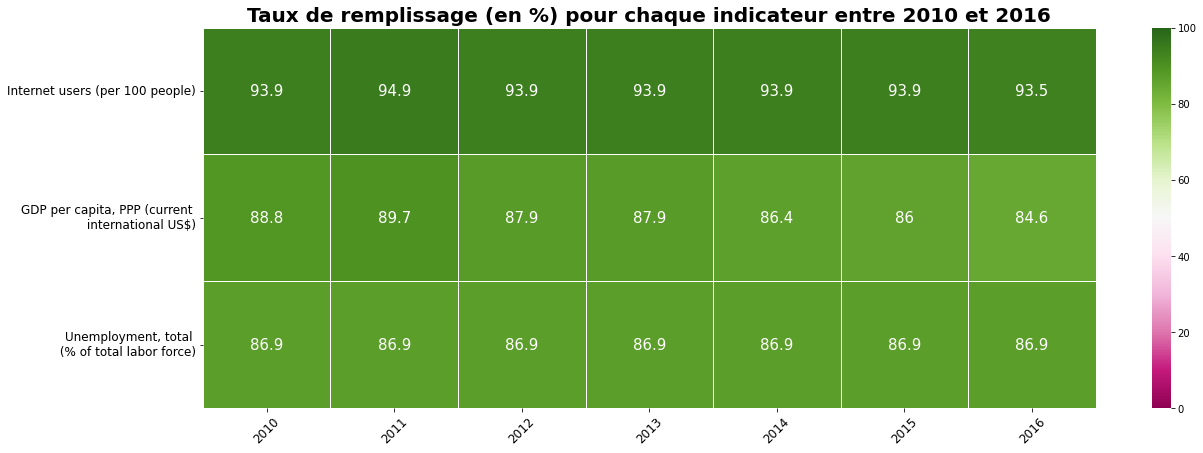

In [233]:
taux_remplis_recent = pd.concat([datainternet_recent, dataGDP_recent, dataunemploy_recent], axis = 0)

#On effectue notre heatmap pour nos indicateurs. 
plt.figure(figsize=(20,7))
heatmap = sns.heatmap(taux_remplis_recent, annot = True, annot_kws={'size': 15}, cmap="PiYG", fmt = '.3g', linewidth = .5, 
                      vmin = 0, vmax = 100)
plt.title('Taux de remplissage (en %) pour chaque indicateur entre 2010 et 2016', size = 20, fontweight = 'bold')
plt.yticks(size = 12)
plt.xticks(rotation = 45, size = 12)

plt.savefig('Heatmap_taux_remplissage_3_indicateurs.png')
plt.show()

In [234]:
pays_concat_2015_3 = pd.concat([pays_internet_2015, pays_chomage_2015, pays_GDP_2015])

occur_2015_3 = pays_concat_2015_3['Country Name'].value_counts()
occur_2015_3

#occur_2015_4.to_csv('Occurrence_2015_4.csv', sep = ';')

Lithuania            3
Italy                3
France               3
Oman                 3
Cyprus               3
                    ..
Congo, Rep.          1
Cote d'Ivoire        1
Egypt, Arab Rep.     1
Fiji                 1
Equatorial Guinea    1
Name: Country Name, Length: 124, dtype: int64

In [235]:
##On va essayer de faire un arbre de décision

#On récupère les pays dont l'indicateur internet est supérieur au seuil calculé.
Country_internet_2015 = internet_2015[internet_2015['2015'] > seuil_internet_2015]
Country_internet_2015 = Country_internet_2015.loc[:, 'Country Code'] #On ne garde que les Country Code
Country_internet_2015

#On va rattacher ce nouveau df contenant uniquement les pays de l'indicateur "internet" et leur code à notre nouvel indicateur.
Country_internet_chomage_2015 = pd.merge(Country_internet_2015, chomage_2015, on = 'Country Code', how = 'inner') #On garde les pays de notre df "internet" ET de notre nouveau df (donc supprime les lignes aux valeurs manquantes).
Country_internet_chomage_2015

#Parmis les pays sélectionnés, on va maintenant récupérer ceux supérieurs au seuil calculé pour l'indicateur "chomage"
Country_chomage_2015 = Country_internet_chomage_2015[Country_internet_chomage_2015['2015'] > seuil_chomage_2015]
Country_chomage_2015 = Country_chomage_2015.loc[:, 'Country Code'] #On ne garde que les Country Code
Country_chomage_2015

#On va rattacher notre nouveau df contenant les pays de l'indicateur "internet" et "chomage" à notre nouvel indicateur
Country_internet_chomage_PIB_2015 = pd.merge(Country_chomage_2015, GDP_2015, on = 'Country Code', how = 'inner') #On garde les pays de notre df rassemblant "internet" et "scolarsation" ET notre nouveau df (donc supprime les lignes aux valeurs manquantes)
Country_internet_chomage_PIB_2015

#Parmis les pays sélectionnés, on va maintenant récupérer ceux supérieurs au seuil calculé pour l'indicateur "PIB"
Country_PIB_2015 = Country_internet_chomage_PIB_2015[Country_internet_chomage_PIB_2015['2015'] > seuil_GDP_2015]
display(Country_PIB_2015)

Country Code     Country Name  \
2           BHS     Bahamas, The   
9           HRV          Croatia   
10          CYP           Cyprus   
12          FIN          Finland   
13          FRA           France   
15          GRC           Greece   
16          IRL          Ireland   
17          ITA            Italy   
19          LVA           Latvia   
20          LTU        Lithuania   
24          OMN             Oman   
25          PRT         Portugal   
27          SVK  Slovak Republic   
28          SVN         Slovenia   
30          ESP            Spain   
33          TUR           Turkey   

                                   Indicator Name     Indicator Code  \
2   GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
9   GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
10  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
12  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
13  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
15  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
16  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
17  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
19  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
20  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
24  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
25  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
27  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
28  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
30  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
33  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   

            2015                      Region  
2   22492.107263   Latin America & Caribbean  
9   22602.188383       Europe & Central Asia  
10  31539.526826       Europe & Central Asia  
12  42289.364567       Europe & Central Asia  
13  41178.141819       Europe & Central Asia  
15  26450.131614       Europe & Central Asia  
16  69627.540930       Europe & Central Asia  
17  37407.163565       Europe & Central Asia  
19  24903.983082       Europe & Central Asia  
20  28936.273634       Europe & Central Asia  
24  42825.520327  Middle East & North Africa  
25  29738.188778       Europe & Central Asia  
27  29987.194152       Europe & Central Asia  
28  32185.612900       Europe & Central Asia  
30  34836.942239       Europe & Central Asia  
33  24065.677860       Europe & Central Asia

#### On retrouve la même chose que pour notre première méthode. Donc un arbre de décision n'est pas essentiel. 
#### D'autant plus qu'il demande à classer les indicateurs par ordre d'importance. 

### Autre méthode de sélection : on va effectuer un classement selon un score pour nous aider à la sélection

### On va normaliser nos données pour les avoir sur la même échelle (entre 0 et 1) et établir ensuite un score. 

In [236]:
#Indicateur PIB
data_2015_GDP_pays = data_2015_country_GDP.set_index('Country Name') #On veut garder le nom de nos pays en index

#On va d'abord normaliser nos données. 
GDP_norm= (data_2015_GDP_pays.loc[:, "2015"] - data_2015_GDP_pays.loc[:, "2015"].min()) / (data_2015_GDP_pays.loc[:, "2015"].max() - data_2015_GDP_pays.loc[:, "2015"].min())
GDP_norm = pd.DataFrame(GDP_norm)
GDP_norm = GDP_norm.rename(columns = {'2015' : 'PIB_2015'})
display(round(GDP_norm.describe(), 3))

#Indicateur chomage
data_2015_chomage_pays = data_2015_country_chomage.set_index('Country Name')

chomage_norm = (data_2015_chomage_pays.loc[:, "2015"] - data_2015_chomage_pays.loc[:, "2015"].min()) / (data_2015_chomage_pays.loc[:, "2015"].max() - data_2015_chomage_pays.loc[:, "2015"].min())
chomage_norm = pd.DataFrame(chomage_norm)
chomage_norm = chomage_norm.rename(columns={'2015' : 'Chomage_2015'})

display(round(chomage_norm.describe(), 3))

#Indicateur internet
data_2015_internet_pays = data_2015_country_internet.set_index('Country Name')

internet_norm = (data_2015_internet_pays.loc[:, "2015"] - data_2015_internet_pays.loc[:, "2015"].min()) / (data_2015_internet_pays.loc[:, "2015"].max() - data_2015_internet_pays.loc[:, "2015"].min()) 
internet_norm = pd.DataFrame(internet_norm)
internet_norm = internet_norm.rename(columns={'2015' : 'Internet_2015'})

display(round(internet_norm.describe(), 3))

PIB_2015
count   172.000
mean      0.151
std       0.174
min       0.000
25%       0.027
50%       0.089
75%       0.210
max       1.000

Chomage_2015
count       178.000
mean          0.272
std           0.202
min           0.000
25%           0.141
50%           0.207
75%           0.341
max           1.000

Internet_2015
count        177.000
mean           0.469
std            0.291
min            0.000
25%            0.208
50%            0.479
75%            0.722
max            1.000

In [237]:
#On va créer un score en fonction des valeurs après normalisation

#Indicateur PIB
GDP_norm['score'] = 0
GDP_norm.loc[(GDP_norm['PIB_2015'] >= 0) & (GDP_norm['PIB_2015'] < 0.03), 'score'] = 'Insuffisant'
GDP_norm.loc[(GDP_norm['PIB_2015'] >= 0.03) & (GDP_norm['PIB_2015'] < 0.1), 'score'] = 'Moyen'
GDP_norm.loc[(GDP_norm['PIB_2015'] >= 0.1) & (GDP_norm['PIB_2015'] < 0.2), 'score'] = 'Bien'
GDP_norm.loc[(GDP_norm['PIB_2015'] >= 0.2) & (GDP_norm['PIB_2015'] <= 1), 'score'] = 'Très Bien'

score_GDP = GDP_norm.groupby('score').mean()
display(GDP_norm)

PIB_TB = GDP_norm.loc[GDP_norm['score'] == 'Très Bien', :].reset_index() #On sélectionne uniquement les pays dont le score est "Très bien"

#Indicateur Chomage_2015
chomage_norm['score'] = 0
chomage_norm.loc[(chomage_norm['Chomage_2015'] >= 0) & (chomage_norm['Chomage_2015'] < 0.15), 'score'] = 'Insuffisant'
chomage_norm.loc[(chomage_norm['Chomage_2015'] >= 0.15) & (chomage_norm['Chomage_2015'] < 0.2), 'score'] = 'Moyen'
chomage_norm.loc[(chomage_norm['Chomage_2015'] >= 0.2) & (chomage_norm['Chomage_2015'] < 0.30), 'score'] = 'Bien'
chomage_norm.loc[(chomage_norm['Chomage_2015'] >= 0.30) & (chomage_norm['Chomage_2015'] <= 1), 'score'] = 'Très Bien'

score_chomage = chomage_norm.groupby('score').mean()
display(chomage_norm)

chomage_TB = chomage_norm.loc[chomage_norm['score'] == 'Très Bien', :].reset_index() #On sélectionne uniquement les pays dont le score est "Très bien"

#Indicateur Internet 
internet_norm['score'] = 0
internet_norm.loc[(internet_norm['Internet_2015'] >= 0) & (internet_norm['Internet_2015'] < 0.2), 'score'] = 'Insuffisant'
internet_norm.loc[(internet_norm['Internet_2015'] >= 0.2) & (internet_norm['Internet_2015'] < 0.5), 'score'] = 'Moyen'
internet_norm.loc[(internet_norm['Internet_2015'] >= 0.5) & (internet_norm['Internet_2015'] < 0.75), 'score'] = 'Bien'
internet_norm.loc[(internet_norm['Internet_2015'] >= 0.75) & (internet_norm['Internet_2015'] <= 1), 'score'] = 'Très Bien'

score_internet = internet_norm.groupby('score').mean()
display(internet_norm)

internet_TB = internet_norm.loc[internet_norm['score'] == 'Très Bien', :].reset_index()#On sélectionne uniquement les pays dont le score est "Très bien"


PIB_2015        score
Country Name                        
Afghanistan    0.009415  Insuffisant
Albania        0.084824        Moyen
Algeria        0.109956         Bien
Angola         0.047049        Moyen
Argentina      0.155091         Bien
...                 ...          ...
Venezuela, RB       NaN            0
Vietnam        0.042318        Moyen
Yemen, Rep.    0.016912  Insuffisant
Zambia         0.025191  Insuffisant
Zimbabwe       0.010794  Insuffisant

[182 rows x 2 columns]

Chomage_2015        score
Country Name                            
Afghanistan        0.272436         Bien
Albania            0.544872    Très Bien
Algeria            0.355769    Très Bien
Angola             0.195513        Moyen
Argentina          0.227564         Bien
...                     ...          ...
Venezuela, RB      0.214744         Bien
Vietnam            0.064103  Insuffisant
Yemen, Rep.        0.532051    Très Bien
Zambia             0.243590         Bien
Zimbabwe           0.160256        Moyen

[182 rows x 2 columns]

Internet_2015        score
Country Name                             
Afghanistan         0.073894  Insuffisant
Albania             0.640152         Bien
Algeria             0.382184        Moyen
Angola              0.116523  Insuffisant
Argentina           0.689476         Bien
...                      ...          ...
Venezuela, RB       0.625905         Bien
Vietnam             0.436758        Moyen
Yemen, Rep.         0.236847        Moyen
Zambia              0.205077        Moyen
Zimbabwe            0.223022        Moyen

[182 rows x 2 columns]

In [238]:
#Une fois que l'on a sélectionné les pays dont le score = "Très bien", pour chaque indicateur, on regarde les pays en commun. 
#On va faire une jointure entre "internet" et "chomage"
internet_chomage_TB = pd.merge(internet_TB, chomage_TB, on = 'Country Name', how='inner') 
indicateurs_TB = pd.merge(internet_chomage_TB, PIB_TB, on = 'Country Name', how = 'inner')
display(indicateurs_TB)

Country Name  Internet_2015    score_x  Chomage_2015    score_y  \
0           France       0.860935  Très Bien      0.330128  Très Bien   
1  Slovak Republic       0.788240  Très Bien      0.365385  Très Bien   
2            Spain       0.799103  Très Bien      0.705128  Très Bien   

   PIB_2015      score  
0  0.318734  Très Bien  
1  0.230683  Très Bien  
2  0.268841  Très Bien

#### Plus que 3 pays ressortent : France, Espagne et Slovaquie. Cette méthode est peut-être plus précise??

### On va réaliser des graphiques bivariés entre les indicateurs retenus

La clé primaire pour notre df "PIB" est     Country Code
100          AFG
104          ALB
108          DZA
120          AGO
128          ARG
..           ...
940          VEN
944          VNM
956          YEM
960          ZMB
964          ZWE

[182 rows x 1 columns]
La clé primaire pour notre df "internet" est     Country Code
101          AFG
105          ALB
109          DZA
121          AGO
129          ARG
..           ...
941          VEN
945          VNM
957          YEM
961          ZMB
965          ZWE

[182 rows x 1 columns]
La clé primaire pour notre df "chomage" est     Country Code
103          AFG
107          ALB
111          DZA
123          AGO
131          ARG
..           ...
943          VEN
947          VNM
959          YEM
963          ZMB
967          ZWE

[182 rows x 1 columns]


Country Code      PIB_2015  Internet_2015  Chomage_2015
0            AFG   1864.973641       8.260000      8.600000
1            ALB  11449.094589      63.252933     17.100000
2            DZA  14643.343064      38.200000     11.200000
3            AGO   6648.124016      12.400000      6.200000
4            ARG  20379.779854      68.043064      7.200000
..           ...           ...            ...           ...
177          VEN           NaN      61.869248      6.800000
178          VNM   6046.738259      43.500000      2.100000
179          YEM   2817.815538      24.085409     16.700001
180          ZMB   3869.976869      21.000000      7.700000
181          ZWE   2040.272449      22.742818      5.100000

[182 rows x 4 columns]

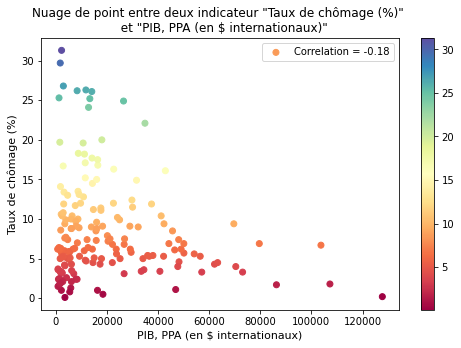

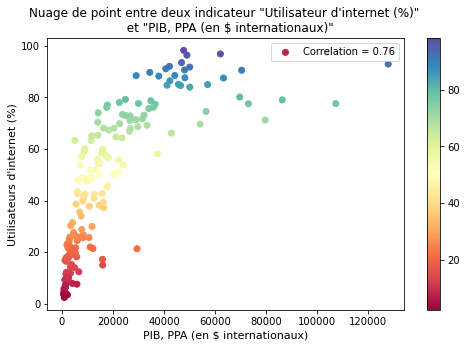

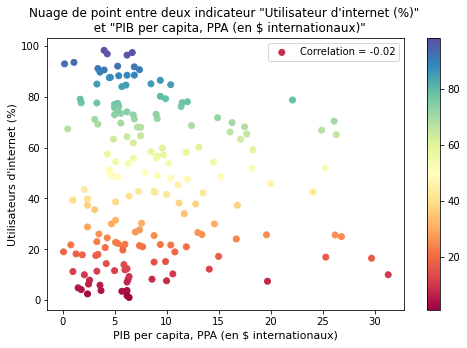

In [239]:
#Indicateurs
data_2015_country_GDP #PIB
data_2015_country_internet #Internet
data_2015_country_chomage #Chômage

Annee = '2015'
Pays = 'Country Code'

#On les rassemble dans un même data frame
GDP_2015_new = data_2015_country_GDP.copy()
GDP_2015_new = data_2015_country_GDP.loc[:, [Pays, Annee]]
GDP_2015_new = pd.DataFrame(GDP_2015_new)
GDP_2015_new = GDP_2015_new.rename(columns={Annee : 'PIB_' + Annee})

internet_2015_new = data_2015_country_internet.copy()
internet_2015_new = data_2015_country_internet.loc[:, [Pays, Annee]]
internet_2015_new = pd.DataFrame(internet_2015_new)
internet_2015_new = internet_2015_new.rename(columns={Annee : 'Internet_' + Annee})

chomage_2015_new = data_2015_country_chomage.copy()
chomage_2015_new = data_2015_country_chomage.loc[:, [Pays, Annee]]
chomage_2015_new = pd.DataFrame(chomage_2015_new)
chomage_2015_new = chomage_2015_new.rename(columns={Annee : 'Chomage_' + Annee})

# On va rechercher notre clé primaire pour chaque df
result = display_valid_primary_keys(GDP_2015_new)
print('La clé primaire pour notre df "PIB" est', result['Valide'])

result = display_valid_primary_keys(internet_2015_new)
print('La clé primaire pour notre df "internet" est', result['Valide'])

result = display_valid_primary_keys(chomage_2015_new)
print('La clé primaire pour notre df "chomage" est', result['Valide'])

#Une fois les clés primaires identifiées, nous pouvons créer une jointure entre tous nos df en utilisant cette clé primaire
data_2015_internet_PIB = pd.merge(GDP_2015_new, internet_2015_new, on = 'Country Code')
data_2015_indic = pd.merge(data_2015_internet_PIB, chomage_2015_new, on = 'Country Code')

display(data_2015_indic)


#Entre indicateur "chomage" et "PIB"

corr_PIB_chomage = data_2015_indic['Chomage_2015'].corr(data_2015_indic['PIB_2015'])

plt.figure(figsize = (8,5))
plt.scatter(data_2015_indic['PIB_2015'], data_2015_indic['Chomage_2015'], c = data_2015_indic['Chomage_2015'], cmap = 'Spectral',
           label = f'Correlation = {round(corr_PIB_chomage, 2)}')

plt.legend(loc = 'upper right')
plt.colorbar()
plt.xlabel('PIB, PPA (en $ internationaux)', size = 11)
plt.ylabel('Taux de chômage (%)', size = 11)
plt.title('Nuage de point entre deux indicateur "Taux de chômage (%)" \n  et "PIB, PPA (en $ internationaux)"')

plt.show()

#Entre "internet" et "PIB"

corr_PIB_internet = data_2015_indic['Internet_2015'].corr(data_2015_indic['PIB_2015'])

plt.figure(figsize = (8,5))
plt.scatter(data_2015_indic['PIB_2015'], data_2015_indic['Internet_2015'], c = data_2015_indic['Internet_2015'], cmap = 'Spectral',
           label = f'Correlation = {round(corr_PIB_internet, 2)}')

plt.legend(loc = 'upper right')
plt.colorbar()
plt.xlabel('PIB, PPA (en $ internationaux)', size = 11)
plt.ylabel('Utilisateurs d\'internet (%)', size = 11)
plt.title('Nuage de point entre deux indicateur "Utilisateur d\'internet (%)" \n  et "PIB, PPA (en $ internationaux)"')

plt.show()

#Entre "chomage" et "internet"

corr_chomage_internet = data_2015_indic['Internet_2015'].corr(data_2015_indic['Chomage_2015'])

plt.figure(figsize = (8,5))
plt.scatter(data_2015_indic['Chomage_2015'], data_2015_indic['Internet_2015'], c = data_2015_indic['Internet_2015'], cmap = 'Spectral',
           label = f'Correlation = {round(corr_chomage_internet, 2)}')

plt.legend(loc = 'upper right')
plt.colorbar()
plt.xlabel('PIB per capita, PPA (en $ internationaux)', size = 11)
plt.ylabel('Utilisateurs d\'internet (%)', size = 11)
plt.title('Nuage de point entre deux indicateur "Utilisateur d\'internet (%)" \n  et "PIB per capita, PPA (en $ internationaux)"')

plt.show()

### CAH sous Python

### On effectue la CAH pour les 3 indicateurs. 

PIB_2015  Internet_2015  Chomage_2015
count     172.000000     172.000000    172.000000
mean    19861.606943      47.171740      8.655233
std     22099.843361      28.210957      6.361022
min       668.337622       2.476220      0.100000
25%      4061.473630      21.407023      4.500000
50%     11988.997278      48.200156      6.750000
75%     27376.694191      71.462475     10.875000
max    127764.462337      98.200000     31.299999

PIB_2015  Internet_2015  Chomage_2015
Country Code                                       
AFG          -0.814333      -1.379313     -0.008683
ALB          -0.380659       0.570034      1.327580
DZA          -0.236122      -0.318023      0.400056
AGO          -0.597899      -1.232562     -0.385981
ARG           0.023447       0.739830     -0.228773
...                ...            ...           ...
VUT          -0.763216      -0.879812     -0.527467
VNM          -0.625112      -0.130153     -1.030531
YEM          -0.771218      -0.818346      1.264697
ZMB          -0.723608      -0.927715     -0.150170
ZWE          -0.806401      -0.865937     -0.558909

[172 rows x 3 columns]

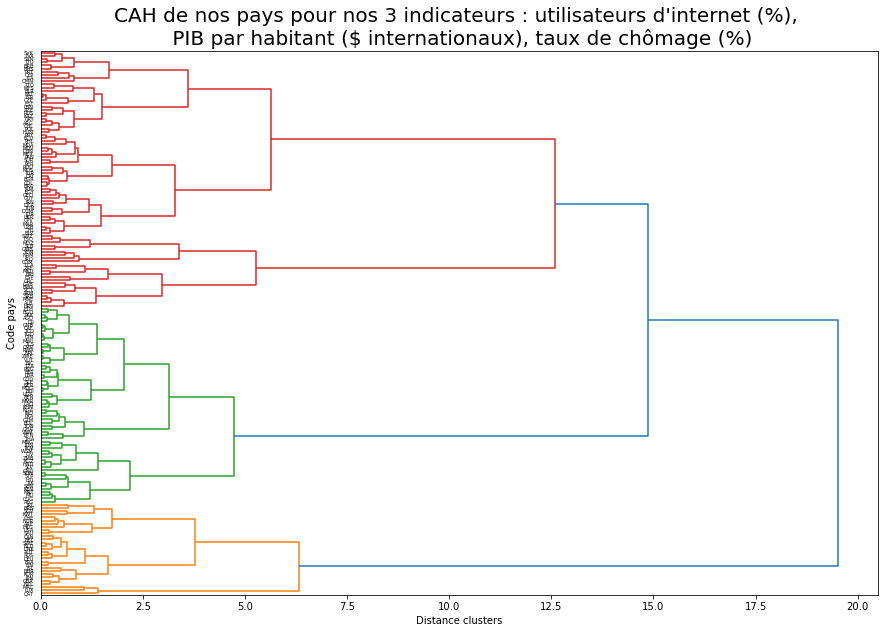

In [288]:
data_2015_indicateurs = data_2015_indic.copy()
data_2015_indicateurs = data_2015_indicateurs.dropna().set_index('Country Code')

display(data_2015_indicateurs.describe())

#classification ascendante hiérarchique
from scipy.cluster.hierarchy import dendrogram, linkage

#Centrer-réduire les données
data_2015_CR = data_2015_indicateurs.apply(lambda x: (x-x.mean())/x.std())
display(data_2015_CR)

#générer la matrice des liens
Z = linkage(data_2015_CR, method = 'ward', metric = 'euclidean')

#affichage du dendrogramme
plt.figure(figsize = (15,10))
plt.title('CAH de nos pays pour nos 3 indicateurs : utilisateurs d\'internet (%), \n PIB par habitant ($ internationaux), taux de chômage (%)', size = 20)
plt.xlabel('Distance clusters')
plt.ylabel('Code pays')
dendrogram(Z, labels = data_2015_CR.index, orientation = 'right')

plt.savefig('CAH_indicateurs.png')

plt.show()

In [241]:
from scipy.cluster.hierarchy import ward, fcluster

#Découpage
groupes_cah = fcluster(Z, t=13, criterion = 'distance')
print(groupes_cah)

#Index trié des groupes
idg = np.argsort(groupes_cah)

#Affichage des observations et leurs groupes
display(pd.DataFrame(data_2015_CR.index[idg], groupes_cah[idg]))

[2 3 3 2 3 3 1 1 3 3 1 2 3 3 1 3 2 2 2 3 3 3 1 3 2 2 3 2 2 1 2 2 3 3 3 3 2
 2 3 2 3 3 3 1 2 3 3 3 2 2 3 2 3 1 1 3 3 3 1 2 3 2 2 2 3 2 2 1 3 1 2 2 3 3
 1 3 3 3 1 3 3 2 1 1 2 2 3 3 3 2 3 1 1 3 2 2 3 3 2 3 2 3 3 3 2 3 3 3 2 3 2
 1 1 2 2 2 1 3 2 3 2 3 3 3 3 3 1 3 3 2 2 2 1 2 3 2 1 3 3 3 3 3 2 3 3 2 3 3
 1 1 2 2 2 2 2 2 3 3 3 2 2 3 1 1 1 3 3 2 2 3 2 2]


Country Code
1           FIN
1           CAN
1           MAC
1           LUX
1           SAU
..          ...
3           MUS
3           MLT
3           DOM
3           CYP
3           PAN

[172 rows x 1 columns]

In [242]:
#On rassemble notre df contenant les groupes cah et notre df avec les codes de pays. 
names = data_2015_CR.index
cluster_pays = pd.DataFrame({"Cluster": groupes_cah, "Country Code": names})
display(cluster_pays)

Cluster Country Code
0          2          AFG
1          3          ALB
2          3          DZA
3          2          AGO
4          3          ARG
..       ...          ...
167        2          VUT
168        2          VNM
169        3          YEM
170        2          ZMB
171        2          ZWE

[172 rows x 2 columns]

In [243]:
#On va rassembler nos données centrées réduites 
pd.merge(data_2015_CR.reset_index(), cluster_pays)

Country Code  PIB_2015  Internet_2015  Chomage_2015  Cluster
0            AFG -0.814333      -1.379313     -0.008683        2
1            ALB -0.380659       0.570034      1.327580        3
2            DZA -0.236122      -0.318023      0.400056        3
3            AGO -0.597899      -1.232562     -0.385981        2
4            ARG  0.023447       0.739830     -0.228773        3
..           ...       ...            ...           ...      ...
167          VUT -0.763216      -0.879812     -0.527467        2
168          VNM -0.625112      -0.130153     -1.030531        2
169          YEM -0.771218      -0.818346      1.264697        3
170          ZMB -0.723608      -0.927715     -0.150170        2
171          ZWE -0.806401      -0.865937     -0.558909        2

[172 rows x 5 columns]

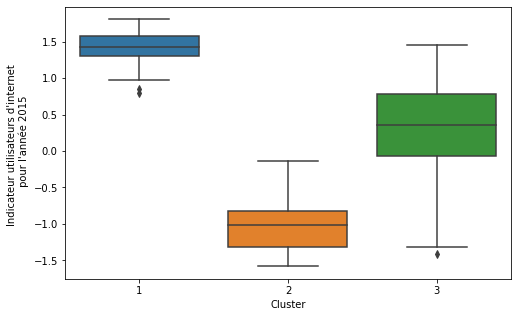

In [244]:
#On effectue un boxplot pour visualiser nos différents groupes  
#Concernant l'indicateur "internet"
plt.figure(figsize = (8,5))
df_pays = pd.merge(data_2015_CR.reset_index(), cluster_pays)
sns.boxplot(data=df_pays, x='Cluster', y='Internet_2015')
plt.ylabel('Indicateur utilisateurs d\'internet \n pour l\'année 2015')

plt.savefig('Boxplot_internet.png')
plt.show()

In [245]:
#On regarde combien de pays se trouvent dans chaque groupe. 
df_pays.Cluster.value_counts()

3    81
2    62
1    29
Name: Cluster, dtype: int64

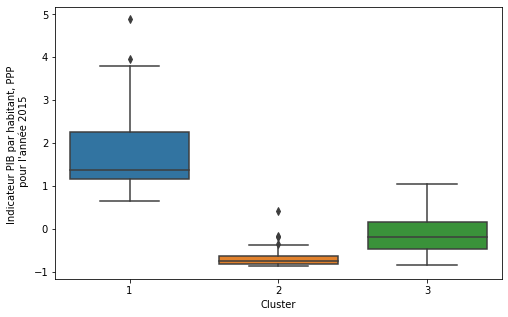

In [246]:
#Concernant l'indicateur "PIB"
plt.figure(figsize = (8,5))
df_pays = pd.merge(data_2015_CR.reset_index(), cluster_pays)
sns.boxplot(data=df_pays, x='Cluster', y='PIB_2015')
plt.ylabel('Indicateur PIB par habitant, PPP \n pour l\'année 2015')

plt.savefig('Boxplot_PIB.png')
plt.show()


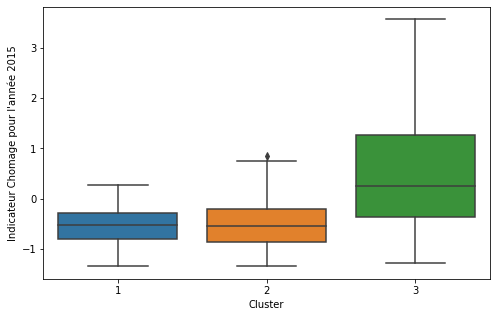

In [247]:
#Concernant l'indicateur "Chomgae"
plt.figure(figsize = (8,5))
df_pays = pd.merge(data_2015_CR.reset_index(), cluster_pays)
sns.boxplot(data=df_pays, x='Cluster', y='Chomage_2015')
plt.ylabel('Indicateur Chomage pour l\'année 2015')

plt.savefig('Boxplot_Chomage.png')
plt.show()


#### Les groupes 1 et 3 se démarquent pour l'indicateur "internet", le groupe 1 se démarque fortement pour l'indicateur "PIB". C'est le groupe 3 qui ressort le plus pour l'indicateur "Chomage". 

#### On va donc laisser de côté le groupe 2 et sélectionner les 2 autres pour la suite de l'analyse. 

In [248]:
#On récupère uniquement les 3 groupes : 1 et 3.
#On va donc retirer de notre df, le groupe 2.
df_pays_1_3 = df_pays.drop(df_pays[df_pays['Cluster'] == 2].index)
display(df_pays_1_3)

Country Code  PIB_2015  Internet_2015  Chomage_2015  Cluster
1            ALB -0.380659       0.570034      1.327580        3
2            DZA -0.236122      -0.318023      0.400056        3
4            ARG  0.023447       0.739830     -0.228773        3
5            ARM -0.503040       0.422908      1.516229        3
6            AUS  1.204276       1.325328     -0.401702        1
..           ...       ...            ...           ...      ...
163          GBR  1.007385       1.589048     -0.527467        1
164          USA  1.656455       0.970632     -0.527467        1
165          URY  0.058697       0.617783     -0.181611        3
166          UZB -0.623527      -0.154966      0.022759        3
169          YEM -0.771218      -0.818346      1.264697        3

[110 rows x 5 columns]

In [249]:
#On va calculer le taux de population agé entre 15 et 24 ans.
#On va récupérer notre fichier contenant les données de population pour 2015
data_population_pays_2015_2100 = datapopulation_pays.drop(datapopulation_pays.loc[:, 'Country Code':'2014'].columns, axis=1)
data_population_pays_2015 = data_population_pays_2015_2100.drop(data_population_pays_2015_2100.loc[:, '2016':'Region'].columns, axis=1)
data_population_pays_2015 = data_population_pays_2015.rename(columns = {'2015':'Pop_totale_2015'}) #Fichier concernant la population totale comportant nos noms de pays et notre année "2015"

#On va récupérer notre fichier contenant la population agée entre 15 et 24 ans. 
data_pop_15_24_2015_2100 = data_pop_15_24.drop(data_pop_15_24.loc[:, 'Indicator Name':'2014'].columns, axis = 1)
data_pop_15_24_2015 = data_pop_15_24_2015_2100.drop(data_pop_15_24_2015_2100.loc[:, '2016':'Unnamed: 69'].columns, axis = 1)
data_pop_15_24_2015 = data_pop_15_24_2015.rename(columns = {'2015':'Pop_15_24_total'})

data_pop_15_24_pays_2015 = pd.merge(data_population_pays_2015, data_pop_15_24_2015, on = 'Country Name', how = 'left')

#On ne garde que les pays restants de notre dernier df contenant le gorupe 1 et 3
df_1_3 = df_pays_1_3.drop(df_pays_1_3.loc[:, 'PIB_2015':'Chomage_2015'].columns, axis = 1) 
data_pop_totale_15_24 = pd.merge(df_1_3, data_pop_15_24_pays_2015, on = 'Country Code', how = 'left')
data_pop_totale_15_24

#On va calculer le taux de population dont l'age est entre 15 et 24 ans. 
data_pop_totale_15_24['Taux_15_24'] = data_pop_totale_15_24['Pop_15_24_total']/data_pop_totale_15_24['Pop_totale_2015']*100
data_groupe_1_3_pop_15_24 = data_pop_totale_15_24.copy()
data_groupe_1_3_pop_15_24

Country Code  Cluster    Country Name  Pop_totale_2015  Pop_15_24_total  \
0            ALB        3         Albania        2880703.0         556269.0   
1            DZA        3         Algeria       39871528.0        6467818.0   
2            ARG        3       Argentina       43417765.0        6886530.0   
3            ARM        3         Armenia        2916950.0         446958.0   
4            AUS        1       Australia       23789338.0        2914620.0   
..           ...      ...             ...              ...              ...   
105          GBR        1  United Kingdom       65128861.0        7731522.0   
106          USA        1   United States      320896618.0       45147517.0   
107          URY        3         Uruguay        3431552.0         519298.0   
108          UZB        3      Uzbekistan       31298900.0        5897703.0   
109          YEM        3     Yemen, Rep.       26916207.0        5995687.0   

     Taux_15_24  
0     19.310182  
1     16.221646  
2     15.861088  
3     15.322786  
4     12.251791  
..          ...  
105   11.871115  
106   14.069178  
107   15.133036  
108   18.843164  
109   22.275379  

[110 rows x 6 columns]

In [250]:
#On va effectuer un premier tri en ne gardant que les pays dont la population est > 10 000 000. 
data_groupe_1_3_pop_10M = data_groupe_1_3_pop_15_24.loc[data_groupe_1_3_pop_15_24['Pop_totale_2015'] > 10000000, :]

#A partir de notre nouveau df, on va effectuer un classement nous permettant de voir pour quels pays nous avons 
#le plus fort taux

data_groupe_1_3_pop_10M_tri = data_groupe_1_3_pop_10M.sort_values(by = 'Taux_15_24', ascending = False)
display(data_groupe_1_3_pop_10M_tri.head(10))
data_groupe_1_3_pop_10M_tri.Cluster.value_counts()

Country Code  Cluster        Country Name  Pop_totale_2015  \
109          YEM        3         Yemen, Rep.     2.691621e+07   
46           IRQ        3                Iraq     3.611565e+07   
80           PHL        3         Philippines     1.017164e+08   
108          UZB        3          Uzbekistan     3.129890e+07   
71           MOZ        3          Mozambique     2.801069e+07   
22           COL        3            Colombia     4.822870e+07   
29           DOM        3  Dominican Republic     1.052839e+07   
92           ZAF        3        South Africa     5.501198e+07   
79           PER        3                Peru     3.137667e+07   
102          TUR        3              Turkey     7.827147e+07   

     Pop_15_24_total  Taux_15_24  
109        5995687.0   22.275379  
46         7340940.0   20.326203  
80        19278458.0   18.953154  
108        5897703.0   18.843164  
71         5230426.0   18.672963  
22         8999338.0   18.659716  
29         1962188.0   18.637106  
92         9998431.0   18.175008  
79         5653743.0   18.018938  
102       13930222.0   17.797317

3    32
1    11
Name: Cluster, dtype: int64

#### On va affiner notre sélection avec un nouvel indicateur : Projection de Wittgenstein -> % de la population agée de 20 à 24 ans selon le plus haut niveau de scolarité atteint (post-secondaire). 

In [251]:
#On récupère notre df contenant les données de projection pour 2015. 
data_proj_pays_2015_2100 = dataproj_pays.drop(dataproj_pays.loc[:, 'Indicator Name':'2014'].columns, axis=1)
data_proj_pays_2015 = data_proj_pays_2015_2100.drop(data_proj_pays_2015_2100.loc[:, '2016':'Region'].columns, axis=1)
data_proj_pays_2015 = data_proj_pays_2015.drop('Country Name', axis=1).rename(columns={'2015':'Projection_2015'})

#On va joindre nos 2 df
data_projection_pop_2015 = pd.merge(data_groupe_1_3_pop_10M_tri, data_proj_pays_2015, on = 'Country Code', how = 'inner') #On joint nos df en enlevant les pays dont les données sont manquantes. 
data_projection_pop_2015 = data_projection_pop_2015.dropna()
data_projection_pop_2015

Country Code  Cluster        Country Name  Pop_totale_2015  \
1           IRQ        3                Iraq     3.611565e+07   
2           PHL        3         Philippines     1.017164e+08   
4           MOZ        3          Mozambique     2.801069e+07   
5           COL        3            Colombia     4.822870e+07   
6           DOM        3  Dominican Republic     1.052839e+07   
7           ZAF        3        South Africa     5.501198e+07   
8           PER        3                Peru     3.137667e+07   
9           TUR        3              Turkey     7.827147e+07   
10          MAR        3             Morocco     3.480332e+07   
11          MYS        3            Malaysia     3.072316e+07   
12          IRN        3  Iran, Islamic Rep.     7.936049e+07   
13          SAU        1        Saudi Arabia     3.155714e+07   
14          ECU        3             Ecuador     1.614437e+07   
15          EGY        3    Egypt, Arab Rep.     9.377817e+07   
16          BRA        3              Brazil     2.059621e+08   
17          DZA        3             Algeria     3.987153e+07   
18          MEX        3              Mexico     1.258909e+08   
19          TUN        3             Tunisia     1.127366e+07   
20          ARG        3           Argentina     4.341776e+07   
21          CHL        3               Chile     1.776268e+07   
22          CHN        3               China     1.371220e+09   
23          USA        1       United States     3.208966e+08   
24          KAZ        3          Kazakhstan     1.754413e+07   
25          KOR        1         Korea, Rep.     5.101495e+07   
26          AUS        1           Australia     2.378934e+07   
27          CAN        1              Canada     3.584861e+07   
28          GBR        1      United Kingdom     6.512886e+07   
29          NLD        1         Netherlands     1.693992e+07   
30          POL        3              Poland     3.798641e+07   
31          FRA        1              France     6.662407e+07   
32          ROU        3             Romania     1.981548e+07   
33          PRT        3            Portugal     1.035808e+07   
34          BEL        1             Belgium     1.127420e+07   
35          UKR        3             Ukraine     4.515403e+07   
36          DEU        1             Germany     8.168661e+07   
37          GRC        3              Greece     1.082088e+07   
38          RUS        3  Russian Federation     1.440969e+08   
39          CZE        3      Czech Republic     1.054606e+07   
40          JPN        1               Japan     1.271410e+08   
41          ITA        3               Italy     6.073058e+07   
42          ESP        3               Spain     4.644770e+07   

    Pop_15_24_total  Taux_15_24  Projection_2015  
1         7340940.0   20.326203             0.15  
2        19278458.0   18.953154             0.41  
4         5230426.0   18.672963             0.00  
5         8999338.0   18.659716             0.24  
6         1962188.0   18.637106             0.18  
7         9998431.0   18.175008             0.03  
8         5653743.0   18.018938             0.15  
9        13930222.0   17.797317             0.11  
10        6086204.0   17.487423             0.08  
11        5332642.0   17.357078             0.35  
12       13556577.0   17.082275             0.14  
13        5298036.0   16.788706             0.13  
14        2697654.0   16.709567             0.22  
15       15377746.0   16.398001             0.17  
16       33595574.0   16.311531             0.06  
17        6467818.0   16.221646             0.22  
18       20336734.0   16.154246             0.15  
19        1800366.0   15.969666             0.15  
20        6886530.0   15.861088             0.06  
21        2817084.0   15.859565             0.15  
22      197026759.0   14.368720             0.19  
23       45147517.0   14.069178             0.21  
24        2393020.0   13.640007             0.35  
25        6456561.0   12.656214             0.23

In [252]:
#On va créer un nouveau df avec uniquement le code des pays et les deux autres variables qui nous intéressent
data_2015_proj_pop_pays = data_projection_pop_2015.drop(data_projection_pop_2015.loc[:, 'Cluster':'Pop_15_24_total'].columns, axis=1)
data_2015_proj_pop_pays = data_2015_proj_pop_pays.set_index('Country Code')
data_2015_proj_pop_pays.head()

Taux_15_24  Projection_2015
Country Code                             
IRQ            20.326203             0.15
PHL            18.953154             0.41
MOZ            18.672963             0.00
COL            18.659716             0.24
DOM            18.637106             0.18

Taux_15_24  Projection_2015
Country Code                             
IRQ             1.818517        -0.339009
PHL             1.403283         2.054262
MOZ             1.318548        -1.719743
COL             1.314542         0.489431
DOM             1.307704        -0.062863
ZAF             1.167958        -1.443596
PER             1.120760        -0.339009
TUR             1.053737        -0.707205
MAR             0.960020        -0.983352
MYS             0.920601         1.501969
IRN             0.837496        -0.431058
SAU             0.748716        -0.523107
ECU             0.724783         0.305333
EGY             0.630560        -0.154912
BRA             0.604410        -1.167449
DZA             0.577227         0.305333
MEX             0.556844        -0.339009
TUN             0.501024        -0.339009
ARG             0.468188        -1.167449
CHL             0.467727        -0.339009
CHN             0.016870         0.029186
USA            -0.073717         0.213284
KAZ            -0.203506         1.501969
KOR            -0.501022         0.397382
AUS            -0.623327         0.765577
CAN            -0.639006         2.238360
GBR            -0.738450         0.581480
NLD            -0.747458         0.121235
POL            -0.822146        -0.523107
FRA            -0.893302         0.673529
ROU            -0.898898        -0.983352
PRT            -0.974464        -0.983352
BEL            -0.997104         1.870164
UKR            -1.085033        -0.615156
DEU            -1.114115        -0.523107
GRC            -1.215108        -0.246960
RUS            -1.251358        -0.523107
CZE            -1.278304        -0.615156
JPN            -1.436718         2.514507
ITA            -1.488410        -0.707205
ESP            -1.538067         0.213284

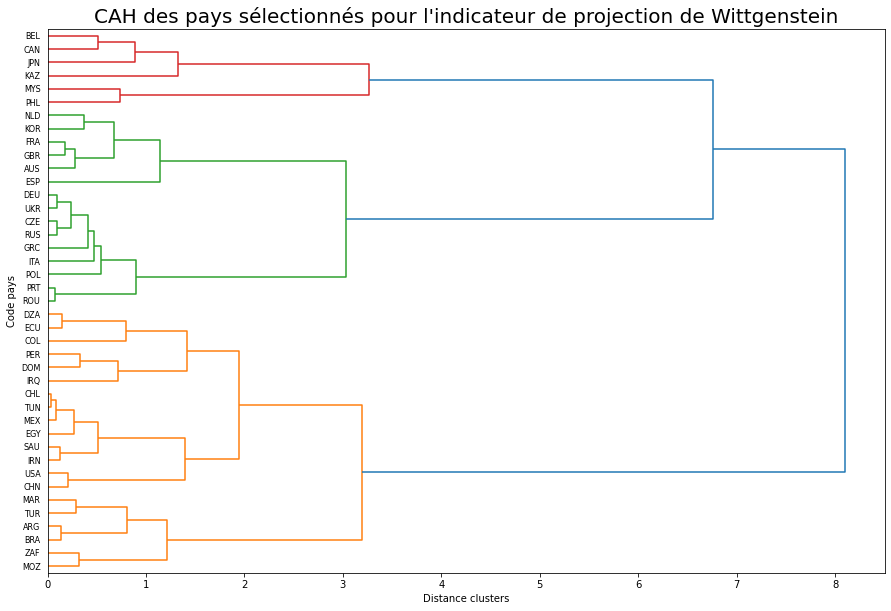

In [289]:
#Centrer-réduire les données

data_2015_proj_pop_pays_CR = data_2015_proj_pop_pays.apply(lambda x: (x-x.mean())/x.std())
display(data_2015_proj_pop_pays_CR)

#générer la matrice des liens
Z = linkage(data_2015_proj_pop_pays_CR, method = 'ward', metric = 'euclidean')

#affichage du dendrogramme
plt.figure(figsize = (15,10))
plt.title('CAH des pays sélectionnés pour l\'indicateur de projection de Wittgenstein', size=20)
plt.ylabel('Code pays')
plt.xlabel('Distance clusters')
dendrogram(Z, labels = data_2015_proj_pop_pays_CR.index, orientation = 'right')

plt.savefig('CAH_projection')
plt.show()

In [254]:
#Découpage
groupes_cah = fcluster(Z, t=4, criterion = 'distance')
print(groupes_cah)

#Index trié des groupes
idg = np.argsort(groupes_cah)

#Affichage des observations et leurs groupes
display(pd.DataFrame(data_2015_proj_pop_pays_CR.index[idg], groupes_cah[idg]))

[1 3 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 3 2 2 3 2 2 2 2 2 2 3 2 2 2 2
 2 3 2 2]


Country Code
1          IRQ
1          USA
1          CHL
1          ARG
1          TUN
1          MEX
1          DZA
1          BRA
1          EGY
1          ECU
1          SAU
1          CHN
1          MAR
1          TUR
1          PER
1          ZAF
1          DOM
1          COL
1          MOZ
1          IRN
2          GBR
2          PRT
2          UKR
2          CZE
2          GRC
2          RUS
2          ROU
2          DEU
2          FRA
2          ESP
2          NLD
2          AUS
2          KOR
2          ITA
2          POL
3          CAN
3          BEL
3          KAZ
3          PHL
3          JPN
3          MYS

In [255]:
#On rassemble notre df contenant les groupes cah et notre df avec les codes de pays. 
names = data_2015_proj_pop_pays_CR.index
cluster_pays = pd.DataFrame({"Cluster": groupes_cah, "Country Code": names})
print(cluster_pays)

    Cluster Country Code
0         1          IRQ
1         3          PHL
2         1          MOZ
3         1          COL
4         1          DOM
5         1          ZAF
6         1          PER
7         1          TUR
8         1          MAR
9         3          MYS
10        1          IRN
11        1          SAU
12        1          ECU
13        1          EGY
14        1          BRA
15        1          DZA
16        1          MEX
17        1          TUN
18        1          ARG
19        1          CHL
20        1          CHN
21        1          USA
22        3          KAZ
23        2          KOR
24        2          AUS
25        3          CAN
26        2          GBR
27        2          NLD
28        2          POL
29        2          FRA
30        2          ROU
31        2          PRT
32        3          BEL
33        2          UKR
34        2          DEU
35        2          GRC
36        2          RUS
37        2          CZE
38        3          JPN


In [256]:
#On va rassembler nos données centrées réduites 
pd.merge(data_2015_proj_pop_pays_CR.reset_index(), cluster_pays)

Country Code  Taux_15_24  Projection_2015  Cluster
0           IRQ    1.818517        -0.339009        1
1           PHL    1.403283         2.054262        3
2           MOZ    1.318548        -1.719743        1
3           COL    1.314542         0.489431        1
4           DOM    1.307704        -0.062863        1
5           ZAF    1.167958        -1.443596        1
6           PER    1.120760        -0.339009        1
7           TUR    1.053737        -0.707205        1
8           MAR    0.960020        -0.983352        1
9           MYS    0.920601         1.501969        3
10          IRN    0.837496        -0.431058        1
11          SAU    0.748716        -0.523107        1
12          ECU    0.724783         0.305333        1
13          EGY    0.630560        -0.154912        1
14          BRA    0.604410        -1.167449        1
15          DZA    0.577227         0.305333        1
16          MEX    0.556844        -0.339009        1
17          TUN    0.501024        -0.339009        1
18          ARG    0.468188        -1.167449        1
19          CHL    0.467727        -0.339009        1
20          CHN    0.016870         0.029186        1
21          USA   -0.073717         0.213284        1
22          KAZ   -0.203506         1.501969        3
23          KOR   -0.501022         0.397382        2
24          AUS   -0.623327         0.765577        2
25          CAN   -0.639006         2.238360        3
26          GBR   -0.738450         0.581480        2
27          NLD   -0.747458         0.121235        2
28          POL   -0.822146        -0.523107        2
29          FRA   -0.893302         0.673529        2
30          ROU   -0.898898        -0.983352        2
31          PRT   -0.974464        -0.983352        2
32          BEL   -0.997104         1.870164        3
33          UKR   -1.085033        -0.615156        2
34          DEU   -1.114115        -0.523107        2
35          GRC   -1.215108        -0.246960        2
36          RUS   -1.251358        -0.523107        2
37          CZE   -1.278304        -0.615156        2
38          JPN   -1.436718         2.514507        3
39          ITA   -1.488410        -0.707205        2
40          ESP   -1.538067         0.213284        2

<AxesSubplot:xlabel='Cluster', ylabel='Taux_15_24'>

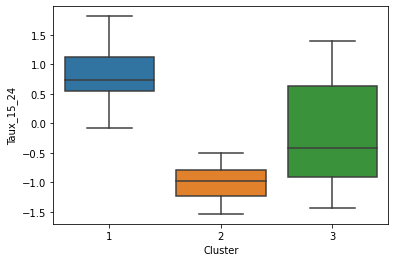

In [257]:
#On effectue un boxplot pour visualiser nos différents groupes  
#Concernant l'indicateur "Taux_15_24"
df_pays = pd.merge(data_2015_proj_pop_pays_CR.reset_index(), cluster_pays)
sns.boxplot(data=df_pays, x='Cluster', y='Taux_15_24')

In [258]:
df_pays.Cluster.value_counts()

1    20
2    15
3     6
Name: Cluster, dtype: int64

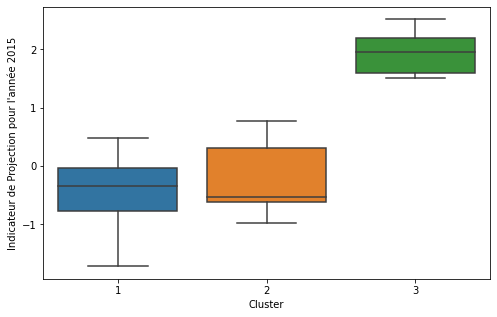

In [259]:
#Concernant l'indicateur "Projection_2015"
plt.figure(figsize = (8,5))
df_pays = pd.merge(data_2015_proj_pop_pays_CR.reset_index(), cluster_pays)
sns.boxplot(data=df_pays, x='Cluster', y='Projection_2015')
plt.ylabel('Indicateur de Projection pour l\'année 2015')

plt.savefig('Boxplot_Projection.png')
plt.show()

#### Les données de projection nous intéressant le plus. Nous allons nous concentrer sur les pays appartenant au groupe 3

In [260]:
#On sélectionne les pays du groupe 2
df_pays_select = df_pays.loc[df_pays['Cluster'] == 3, :]

### A partir de notre dernière liste de pays. Nous allons les filtrer avec d'autres indicateurs : voir pour la langue anglais, les dépenses publiques, le taux d'équipement et/ou le ratio de profs !

In [261]:
#On va sélectionner les données concernant la langue "anglais".
data_GNI = dataData.loc[dataData['Indicator Name'] == 'GNI per capita, PPP (current international $)', :]
data_GNI = data_GNI.drop(data_GNI.loc[:, 'Indicator Name':'2014'].columns, axis = 1)
data_GNI = data_GNI.drop(data_GNI.loc[:, '2016':'Unnamed: 69'].columns, axis = 1)
data_GNI.dropna()

data_pays_GNI_proj_15_24 = pd.merge(data_GNI, df_pays_select, on = 'Country Code', how = 'right')

In [262]:
#On va regarder uniquement pour les données de scolarisation. 
data_pays_GNI = data_pays_GNI_proj_15_24.drop(data_pays_GNI_proj_15_24.loc[:, 'Taux_15_24':'Cluster'].columns, axis = 1)
data_pays_GNI = data_pays_GNI.drop('Country Name', axis = 1)
data_pays_GNI = data_pays_GNI.set_index('Country Code')
data_pays_GNI

2015
Country Code         
PHL            8870.0
MYS           25940.0
KAZ           23580.0
CAN           43530.0
BEL           45640.0
JPN           42230.0

2015
Country Code          
PHL          -1.559277
MYS          -0.389905
KAZ          -0.551576
CAN           0.815090
BEL           0.959634
JPN           0.726034

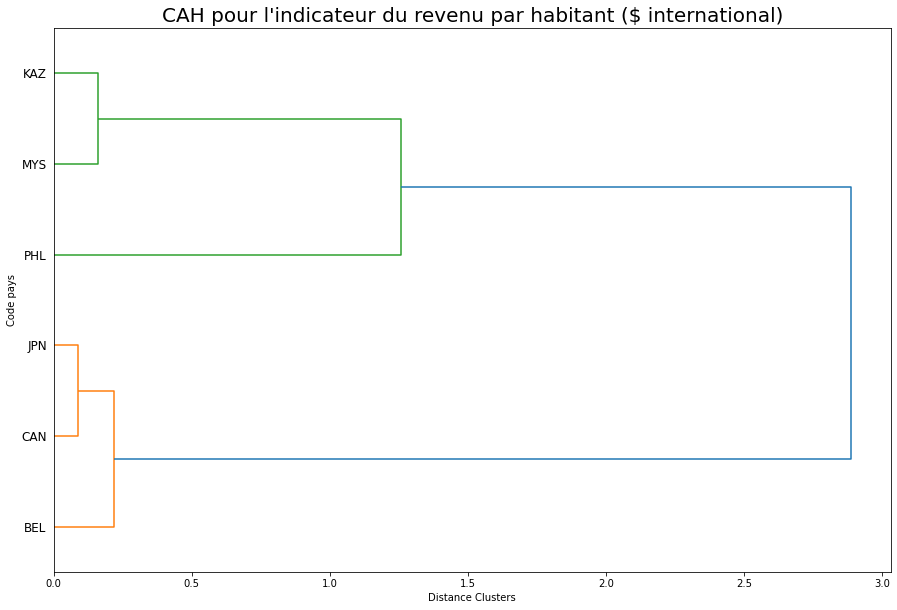

In [290]:
#Centrer-réduire les données

data_pays_GNI_CR = data_pays_GNI.apply(lambda x: (x-x.mean())/x.std())
display(data_pays_GNI_CR)

#générer la matrice des liens
Z = linkage(data_pays_GNI_CR, method = 'ward', metric = 'euclidean')

#affichage du dendrogramme
plt.figure(figsize = (15,10))
plt.title('CAH pour l\'indicateur du revenu par habitant ($ international)', size=20)
plt.xlabel('Distance Clusters')
plt.ylabel('Code pays')
dendrogram(Z, labels = data_pays_GNI_CR.index, orientation = 'right')

plt.savefig('CAH_finale.png')
plt.show()

In [264]:
#Découpage
groupes_cah = fcluster(Z, t=1.5, criterion = 'distance')
print(groupes_cah)

#Index trié des groupes
idg = np.argsort(groupes_cah)

#Affichage des observations et leurs groupes
display(pd.DataFrame(data_pays_GNI_CR.index[idg], groupes_cah[idg]))

[2 2 2 1 1 1]


Country Code
1          CAN
1          BEL
1          JPN
2          PHL
2          MYS
2          KAZ

In [265]:
#On rassemble notre df contenant les groupes cah et notre df avec les codes de pays. 
names = data_pays_GNI_CR.index
cluster_pays = pd.DataFrame({"Cluster": groupes_cah, "Country Code": names})
print(cluster_pays)

   Cluster Country Code
0        2          PHL
1        2          MYS
2        2          KAZ
3        1          CAN
4        1          BEL
5        1          JPN


In [266]:
#On va rassembler nos données centrées réduites 
pd.merge(data_pays_GNI_CR.reset_index(), cluster_pays)

Country Code      2015  Cluster
0          PHL -1.559277        2
1          MYS -0.389905        2
2          KAZ -0.551576        2
3          CAN  0.815090        1
4          BEL  0.959634        1
5          JPN  0.726034        1

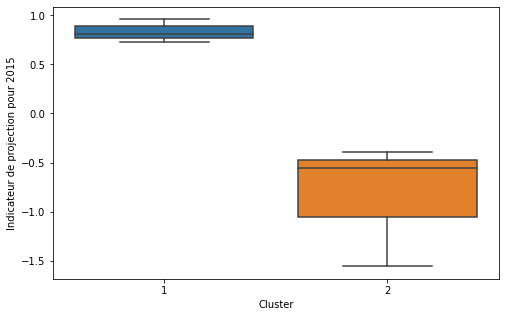

In [267]:
#On effectue un boxplot pour visualiser nos différents groupes  
#Concernant l'indicateur "Duration of compulsory education"
plt.figure(figsize=(8,5))
df_pays = pd.merge(data_pays_GNI_CR.reset_index(), cluster_pays)
sns.boxplot(data=df_pays, x='Cluster', y='2015')
plt.ylabel('Indicateur de projection pour 2015')
plt.savefig('Boxplot_final.png')
plt.show()

#### C'est le groupe 1 contenant les 2 pays : Canada, Belgique et Japon qui ressortent le plus. 

### Prévisions pour les pays pour chaque indicateur

### 1) PIB par habitant, PPA (Canada)

PIB_PPA_Canada  Moyenne_mobile_exp_5  Moyenne_mobile_exp_10  \
Annees                                                                
1990      20107.830688          20107.830688           20107.830688   
1991      20060.672823          20079.535969           20081.893862   
1992      20446.628201          20253.421763           20228.514643   
1993      21255.053575          20669.484208           20566.713484   
1994      22465.803055          21359.066324           21111.890449   
1995      23354.272189          22088.141550           21694.314443   
1996      23904.848934          22731.356549           22226.964456   
1997      25087.997258          23548.798774           22877.863206   
1998      26117.611730          24427.938193           23582.719113   
1999      27656.676922          25523.177562           24438.479066   
2000      29185.355059          26758.181297           25408.206486   
2001      30073.912805          27872.009796           26340.406070   
2002      30851.311482          28870.239492           27225.758096   
2003      32189.061596          29980.316080           28186.025072   
2004      33754.869562          31241.380414           29251.035218   
2005      36134.602242          32874.941353           30555.185480   
2006      38009.875996          34588.325249           31956.830928   
2007      39441.967789          36207.301559           33355.523791   
2008      40277.619312          37564.686450           34642.512993   
2009      38791.074686          37973.605502           35410.678921   
2010      40027.240209          38658.287674           36262.650830   
2011      41565.271221          39627.411720           37238.569822   
2012      42145.097861          40466.715220           38139.584037   
2013      44097.606423          41677.084187           39231.705199   
2014      45082.009632          42812.104285           40302.491851   
2015      44204.946582          43276.397308           41015.896585   
2016      44025.183426          43525.997074           41565.477327   

        Moyenne_mobile_exp_20  
Annees                         
1990             20107.830688  
1991             20083.072809  
1992             20216.568169  
1993             20516.362849  
1994             20987.915846  
1995             21487.108945  
1996             21944.243734  
1997             22487.657327  
1998             23069.919763  
1999             23760.645647  
2000             24534.712758  
2001             25289.307759  
2002             26017.173983  
2003             26797.067630  
2004             27649.732699  
2005             28661.894825  
2006             29750.826599  
2007             30856.242086  
2008             31911.029190  
2009             32668.630856  
2010             33467.051303  
2011             34334.219005  
2012             35160.828180  
2013             36096.678457  
2014             37028.776041  
2015             37766.927140  
2016             38405.790015

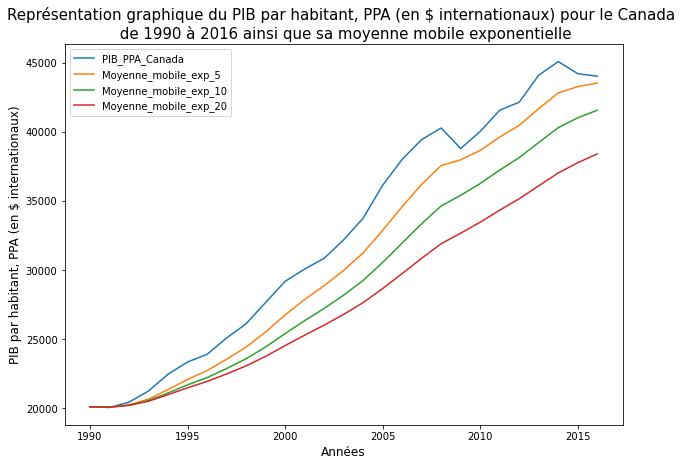

   Annees  PIB_PPA_Canada
0    1990    20107.830688
1    1991    20060.672823
2    1992    20446.628201
3    1993    21255.053575
4    1994    22465.803055
5    1995    23354.272189
6    1996    23904.848934
7    1997    25087.997258
8    1998    26117.611730
9    1999    27656.676922
10   2000    29185.355059
11   2001    30073.912805
12   2002    30851.311482
13   2003    32189.061596
14   2004    33754.869562
15   2005    36134.602242
16   2006    38009.875996
17   2007    39441.967789
18   2008    40277.619312
19   2009    38791.074686
20   2010    40027.240209
21   2011    41565.271221
22   2012    42145.097861
23   2013    44097.606423
24   2014    45082.009632
25   2015    44204.946582
26   2016    44025.183426
27   2017    43910.968785
28   2018    44264.142970
29   2019    44297.450279
30   2020    44140.538408


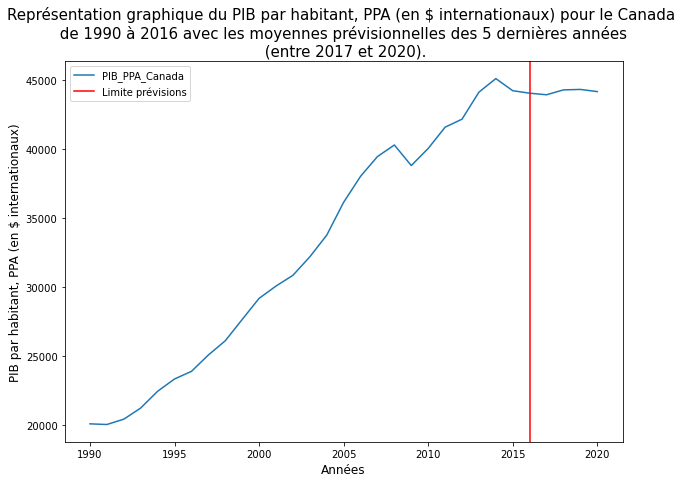

In [268]:
#Prévisions pour le Canada concernant l'indicateur du PIB, PPA
dataData
data_PIB = dataData.loc[dataData['Indicator Name'] == 'GDP per capita, PPP (current international $)', :]
data_PIB_Canada = data_PIB.loc[data_PIB['Country Name'] == 'Canada', :]

#On va supprimer les colonnes où nous n'avons pas de données pour ne travailler que sur la période de temps qui en contient. 
data_PIB_Canada_nettoye = data_PIB_Canada.dropna(how = 'all', axis=1)
data_PIB_Canada_nettoye

#On va garder enlever les colonnes qui ne nous intéressent pas pour ne garder que les années
data_PIB_Canada_nettoye = data_PIB_Canada_nettoye.drop(data_PIB_Canada_nettoye.loc[:, 'Country Name' : 'Indicator Code'].columns, axis = 1)
data_PIB_Canada_nettoye

# #On va transposer le tableau pour avoir les années en lignes
data_PIB_Canada_nettoye_transpose = data_PIB_Canada_nettoye.transpose()
data_PIB_Canada_nettoye_transpose.index.name = 'Annees'
PIB_PPA_Canada = data_PIB_Canada_nettoye_transpose.rename(columns = {221147 : 'PIB_PPA_Canada'})
PIB_PPA_Canada.count() #On a 27 données 


#Calcul de la moyenne mobile exponentielle
PIB_PPA_Canada['Moyenne_mobile_exp_5'] = PIB_PPA_Canada['PIB_PPA_Canada'].ewm(span = 5).mean()
PIB_PPA_Canada['Moyenne_mobile_exp_10'] = PIB_PPA_Canada['PIB_PPA_Canada'].ewm(span = 10).mean()
PIB_PPA_Canada['Moyenne_mobile_exp_20'] = PIB_PPA_Canada['PIB_PPA_Canada'].ewm(span = 20).mean()
display(PIB_PPA_Canada)

#On trace la courbe des moyennes mobiles exponentielles
PIB_PPA_Canada[['PIB_PPA_Canada', 'Moyenne_mobile_exp_5', 'Moyenne_mobile_exp_10', 'Moyenne_mobile_exp_20']].plot(label = 'PIB_PPA_Canada', figsize = (10, 7))
plt.xlabel('Années', size = 12)
plt.ylabel('PIB par habitant, PPA (en $ internationaux)', size = 12) 
plt.title('Représentation graphique du PIB par habitant, PPA (en $ internationaux) pour le Canada \n de 1990 à 2016 ainsi que sa moyenne mobile exponentielle', size = 15)

plt.show()

#On va reprendre notre tableau sans les moyennes mobiles.
data_PIB_Canada_brutes = data_PIB_Canada_nettoye_transpose.rename(columns={221147 : 'PIB_PPA_Canada'}).reset_index()

#On prend la dernière année de notre df.
Annees = data_PIB_Canada_brutes['Annees'].tail(1)

i = 1

nb_annees = 5

#On calcule les prévisions moyennes en prenant les 5 dernières années à chaque fois jusqu'à 2030.
while int(Annees) < 2020:
    Annees = int(Annees) + i 
    moyenne = data_PIB_Canada_brutes['PIB_PPA_Canada'].tail(nb_annees).mean()
    PIB = pd.DataFrame([[Annees, moyenne]], columns = ['Annees','PIB_PPA_Canada'])
    data_PIB_Canada_brutes = pd.concat([data_PIB_Canada_brutes, PIB], ignore_index = True)
print(data_PIB_Canada_brutes)

#On trace notre graphique de prévisions
data_PIB_Canada_brutes.set_index('Annees', inplace=True)

data_PIB_Canada_brutes['PIB_PPA_Canada'].plot(label = 'PIB_PPA_Canada', figsize = (10, 7))
plt.axvline(x = 26, color = 'red', label = 'Limite prévisions')
plt.legend(loc = 'upper left')
plt.xlabel('Années', size = 12)
plt.ylabel('PIB par habitant, PPA (en $ internationaux)', size = 12) 
plt.title('Représentation graphique du PIB par habitant, PPA (en $ internationaux) pour le Canada \n de 1990 à 2016 avec les moyennes prévisionnelles des 5 dernières années \n (entre 2017 et 2020).', size = 15)

plt.show()


### 2) Utilisateurs d'internet (Canada)

Internet_Canada  Moyenne_mobile_exp_5  Moyenne_mobile_exp_10  \
Annees                                                                 
1990           0.361000              0.361000               0.361000   
1991           0.570386              0.486631               0.476162   
1992           0.915981              0.690008               0.652966   
1993           1.184558              0.895436               0.828102   
1994           2.378694              1.464838               1.273235   
1995           4.163525              2.450975               2.023943   
1996           6.760240              3.976693               3.165200   
1997          15.072357              7.825419               5.874136   
1998          24.897400             13.668060              10.012933   
1999          36.186440             21.306652              15.510839   
2000          51.300000             31.421371              22.822117   
2001          60.200000             41.088757              30.290150   
2002          61.593299             47.958905              36.433996   
2003          64.200000             53.391212              41.805978   
2004          65.955963             57.589049              46.424526   
2005          71.660000             62.286517              51.205601   
2006          72.400000             65.661103              55.190613   
2007          73.200000             68.175770              58.555896   
2008          76.700000             71.018463              61.929335   
2009          80.300000             74.113239              65.330928   
2010          80.300000             76.175906              68.093423   
2011          83.000000             78.450908              70.836899   
2012          83.000000             79.967407              73.070480   
2013          85.800000             81.911720              75.403834   
2014          87.120000             83.647882              77.548255   
2015          88.470000             85.255297              79.544851   
2016          89.840000             86.783558              81.425036   

        Moyenne_mobile_exp_20  
Annees                         
1990                 0.361000  
1991                 0.470927  
1992                 0.634348  
1993                 0.793185  
1994                 1.176706  
1995                 1.806789  
1996                 2.743364  
1997                 4.874492  
1998                 8.086265  
1999                12.317907  
2000                17.880372  
2001                23.645497  
2002                28.611499  
2003                33.108543  
2004                37.133930  
2005                41.252553  
2006                44.880871  
2007                48.111079  
2008                51.311803  
2009                54.503861  
2010                57.302782  
2011                60.054473  
2012                62.482750  
2013                64.924509  
2014                67.226969  
2015                69.412057  
2016                71.497407

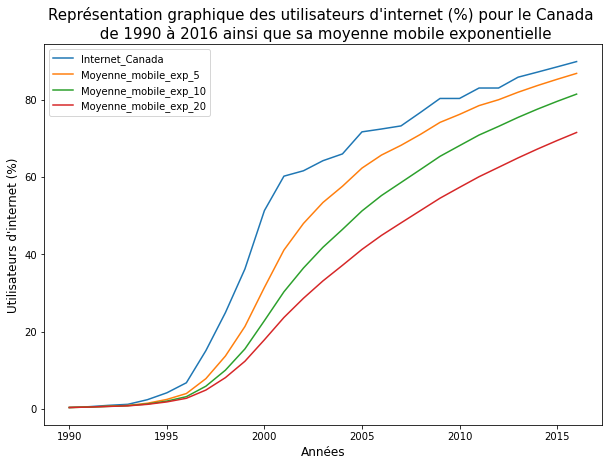

   Annees  Internet_Canada
0    1990         0.361000
1    1991         0.570386
2    1992         0.915981
3    1993         1.184558
4    1994         2.378694
5    1995         4.163525
6    1996         6.760240
7    1997        15.072357
8    1998        24.897400
9    1999        36.186440
10   2000        51.300000
11   2001        60.200000
12   2002        61.593299
13   2003        64.200000
14   2004        65.955963
15   2005        71.660000
16   2006        72.400000
17   2007        73.200000
18   2008        76.700000
19   2009        80.300000
20   2010        80.300000
21   2011        83.000000
22   2012        83.000000
23   2013        85.800000
24   2014        87.120000
25   2015        88.470000
26   2016        89.840000
27   2017        86.846000
28   2018        87.615200
29   2019        87.978240
30   2020        88.149888


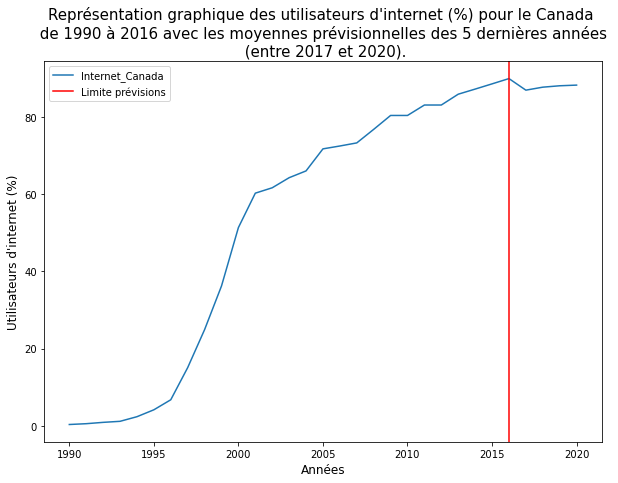

In [269]:
#Prévisions pour le Canada concernant l'indicateur internet
dataData
data_internet = dataData.loc[dataData['Indicator Name'] == 'Internet users (per 100 people)', :]
data_internet_Canada = data_internet.loc[data_internet['Country Name'] == 'Canada', :]

#On va supprimer les colonnes où nous n'avons pas de données pour ne travailler que sur la période de temps qui en contient. 
data_internet_Canada_nettoye = data_internet_Canada.dropna(how = 'all', axis=1)
data_internet_Canada_nettoye

#On va garder enlever les colonnes qui ne nous intéressent pas pour ne garder que les années
data_internet_Canada_nettoye = data_internet_Canada_nettoye.drop(data_internet_Canada_nettoye.loc[:, 'Country Name' : 'Indicator Code'].columns, axis = 1)
data_internet_Canada_nettoye

# #On va transposer le tableau pour avoir les années en lignes
data_internet_Canada_nettoye_transpose = data_internet_Canada_nettoye.transpose()
data_internet_Canada_nettoye_transpose.index.name = 'Annees'
Internet_Canada = data_internet_Canada_nettoye_transpose.rename(columns = {221275 : 'Internet_Canada'})
Internet_Canada.count() #On a 27 données 


#Calcul de la moyenne mobile exponentielle
Internet_Canada['Moyenne_mobile_exp_5'] = Internet_Canada['Internet_Canada'].ewm(span = 5).mean()
Internet_Canada['Moyenne_mobile_exp_10'] = Internet_Canada['Internet_Canada'].ewm(span = 10).mean()
Internet_Canada['Moyenne_mobile_exp_20'] = Internet_Canada['Internet_Canada'].ewm(span = 20).mean()
display(Internet_Canada)

#On trace la courbe des moyennes mobiles exponentielles
Internet_Canada[['Internet_Canada', 'Moyenne_mobile_exp_5', 'Moyenne_mobile_exp_10', 'Moyenne_mobile_exp_20']].plot(label = 'Internet_Canada', figsize = (10, 7))
plt.xlabel('Années', size = 12)
plt.ylabel('Utilisateurs d\'internet (%)', size = 12) 
plt.title('Représentation graphique des utilisateurs d\'internet (%) pour le Canada \n de 1990 à 2016 ainsi que sa moyenne mobile exponentielle', size = 15)

plt.show()

#On va reprendre notre tableau sans les moyennes mobiles.
data_internet_Canada_brutes = data_internet_Canada_nettoye_transpose.rename(columns={221275 : 'Internet_Canada'}).reset_index()

#On prend la dernière année de notre df.
Annees = data_internet_Canada_brutes['Annees'].tail(1)

i = 1

nb_annees = 5

#On calcule les prévisions moyennes en prenant les 5 dernières années à chaque fois jusqu'à 2030.
while int(Annees) < 2020:
    Annees = int(Annees) + i 
    moyenne = data_internet_Canada_brutes['Internet_Canada'].tail(nb_annees).mean()
    internet = pd.DataFrame([[Annees, moyenne]], columns = ['Annees','Internet_Canada'])
    data_internet_Canada_brutes = pd.concat([data_internet_Canada_brutes, internet], ignore_index = True)
print(data_internet_Canada_brutes)

#On trace notre graphique de prévisions
data_internet_Canada_brutes.set_index('Annees', inplace=True)

data_internet_Canada_brutes['Internet_Canada'].plot(label = 'Internet_Canada', figsize = (10, 7))
plt.axvline(x = 26, color = 'red', label = 'Limite prévisions')
plt.legend(loc = 'upper left')
plt.xlabel('Années', size = 12)
plt.ylabel('Utilisateurs d\'internet (%)', size = 12) 
plt.title('Représentation graphique des utilisateurs d\'internet (%) pour le Canada \n de 1990 à 2016 avec les moyennes prévisionnelles des 5 dernières années \n (entre 2017 et 2020).', size = 15)

plt.show()


### 3) Chomage (Canada)

Chomage_Canada  Moyenne_mobile_exp_5  Moyenne_mobile_exp_10  \
Annees                                                                
1991              10.3             10.300000              10.300000   
1992              11.2             10.840000              10.795000   
1993              11.4             11.105263              11.038206   
1994              10.4             10.812307              10.827945   
1995               9.5             10.308531              10.446728   
1996               9.6             10.049624              10.226804   
1997               9.1              9.713405               9.955289   
1998               8.3              9.223141               9.578703   
1999               7.6              8.667644               9.148207   
2000               6.8              8.034110               8.654951   
2001               7.2              7.752821               8.357723   
2002               7.7              7.735077               8.226311   
2003               7.6              7.689819               8.103385   
2004               7.2              7.525985               7.928604   
2005               6.8              7.283436               7.712765   
2006               6.3              6.955124               7.445105   
2007               6.0              6.636426               7.173393   
2008               6.1              6.457496               6.972816   
2009               8.3              7.071941               7.219573   
2010               8.1              7.414731               7.382597   
2011               7.5              7.443160               7.404263   
2012               7.3              7.395433               7.385074   
2013               7.1              7.296947               7.332724   
2014               6.9              7.164623               7.253405   
2015               6.9              7.076412               7.188721   
2016               7.0              7.050941               7.154221   

        Moyenne_mobile_exp_20  
Annees                         
1991                10.300000  
1992                10.772500  
1993                11.002914  
1994                10.828862  
1995                10.507422  
1996                10.315997  
1997                10.086082  
1998                 9.777349  
1999                 9.428092  
2000                 9.032324  
2001                 8.770864  
2002                 8.624982  
2003                 8.490849  
2004                 8.327734  
2005                 8.140514  
2006                 7.920958  
2007                 7.697189  
2008                 7.515006  
2009                 7.602892  
2010                 7.657631  
2011                 7.640528  
2012                 7.604064  
2013                 7.550720  
2014                 7.482577  
2015                 7.422143  
2016                 7.378721

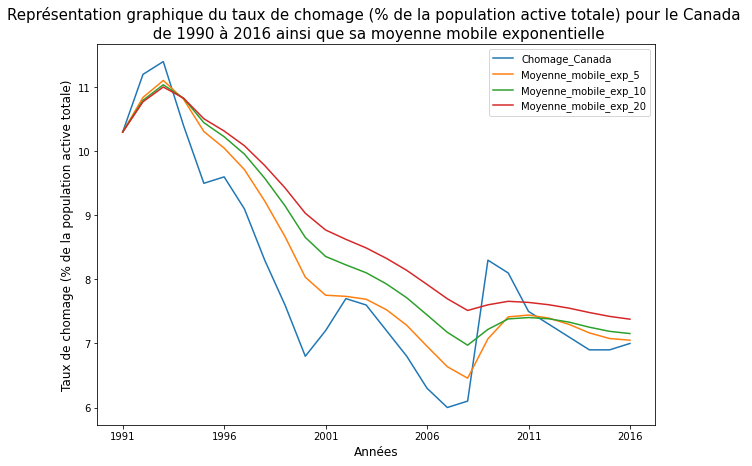

   Annees  Chomage_Canada
0    1991        10.30000
1    1992        11.20000
2    1993        11.40000
3    1994        10.40000
4    1995         9.50000
5    1996         9.60000
6    1997         9.10000
7    1998         8.30000
8    1999         7.60000
9    2000         6.80000
10   2001         7.20000
11   2002         7.70000
12   2003         7.60000
13   2004         7.20000
14   2005         6.80000
15   2006         6.30000
16   2007         6.00000
17   2008         6.10000
18   2009         8.30000
19   2010         8.10000
20   2011         7.50000
21   2012         7.30000
22   2013         7.10000
23   2014         6.90000
24   2015         6.90000
25   2016         7.00000
26   2017         7.04000
27   2018         6.98800
28   2019         6.96560
29   2020         6.97872


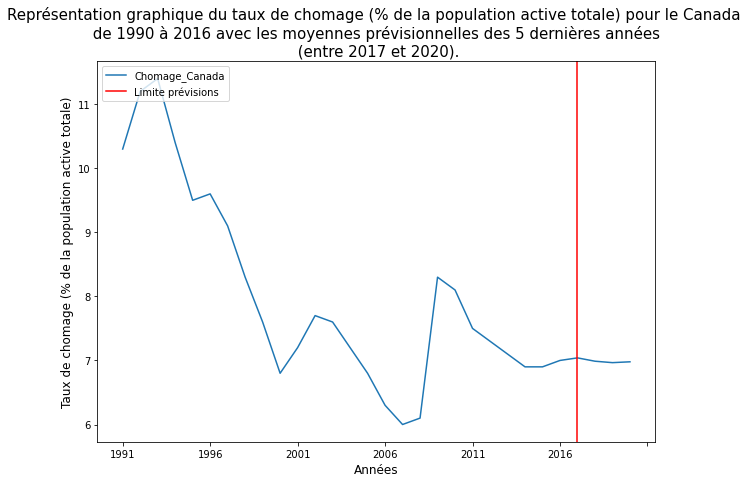

In [270]:
#Prévisions pour le Canada concernant l'indicateur du chomage
dataData
data_chomage = dataData.loc[dataData['Indicator Name'] == 'Unemployment, total (% of total labor force)', :]
data_chomage_Canada = data_chomage.loc[data_chomage['Country Name'] == 'Canada', :]

#On va supprimer les colonnes où nous n'avons pas de données pour ne travailler que sur la période de temps qui en contient. 
data_chomage_Canada_nettoye = data_chomage_Canada.dropna(how = 'all', axis=1)
data_chomage_Canada_nettoye

#On va garder enlever les colonnes qui ne nous intéressent pas pour ne garder que les années
data_chomage_Canada_nettoye = data_chomage_Canada_nettoye.drop(data_chomage_Canada_nettoye.loc[:, 'Country Name' : 'Indicator Code'].columns, axis = 1)
data_chomage_Canada_nettoye

# #On va transposer le tableau pour avoir les années en lignes
data_chomage_Canada_nettoye_transpose = data_chomage_Canada_nettoye.transpose()
data_chomage_Canada_nettoye_transpose.index.name = 'Annees'
Chomage_Canada = data_chomage_Canada_nettoye_transpose.rename(columns = {223248 : 'Chomage_Canada'})
Chomage_Canada.count() #On a 27 données 


#Calcul de la moyenne mobile exponentielle
Chomage_Canada['Moyenne_mobile_exp_5'] = Chomage_Canada['Chomage_Canada'].ewm(span = 5).mean()
Chomage_Canada['Moyenne_mobile_exp_10'] = Chomage_Canada['Chomage_Canada'].ewm(span = 10).mean()
Chomage_Canada['Moyenne_mobile_exp_20'] = Chomage_Canada['Chomage_Canada'].ewm(span = 20).mean()
display(Chomage_Canada)

#On trace la courbe des moyennes mobiles exponentielles
Chomage_Canada[['Chomage_Canada', 'Moyenne_mobile_exp_5', 'Moyenne_mobile_exp_10', 'Moyenne_mobile_exp_20']].plot(label = 'Chomage_Canada', figsize = (10, 7))
plt.xlabel('Années', size = 12)
plt.ylabel('Taux de chomage (% de la population active totale)', size = 12) 
plt.title('Représentation graphique du taux de chomage (% de la population active totale) pour le Canada \n de 1990 à 2016 ainsi que sa moyenne mobile exponentielle', size = 15)

plt.show()

#On va reprendre notre tableau sans les moyennes mobiles.
data_chomage_Canada_brutes = data_chomage_Canada_nettoye_transpose.rename(columns={223248 : 'Chomage_Canada'}).reset_index()

#On prend la dernière année de notre df.
Annees = data_chomage_Canada_brutes['Annees'].tail(1)

i = 1

nb_annees = 5

#On calcule les prévisions moyennes en prenant les 5 dernières années à chaque fois jusqu'à 2030.
while int(Annees) < 2020:
    Annees = int(Annees) + i 
    moyenne = data_chomage_Canada_brutes['Chomage_Canada'].tail(nb_annees).mean()
    chomage = pd.DataFrame([[Annees, moyenne]], columns = ['Annees','Chomage_Canada'])
    data_chomage_Canada_brutes = pd.concat([data_chomage_Canada_brutes, chomage], ignore_index = True)
print(data_chomage_Canada_brutes)

#On trace notre graphique de prévisions
data_chomage_Canada_brutes.set_index('Annees', inplace=True)

data_chomage_Canada_brutes['Chomage_Canada'].plot(label = 'Chomage_Canada', figsize = (10, 7))
plt.axvline(x = 26, color = 'red', label = 'Limite prévisions')
plt.legend(loc = 'upper left')
plt.xlabel('Années', size = 12)
plt.ylabel('Taux de chomage (% de la population active totale)', size = 12) 
plt.title('Représentation graphique du taux de chomage (% de la population active totale) pour le Canada \n de 1990 à 2016 avec les moyennes prévisionnelles des 5 dernières années \n (entre 2017 et 2020).', size = 15)

plt.show()


### 1) PIB par habitant, PPA (Belgique)

PIB_PPA_Belgique  Moyenne_mobile_exp_5  Moyenne_mobile_exp_10  \
Annees                                                                  
1990        18757.787482          18757.787482           18757.787482   
1991        19664.224484          19301.649683           19256.327833   
1992        20337.658462          19792.390684           19691.015561   
1993        20540.862820          20103.294494           19971.002369   
1994        21588.320787          20673.375678           20435.290499   
1995        22516.940812          21347.039328           20975.966989   
1996        22892.261513          21894.133535           21437.716990   
1997        23910.827453          22593.659245           22000.361539   
1998        24539.006238          23259.426373           22552.681788   
1999        25642.261655          24067.721881           23201.667086   
2000        27966.938804          25382.662915           24175.152523   
2001        29024.951645          26606.189300           25144.133511   
2002        30482.784651          27905.061657           26191.946572   
2003        31054.588625          28958.512562           27132.738240   
2004        32260.751298          30061.778290           28113.441857   
2005        33332.331350          31153.624913           29102.204817   
2006        35406.633634          32572.734825           30287.575817   
2007        36858.139853          34002.170380           31515.369135   
2008        38133.501464          35379.902227           32745.844043   
2009        38047.688180          36269.431718           33727.556820   
2010        40129.371378          37556.336278           34908.991621   
2011        41248.725342          38787.297159           36075.785788   
2012        42354.631485          39976.514566           37228.806658   
2013        43519.777920          41157.672515           38381.958224   
2014        44737.907196          42351.131339           39545.293466   
2015        45629.352069          43443.900433           40657.515517   
2016        46541.371510          44476.408965           41732.073748   

        Moyenne_mobile_exp_20  
Annees                         
1990             18757.787482  
1991             19233.666908  
1992             19639.045989  
1993             19899.386565  
1994             20307.925380  
1995             20773.926734  
1996             21174.451408  
1997             21647.447757  
1998             22111.267877  
1999             22643.004944  
2000             23402.692107  
2001             24168.602149  
2002             24994.901519  
2003             25760.617257  
2004             26557.196018  
2005             27365.403539  
2006             28302.113915  
2007             29278.053012  
2008             30269.480549  
2009             31125.984052  
2010             32102.865442  
2011             33082.215767  
2012             34063.496369  
2013             35053.748501  
2014             36058.339288  
2015             37042.827264  
2016             38012.469127

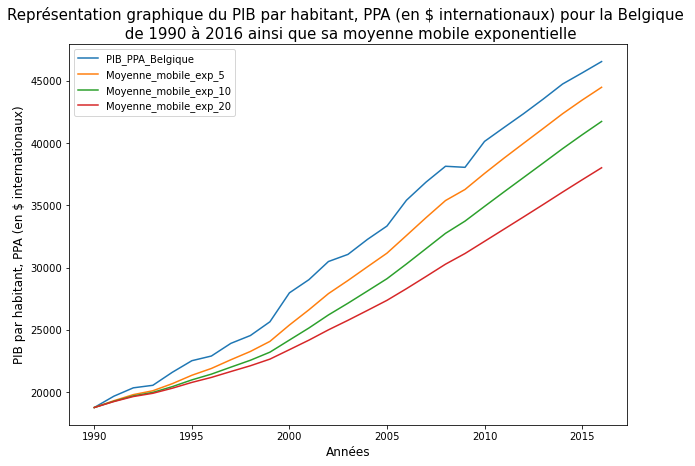

   Annees  PIB_PPA_Belgique
0    1990      18757.787482
1    1991      19664.224484
2    1992      20337.658462
3    1993      20540.862820
4    1994      21588.320787
5    1995      22516.940812
6    1996      22892.261513
7    1997      23910.827453
8    1998      24539.006238
9    1999      25642.261655
10   2000      27966.938804
11   2001      29024.951645
12   2002      30482.784651
13   2003      31054.588625
14   2004      32260.751298
15   2005      33332.331350
16   2006      35406.633634
17   2007      36858.139853
18   2008      38133.501464
19   2009      38047.688180
20   2010      40129.371378
21   2011      41248.725342
22   2012      42354.631485
23   2013      43519.777920
24   2014      44737.907196
25   2015      45629.352069
26   2016      46541.371510
27   2017      44556.608036
28   2018      44997.003347
29   2019      45292.448432
30   2020      45403.356679


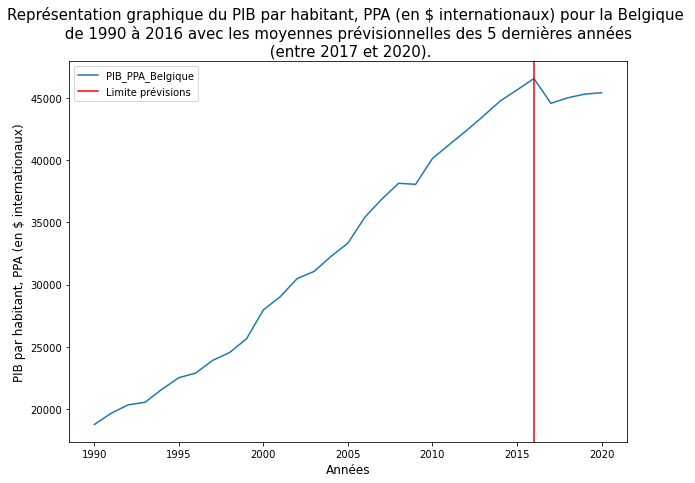

In [271]:
#Prévisions pour la Belgique concernant l'indicateur du PIB, PPA
dataData
data_PIB = dataData.loc[dataData['Indicator Name'] == 'GDP per capita, PPP (current international $)', :]
data_PIB_Belgique = data_PIB.loc[data_PIB['Country Name'] == 'Belgium', :]

#On va supprimer les colonnes où nous n'avons pas de données pour ne travailler que sur la période de temps qui en contient. 
data_PIB_Belgique_nettoye = data_PIB_Belgique.dropna(how = 'all', axis=1)
data_PIB_Belgique_nettoye

#On va garder enlever les colonnes qui ne nous intéressent pas pour ne garder que les années
data_PIB_Belgique_nettoye = data_PIB_Belgique_nettoye.drop(data_PIB_Belgique_nettoye.loc[:, 'Country Name' : 'Indicator Code'].columns, axis = 1)
data_PIB_Belgique_nettoye

# #On va transposer le tableau pour avoir les années en lignes
data_PIB_Belgique_nettoye_transpose = data_PIB_Belgique_nettoye.transpose()
data_PIB_Belgique_nettoye_transpose.index.name = 'Annees'
PIB_PPA_Belgique = data_PIB_Belgique_nettoye_transpose.rename(columns = {158842 : 'PIB_PPA_Belgique'})
PIB_PPA_Belgique.count() #On a 27 données 


#Calcul de la moyenne mobile exponentielle
PIB_PPA_Belgique['Moyenne_mobile_exp_5'] = PIB_PPA_Belgique['PIB_PPA_Belgique'].ewm(span = 5).mean()
PIB_PPA_Belgique['Moyenne_mobile_exp_10'] = PIB_PPA_Belgique['PIB_PPA_Belgique'].ewm(span = 10).mean()
PIB_PPA_Belgique['Moyenne_mobile_exp_20'] = PIB_PPA_Belgique['PIB_PPA_Belgique'].ewm(span = 20).mean()
display(PIB_PPA_Belgique)

#On trace la courbe des moyennes mobiles exponentielles
PIB_PPA_Belgique[['PIB_PPA_Belgique', 'Moyenne_mobile_exp_5', 'Moyenne_mobile_exp_10', 'Moyenne_mobile_exp_20']].plot(label = 'PIB_PPA_Belgique', figsize = (10, 7))
plt.xlabel('Années', size = 12)
plt.ylabel('PIB par habitant, PPA (en $ internationaux)', size = 12) 
plt.title('Représentation graphique du PIB par habitant, PPA (en $ internationaux) pour la Belgique \n de 1990 à 2016 ainsi que sa moyenne mobile exponentielle', size = 15)

plt.show()

#On va reprendre notre tableau sans les moyennes mobiles.
data_PIB_Belgique_brutes = data_PIB_Belgique_nettoye_transpose.rename(columns={158842 : 'PIB_PPA_Belgique'}).reset_index()

#On prend la dernière année de notre df.
Annees = data_PIB_Belgique_brutes['Annees'].tail(1)

i = 1

nb_annees = 5

#On calcule les prévisions moyennes en prenant les 5 dernières années à chaque fois jusqu'à 2030.
while int(Annees) < 2020:
    Annees = int(Annees) + i 
    moyenne = data_PIB_Belgique_brutes['PIB_PPA_Belgique'].tail(nb_annees).mean()
    PIB = pd.DataFrame([[Annees, moyenne]], columns = ['Annees','PIB_PPA_Belgique'])
    data_PIB_Belgique_brutes = pd.concat([data_PIB_Belgique_brutes, PIB], ignore_index = True)
print(data_PIB_Belgique_brutes)

#On trace notre graphique de prévisions
data_PIB_Belgique_brutes.set_index('Annees', inplace=True)

data_PIB_Belgique_brutes['PIB_PPA_Belgique'].plot(label = 'PIB_PPA_Belgique', figsize = (10, 7))
plt.axvline(x = 26, color = 'red', label = 'Limite prévisions')
plt.legend(loc = 'upper left')
plt.xlabel('Années', size = 12)
plt.ylabel('PIB par habitant, PPA (en $ internationaux)', size = 12) 
plt.title('Représentation graphique du PIB par habitant, PPA (en $ internationaux) pour la Belgique \n de 1990 à 2016 avec les moyennes prévisionnelles des 5 dernières années \n (entre 2017 et 2020).', size = 15)

plt.show()


### 2) Utilisateurs d'internet (Belgique)

Internet_Belgique  Moyenne_mobile_exp_5  Moyenne_mobile_exp_10  \
Annees                                                                   
1990             0.001007              0.001007               0.001007   
1991             0.020073              0.012446               0.011493   
1992             0.100041              0.053939               0.047089   
1993             0.199446              0.114380               0.097284   
1994             0.695995              0.337654               0.269157   
1995             0.991663              0.576638               0.456817   
1996             2.968412              1.423458               1.062010   
1997             4.938081              2.642567               1.943835   
1998             7.886623              4.437270               3.236778   
1999            13.772214              7.603831               5.449811   
2000            29.431692             14.964886              10.349010   
2001            31.288396             20.448318              14.532661   
2002            46.330000             29.120103              20.773501   
2003            49.970000             36.093958              26.422245   
2004            53.860000             42.029527              31.669561   
2005            55.820000             46.633360              36.245067   
2006            59.720000             51.000005              40.658870   
2007            64.440000             55.483037              45.102676   
2008            66.000000             58.990273              48.988007   
2009            70.000000             62.661286              52.878680   
2010            75.000000             66.775016              56.961100   
2011            81.609996             71.720670              61.497598   
2012            80.719991             74.720711              65.027517   
2013            82.170200             77.204021              68.169816   
2014            85.000000             79.802784              71.250260   
2015            85.052900             81.552869              73.773510   
2016            86.516500             83.207442              76.100740   

        Moyenne_mobile_exp_20  
Annees                         
1990                 0.001007  
1991                 0.011016  
1992                 0.043706  
1993                 0.088666  
1994                 0.235573  
1995                 0.395074  
1996                 0.881628  
1997                 1.582806  
1998                 2.593969  
1999                 4.277316  
2000                 7.866665  
2001                11.057364  
2002                15.673284  
2003                20.007094  
2004                24.155702  
2005                27.932943  
2006                31.635768  
2007                35.377568  
2008                38.805957  
2009                42.240913  
2010                45.795325  
2011                49.630405  
2012                52.920552  
2013                55.983545  
2014                58.993581  
2015                61.674079  
2016                64.210073

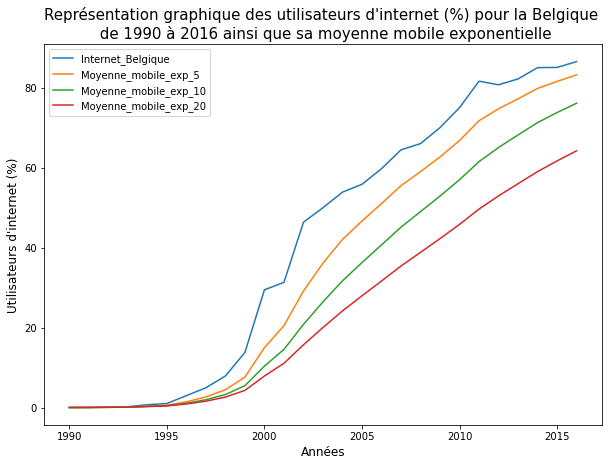

   Annees  Internet_Belgique
0    1990           0.001007
1    1991           0.020073
2    1992           0.100041
3    1993           0.199446
4    1994           0.695995
5    1995           0.991663
6    1996           2.968412
7    1997           4.938081
8    1998           7.886623
9    1999          13.772214
10   2000          29.431692
11   2001          31.288396
12   2002          46.330000
13   2003          49.970000
14   2004          53.860000
15   2005          55.820000
16   2006          59.720000
17   2007          64.440000
18   2008          66.000000
19   2009          70.000000
20   2010          75.000000
21   2011          81.609996
22   2012          80.719991
23   2013          82.170200
24   2014          85.000000
25   2015          85.052900
26   2016          86.516500
27   2017          83.891918
28   2018          84.526304
29   2019          84.997524
30   2020          84.997029


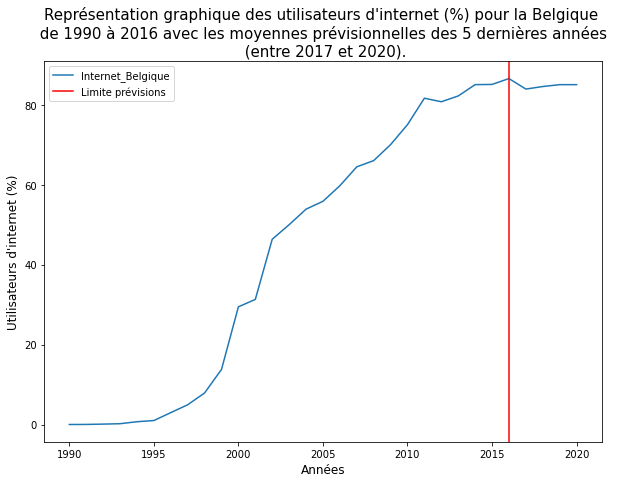

In [272]:
#Prévisions pour le Canada concernant l'indicateur internet
dataData
data_internet = dataData.loc[dataData['Indicator Name'] == 'Internet users (per 100 people)', :]
data_internet_Belgique = data_internet.loc[data_internet['Country Name'] == 'Belgium', :]

#On va supprimer les colonnes où nous n'avons pas de données pour ne travailler que sur la période de temps qui en contient. 
data_internet_Belgique_nettoye = data_internet_Belgique.dropna(how = 'all', axis=1)
data_internet_Belgique_nettoye

#On va garder enlever les colonnes qui ne nous intéressent pas pour ne garder que les années
data_internet_Belgique_nettoye = data_internet_Belgique_nettoye.drop(data_internet_Belgique_nettoye.loc[:, 'Country Name' : 'Indicator Code'].columns, axis = 1)
data_internet_Belgique_nettoye

# #On va transposer le tableau pour avoir les années en lignes
data_internet_Belgique_nettoye_transpose = data_internet_Belgique_nettoye.transpose()
data_internet_Belgique_nettoye_transpose.index.name = 'Annees'
Internet_Belgique = data_internet_Belgique_nettoye_transpose.rename(columns = {158970 : 'Internet_Belgique'})
Internet_Belgique.count() #On a 27 données 


#Calcul de la moyenne mobile exponentielle
Internet_Belgique['Moyenne_mobile_exp_5'] = Internet_Belgique['Internet_Belgique'].ewm(span = 5).mean()
Internet_Belgique['Moyenne_mobile_exp_10'] = Internet_Belgique['Internet_Belgique'].ewm(span = 10).mean()
Internet_Belgique['Moyenne_mobile_exp_20'] = Internet_Belgique['Internet_Belgique'].ewm(span = 20).mean()
display(Internet_Belgique)

#On trace la courbe des moyennes mobiles exponentielles
Internet_Belgique[['Internet_Belgique', 'Moyenne_mobile_exp_5', 'Moyenne_mobile_exp_10', 'Moyenne_mobile_exp_20']].plot(label = 'Internet_Belgique', figsize = (10, 7))
plt.xlabel('Années', size = 12)
plt.ylabel('Utilisateurs d\'internet (%)', size = 12) 
plt.title('Représentation graphique des utilisateurs d\'internet (%) pour la Belgique \n de 1990 à 2016 ainsi que sa moyenne mobile exponentielle', size = 15)

plt.show()

#On va reprendre notre tableau sans les moyennes mobiles.
data_internet_Belgiques_brutes = data_internet_Belgique_nettoye_transpose.rename(columns={158970 : 'Internet_Belgique'}).reset_index()

#On prend la dernière année de notre df.
Annees = data_internet_Belgiques_brutes['Annees'].tail(1)

i = 1

nb_annees = 5

#On calcule les prévisions moyennes en prenant les 5 dernières années à chaque fois jusqu'à 2030.
while int(Annees) < 2020:
    Annees = int(Annees) + i 
    moyenne = data_internet_Belgiques_brutes['Internet_Belgique'].tail(nb_annees).mean()
    internet = pd.DataFrame([[Annees, moyenne]], columns = ['Annees','Internet_Belgique'])
    data_internet_Belgiques_brutes = pd.concat([data_internet_Belgiques_brutes, internet], ignore_index = True)
print(data_internet_Belgiques_brutes)

#On trace notre graphique de prévisions
data_internet_Belgiques_brutes.set_index('Annees', inplace=True)

data_internet_Belgiques_brutes['Internet_Belgique'].plot(label = 'Internet_Belgique', figsize = (10, 7))
plt.axvline(x = 26, color = 'red', label = 'Limite prévisions')
plt.legend(loc = 'upper left')
plt.xlabel('Années', size = 12)
plt.ylabel('Utilisateurs d\'internet (%)', size = 12) 
plt.title('Représentation graphique des utilisateurs d\'internet (%) pour la Belgique \n de 1990 à 2016 avec les moyennes prévisionnelles des 5 dernières années \n (entre 2017 et 2020).', size = 15)

plt.show()


### 3) Chomage (Belgique)

Chomage_Belgique  Moyenne_mobile_exp_5  Moyenne_mobile_exp_10  \
Annees                                                                  
1991                 7.0              7.000000               7.000000   
1992                 6.7              6.820000               6.835000   
1993                 8.1              7.426316               7.343522   
1994                 9.6              8.329231               8.086931   
1995                 9.3              8.701896               8.435170   
1996                 9.5              8.993534               8.711743   
1997                 9.0              8.995823               8.781202   
1998                 9.3              9.101332               8.899231   
1999                 8.6              8.929759               8.834129   
2000                 6.6              8.139468               8.364836   
2001                 6.2              7.485417               7.922587   
2002                 6.9              7.288762               7.718276   
2003                 7.7              7.426549               7.714689   
2004                 7.4              7.417669               7.653805   
2005                 8.4              7.745862               7.796511   
2006                 8.2              7.897472               7.872955   
2007                 7.5              7.764847               7.802831   
2008                 7.0              7.509725               7.652812   
2009                 7.9              7.639876               7.698770   
2010                 8.3              7.859983               7.810097   
2011                 7.1              7.606605               7.679051   
2012                 7.5              7.571065               7.646097   
2013                 8.4              7.847401               7.784541   
2014                 8.5              8.064947               7.915686   
2015                 8.5              8.209970               8.022634   
2016                 7.8              8.073310               7.981934   

        Moyenne_mobile_exp_20  
Annees                         
1991                 7.000000  
1992                 6.842500  
1993                 7.304247  
1994                 7.966995  
1995                 8.289438  
1996                 8.544811  
1997                 8.630876  
1998                 8.746538  
1999                 8.723032  
2000                 8.403322  
2001                 8.088924  
2002                 7.926959  
2003                 7.897258  
2004                 7.834423  
2005                 7.903734  
2006                 7.939075  
2007                 7.887928  
2008                 7.786647  
2009                 7.799338  
2010                 7.854469  
2011                 7.772608  
2012                 7.743416  
2013                 7.812901  
2014                 7.884853  
2015                 7.948666  
2016                 7.933374

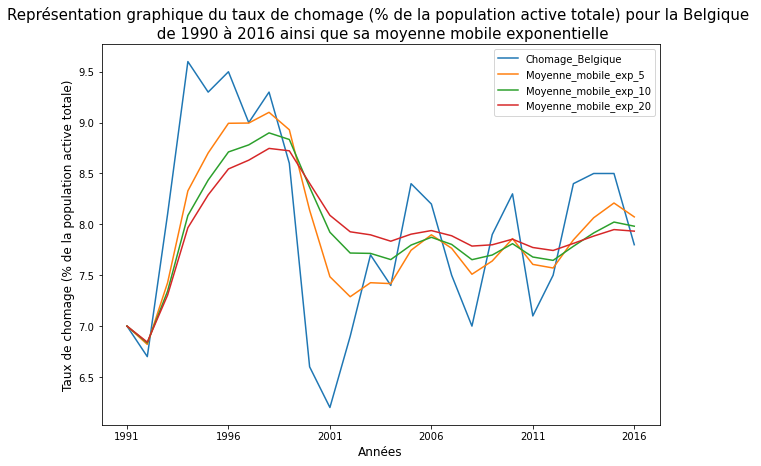

   Annees  Chomage_Belgique
0    1991           7.00000
1    1992           6.70000
2    1993           8.10000
3    1994           9.60000
4    1995           9.30000
5    1996           9.50000
6    1997           9.00000
7    1998           9.30000
8    1999           8.60000
9    2000           6.60000
10   2001           6.20000
11   2002           6.90000
12   2003           7.70000
13   2004           7.40000
14   2005           8.40000
15   2006           8.20000
16   2007           7.50000
17   2008           7.00000
18   2009           7.90000
19   2010           8.30000
20   2011           7.10000
21   2012           7.50000
22   2013           8.40000
23   2014           8.50000
24   2015           8.50000
25   2016           7.80000
26   2017           8.14000
27   2018           8.26800
28   2019           8.24160
29   2020           8.18992


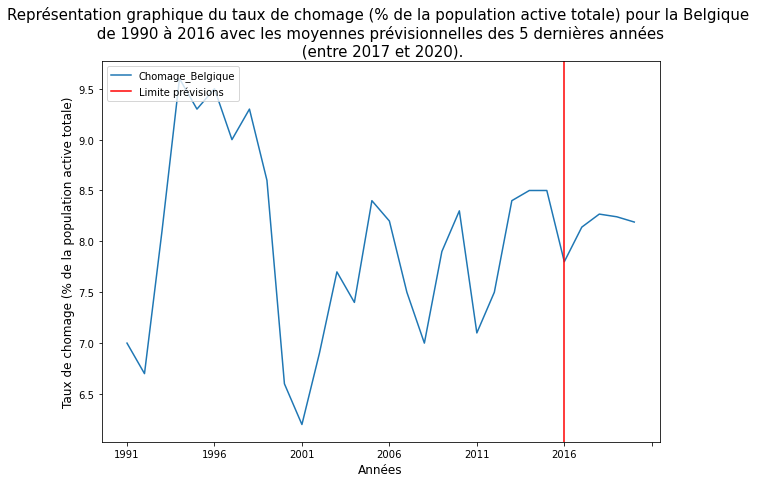

In [273]:
#Prévisions pour le Canada concernant l'indicateur du chomage
dataData
data_chomage = dataData.loc[dataData['Indicator Name'] == 'Unemployment, total (% of total labor force)', :]
data_chomage_Belgique = data_chomage.loc[data_chomage['Country Name'] == 'Belgium', :]

#On va supprimer les colonnes où nous n'avons pas de données pour ne travailler que sur la période de temps qui en contient. 
data_chomage_Belgique_nettoye = data_chomage_Belgique.dropna(how = 'all', axis=1)
data_chomage_Belgique_nettoye

#On va garder enlever les colonnes qui ne nous intéressent pas pour ne garder que les années
data_chomage_Belgique_nettoye = data_chomage_Belgique_nettoye.drop(data_chomage_Belgique_nettoye.loc[:, 'Country Name' : 'Indicator Code'].columns, axis = 1)
data_chomage_Belgique_nettoye

# #On va transposer le tableau pour avoir les années en lignes
data_chomage_Belgique_nettoye_transpose = data_chomage_Belgique_nettoye.transpose()
data_chomage_Belgique_nettoye_transpose.index.name = 'Annees'
Chomage_Belgique = data_chomage_Belgique_nettoye_transpose.rename(columns = {160943 : 'Chomage_Belgique'})
Chomage_Belgique.count() #On a 26 données 


#Calcul de la moyenne mobile exponentielle
Chomage_Belgique['Moyenne_mobile_exp_5'] = Chomage_Belgique['Chomage_Belgique'].ewm(span = 5).mean()
Chomage_Belgique['Moyenne_mobile_exp_10'] = Chomage_Belgique['Chomage_Belgique'].ewm(span = 10).mean()
Chomage_Belgique['Moyenne_mobile_exp_20'] = Chomage_Belgique['Chomage_Belgique'].ewm(span = 20).mean()
display(Chomage_Belgique)

#On trace la courbe des moyennes mobiles exponentielles
Chomage_Belgique[['Chomage_Belgique', 'Moyenne_mobile_exp_5', 'Moyenne_mobile_exp_10', 'Moyenne_mobile_exp_20']].plot(label = 'Chomage_Belgique', figsize = (10, 7))
plt.xlabel('Années', size = 12)
plt.ylabel('Taux de chomage (% de la population active totale)', size = 12) 
plt.title('Représentation graphique du taux de chomage (% de la population active totale) pour la Belgique \n de 1990 à 2016 ainsi que sa moyenne mobile exponentielle', size = 15)

plt.show()

#On va reprendre notre tableau sans les moyennes mobiles.
data_chomage_Belgique_brutes = data_chomage_Belgique_nettoye_transpose.rename(columns={160943 : 'Chomage_Belgique'}).reset_index()

#On prend la dernière année de notre df.
Annees = data_chomage_Belgique_brutes['Annees'].tail(1)

i = 1

nb_annees = 5

#On calcule les prévisions moyennes en prenant les 5 dernières années à chaque fois jusqu'à 2030.
while int(Annees) < 2020:
    Annees = int(Annees) + i 
    moyenne = data_chomage_Belgique_brutes['Chomage_Belgique'].tail(nb_annees).mean()
    chomage = pd.DataFrame([[Annees, moyenne]], columns = ['Annees','Chomage_Belgique'])
    data_chomage_Belgique_brutes = pd.concat([data_chomage_Belgique_brutes, chomage], ignore_index = True)
print(data_chomage_Belgique_brutes)

#On trace notre graphique de prévisions
data_chomage_Belgique_brutes.set_index('Annees', inplace=True)

data_chomage_Belgique_brutes['Chomage_Belgique'].plot(label = 'Chomage_Belgique', figsize = (10, 7))
plt.axvline(x = 25, color = 'red', label = 'Limite prévisions')
plt.legend(loc = 'upper left')
plt.xlabel('Années', size = 12)
plt.ylabel('Taux de chomage (% de la population active totale)', size = 12) 
plt.title('Représentation graphique du taux de chomage (% de la population active totale) pour la Belgique \n de 1990 à 2016 avec les moyennes prévisionnelles des 5 dernières années \n (entre 2017 et 2020).', size = 15)

plt.show()


### 1) PIB par habitant, PPA (Japon)

PIB_PPA_Japon  Moyenne_mobile_exp_5  Moyenne_mobile_exp_10  \
Annees                                                               
1990     19454.424124          19454.424124           19454.424124   
1991     20705.863320          20205.287642           20142.715682   
1992     21298.380889          20723.068654           20607.285416   
1993     21788.580615          21165.665930           20996.469552   
1994     22368.101454          21627.264401           21390.227766   
1995     23416.551783          22281.094227           21916.534106   
1996     24535.931783          23079.431564           22547.703723   
1997     25141.549362          23794.713344           23137.816106   
1998     25061.777658          24228.347947           23556.402812   
1999     25325.707264          24600.589626           23928.056120   
2000     26795.207427          25340.685152           24513.779287   
2001     27476.915535          26058.292797           25105.808486   
2002     28160.107615          26762.516199           25705.273489   
2003     28867.922783          27466.730671           26317.161856   
2004     30382.789174          28440.975013           27094.690183   
2005     31663.453099          29516.772211           27960.281138   
2006     33057.589611          30698.243823           28918.687017   
2007     34529.133365          31976.071632           29967.070154   
2008     34798.765898          32917.394345           30865.402203   
2009     33099.270357          32978.037919           31279.035055   
2010     34996.324463          33650.935007           31965.049158   
2011     35774.696713          34358.950207           32666.194465   
2012     37191.385946          35303.179588           33497.181635   
2013     38974.079489          36526.885581           34501.111405   
2014     39386.908819          37480.264416           35395.363442   
2015     40686.024386          38548.879285           36362.545081   
2016     41476.360298          39524.723465           37296.472125   

        Moyenne_mobile_exp_20  
Annees                         
1990             19454.424124  
1991             20111.429702  
1992             20547.271062  
1993             20905.617938  
1994             21259.380255  
1995             21714.444913  
1996             22247.918243  
1997             22748.096922  
1998             23119.222626  
1999             23451.500093  
2000             23928.623139  
2001             24412.000464  
2002             24902.492872  
2003             25403.573545  
2004             26013.766718  
2005             26687.719163  
2006             27429.735455  
2007             28239.524957  
2008             28973.876484  
2009             29428.147503  
2010             30032.303278  
2011             30647.206079  
2012             31339.763117  
2013             32139.220919  
2014             32891.063255  
2015             33692.864034  
2016             34487.428298

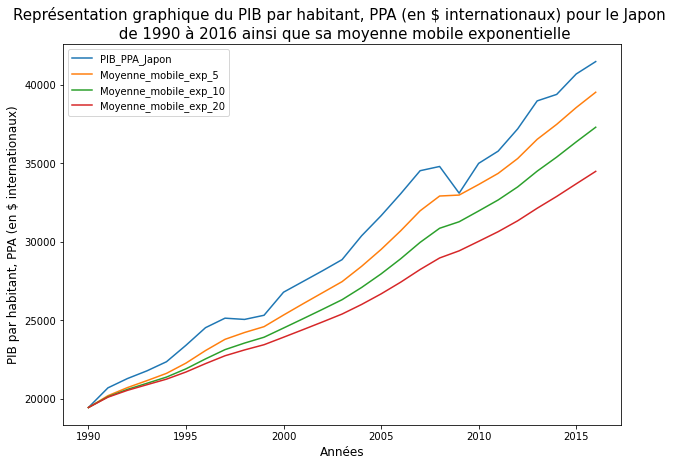

   Annees  PIB_PPA_Japon
0    1990   19454.424124
1    1991   20705.863320
2    1992   21298.380889
3    1993   21788.580615
4    1994   22368.101454
5    1995   23416.551783
6    1996   24535.931783
7    1997   25141.549362
8    1998   25061.777658
9    1999   25325.707264
10   2000   26795.207427
11   2001   27476.915535
12   2002   28160.107615
13   2003   28867.922783
14   2004   30382.789174
15   2005   31663.453099
16   2006   33057.589611
17   2007   34529.133365
18   2008   34798.765898
19   2009   33099.270357
20   2010   34996.324463
21   2011   35774.696713
22   2012   37191.385946
23   2013   38974.079489
24   2014   39386.908819
25   2015   40686.024386
26   2016   41476.360298
27   2017   39542.951787
28   2018   40013.264956
29   2019   40221.102049
30   2020   40387.940695


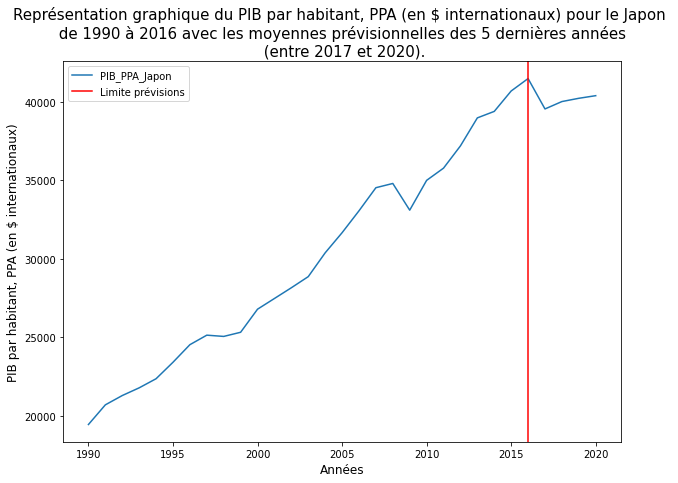

In [274]:
#Prévisions pour la Belgique concernant l'indicateur du PIB, PPA
dataData
data_PIB = dataData.loc[dataData['Indicator Name'] == 'GDP per capita, PPP (current international $)', :]
data_PIB_Japon = data_PIB.loc[data_PIB['Country Name'] == 'Japan', :]

#On va supprimer les colonnes où nous n'avons pas de données pour ne travailler que sur la période de temps qui en contient. 
data_PIB_Japon_nettoye = data_PIB_Japon.dropna(how = 'all', axis=1)
data_PIB_Japon_nettoye

#On va garder enlever les colonnes qui ne nous intéressent pas pour ne garder que les années
data_PIB_Japon_nettoye = data_PIB_Japon_nettoye.drop(data_PIB_Japon_nettoye.loc[:, 'Country Name' : 'Indicator Code'].columns, axis = 1)
data_PIB_Japon_nettoye

# #On va transposer le tableau pour avoir les années en lignes
data_PIB_Japon_nettoye_transpose = data_PIB_Japon_nettoye.transpose()
data_PIB_Japon_nettoye_transpose.index.name = 'Annees'
PIB_PPA_Japon = data_PIB_Japon_nettoye_transpose.rename(columns = {448377 : 'PIB_PPA_Japon'})
PIB_PPA_Japon.count() #On a 27 données 


#Calcul de la moyenne mobile exponentielle
PIB_PPA_Japon['Moyenne_mobile_exp_5'] = PIB_PPA_Japon['PIB_PPA_Japon'].ewm(span = 5).mean()
PIB_PPA_Japon['Moyenne_mobile_exp_10'] = PIB_PPA_Japon['PIB_PPA_Japon'].ewm(span = 10).mean()
PIB_PPA_Japon['Moyenne_mobile_exp_20'] = PIB_PPA_Japon['PIB_PPA_Japon'].ewm(span = 20).mean()
display(PIB_PPA_Japon)

#On trace la courbe des moyennes mobiles exponentielles
PIB_PPA_Japon[['PIB_PPA_Japon', 'Moyenne_mobile_exp_5', 'Moyenne_mobile_exp_10', 'Moyenne_mobile_exp_20']].plot(label = 'PIB_PPA_Japon', figsize = (10, 7))
plt.xlabel('Années', size = 12)
plt.ylabel('PIB par habitant, PPA (en $ internationaux)', size = 12) 
plt.title('Représentation graphique du PIB par habitant, PPA (en $ internationaux) pour le Japon \n de 1990 à 2016 ainsi que sa moyenne mobile exponentielle', size = 15)

plt.show()

#On va reprendre notre tableau sans les moyennes mobiles.
data_PIB_Japon_brutes = data_PIB_Japon_nettoye_transpose.rename(columns={448377 : 'PIB_PPA_Japon'}).reset_index()

#On prend la dernière année de notre df.
Annees = data_PIB_Japon_brutes['Annees'].tail(1)

i = 1

nb_annees = 5

#On calcule les prévisions moyennes en prenant les 5 dernières années à chaque fois jusqu'à 2030.
while int(Annees) < 2020:
    Annees = int(Annees) + i 
    moyenne = data_PIB_Japon_brutes['PIB_PPA_Japon'].tail(nb_annees).mean()
    PIB = pd.DataFrame([[Annees, moyenne]], columns = ['Annees','PIB_PPA_Japon'])
    data_PIB_Japon_brutes = pd.concat([data_PIB_Japon_brutes, PIB], ignore_index = True)
print(data_PIB_Japon_brutes)

#On trace notre graphique de prévisions
data_PIB_Japon_brutes.set_index('Annees', inplace=True)

data_PIB_Japon_brutes['PIB_PPA_Japon'].plot(label = 'PIB_PPA_Japon', figsize = (10, 7))
plt.axvline(x = 26, color = 'red', label = 'Limite prévisions')
plt.legend(loc = 'upper left')
plt.xlabel('Années', size = 12)
plt.ylabel('PIB par habitant, PPA (en $ internationaux)', size = 12) 
plt.title('Représentation graphique du PIB par habitant, PPA (en $ internationaux) pour le Japon \n de 1990 à 2016 avec les moyennes prévisionnelles des 5 dernières années \n (entre 2017 et 2020).', size = 15)

plt.show()


### 2) Utilisateurs internet (Japon)

Internet_Japon  Moyenne_mobile_exp_5  Moyenne_mobile_exp_10  \
Annees                                                                
1990          0.020294              0.020294               0.020294   
1991          0.040438              0.032380               0.031373   
1992          0.096678              0.062837               0.057625   
1993          0.401278              0.203420               0.170843   
1994          0.799684              0.432318               0.351366   
1995          1.594363              0.856945               0.674216   
1996          4.372982              2.101817               1.565470   
1997          9.163077              4.551139               3.293962   
1998         13.414041              7.584340               5.495737   
1999         21.391290             12.267877               8.834696   
2000         29.990740             18.244595              13.156611   
2001         38.532061             25.059609              18.226580   
2002         46.594201             32.274880              23.794272   
2003         48.435266             37.680191              28.561647   
2004         62.393930             45.936960              35.031881   
2005         66.921066             52.942327              41.073558   
2006         68.685270             58.195306              46.265166   
2007         74.300000             63.567172              51.503831   
2008         75.400000             67.513228              55.946721   
2009         78.000000             71.009870              60.030203   
2010         78.210000             73.410395              63.385228   
2011         79.054114             75.291886              66.269003   
2012         79.496400             76.693515              68.698026   
2013         88.219429             80.535715              72.276351   
2014         89.106833             83.392867              75.356849   
2015         91.058028             85.947989              78.227170   
2016         92.000000             87.965361              80.742478   

        Moyenne_mobile_exp_20  
Annees                         
1990                 0.020294  
1991                 0.030869  
1992                 0.055034  
1993                 0.154989  
1994                 0.310935  
1995                 0.581680  
1996                 1.298521  
1997                 2.657949  
1998                 4.383279  
1999                 6.944538  
2000                10.233066  
2001                14.088186  
2002                18.342054  
2003                22.144700  
2004                27.077165  
2005                31.830153  
2006                36.123349  
2007                40.477950  
2008                44.387711  
2009                48.088955  
2010                51.357134  
2011                54.322962  
2012                56.987015  
2013                60.257642  
2014                63.250326  
2015                66.110666  
2016                68.753532

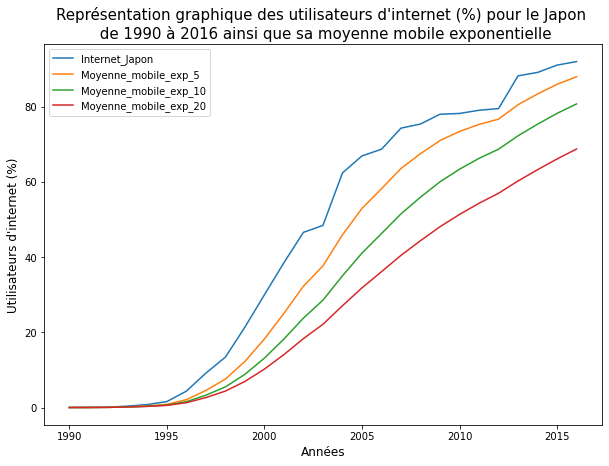

   Annees  Internet_Japon
0    1990        0.020294
1    1991        0.040438
2    1992        0.096678
3    1993        0.401278
4    1994        0.799684
5    1995        1.594363
6    1996        4.372982
7    1997        9.163077
8    1998       13.414041
9    1999       21.391290
10   2000       29.990740
11   2001       38.532061
12   2002       46.594201
13   2003       48.435266
14   2004       62.393930
15   2005       66.921066
16   2006       68.685270
17   2007       74.300000
18   2008       75.400000
19   2009       78.000000
20   2010       78.210000
21   2011       79.054114
22   2012       79.496400
23   2013       88.219429
24   2014       89.106833
25   2015       91.058028
26   2016       92.000000
27   2017       87.976138
28   2018       89.672086
29   2019       89.962617
30   2020       90.133774


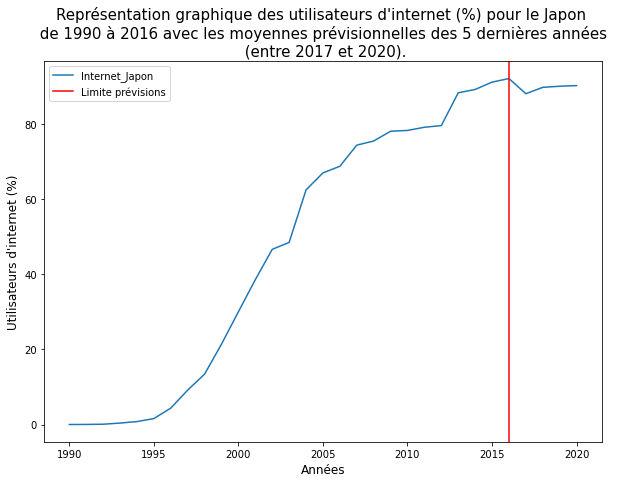

In [275]:
#Prévisions pour le Canada concernant l'indicateur internet
dataData
data_internet = dataData.loc[dataData['Indicator Name'] == 'Internet users (per 100 people)', :]
data_internet_Japon = data_internet.loc[data_internet['Country Name'] == 'Japan', :]

#On va supprimer les colonnes où nous n'avons pas de données pour ne travailler que sur la période de temps qui en contient. 
data_internet_Japon_nettoye = data_internet_Japon.dropna(how = 'all', axis=1)
data_internet_Japon_nettoye

#On va garder enlever les colonnes qui ne nous intéressent pas pour ne garder que les années
data_internet_Japon_nettoye = data_internet_Japon_nettoye.drop(data_internet_Japon_nettoye.loc[:, 'Country Name' : 'Indicator Code'].columns, axis = 1)
data_internet_Japon_nettoye

# #On va transposer le tableau pour avoir les années en lignes
data_internet_Japon_nettoye_transpose = data_internet_Japon_nettoye.transpose()
data_internet_Japon_nettoye_transpose.index.name = 'Annees'
Internet_Japon = data_internet_Japon_nettoye_transpose.rename(columns = {448505 : 'Internet_Japon'})
Internet_Japon.count() #On a 27 données 


#Calcul de la moyenne mobile exponentielle
Internet_Japon['Moyenne_mobile_exp_5'] = Internet_Japon['Internet_Japon'].ewm(span = 5).mean()
Internet_Japon['Moyenne_mobile_exp_10'] = Internet_Japon['Internet_Japon'].ewm(span = 10).mean()
Internet_Japon['Moyenne_mobile_exp_20'] = Internet_Japon['Internet_Japon'].ewm(span = 20).mean()
display(Internet_Japon)

#On trace la courbe des moyennes mobiles exponentielles
Internet_Japon[['Internet_Japon', 'Moyenne_mobile_exp_5', 'Moyenne_mobile_exp_10', 'Moyenne_mobile_exp_20']].plot(label = 'Internet_Belgique', figsize = (10, 7))
plt.xlabel('Années', size = 12)
plt.ylabel('Utilisateurs d\'internet (%)', size = 12) 
plt.title('Représentation graphique des utilisateurs d\'internet (%) pour le Japon \n de 1990 à 2016 ainsi que sa moyenne mobile exponentielle', size = 15)

plt.show()

#On va reprendre notre tableau sans les moyennes mobiles.
data_internet_Japon_brutes = data_internet_Japon_nettoye_transpose.rename(columns={448505 : 'Internet_Japon'}).reset_index()

#On prend la dernière année de notre df.
Annees = data_internet_Japon_brutes['Annees'].tail(1)

i = 1

nb_annees = 5

#On calcule les prévisions moyennes en prenant les 5 dernières années à chaque fois jusqu'à 2030.
while int(Annees) < 2020:
    Annees = int(Annees) + i 
    moyenne = data_internet_Japon_brutes['Internet_Japon'].tail(nb_annees).mean()
    internet = pd.DataFrame([[Annees, moyenne]], columns = ['Annees','Internet_Japon'])
    data_internet_Japon_brutes = pd.concat([data_internet_Japon_brutes, internet], ignore_index = True)
print(data_internet_Japon_brutes)

#On trace notre graphique de prévisions
data_internet_Japon_brutes.set_index('Annees', inplace=True)

data_internet_Japon_brutes['Internet_Japon'].plot(label = 'Internet_Japon', figsize = (10, 7))
plt.axvline(x = 26, color = 'red', label = 'Limite prévisions')
plt.legend(loc = 'upper left')
plt.xlabel('Années', size = 12)
plt.ylabel('Utilisateurs d\'internet (%)', size = 12) 
plt.title('Représentation graphique des utilisateurs d\'internet (%) pour le Japon \n de 1990 à 2016 avec les moyennes prévisionnelles des 5 dernières années \n (entre 2017 et 2020).', size = 15)

plt.show()


### 3) Chomage (Japon)

Chomage_Japon  Moyenne_mobile_exp_5  Moyenne_mobile_exp_10  \
Annees                                                               
1991              2.1              2.100000               2.100000   
1992              2.2              2.160000               2.155000   
1993              2.5              2.321053               2.293688   
1994              2.9              2.561538               2.493441   
1995              3.2              2.806635               2.696275   
1996              3.4              3.023459               2.879056   
1997              3.4              3.156775               3.004583   
1998              4.1              3.483949               3.253796   
1999              4.7              3.900125               3.568439   
2000              4.7              4.171455               3.806130   
2001              5.0              4.450867               4.050023   
2002              5.4              4.769702               4.319746   
2003              5.3              4.947381               4.512140   
2004              4.7              4.864637               4.548486   
2005              4.4              4.709404               4.520089   
2006              4.1              4.505959               4.440499   
2007              3.9              4.303768               4.338874   
2008              4.0              4.202443               4.275551   
2009              5.1              4.501764               4.428836   
2010              5.1              4.701236               4.553112   
2011              4.5              4.634144               4.543310   
2012              4.3              4.522748               4.498530   
2013              4.0              4.348483               4.406982   
2014              3.6              4.098974               4.259060   
2015              3.4              3.865973               4.101826   
2016              3.1              3.610642               3.918683   

        Moyenne_mobile_exp_20  
Annees                         
1991                 2.100000  
1992                 2.152500  
1993                 2.280100  
1994                 2.459056  
1995                 2.638284  
1996                 2.798971  
1997                 2.912611  
1998                 3.117857  
1999                 3.371640  
2000                 3.571680  
2001                 3.775491  
2002                 3.996795  
2003                 4.167337  
2004                 4.234646  
2005                 4.254910  
2006                 4.236430  
2007                 4.197240  
2008                 4.174742  
2009                 4.278331  
2010                 4.368810  
2011                 4.383044  
2012                 4.374152  
2013                 4.334556  
2014                 4.257634  
2015                 4.168667  
2016                 4.058742

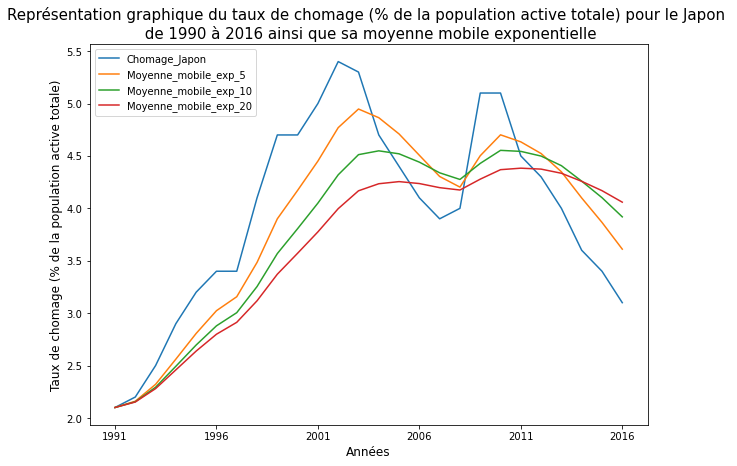

   Annees  Chomage_Japon
0    1991        2.10000
1    1992        2.20000
2    1993        2.50000
3    1994        2.90000
4    1995        3.20000
5    1996        3.40000
6    1997        3.40000
7    1998        4.10000
8    1999        4.70000
9    2000        4.70000
10   2001        5.00000
11   2002        5.40000
12   2003        5.30000
13   2004        4.70000
14   2005        4.40000
15   2006        4.10000
16   2007        3.90000
17   2008        4.00000
18   2009        5.10000
19   2010        5.10000
20   2011        4.50000
21   2012        4.30000
22   2013        4.00000
23   2014        3.60000
24   2015        3.40000
25   2016        3.10000
26   2017        3.68000
27   2018        3.55600
28   2019        3.46720
29   2020        3.44064


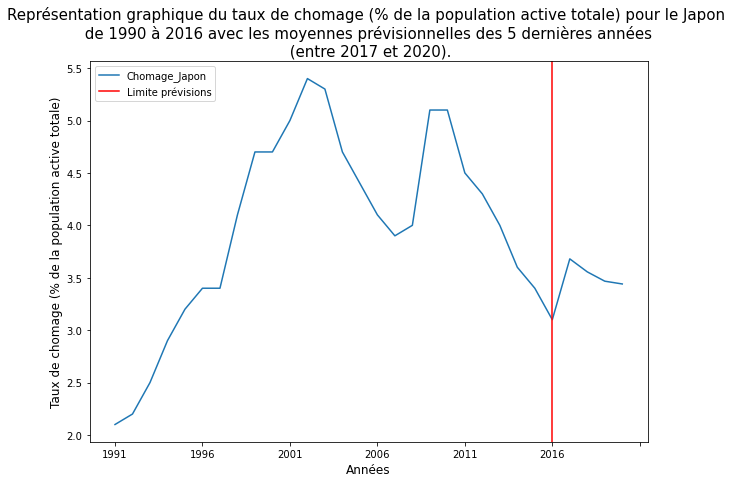

In [276]:
#Prévisions pour le Canada concernant l'indicateur du chomage
dataData
data_chomage = dataData.loc[dataData['Indicator Name'] == 'Unemployment, total (% of total labor force)', :]
data_chomage_Japan = data_chomage.loc[data_chomage['Country Name'] == 'Japan', :]

#On va supprimer les colonnes où nous n'avons pas de données pour ne travailler que sur la période de temps qui en contient. 
data_chomage_Japon_nettoye = data_chomage_Japan.dropna(how = 'all', axis=1)
data_chomage_Japon_nettoye

#On va garder enlever les colonnes qui ne nous intéressent pas pour ne garder que les années
data_chomage_Japon_nettoye = data_chomage_Japon_nettoye.drop(data_chomage_Japon_nettoye.loc[:, 'Country Name' : 'Indicator Code'].columns, axis = 1)
data_chomage_Japon_nettoye

# #On va transposer le tableau pour avoir les années en lignes
data_chomage_Japon_nettoye_transpose = data_chomage_Japon_nettoye.transpose()
data_chomage_Japon_nettoye_transpose.index.name = 'Annees'
Chomage_Japon = data_chomage_Japon_nettoye_transpose.rename(columns = {450478 : 'Chomage_Japon'})
Chomage_Japon.count() #On a 26 données 


#Calcul de la moyenne mobile exponentielle
Chomage_Japon['Moyenne_mobile_exp_5'] = Chomage_Japon['Chomage_Japon'].ewm(span = 5).mean()
Chomage_Japon['Moyenne_mobile_exp_10'] = Chomage_Japon['Chomage_Japon'].ewm(span = 10).mean()
Chomage_Japon['Moyenne_mobile_exp_20'] = Chomage_Japon['Chomage_Japon'].ewm(span = 20).mean()
display(Chomage_Japon)

#On trace la courbe des moyennes mobiles exponentielles
Chomage_Japon[['Chomage_Japon', 'Moyenne_mobile_exp_5', 'Moyenne_mobile_exp_10', 'Moyenne_mobile_exp_20']].plot(label = 'Chomage_Japon', figsize = (10, 7))
plt.xlabel('Années', size = 12)
plt.ylabel('Taux de chomage (% de la population active totale)', size = 12) 
plt.title('Représentation graphique du taux de chomage (% de la population active totale) pour le Japon \n de 1990 à 2016 ainsi que sa moyenne mobile exponentielle', size = 15)

plt.show()

#On va reprendre notre tableau sans les moyennes mobiles.
data_chomage_Japon_brutes = data_chomage_Japon_nettoye_transpose.rename(columns={450478 : 'Chomage_Japon'}).reset_index()

#On prend la dernière année de notre df.
Annees = data_chomage_Japon_brutes['Annees'].tail(1)

i = 1

nb_annees = 5

#On calcule les prévisions moyennes en prenant les 5 dernières années à chaque fois jusqu'à 2030.
while int(Annees) < 2020:
    Annees = int(Annees) + i 
    moyenne = data_chomage_Japon_brutes['Chomage_Japon'].tail(nb_annees).mean()
    chomage = pd.DataFrame([[Annees, moyenne]], columns = ['Annees','Chomage_Japon'])
    data_chomage_Japon_brutes = pd.concat([data_chomage_Japon_brutes, chomage], ignore_index = True)
print(data_chomage_Japon_brutes)

#On trace notre graphique de prévisions
data_chomage_Japon_brutes.set_index('Annees', inplace=True)

data_chomage_Japon_brutes['Chomage_Japon'].plot(label = 'Chomage_Japon', figsize = (10, 7))
plt.axvline(x = 25, color = 'red', label = 'Limite prévisions')
plt.legend(loc = 'upper left')
plt.xlabel('Années', size = 12)
plt.ylabel('Taux de chomage (% de la population active totale)', size = 12) 
plt.title('Représentation graphique du taux de chomage (% de la population active totale) pour le Japon \n de 1990 à 2016 avec les moyennes prévisionnelles des 5 dernières années \n (entre 2017 et 2020).', size = 15)

plt.show()


### 

### Prévisions pour indicateur de projection

In [277]:
#Données concernant le Canada
data_proj_Canada = data_proj.loc[data_proj['Country Name'] == 'Canada']

#On supprime les colonnes où nous n'avons pas de données
data_proj_Canada_nettoye = data_proj_Canada.dropna(how = 'all', axis=1)
data_proj_Canada_nettoye

# #On va transposer le tableau pour avoir les années en lignes
data_proj_Canada_nettoye_transpose = data_proj_Canada_nettoye.transpose()
data_proj_Canada_nettoye_transpose.index.name = 'Annees'
Proj_Canada = data_proj_Canada_nettoye_transpose.rename(columns = {223334 : 'Proj_Canada'})
liste_lignes = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
Proj_Canada = Proj_Canada.drop(liste_lignes, 0).reset_index()
display(Proj_Canada)
Proj_Canada.count() #On a 19 données 

C:\Users\evaro\AppData\Local\Temp\ipykernel_18504\3957791920.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Proj_Canada = Proj_Canada.drop(liste_lignes, 0).reset_index()


Annees Proj_Canada
0    2010        0.42
1    2015        0.43
2    2020        0.45
3    2025        0.46
4    2030        0.46
5    2035        0.47
6    2040        0.48
7    2045        0.48
8    2050        0.49
9    2055        0.49
10   2060         0.5
11   2065         0.5
12   2070         0.5
13   2075        0.51
14   2080        0.51
15   2085        0.51
16   2090        0.51
17   2095        0.52
18   2100        0.52

Annees         19
Proj_Canada    19
dtype: int64

In [278]:
#Données concernant le Japon
data_proj_Japon = data_proj.loc[data_proj['Country Name'] == 'Japan']

#On supprime les colonnes où nous n'avons pas de données
data_proj_Japon_nettoye = data_proj_Japon.dropna(how = 'all', axis=1)
data_proj_Japon_nettoye

# #On va transposer le tableau pour avoir les années en lignes
data_proj_Japon_nettoye_transpose = data_proj_Japon_nettoye.transpose()
data_proj_Japon_nettoye_transpose.index.name = 'Annees'
Proj_Japon = data_proj_Japon_nettoye_transpose.rename(columns = {450564 : 'Proj_Japon'})
liste_lignes = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
Proj_Japon = Proj_Japon.drop(liste_lignes, 0).reset_index()
display(Proj_Japon)
Proj_Japon.count() #On a 19 données 

C:\Users\evaro\AppData\Local\Temp\ipykernel_18504\2709679296.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Proj_Japon = Proj_Japon.drop(liste_lignes, 0).reset_index()


Annees Proj_Japon
0    2010       0.36
1    2015       0.46
2    2020       0.48
3    2025        0.5
4    2030       0.51
5    2035       0.52
6    2040       0.53
7    2045       0.54
8    2050       0.55
9    2055       0.55
10   2060       0.56
11   2065       0.56
12   2070       0.56
13   2075       0.57
14   2080       0.57
15   2085       0.57
16   2090       0.57
17   2095       0.57
18   2100       0.58

Annees        19
Proj_Japon    19
dtype: int64

In [279]:
#Données concernant la Belgique
data_proj_Belgique = data_proj.loc[data_proj['Country Name'] == 'Belgium']

#On supprime les colonnes où nous n'avons pas de données
data_proj_Belgique_nettoye = data_proj_Belgique.dropna(how = 'all', axis=1)
data_proj_Belgique_nettoye

# #On va transposer le tableau pour avoir les années en lignes
data_proj_Belgique_nettoye_transpose = data_proj_Belgique_nettoye.transpose()
data_proj_Belgique_nettoye_transpose.index.name = 'Annees'
Proj_Belgique = data_proj_Belgique_nettoye_transpose.rename(columns = {161029 : 'Proj_Belgique'})
liste_lignes = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
Proj_Belgique = Proj_Belgique.drop(liste_lignes, 0).reset_index()
display(Proj_Belgique)
Proj_Belgique.count() #On a 19 données 

C:\Users\evaro\AppData\Local\Temp\ipykernel_18504\133077500.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Proj_Belgique = Proj_Belgique.drop(liste_lignes, 0).reset_index()


Annees Proj_Belgique
0    2010          0.37
1    2015          0.39
2    2020          0.41
3    2025          0.43
4    2030          0.44
5    2035          0.46
6    2040          0.47
7    2045          0.48
8    2050          0.49
9    2055           0.5
10   2060          0.51
11   2065          0.51
12   2070          0.52
13   2075          0.53
14   2080          0.53
15   2085          0.53
16   2090          0.54
17   2095          0.54
18   2100          0.54

Annees           19
Proj_Belgique    19
dtype: int64

In [280]:
#On va joindre nos 3 df
Proj_Can_Jap = pd.merge(Proj_Canada, Proj_Japon, on = 'Annees', how='inner')
Proj_pays = pd.merge(Proj_Can_Jap, Proj_Belgique, on = 'Annees', how = 'inner')
Proj_pays

Annees Proj_Canada Proj_Japon Proj_Belgique
0    2010        0.42       0.36          0.37
1    2015        0.43       0.46          0.39
2    2020        0.45       0.48          0.41
3    2025        0.46        0.5          0.43
4    2030        0.46       0.51          0.44
5    2035        0.47       0.52          0.46
6    2040        0.48       0.53          0.47
7    2045        0.48       0.54          0.48
8    2050        0.49       0.55          0.49
9    2055        0.49       0.55           0.5
10   2060         0.5       0.56          0.51
11   2065         0.5       0.56          0.51
12   2070         0.5       0.56          0.52
13   2075        0.51       0.57          0.53
14   2080        0.51       0.57          0.53
15   2085        0.51       0.57          0.53
16   2090        0.51       0.57          0.54
17   2095        0.52       0.57          0.54
18   2100        0.52       0.58          0.54

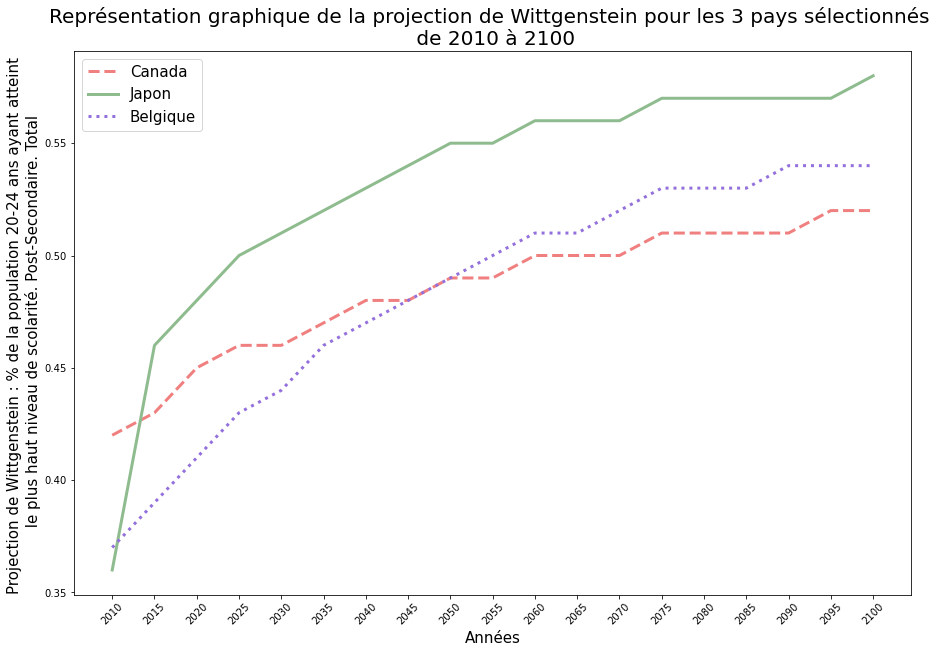

In [281]:
#On effectue la représentation graphique des prévisions pour nos 3 pays sélectionnés. 
plt.figure(figsize=(15,10))
plt.plot(Proj_pays['Annees'], Proj_pays['Proj_Canada'], label = 'Canada', color = 'lightcoral', 
         linestyle = '--', linewidth = 3)
plt.plot(Proj_pays['Annees'], Proj_pays['Proj_Japon'], label = 'Japon', color = 'darkseagreen', 
         linewidth = 3)
plt.plot(Proj_pays['Annees'], Proj_pays['Proj_Belgique'], label = 'Belgique', color = 'mediumpurple', linestyle = 'dotted', 
         linewidth = 3)

plt.title('Représentation graphique de la projection de Wittgenstein pour les 3 pays sélectionnés \n de 2010 à 2100', size = 20)
plt.xlabel('Années', size = 15)
plt.ylabel('Projection de Wittgenstein : % de la population 20-24 ans ayant atteint \n le plus haut niveau de scolarité. Post-Secondaire. Total', size = 15)
plt.xticks(rotation = 45)
plt.legend(loc='best', fontsize=15)

plt.savefig('Projection_pays.png')
plt.show()